#Daisyworld

¿Cómo se mantiene vivo un planeta, a pesar que su sol lo calienta cada vez más?

El presente modelo simula un planeta (representado de manera sencilla por un cuadrado de área uno) en el cuál existen dos especies de margaritas: blancas y negras. Asumimos que el área libre de flores es terreno fértil que cualquier planta puede ocupar, así como despreciamos los recursos necesarios (nutrientes, agua, etc.) para su supervivencia; para crecer sólo dependen de la temperatura que sienten localmente como consecuencia de la proporciòn de luz solar que reflejan (albedo). 

El ciclo es el siguiente: aumenta un paso la luminosidad solar, se calcula el albedo planetario como promedio ponderado de los albedos de margaritas blancas y negras y el albedo de la tierra fértil restante. Con ese albedo planetario se calcula la temperatura global, con ella la temperatura local sentida por cada planta. Esta temperatura local contribuye positiva o negativamente a la reproducción de cada planta, que además compiten por espacio. Se actualizan las proporciones de área ocupadas por cada especie y concluye el ciclo, para que vuelva a aumentar la luminosidad solar.

Las margaritas sobreviven en el rango de temperatura entre 278 y 313 grados Kelvin.

In [13]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
from IPython.html import widgets
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [21]:
class Planeta:
    #incluimos a las plantas como atributos del planeta, así como las constantes de Boltzman y q = coeficiente de flujo de calor, 
    #cada objeto tiene un albedo y proporción de área y calculamos el albedo planetario como su promedio ponderado
    def __init__(self,plantas, albedo_f, luminosidad, prop_fertil, q = 15, boltz = 5.67e-8):
        self.blanca = plantas[0]
        self.negra = plantas[1]
        self.albedo_f = albedo_f
        self.luminosidad = luminosidad
        self.boltz = boltz
        self.albedo_p = None
        self.temp_g = []
        self.temp_g_vacio = []
        self.q = q
        self.prop_fertil = prop_fertil
        self.area_blanca = []
        self.area_negra = []
        self.step = 0
        
    def actualiza_temp_g(self): #actualizacion de la temperatura global
        self.temp_g = np.append(self.temp_g,((self.luminosidad[self.step]/(self.boltz))*(1 - self.albedo_p))**0.25 )
        
    def temp_planeta_vacio(self): #calculamos la temperatura hipotética del planeta deshabitado
        for i in self.luminosidad:
            self.temp_g_vacio = np.append(self.temp_g_vacio,((i/(self.boltz))*(0.5))**0.25 )
    
    def actualiza_albedo_p(self): #cálculo ponderado del albedo planetario
        self.prop_fertil = 1 - self.blanca.prop_area - self.negra.prop_area 
        self.albedo_p = self.blanca.prop_area*self.blanca.albedo + self.negra.prop_area*self.negra.albedo + self.prop_fertil*self.albedo_f

    def vivir(self):#ciclo planetario, como descrito en la introducción
        for i in self.luminosidad:
            self.actualiza_albedo_p()
            self.actualiza_temp_g()
            self.blanca.actualizar(self)
            self.negra.actualizar(self)
            self.area_blanca = np.append(self.area_blanca,blanca.prop_area)
            self.area_negra = np.append(self.area_negra,negra.prop_area)
            self.step += 1
    
    def graficar_areas(self):#graficamos nuestros vectores de resultados
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.luminosidad,self.area_blanca,linewidth = 1.5,  label = "Blancas")
        plt.plot(self.luminosidad,self.area_negra,linewidth = 1.5, label = "Negras")
        plt.plot(self.luminosidad, self.area_blanca + self.area_negra, linewidth = 1.5, label = "Total de area cubierta")
        plt.legend(loc='best')
        plt.ylabel("Proporcion de area cubierta")
        plt.xlabel("Luminosidad solar")
        
    def graficar_temp_g(self):
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.luminosidad,self.temp_g, color = "blue",linewidth = 3, label = "DaisyWorld")
        plt.plot(self.luminosidad, self.temp_g_vacio, color = "red", linewidth = 3, label = "Mundo vacio")
        plt.legend(loc='upper left')
        plt.ylabel("Temperatura global (K)")
        plt.xlabel("Luminosidad solar")

In [15]:
class Planta:
    #como atributos incluimos los limites superior e inferior de temperatura para sobrevivir, el color (tipo de planta)
    #el albedo y tasa de muerte
    def __init__(self, color, albedo, prop_area, tasa_muerte = 0.1, superior = 313, inferior = 278):
        self.color = color
        self.albedo = albedo
        self.prop_area = prop_area
        self.tasa_muerte = tasa_muerte
        self.superior = superior
        self.inferior = inferior
           
    def actualiza_temp_l(self, mundo):#calculamos la temperatura local
        self.temp_l = mundo.q * (mundo.albedo_p - self.albedo) + mundo.temp_g[mundo.step]
        
    def actualiza_taza_cre(self#actualizamos la tasa de crecimiento
        if self.temp_l > self.inferior and self.temp_l < self.superior :
            self.tasa_cre = (self.temp_l - self.inferior) * (self.superior - self.temp_l) * 4 / (self.inferior -self.superior)**2
        else:
            self.tasa_cre = 0          
            
    def actualiza_area(self,mundo):#actualizamos la proporción de área
        self.dif_area = self.prop_area*(self.tasa_cre * mundo.prop_fertil - self.tasa_muerte)
        self.prop_area = self.prop_area  + self.dif_area
        if self.prop_area <= 0.01:
            self.prop_area = 0.01
        if self.prop_area >= .99:
            self.prop_area = .99

    def actualizar(self,mundo):#método que contiene todas las actualizaciones de cada planta en el ciclo planetario
        self.actualiza_temp_l(mundo)
        self.actualiza_taza_cre()
        self.actualiza_area(mundo)

#Primera iteración

Corremos el modelo con las condiciones originales reportadas originalmente por Lovelock y Watson, obteniendo sus mismos resultados; las plantas mantienen el equilibrio térmico del planeta en un rango de luminosidad razonable.

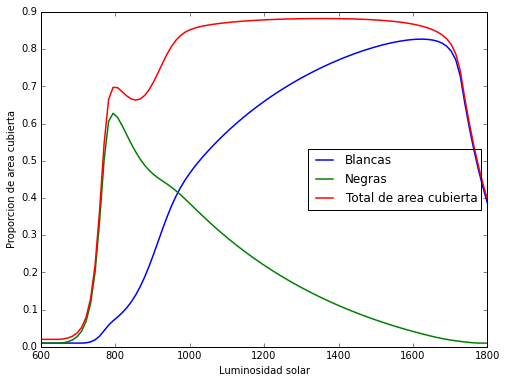

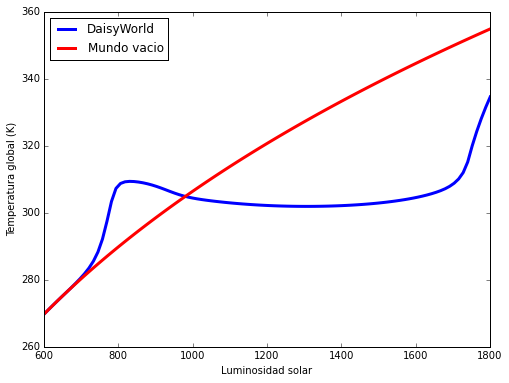

In [24]:
negra = Planta("negra",.25, .01)#condiciones iniciales de las plantas
blanca = Planta("blanca",.75, .01)

luminosidad = np.linspace(.6,1.8,100)#vector de luminosidad, con los pasos del modelo como longitud
luminosidad *= 1000
plantas = [negra,blanca]

primer_intento = Planeta(plantas, 0.5,luminosidad, .98)#creacion del mundo
primer_intento.vivir()
primer_intento.graficar_areas()

primer_intento.temp_planeta_vacio()
primer_intento.graficar_temp_g()

#Condiciones iniciales

La modificación de las condiciones iniciales resutla bastante curiosa; a pesar de iniciar con proporciones de área completamente distintas, el equilibrio se mantiene.

Ejemplificamos esto aleatorizando, sin salir del area total igual a uno, las proporciones de área iniciales de cada margarita. Cada vez que se ejecute el siguiente bloque de código las condiciones iniciales cambiarán pero el resultado en general será el mismo. La temoperatura planetaria se mantendrá casi constante dentro del rango aceptable para la vida de las plantas.

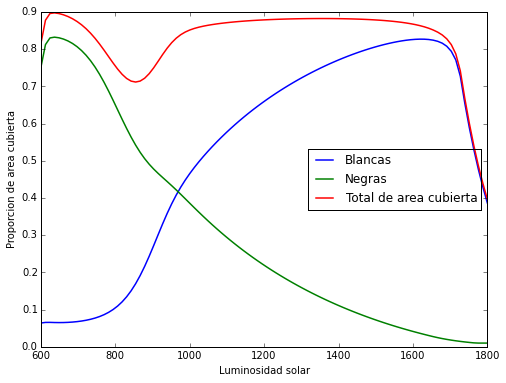

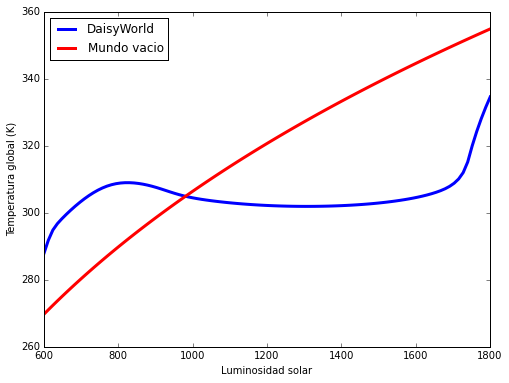

In [26]:
area_n = np.random.rand()
area_b = np.random.rand()
while (area_n + area_b) > 1:
    area_n = np.random.rand()
    area_b = np.random.rand()
area_f = 1 - (area_n + area_b)

negra = Planta("negra",.25, area_n)
blanca = Planta("blanca",.75, area_b)

luminosidad = np.linspace(.6,1.8,100)
luminosidad *= 1000
plantas = [negra,blanca]

primer_intento = Planeta(plantas, 0.5,luminosidad, area_f)
primer_intento.vivir()
primer_intento.graficar_areas()
primer_intento.temp_planeta_vacio()
primer_intento.graficar_temp_g()


#Simulación espacial

A continuación discretizamos los vectores de proporción de áreas de flores blanca, negras y tierra fértil. Cada entrada del vector significa el número de margaritas o lugares fertiles que hay en determinado momento, sumando las tres cien.

In [27]:
area_blanca= np.array(primer_intento.area_blanca)*100
area_blanca = np.round(area_blanca).astype(int)
area_negra= np.array(primer_intento.area_negra)*100
area_negra = np.round(area_negra).astype(int)
area_fertil = np.ones(100)*100 - area_blanca - area_negra
area_fertil = area_fertil.astype(int)

Transformamos los elementos de los vectores en coordenadas del plano, de acuerdo al número de elementos de cada tipo.

In [28]:
def obtener_posiciones(area_negra,area_blanca,area_fertil,step): #Selecciono de forma aleatoria
    negras = area_negra[step] #Obtengo el número de margaritas que existen en el tiempo "step" para cada color
    blancas = area_blanca[step]
    fertil = 100-negras-blancas
    posiciones = [(i+.5,j+.5) for i in range(0,10)for j in range(0,10)]#Genero mi lista de 100 elementos
    po_neg=[]
    for i in  range(negras): 
        n = np.random.choice(100-i) #Escojo un número aleatorio "n"
        po_neg.append(posiciones.pop(n))  #La margarita "n" sera de color negro, elimino esa coordenada 
    po_blan = []
    k = 100-negras #Solo hay disponibles este número de coordendas
    for i in  range(blancas):
        n = np.random.choice(k-i)
        po_blan.append(posiciones.pop(n))#Pinto las margaritas blancas
    return po_neg,po_blan,posiciones #Regreso mis listas

In [29]:
def obtener_posiciones_2(area_negra,area_blanca,area_fertil,step):#Selecciono de forma ordenada
    negras = area_negra[step]
    blancas = area_blanca[step]
    fertil = 100-negras-blancas
    posiciones = [(i+.5,j+.5) for i in range(0,10)for j in range(0,10)]
    po_neg=[]
    for i in  range(negras): 
        po_neg.append(posiciones[i])#Escojo mis margaritas de forma ordenada
    po_blan = []
    for i in  range(blancas):
        po_blan.append(posiciones[i+negras])
    posiciones=posiciones[negras+blancas:] #Hago un slicing para escoger los lugares fertiles
    return po_neg,po_blan,posiciones

Las siguientes clases son las utilizadas para simular.

In [30]:
class Mundo2:
    def __init__(self, agentes,ar_negra,ar_blanca,ar_fertil, ancho=15, alto=15, steps=100,metodo=0):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.ar_negra = ar_negra
        self.ar_blanca = ar_blanca
        self.ar_fertil = ar_fertil
        self.metodo = metodo
        self.init_anim()
            
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
        self.ax.set_axis_bgcolor('azure')
        plot_args = {'markersize' : 8, 'alpha' : 1}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='white', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='black', **plot_args)
        self.puntos_2, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], [] #Margaritas negras
        x_values_1, y_values_1 = [], []#Margaritas blancas
        x_values_2, y_values_2 = [], []#Lugares Fertiles
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0: #Dependiendo del tipo de planta que es, lo agrego a su respectiva lista
                x_values_0.append(x)
                y_values_0.append(y)
                
            if agente.tipo == 1:
                    x_values_1.append(x)
                    y_values_1.append(y)
            if agente.tipo == 2:
                    x_values_2.append(x)
                    y_values_2.append(y)        
            
        self.puntos_0.set_data(x_values_1, y_values_1)
        self.puntos_1.set_data(x_values_0, y_values_0)
        self.puntos_2.set_data(x_values_2, y_values_2)
       
        self.ax.set_title('Tiempo {}'.format(step))
        
        return 
       
    def actualizar(self, step):   
        self.dibujar(step) 
        if self.metodo==0:#Dependiento de la forma de seleccionar escojo el metodo
            pos = obtener_posiciones(self.ar_negra,self.ar_blanca,self.ar_fertil,step)#Obtengo las posiciones 
                                                                                      #en el instante step
        else:
            pos = obtener_posiciones_2(self.ar_negra,self.ar_blanca,self.ar_fertil,step)
        for i in range(len(pos[0])):
            self.agentes[i].actualizar(0,pos[0][i])#Agrego las coordendas que resultaron del proceso de seleccióm
        for i in range(len(pos[1])):
            self.agentes[i+len(pos[0])].actualizar(1,pos[1][i])
        for i in range(len(pos[2])):
            self.agentes[i+len(pos[0])+len(pos[1])].actualizar(2,pos[2][i])
            
            
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        self.puntos_2.set_data([], [])
        
        return 
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=True)
        return anim

In [31]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion):
        self.tipo = tipo
        self.locacion = np.array(locacion)
     
    def actualizar(self, tipo,locacion):
        self.tipo = tipo
        self.locacion = np.array(locacion)

#Simulación del mundo en forma ordenada

Llenamos el espacio en orden, para mostrar cómo cambia la proporción de área


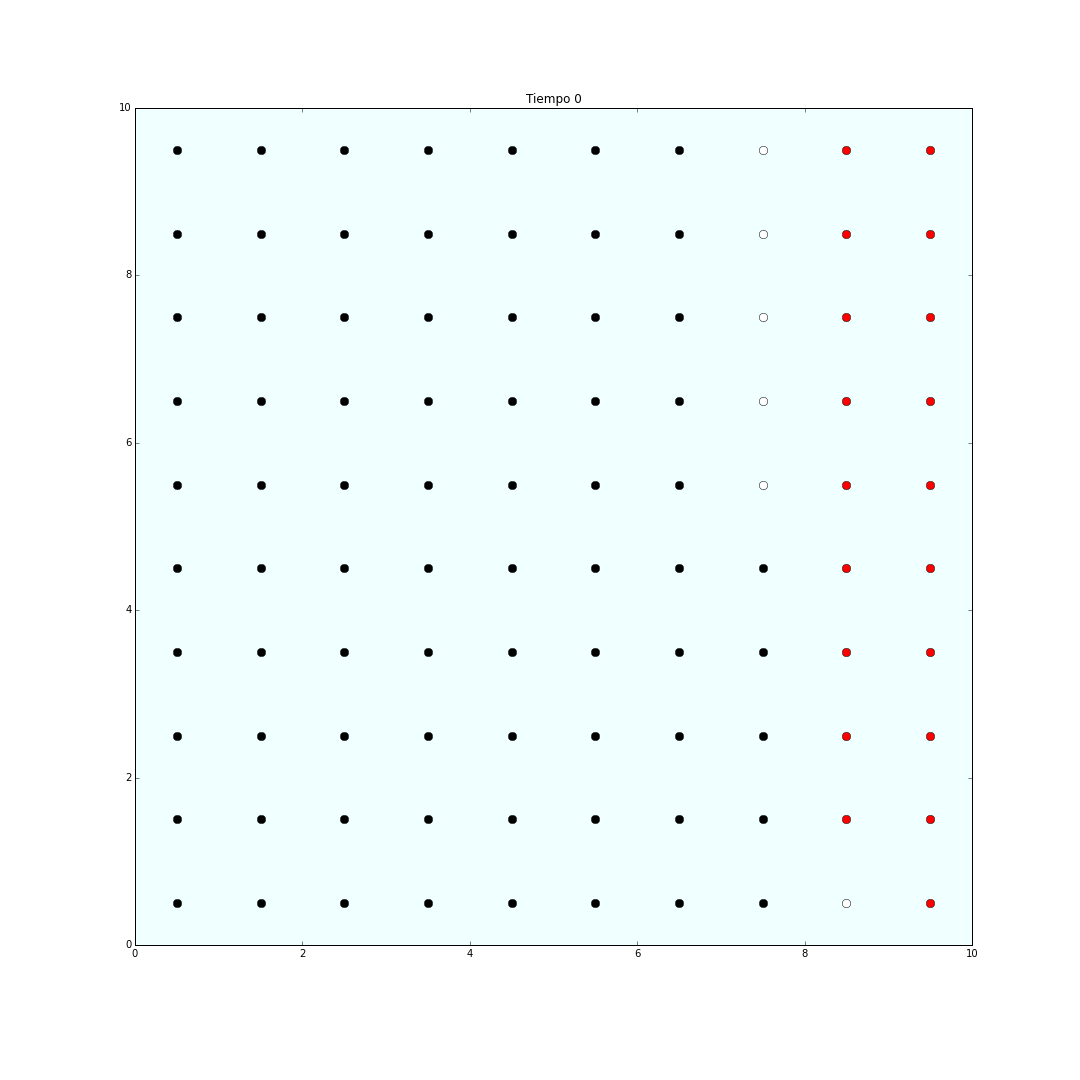
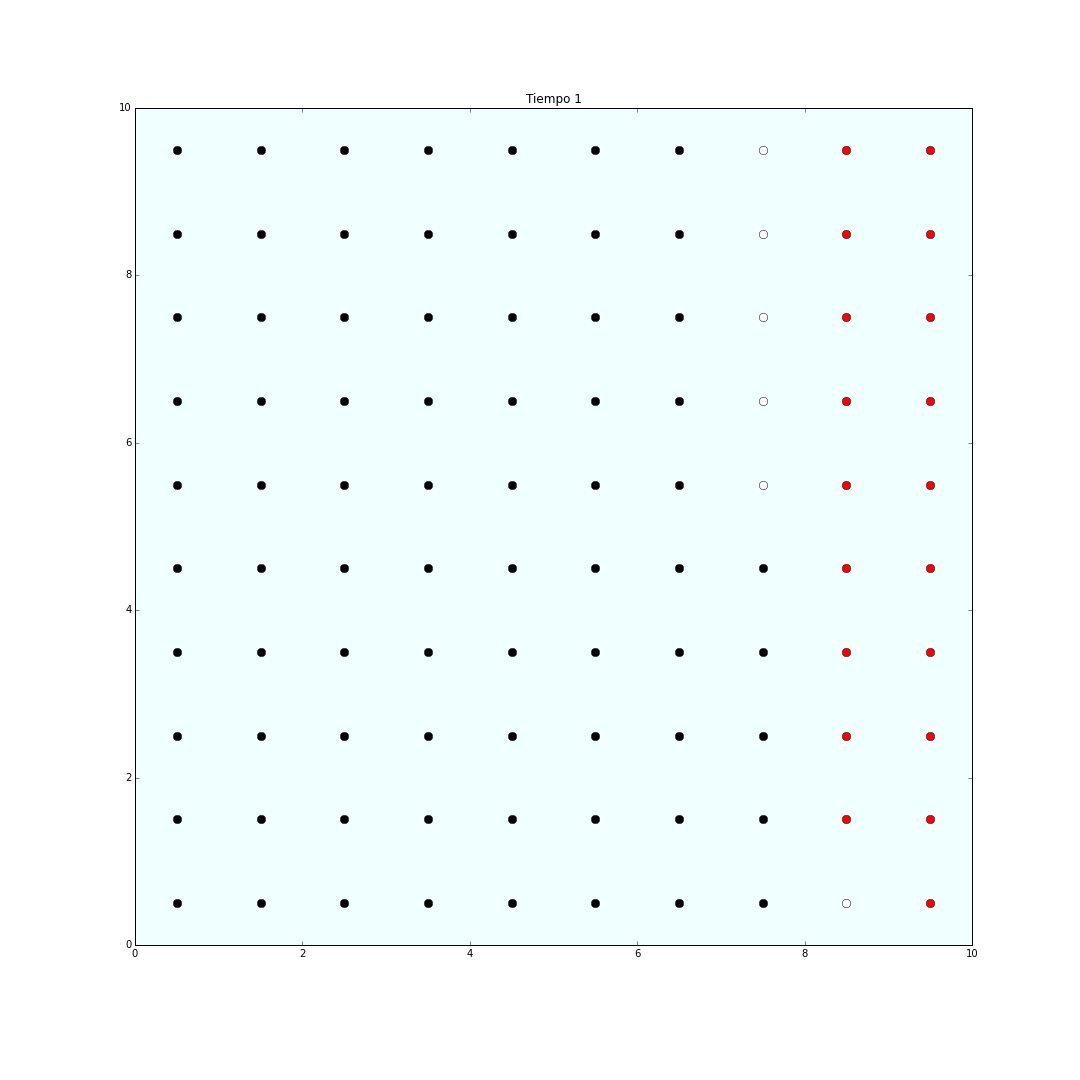
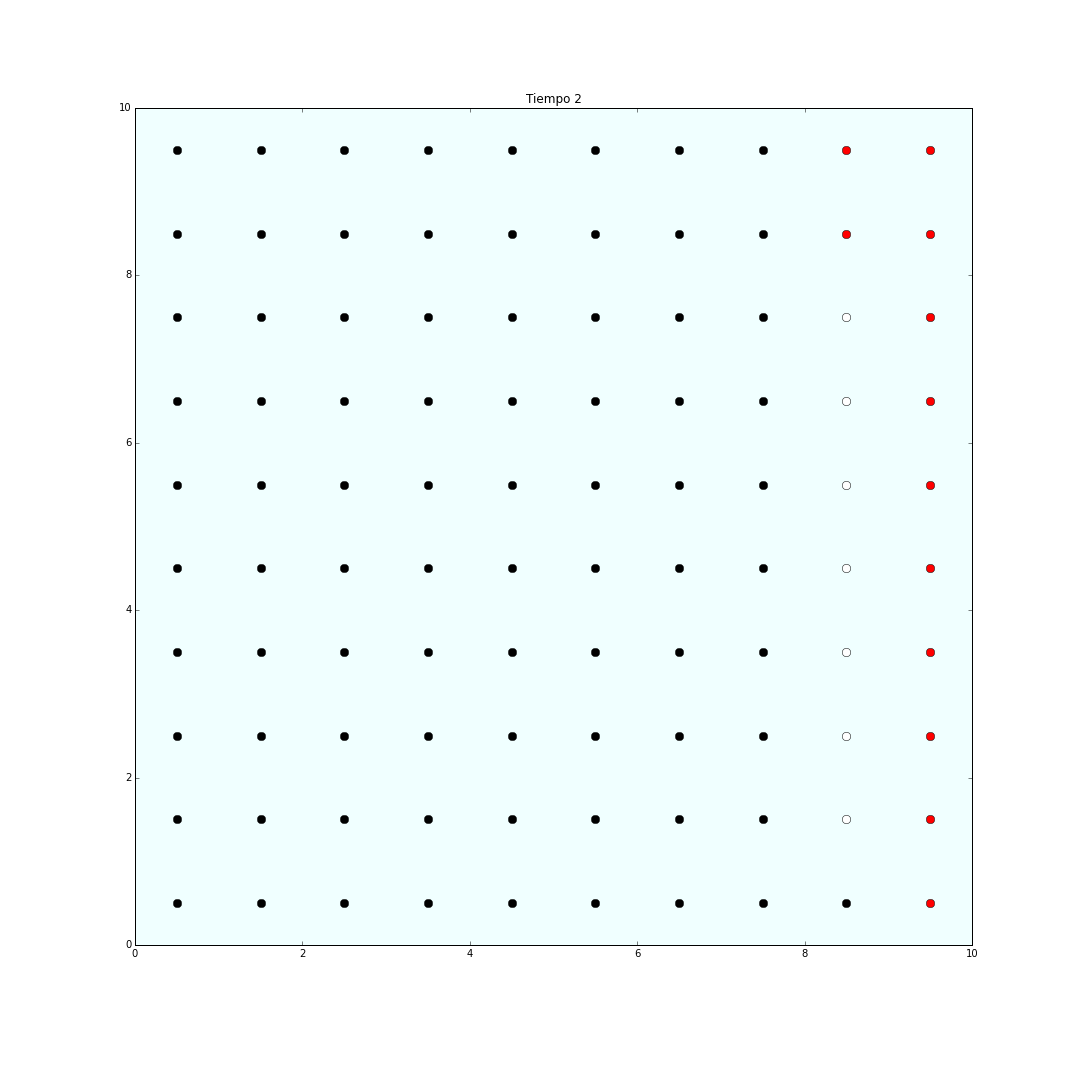
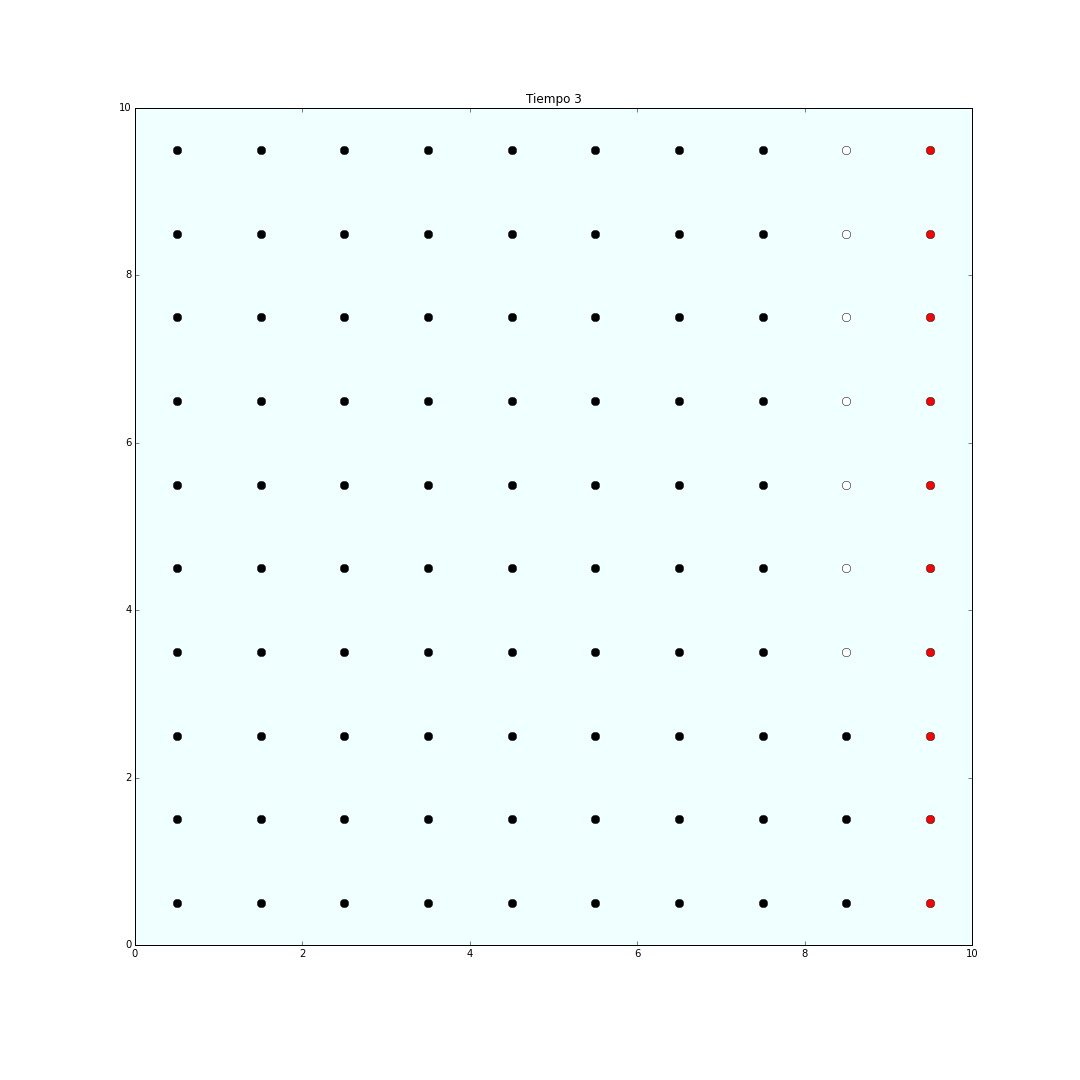
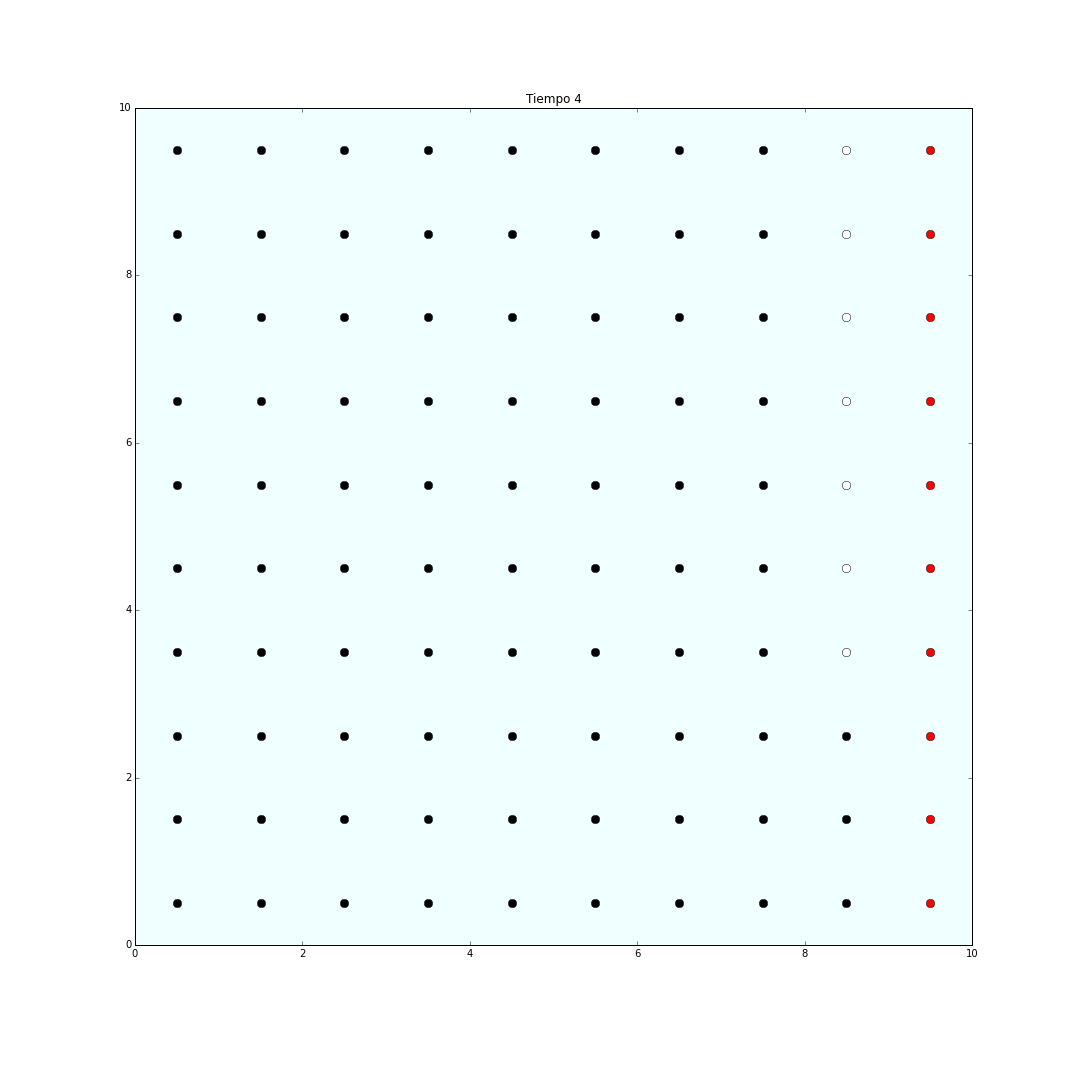
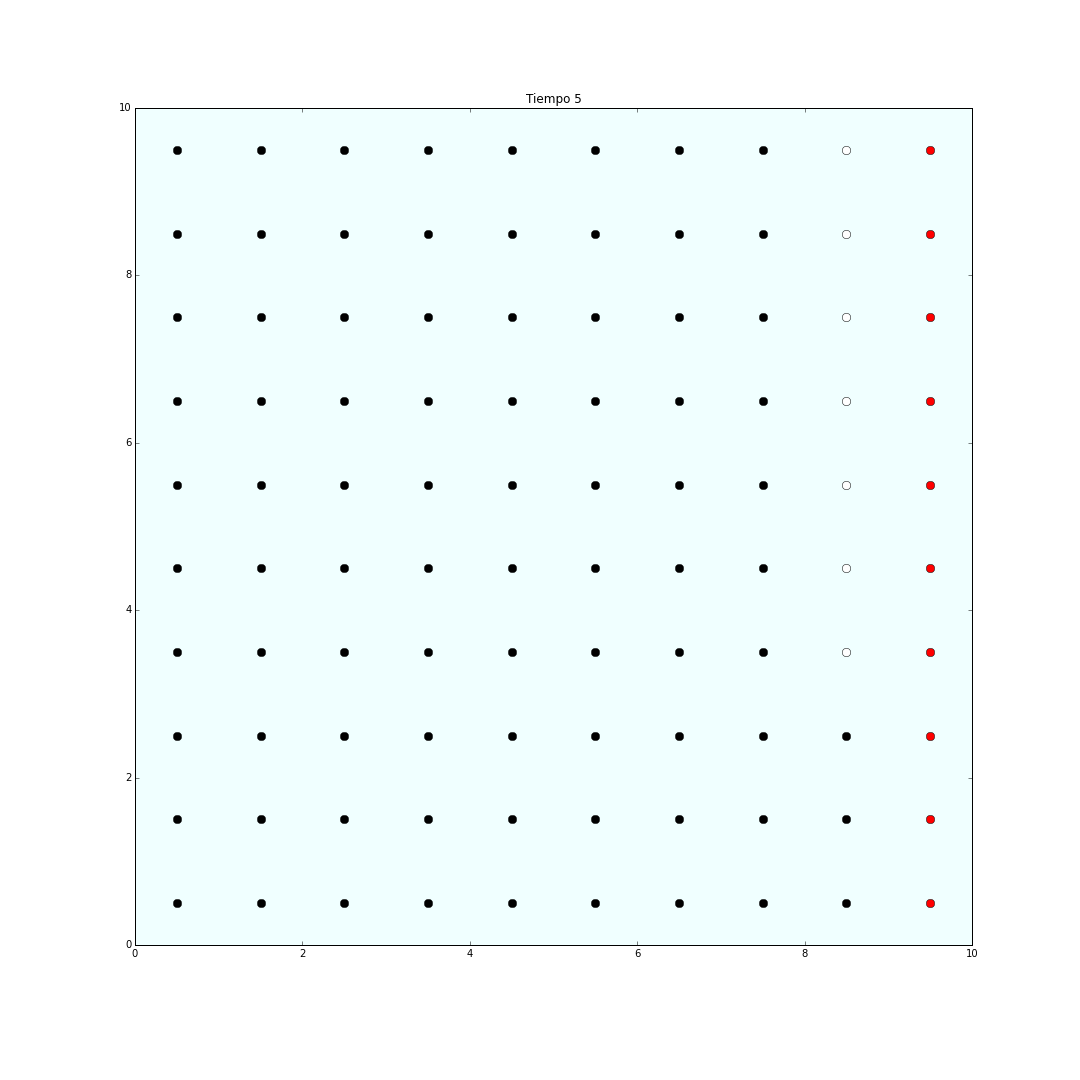
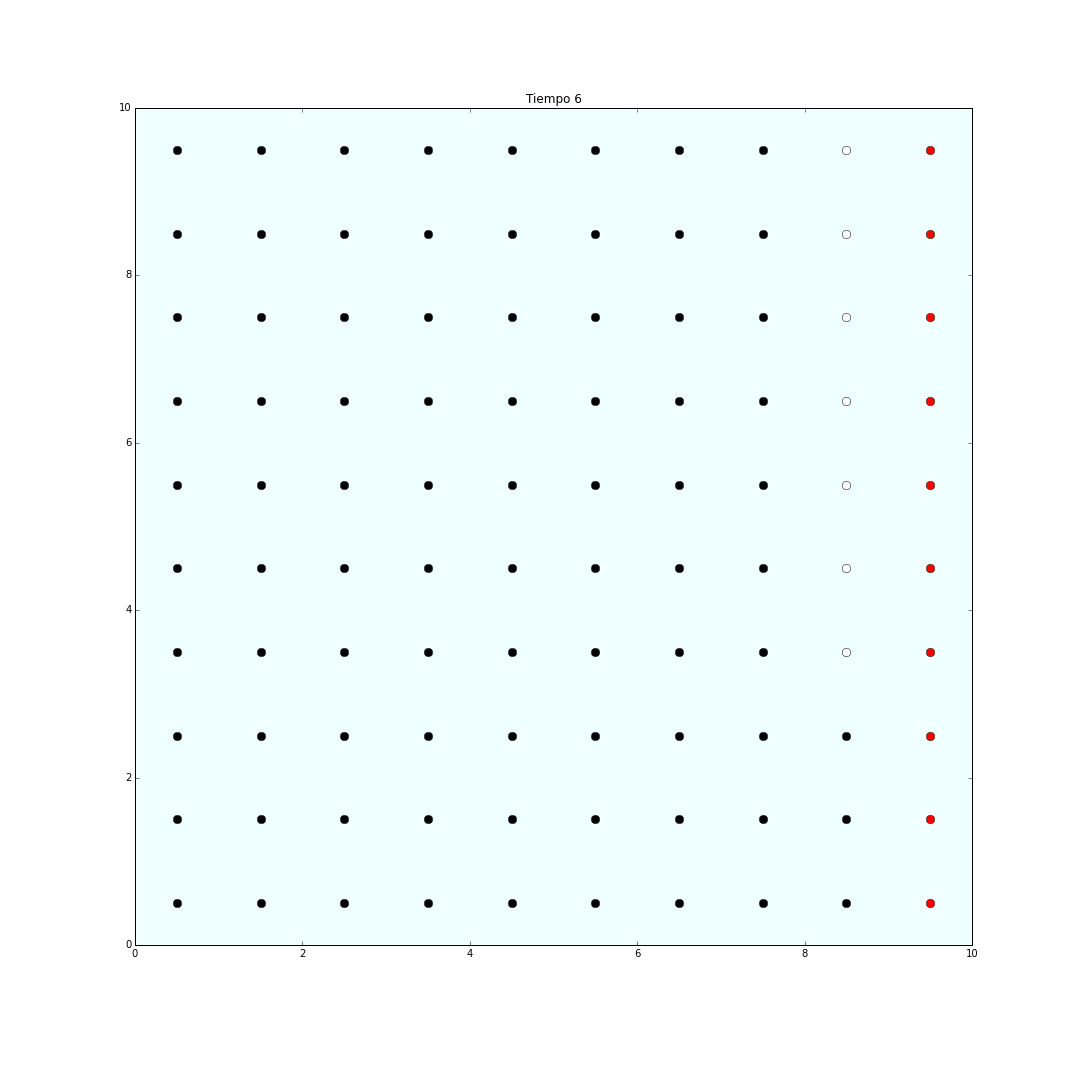
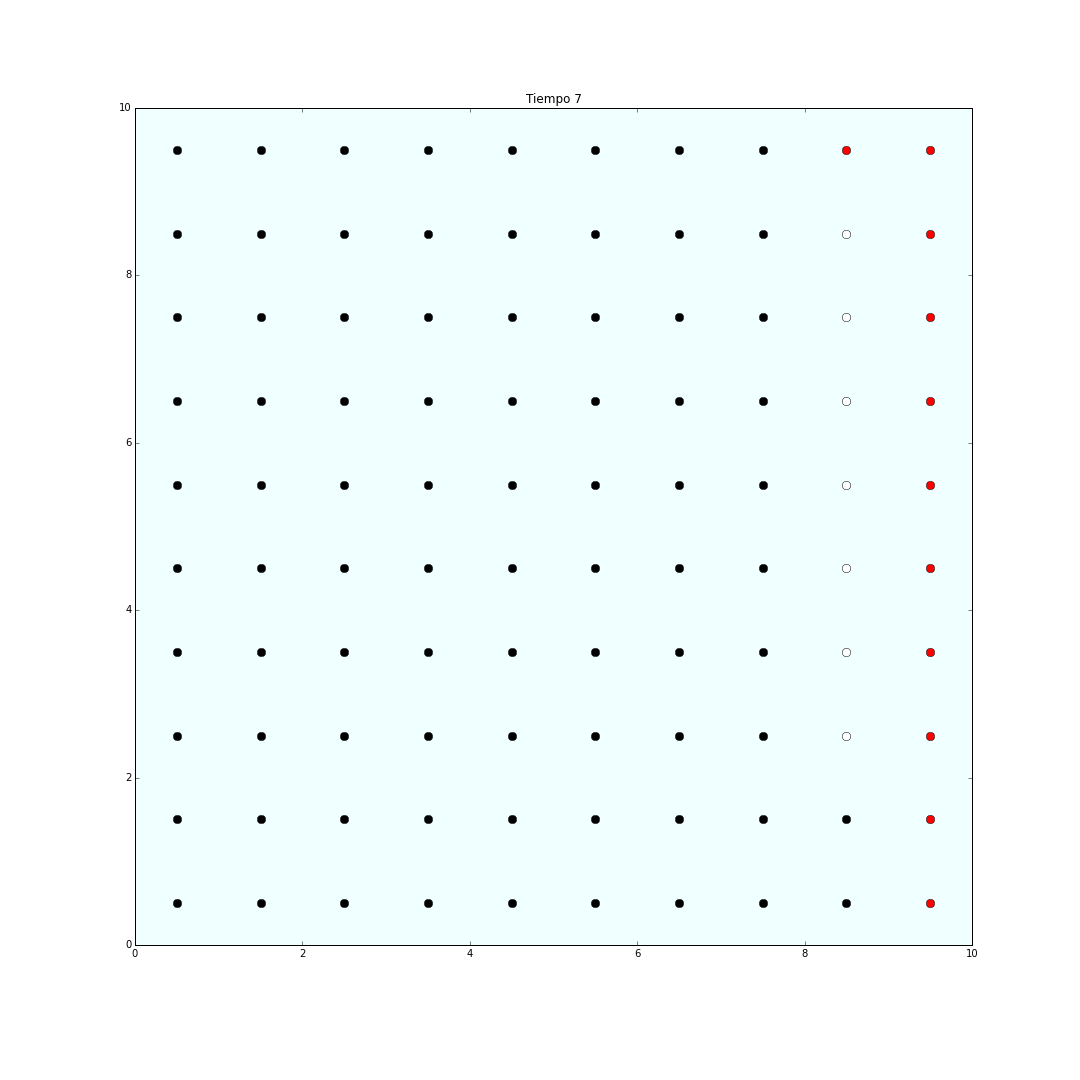
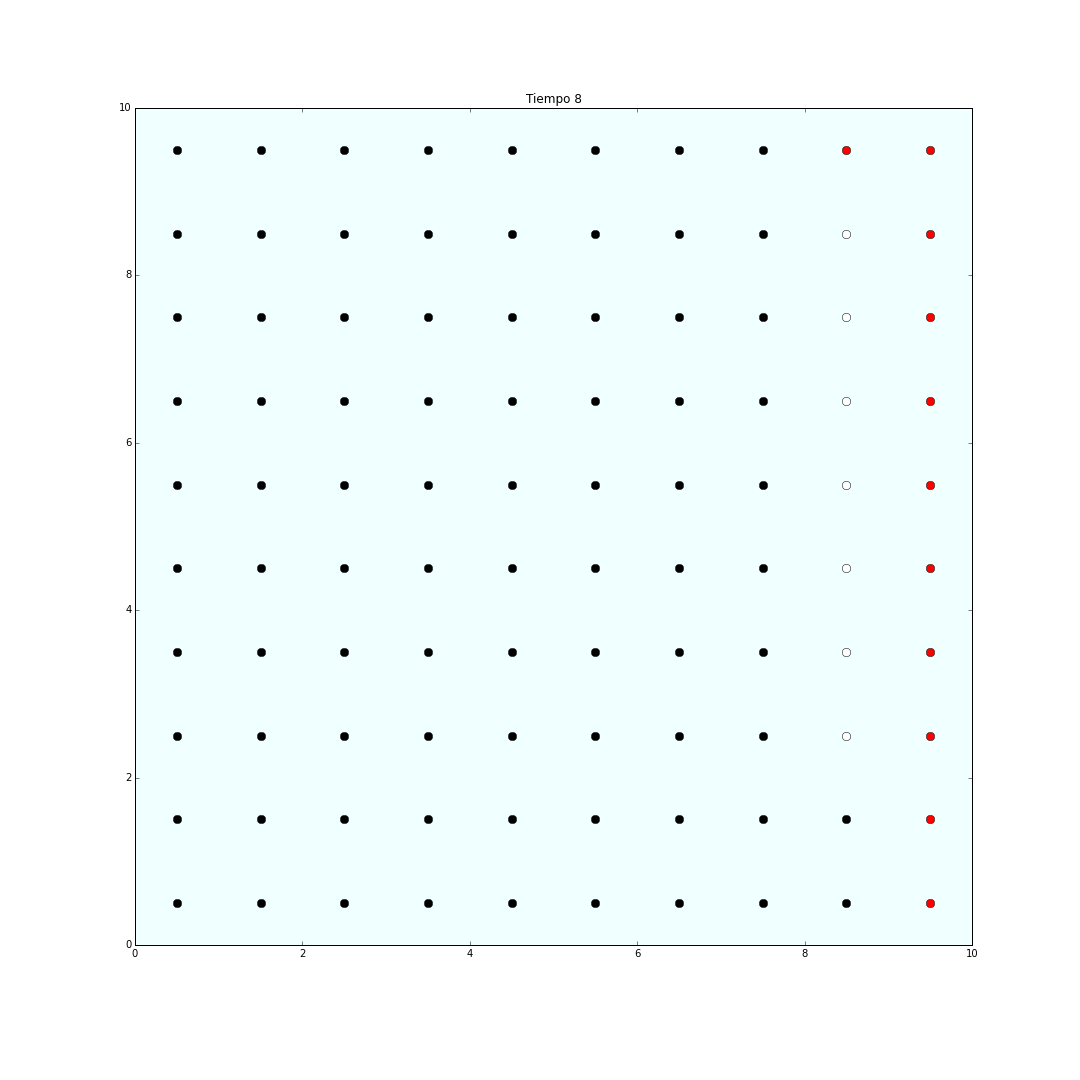
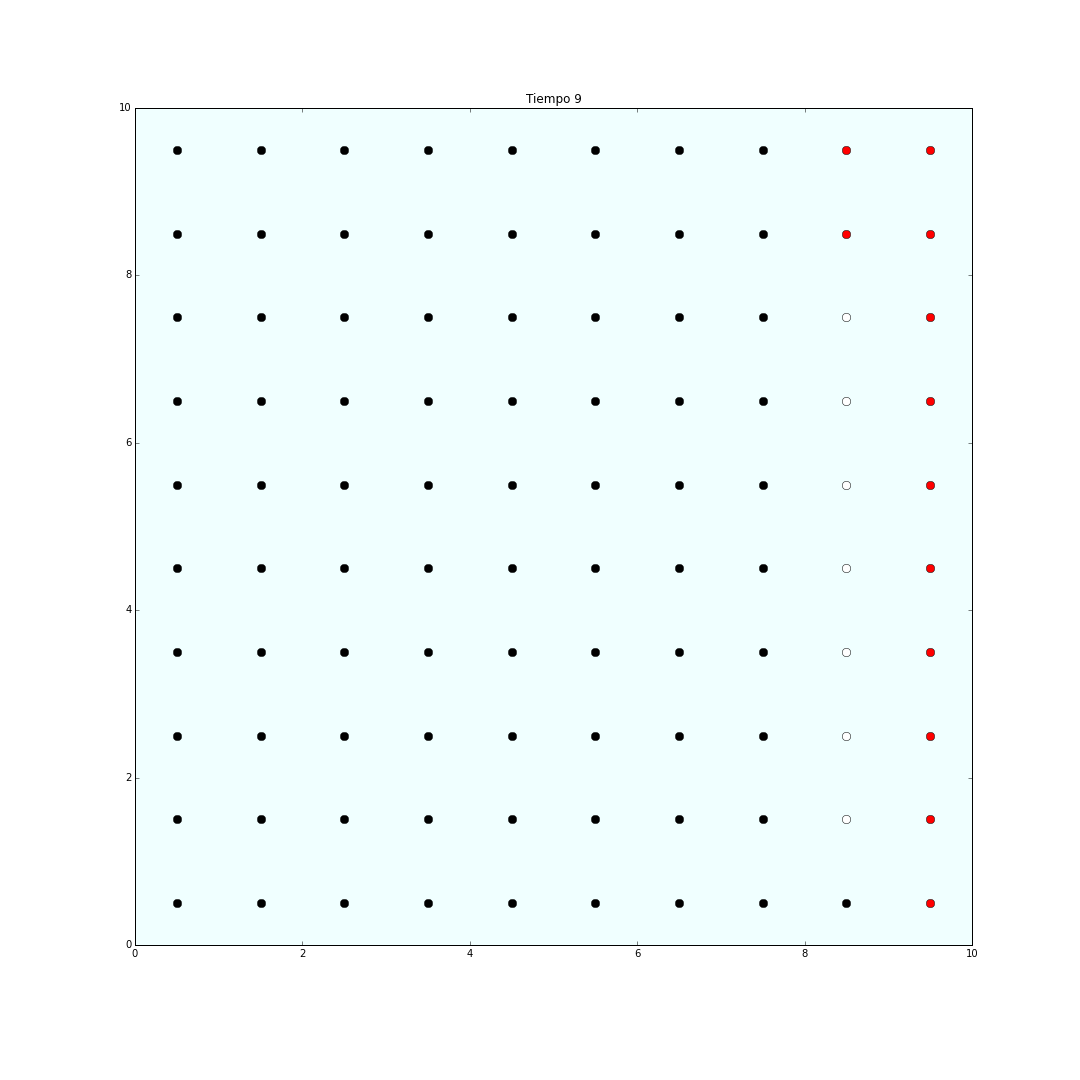
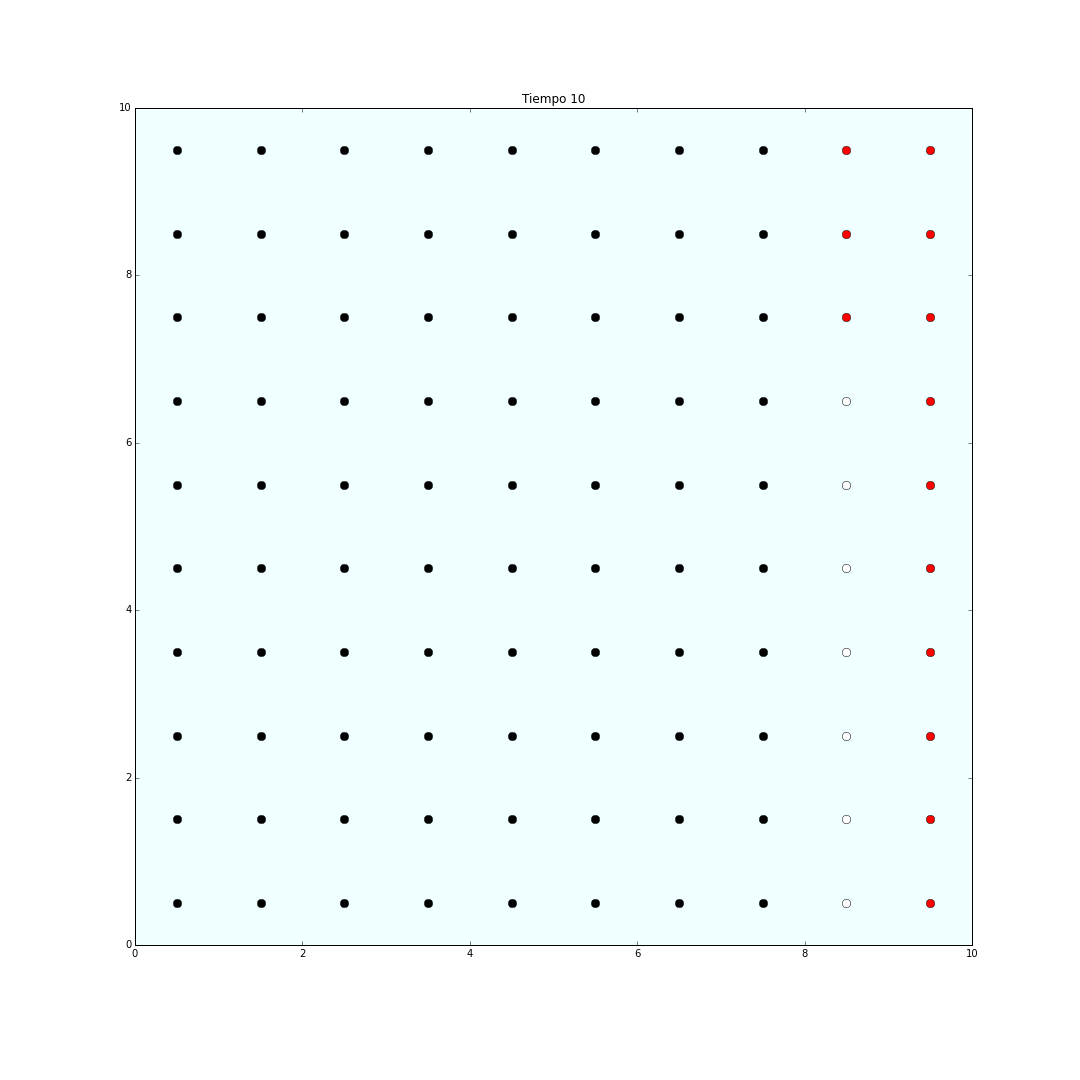
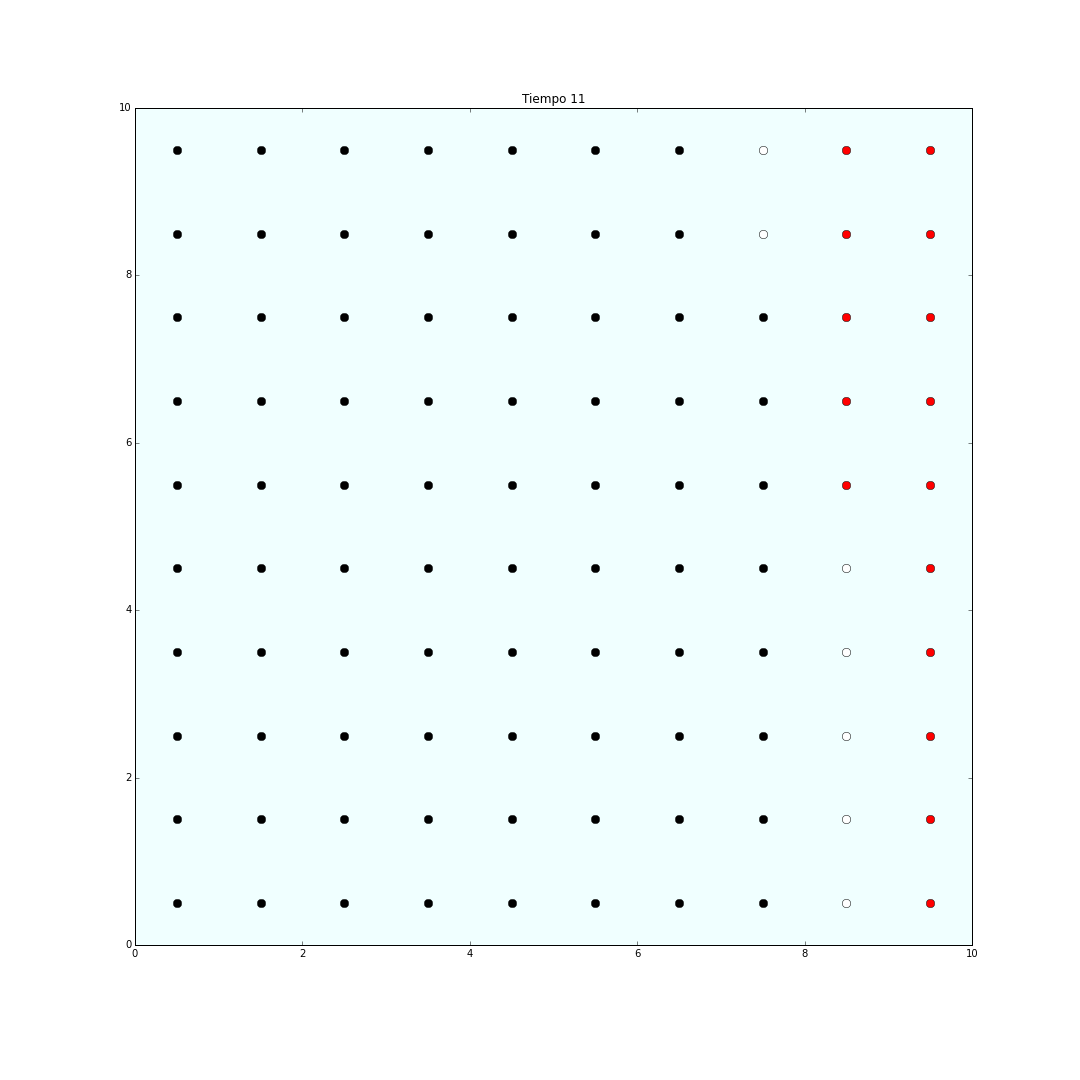
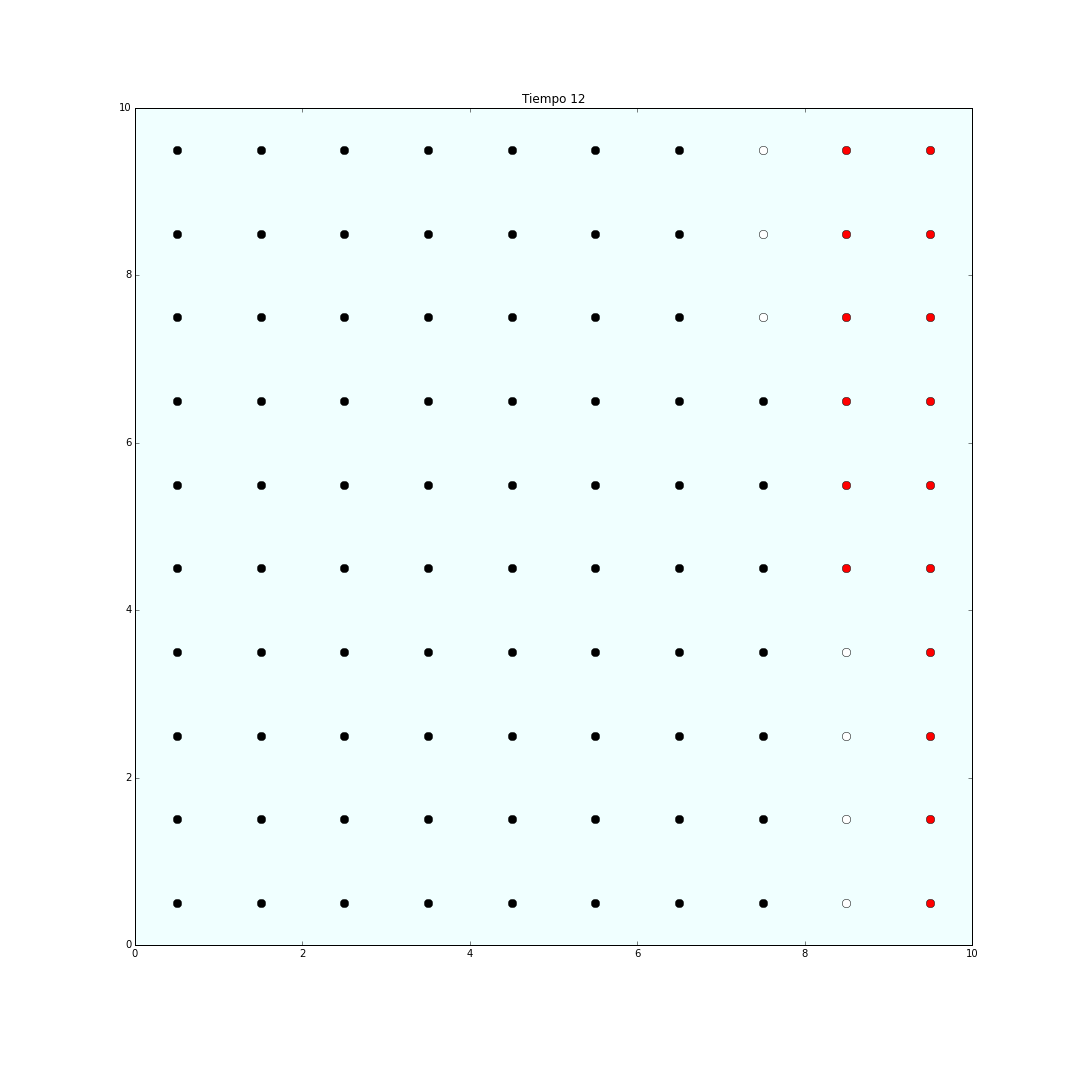
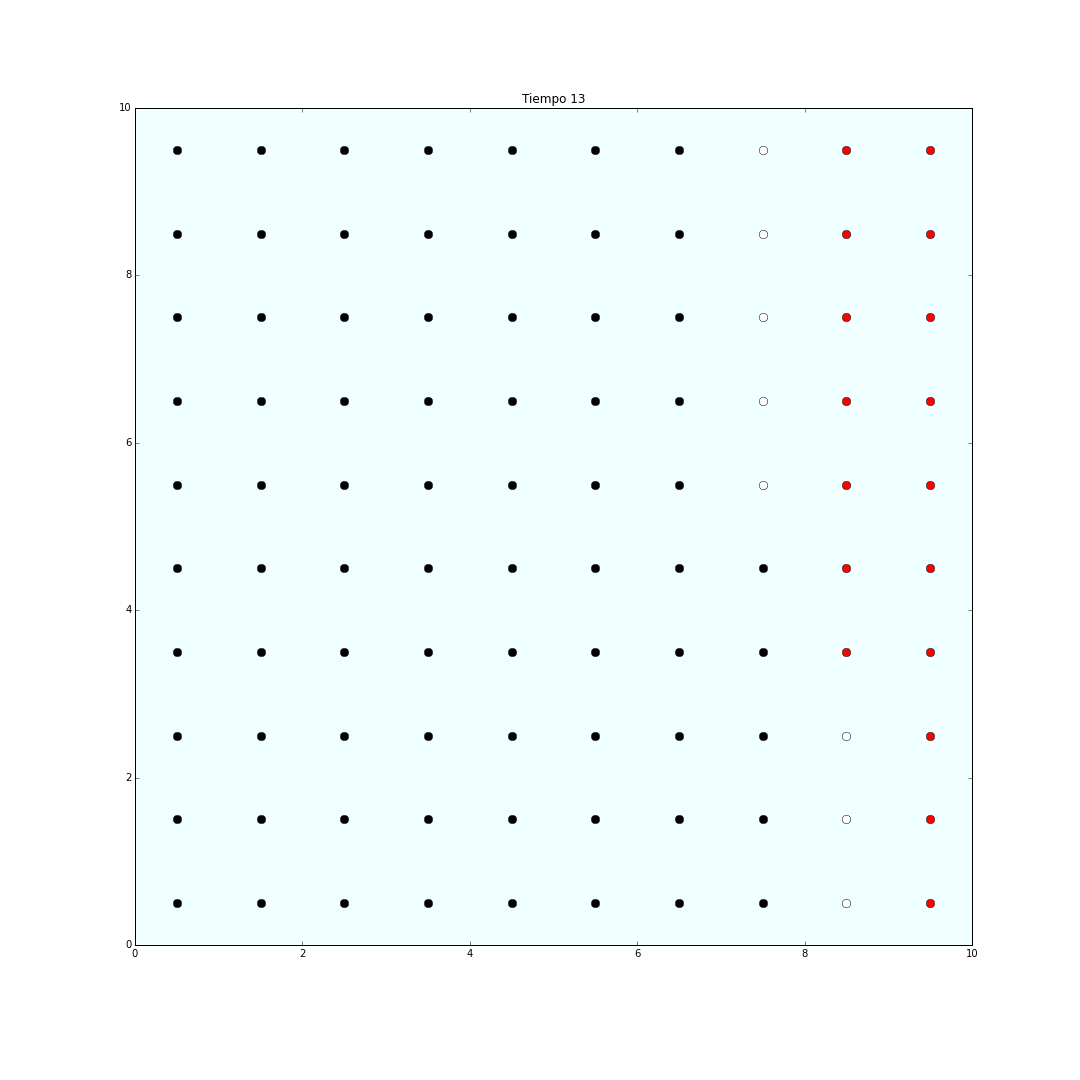
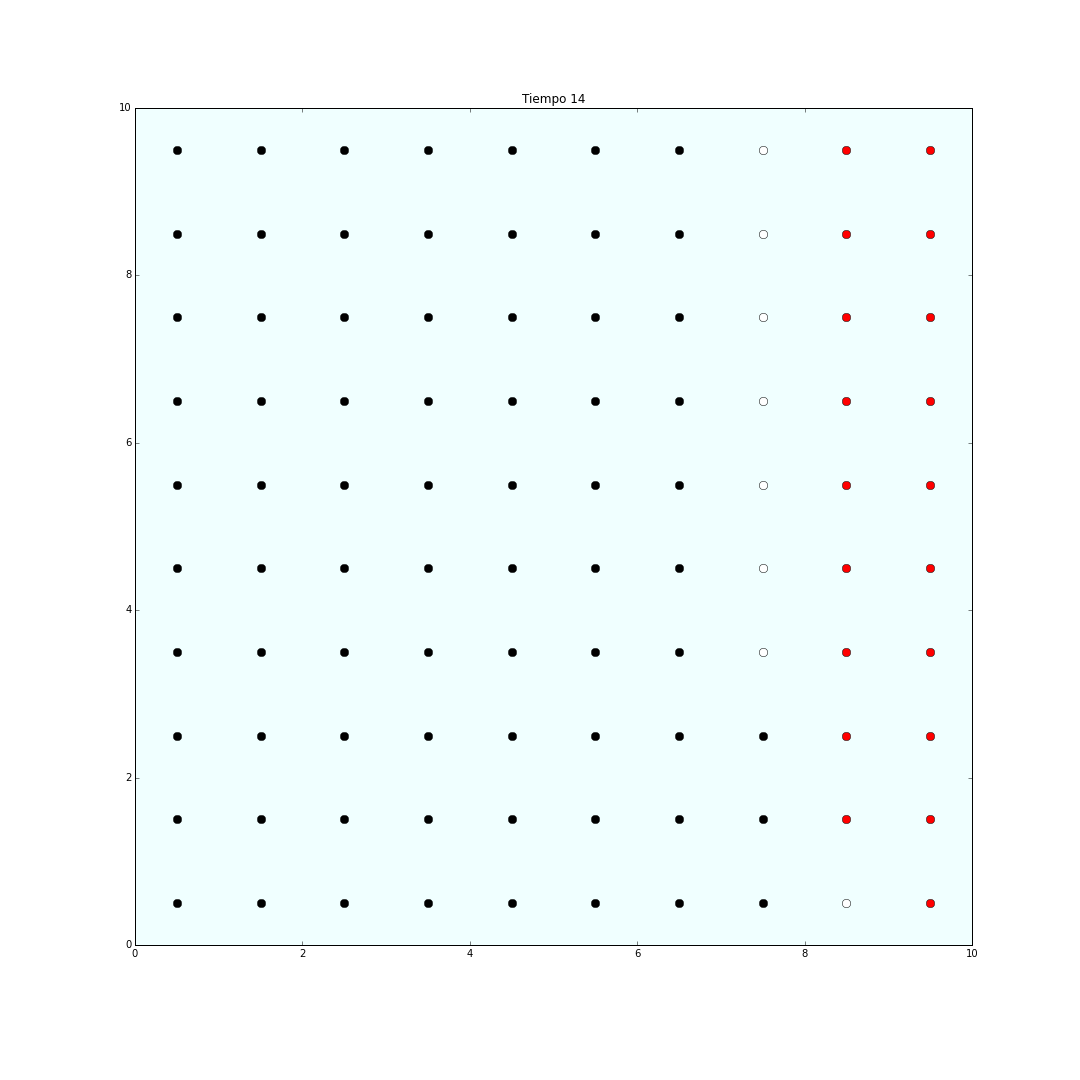
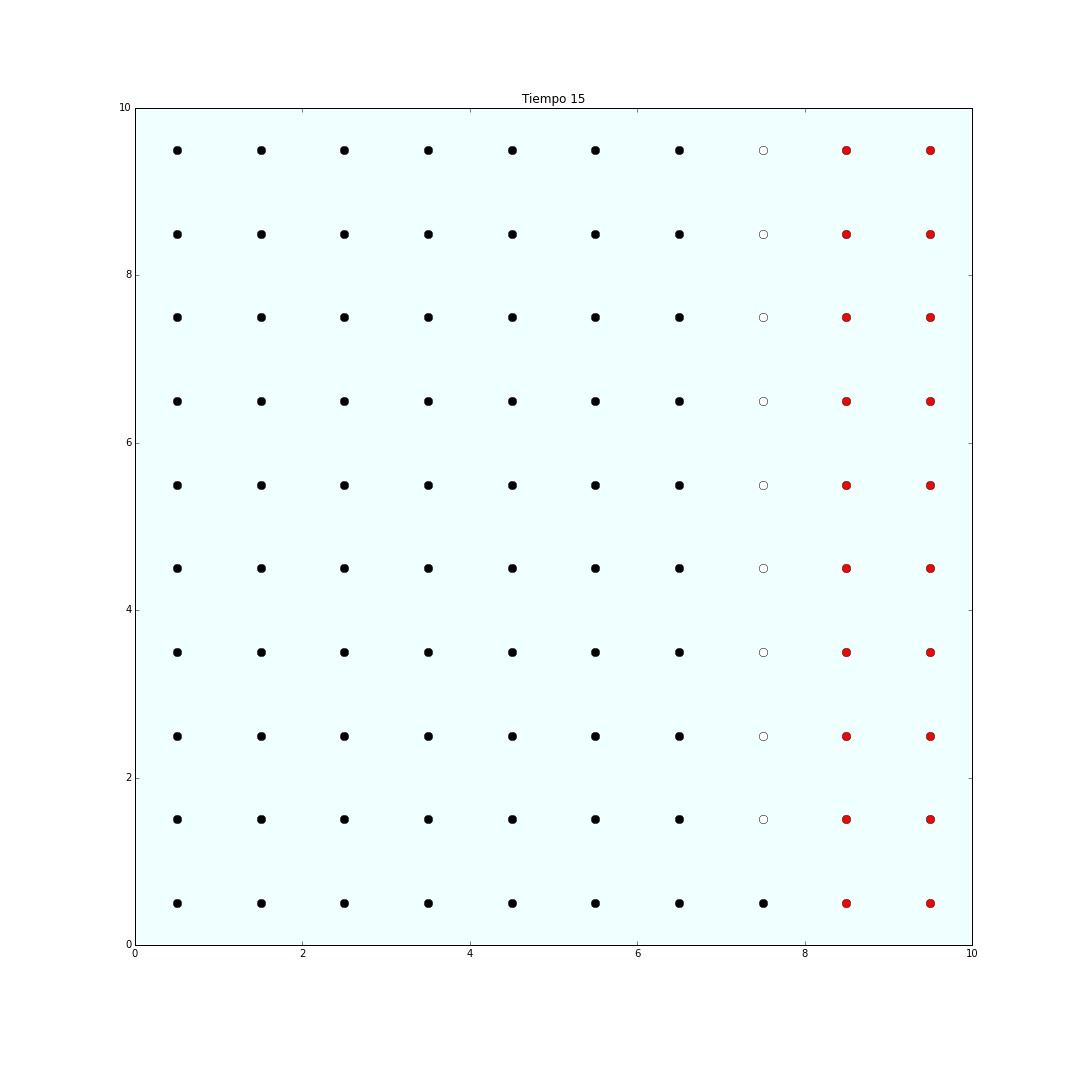
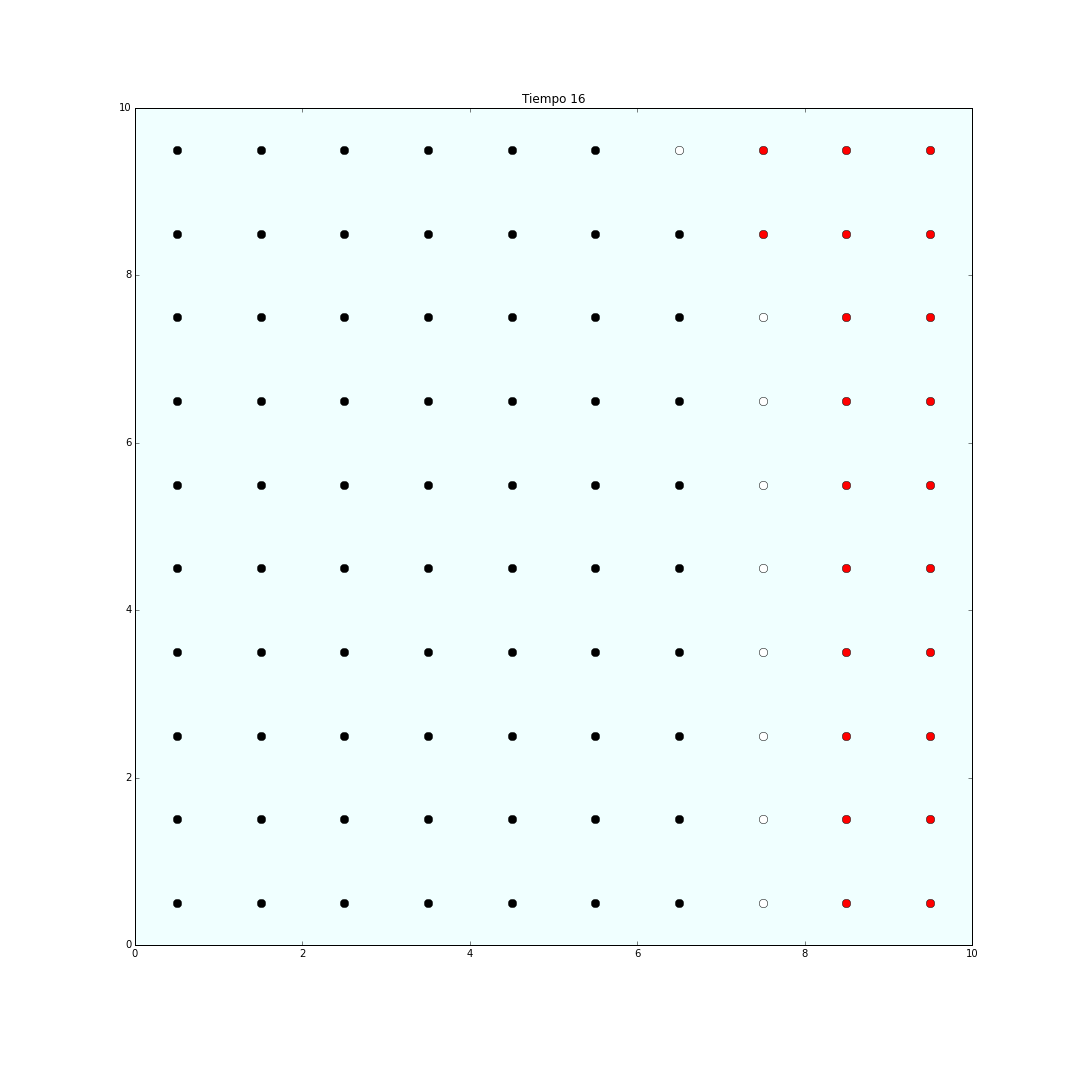
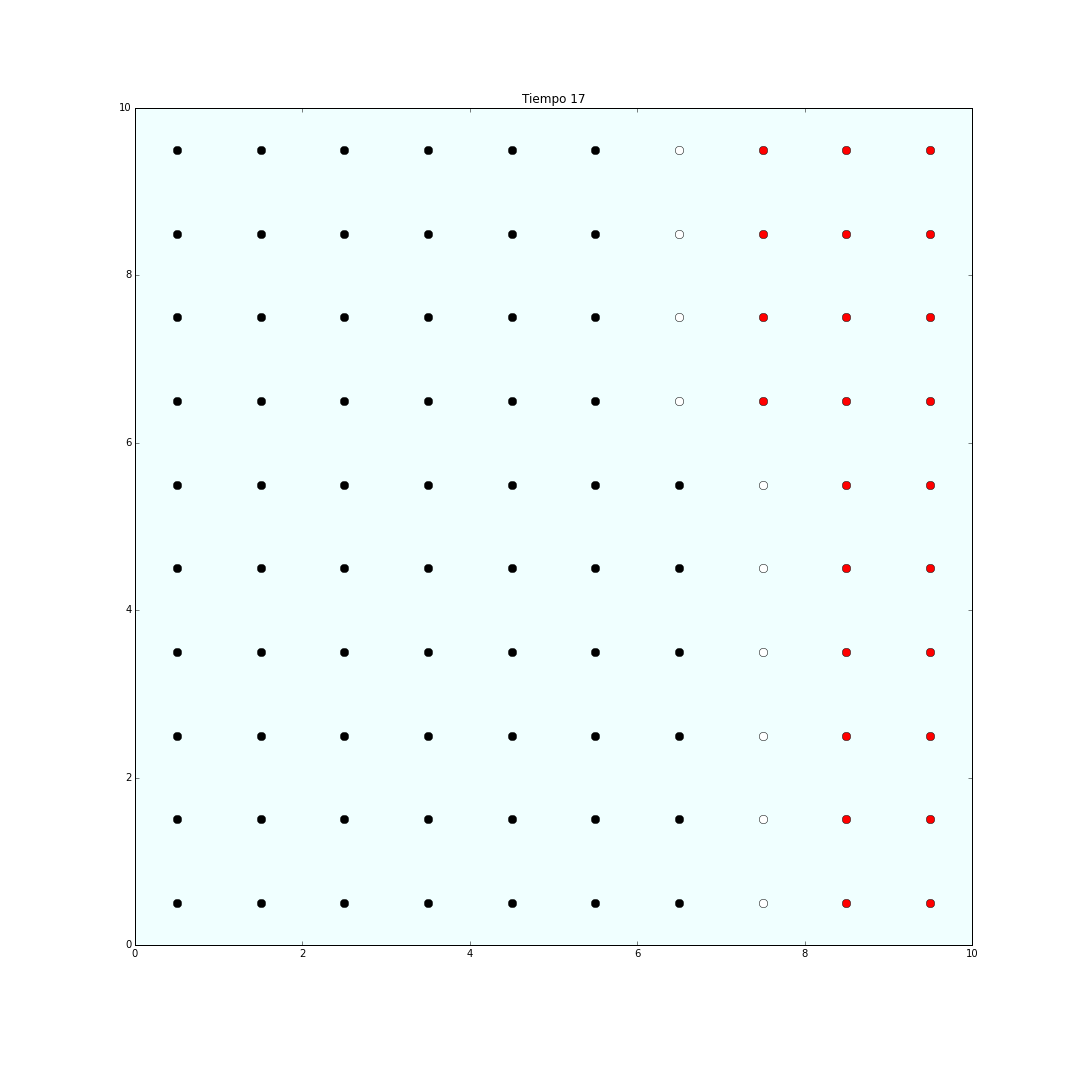
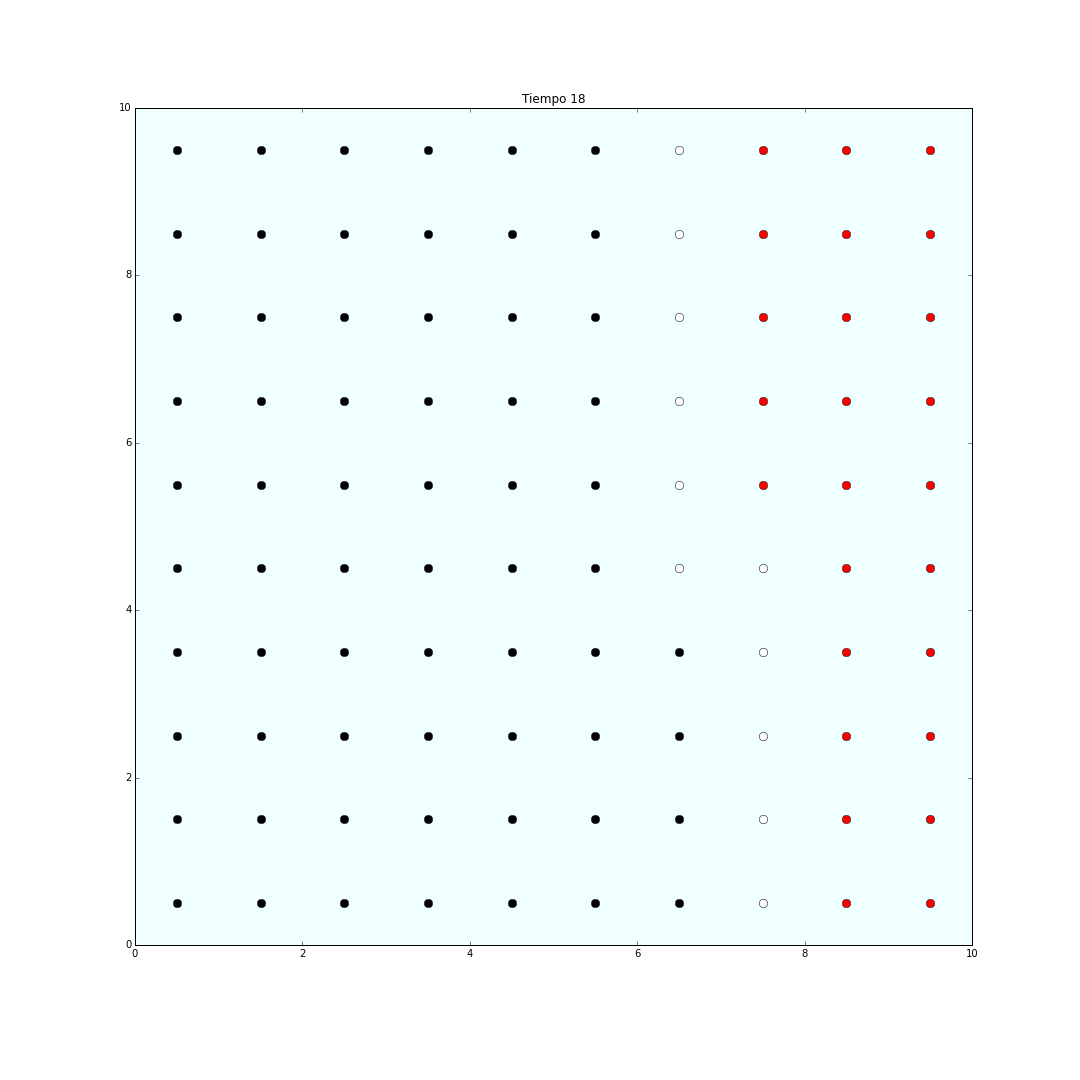
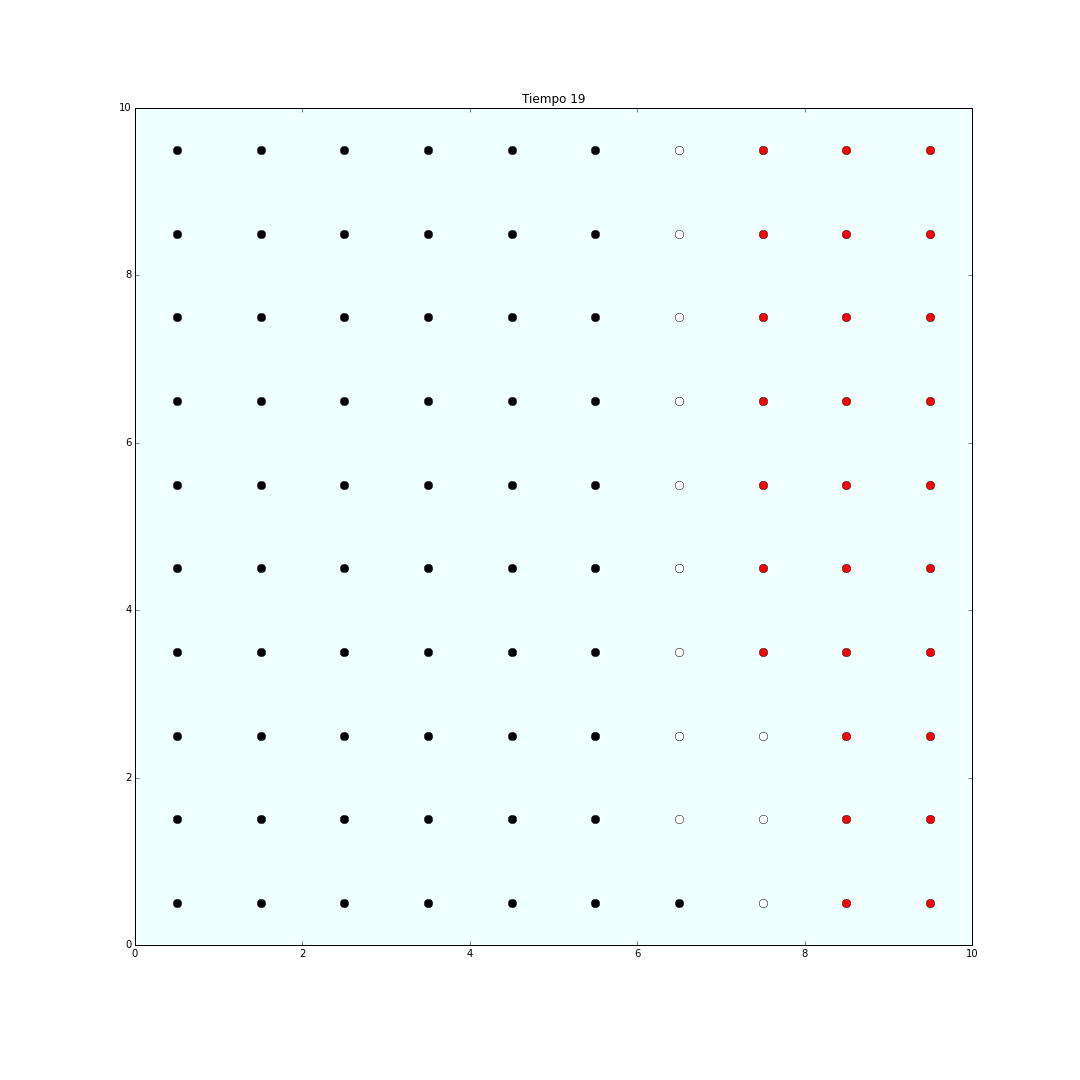
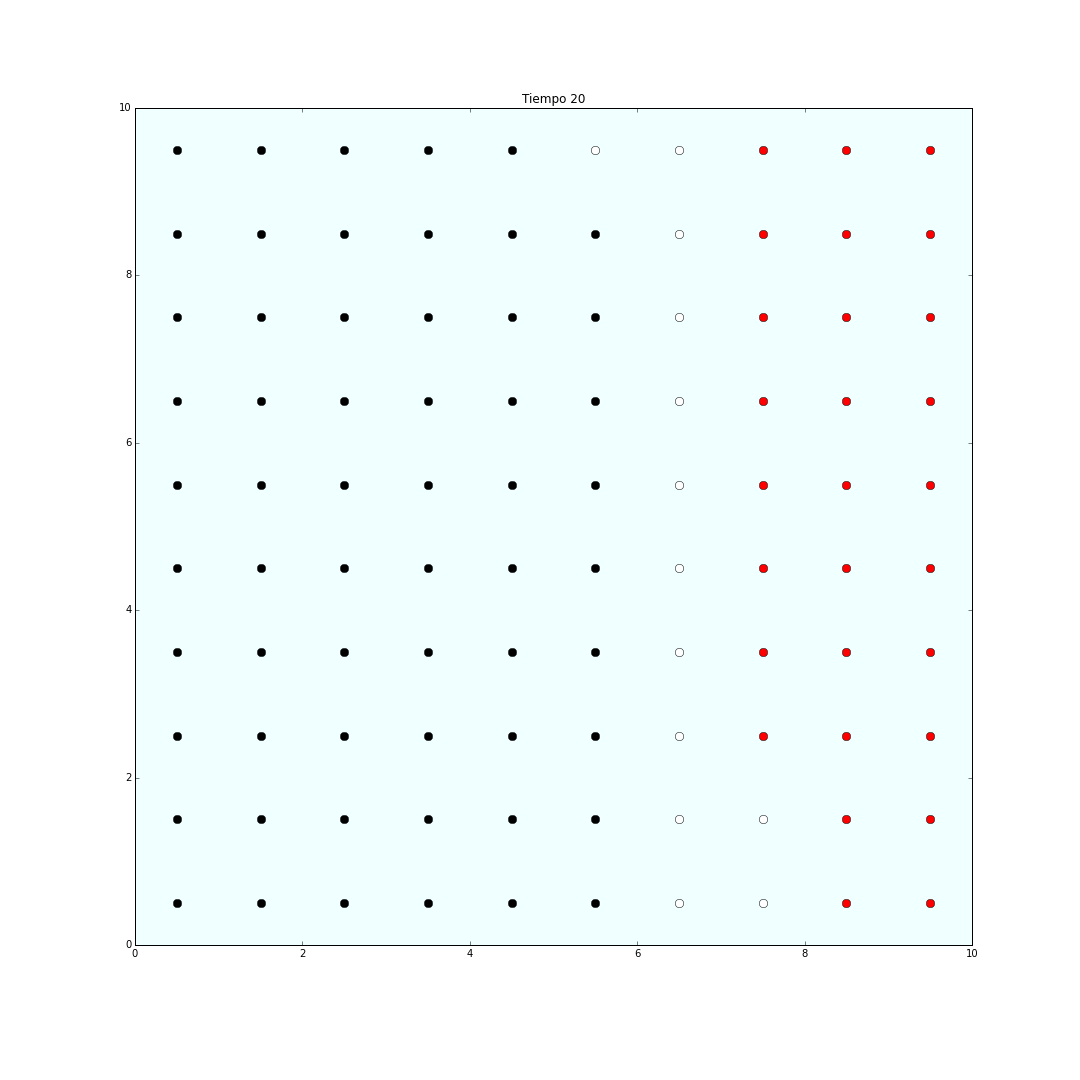
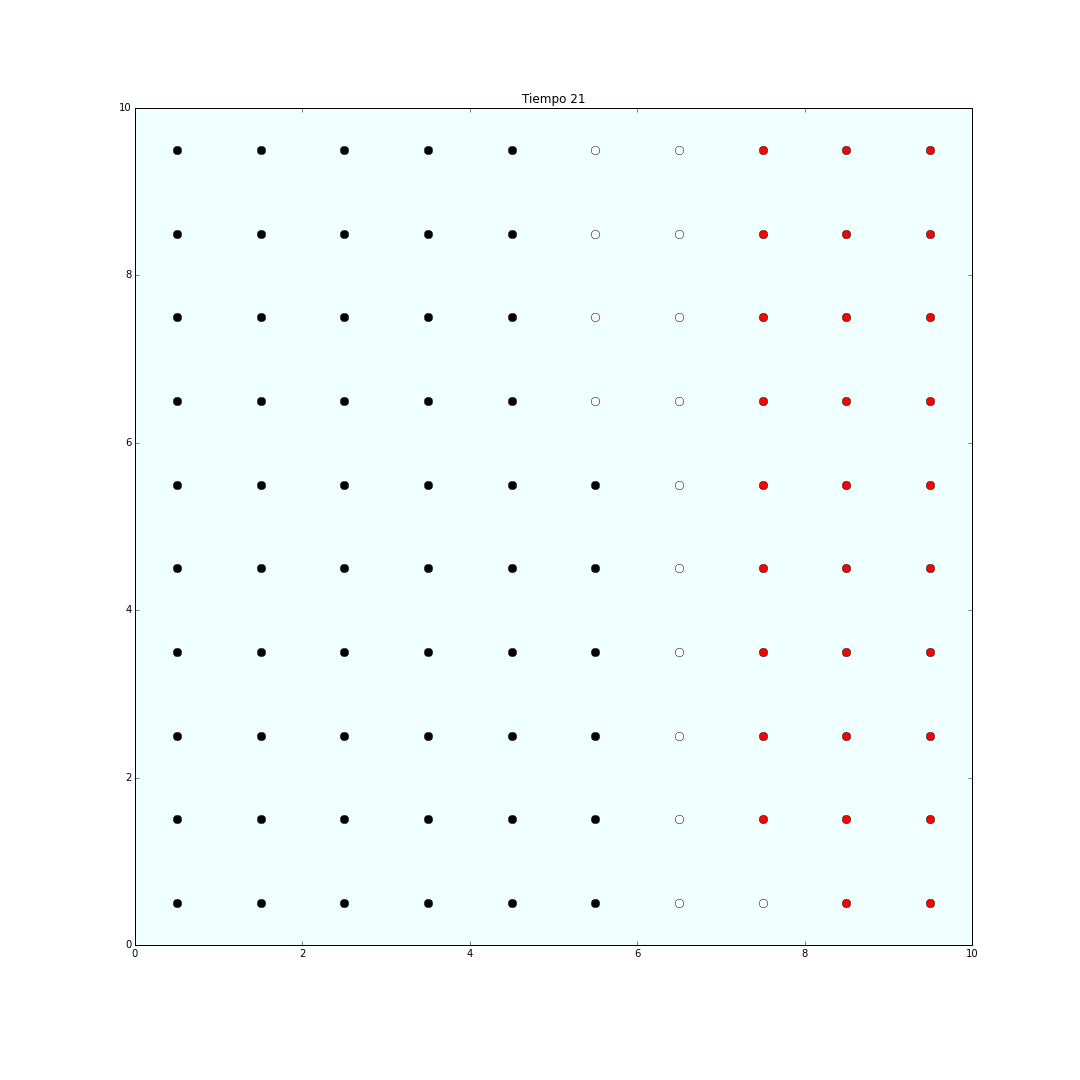
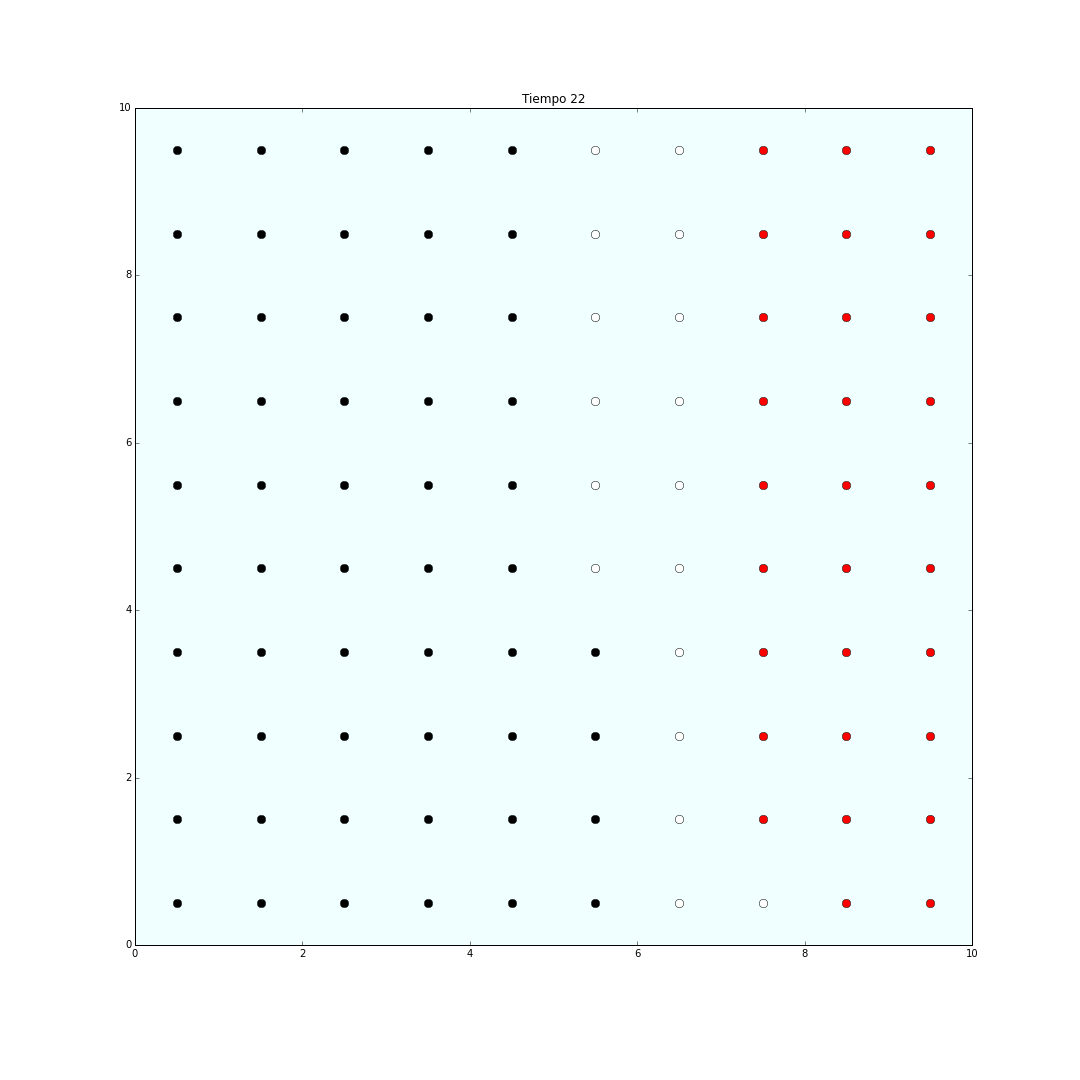
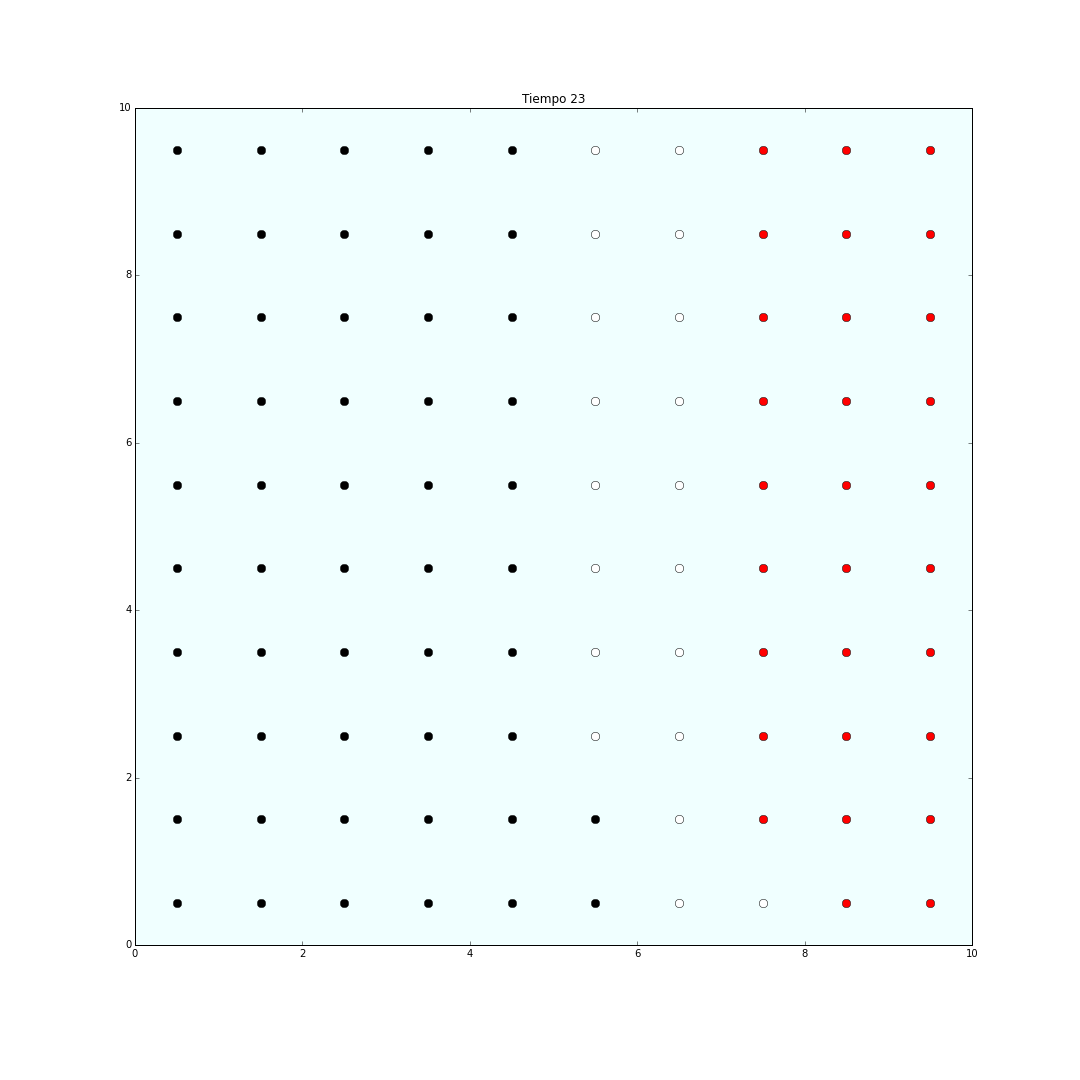
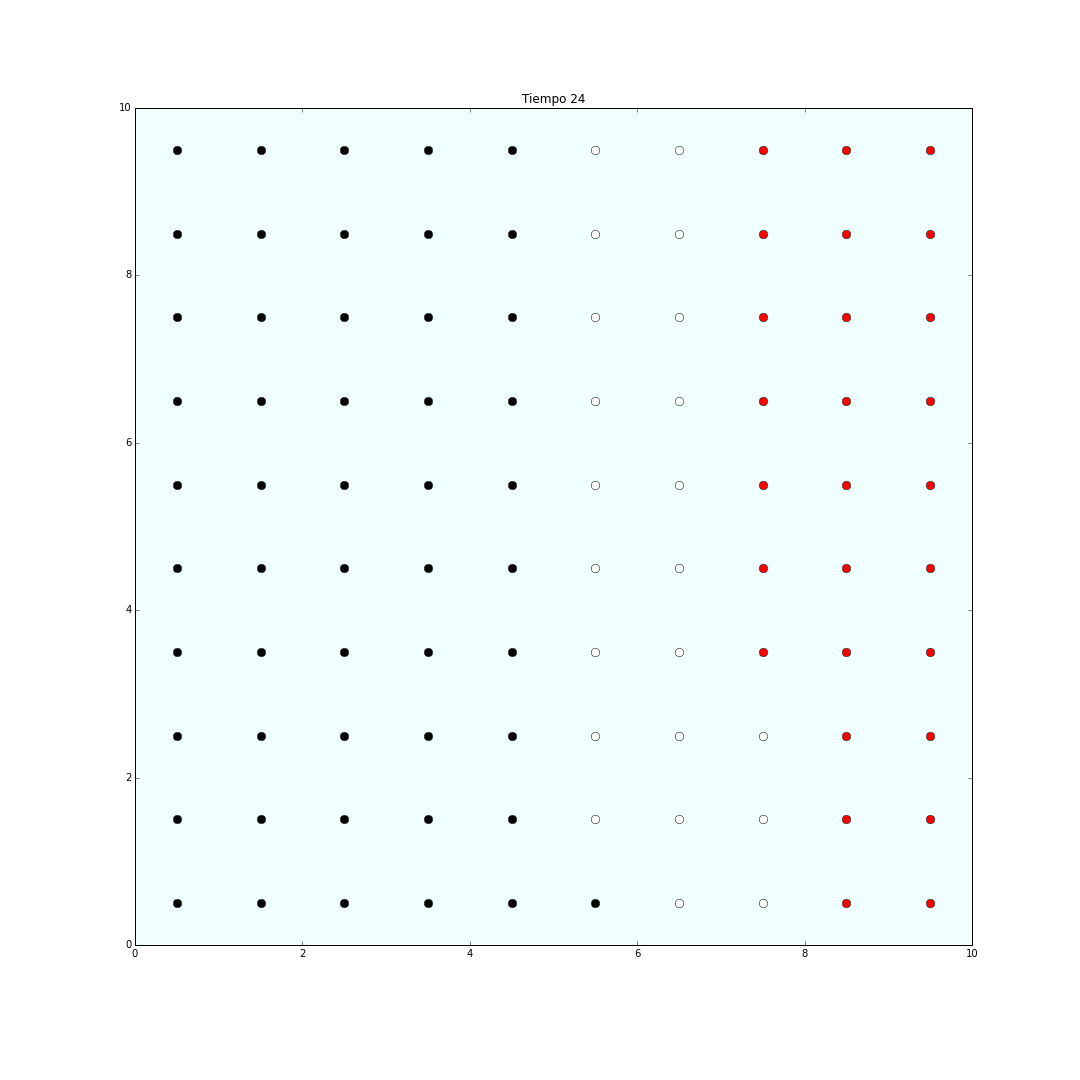
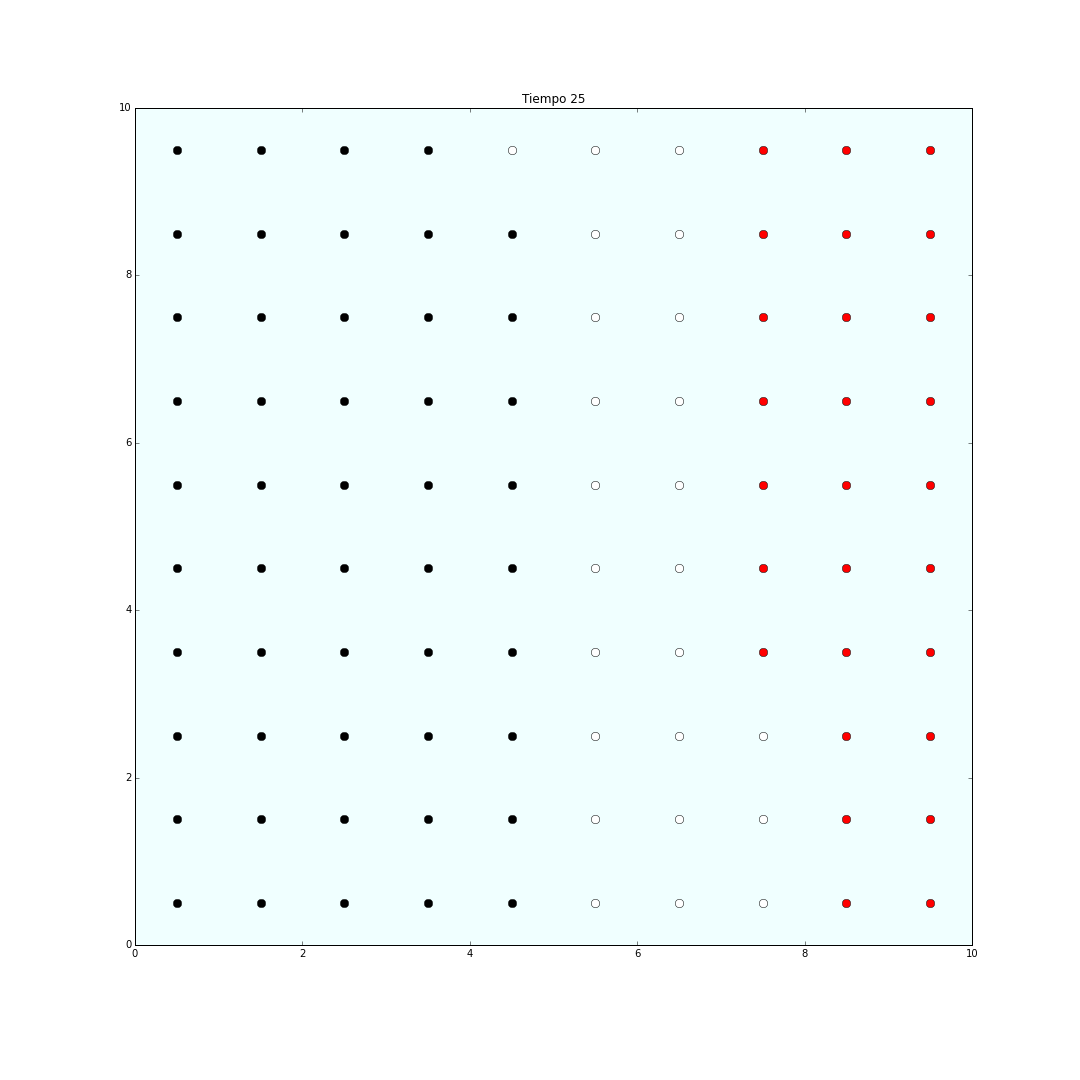
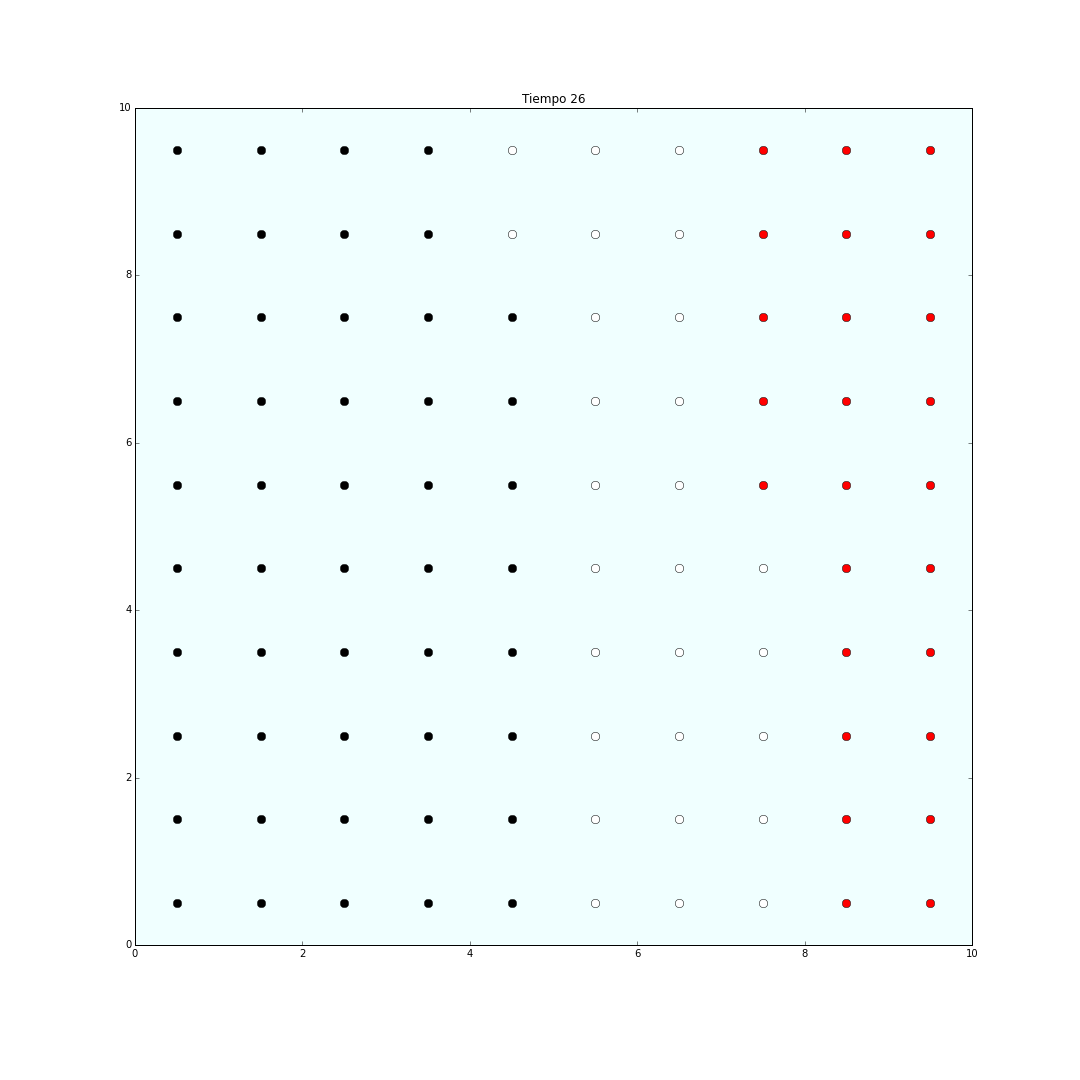
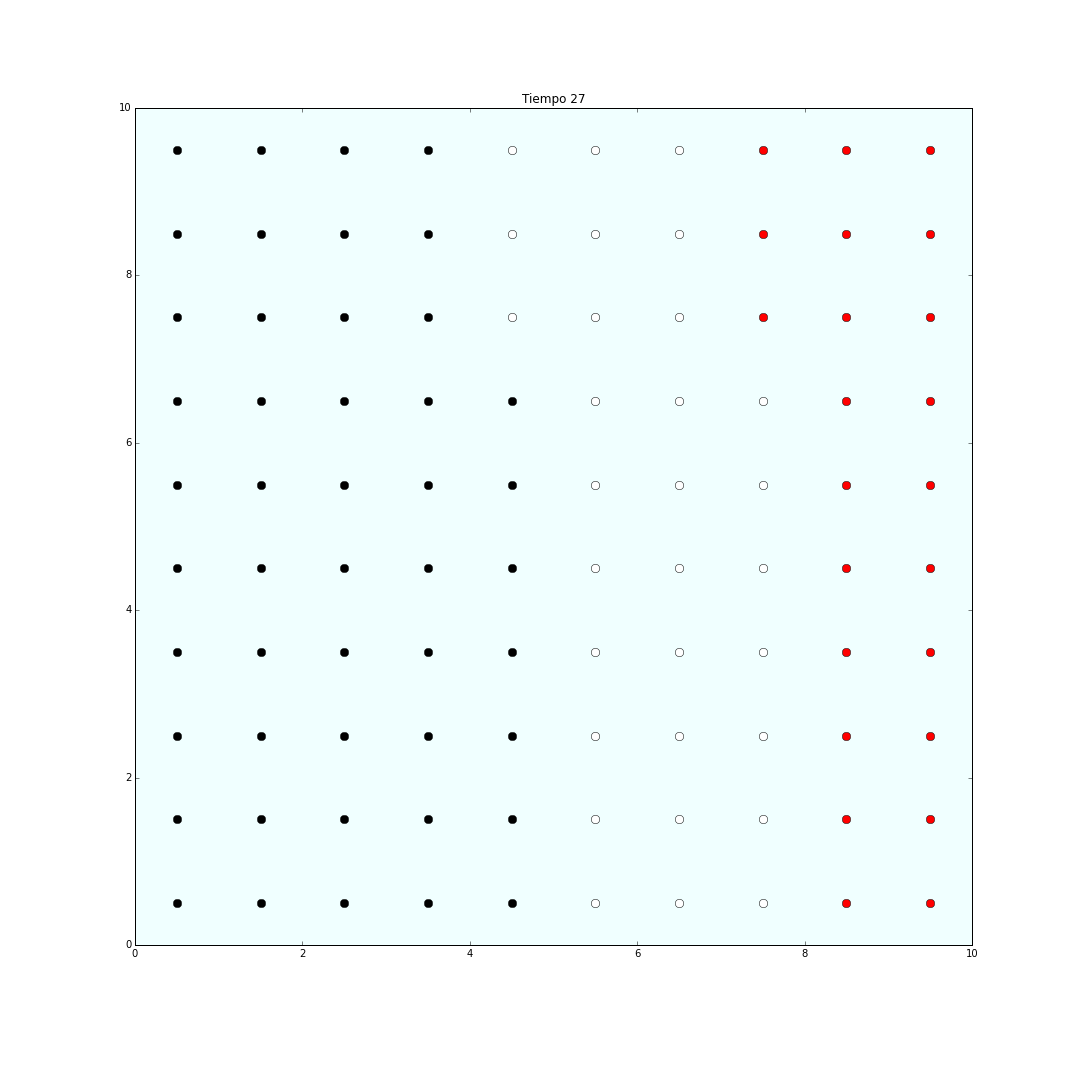
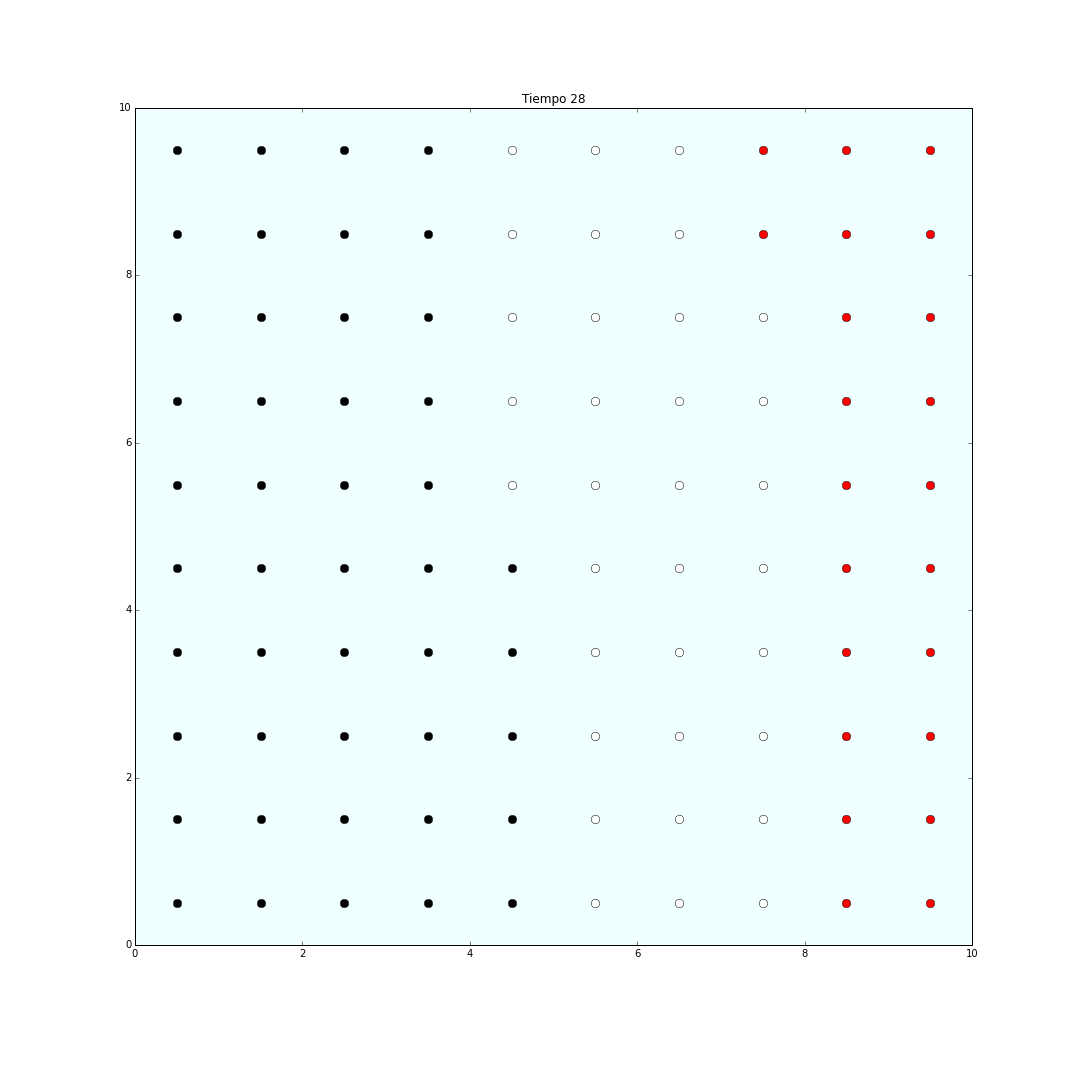
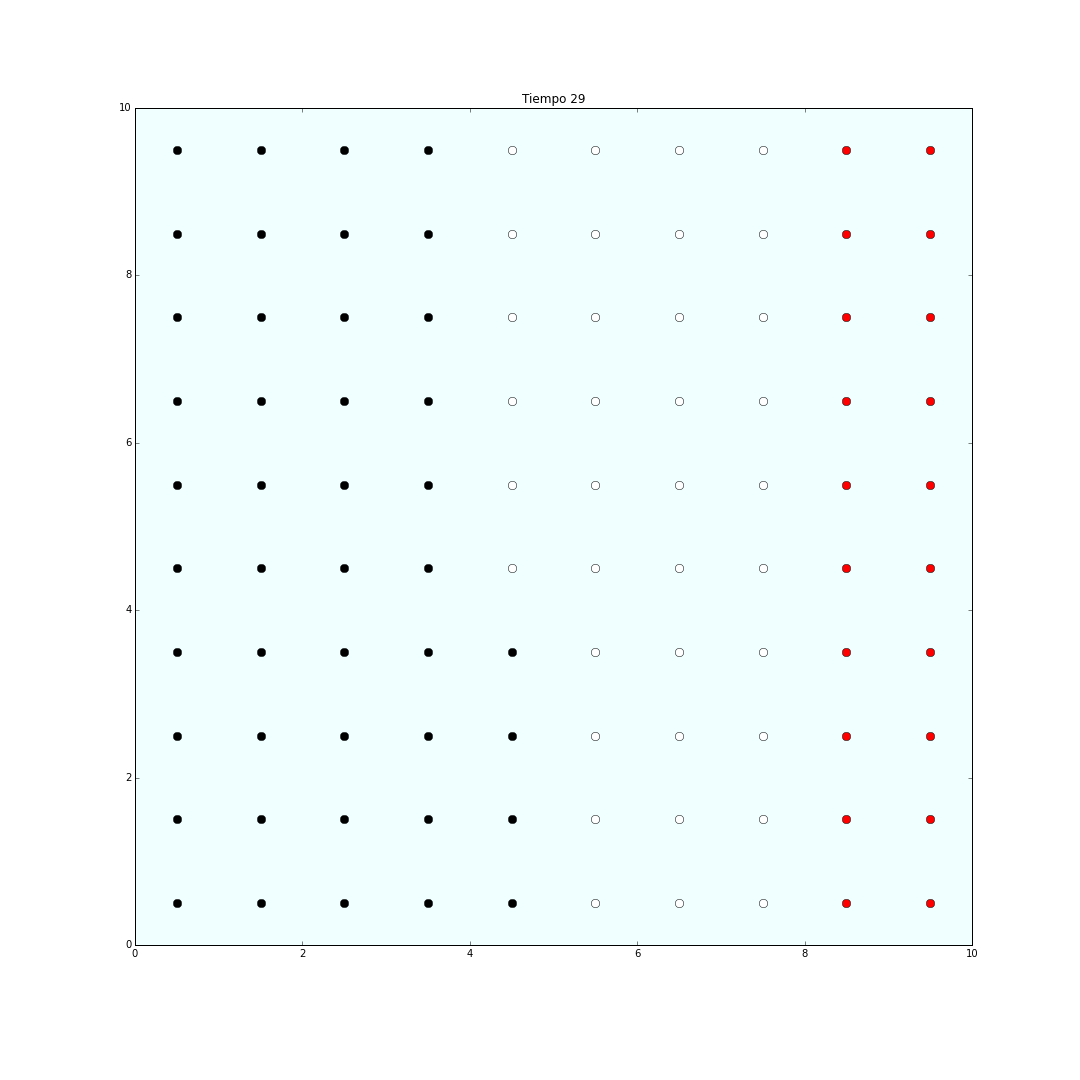
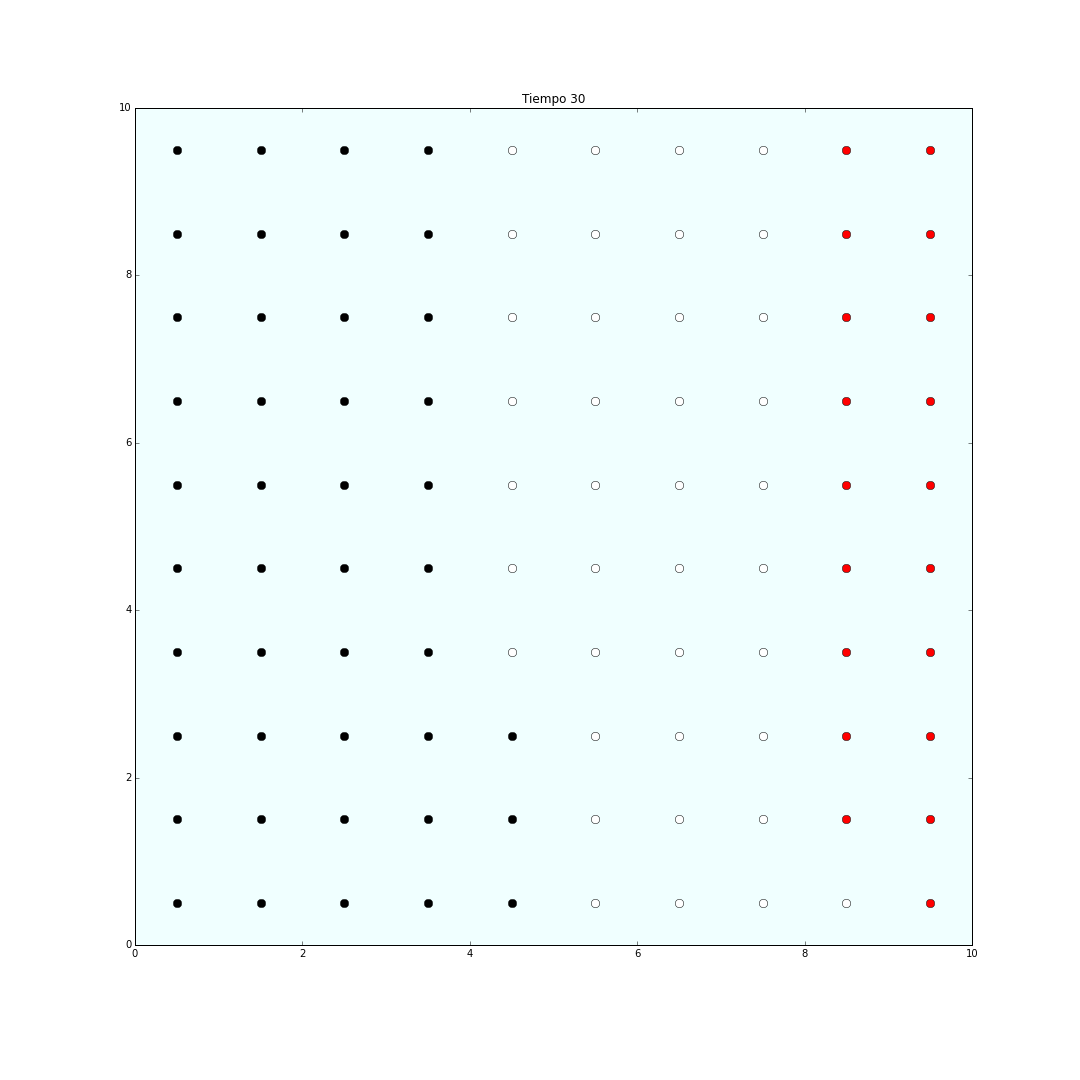
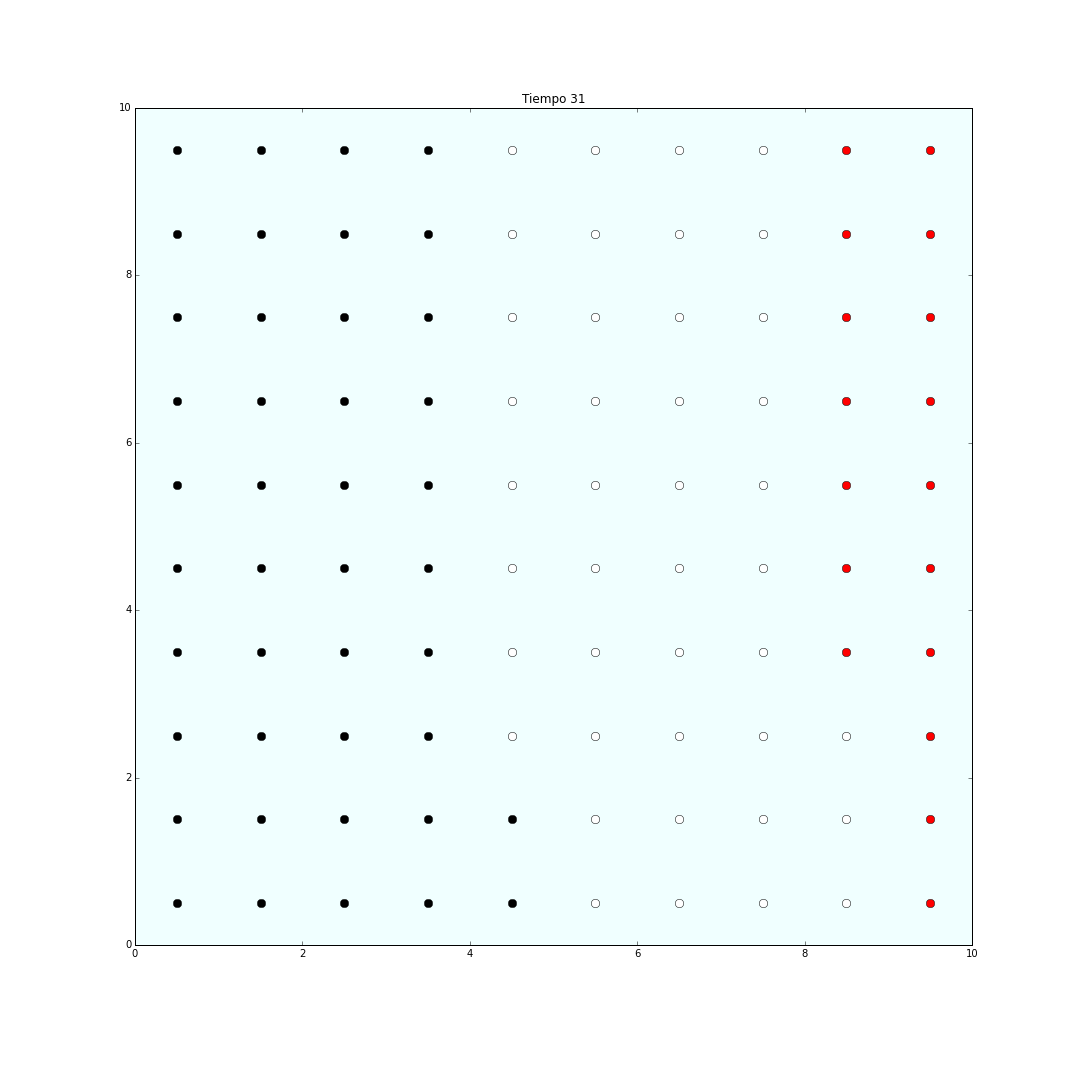
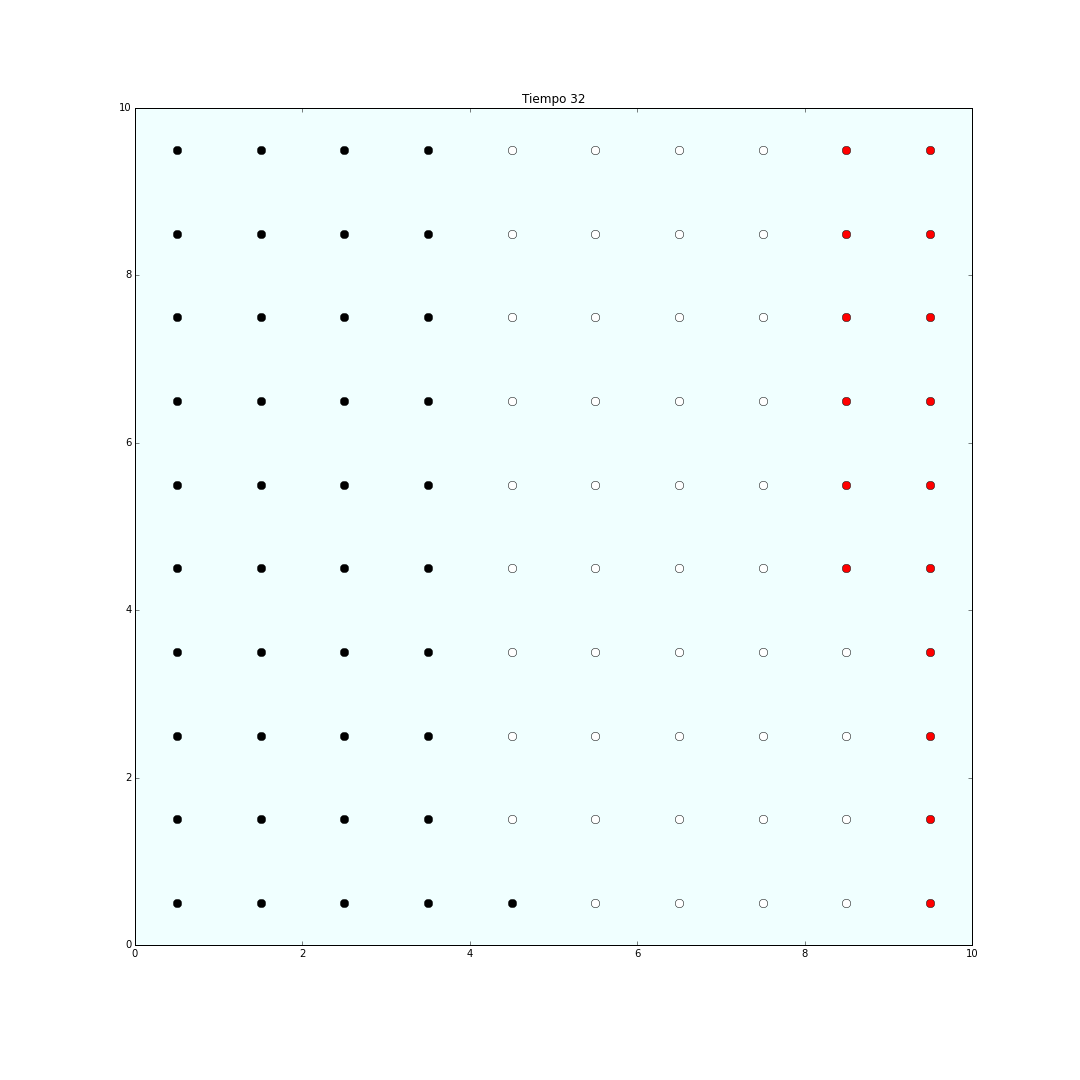
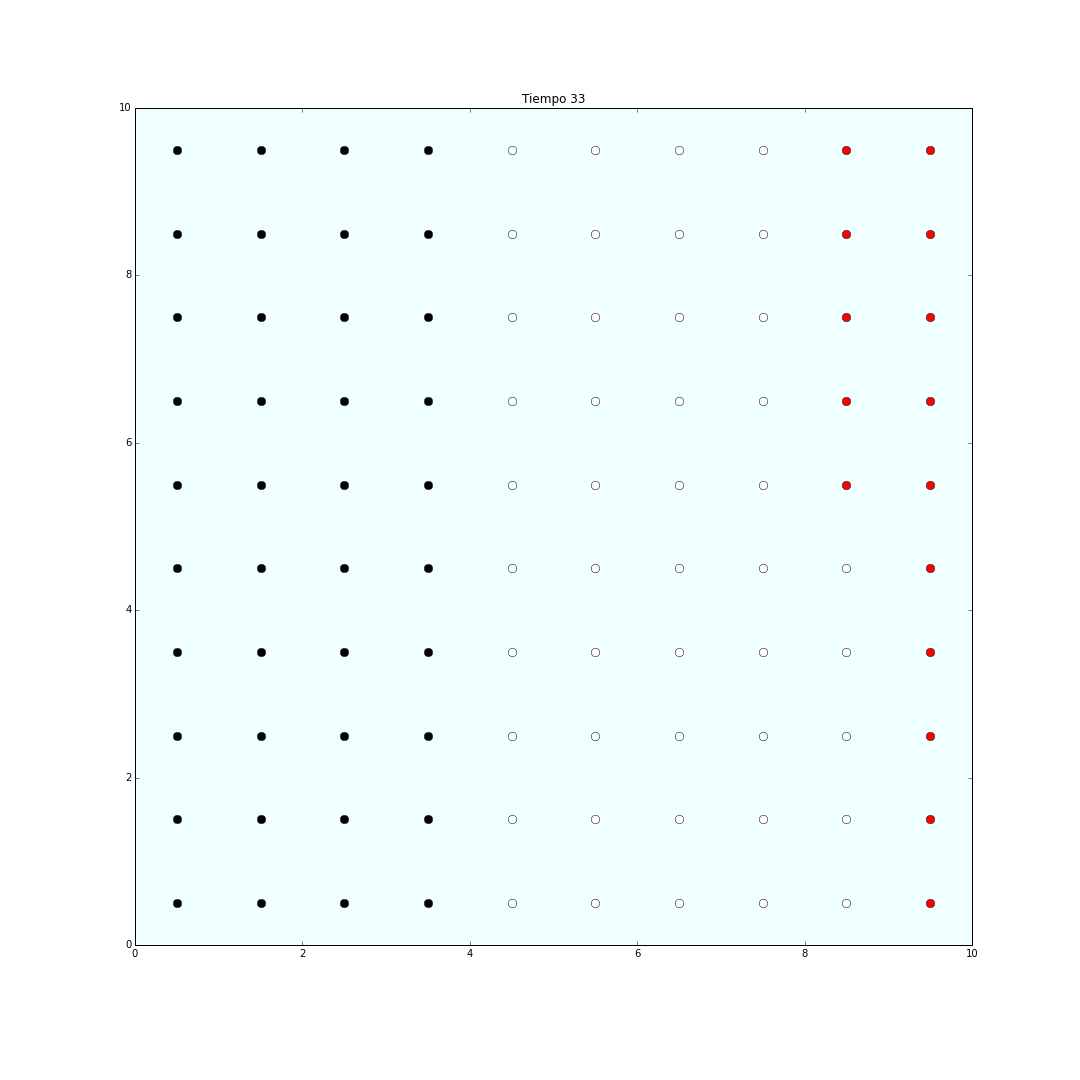
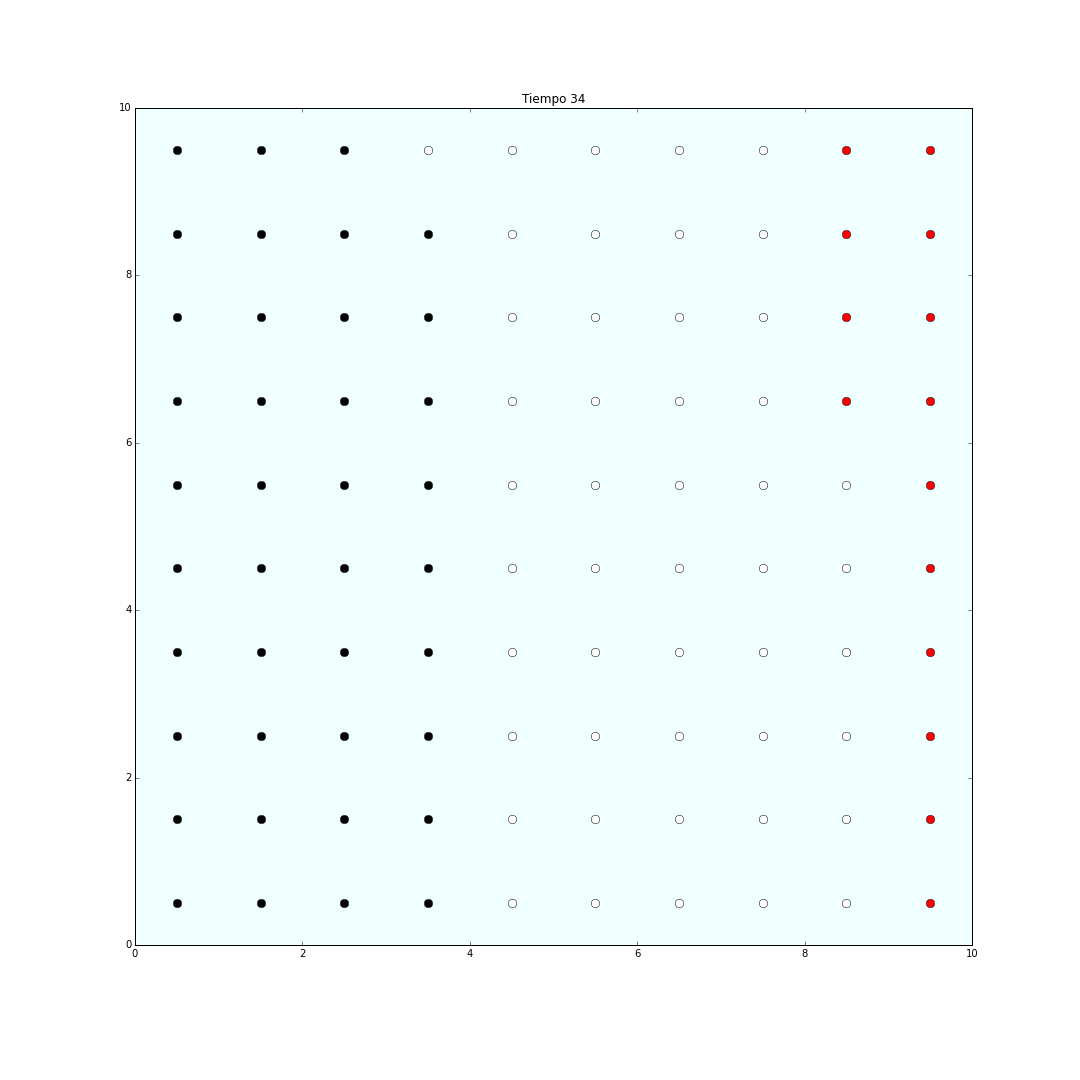
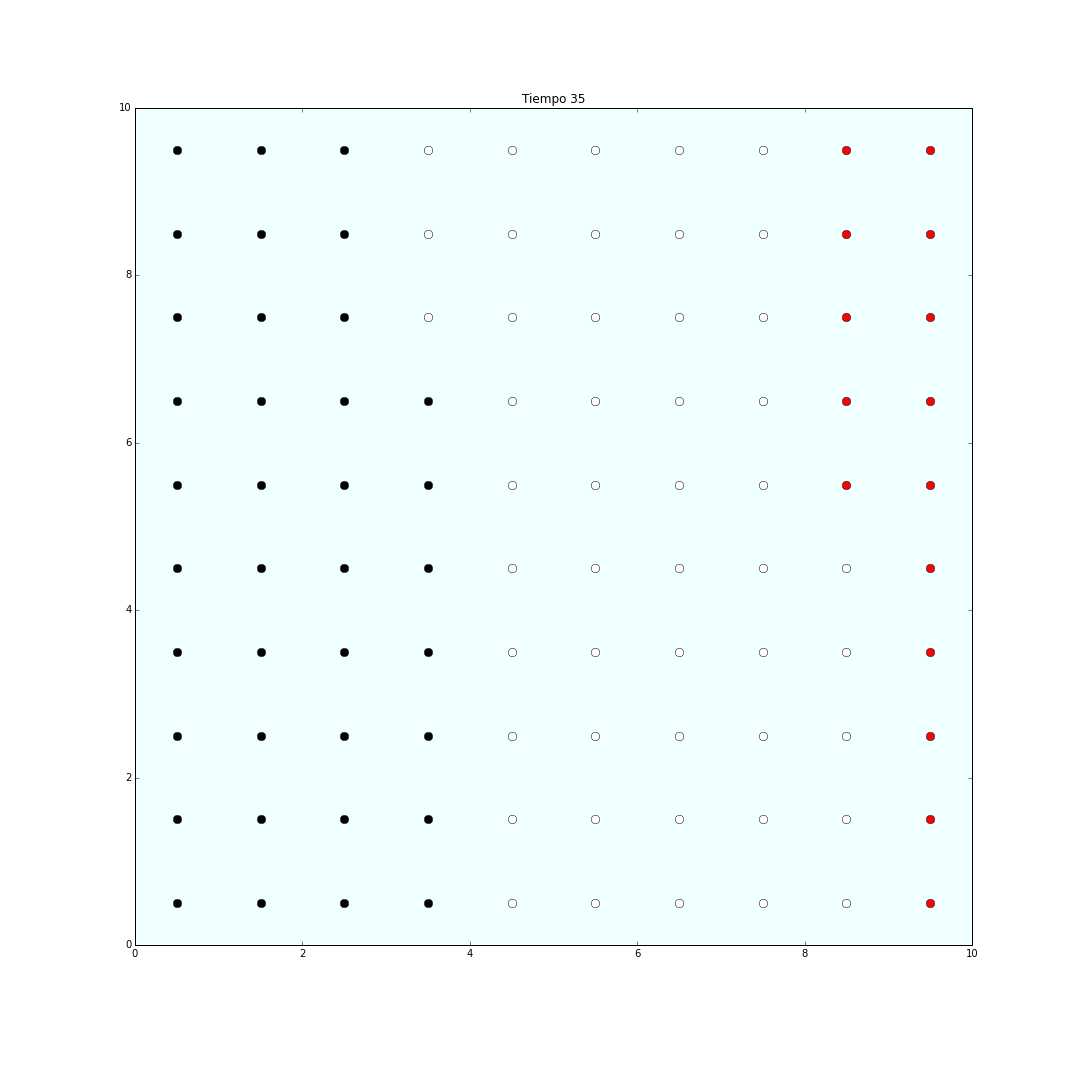
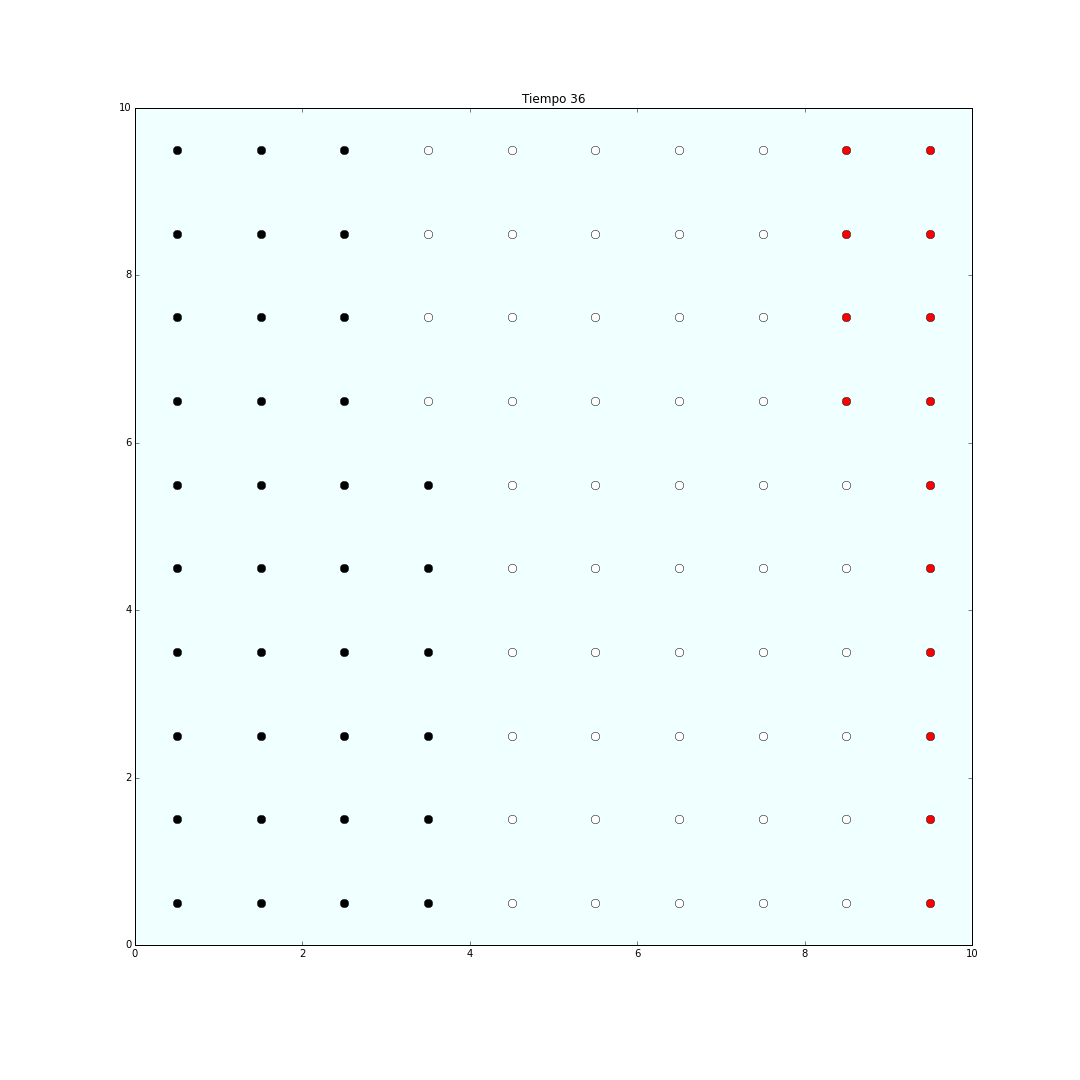
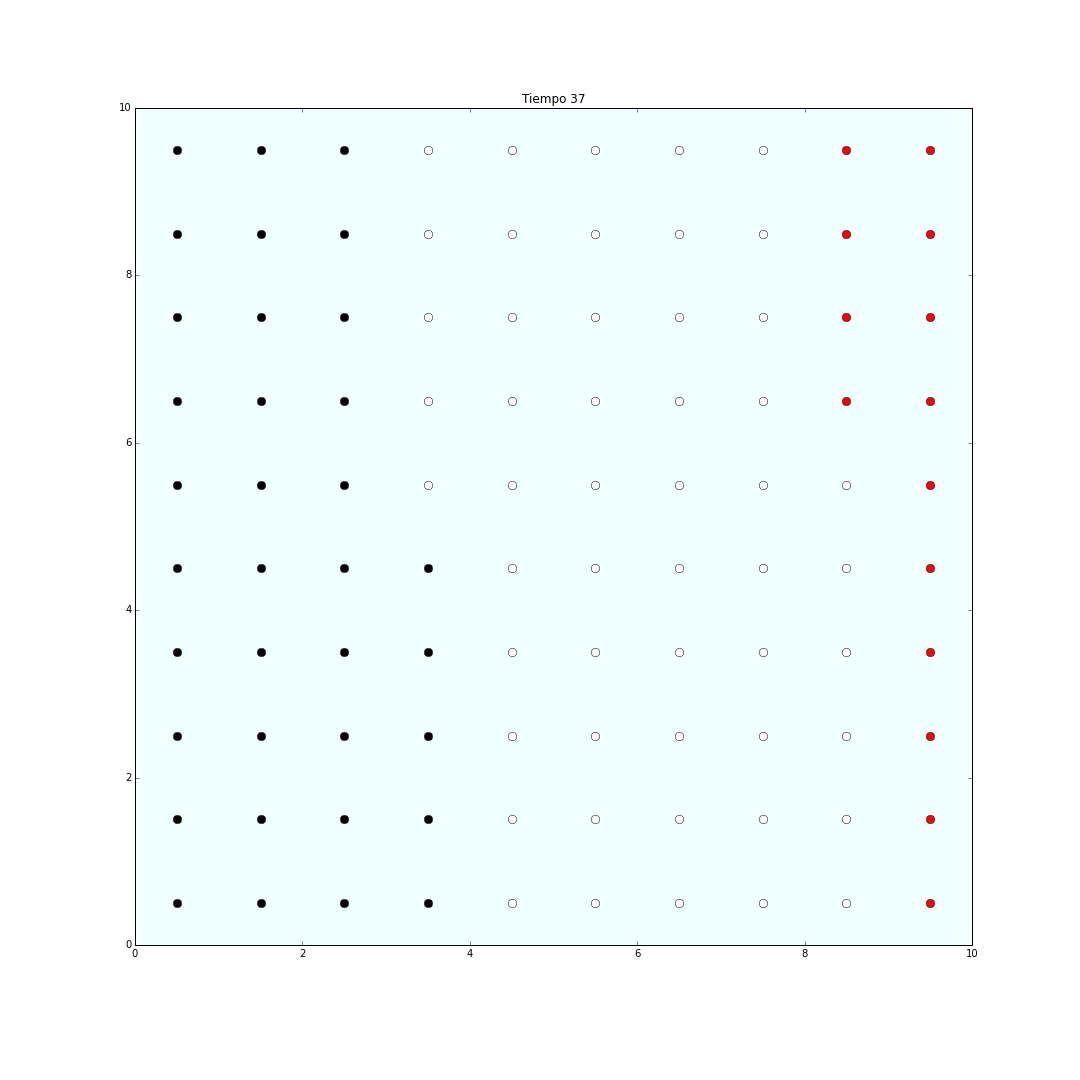
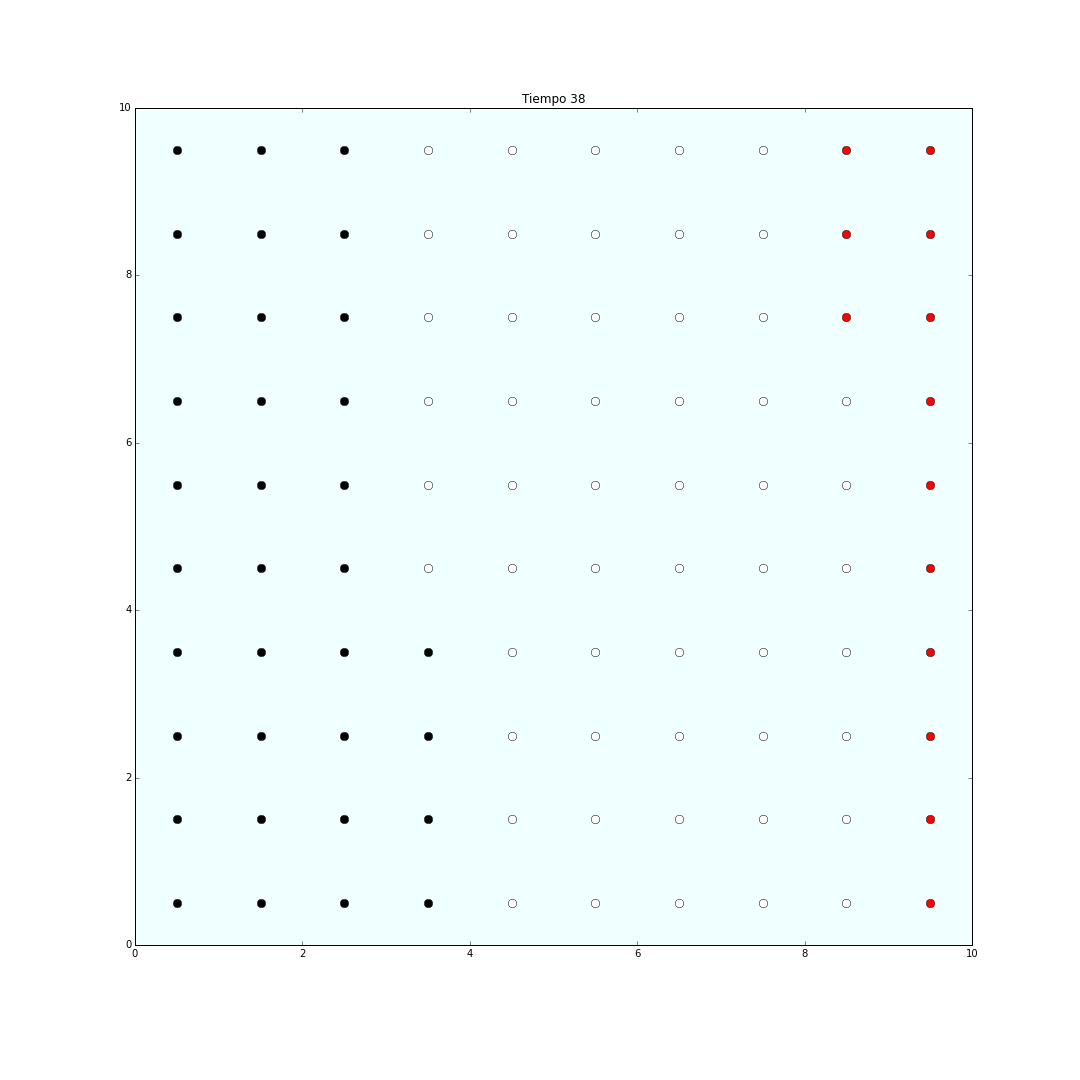
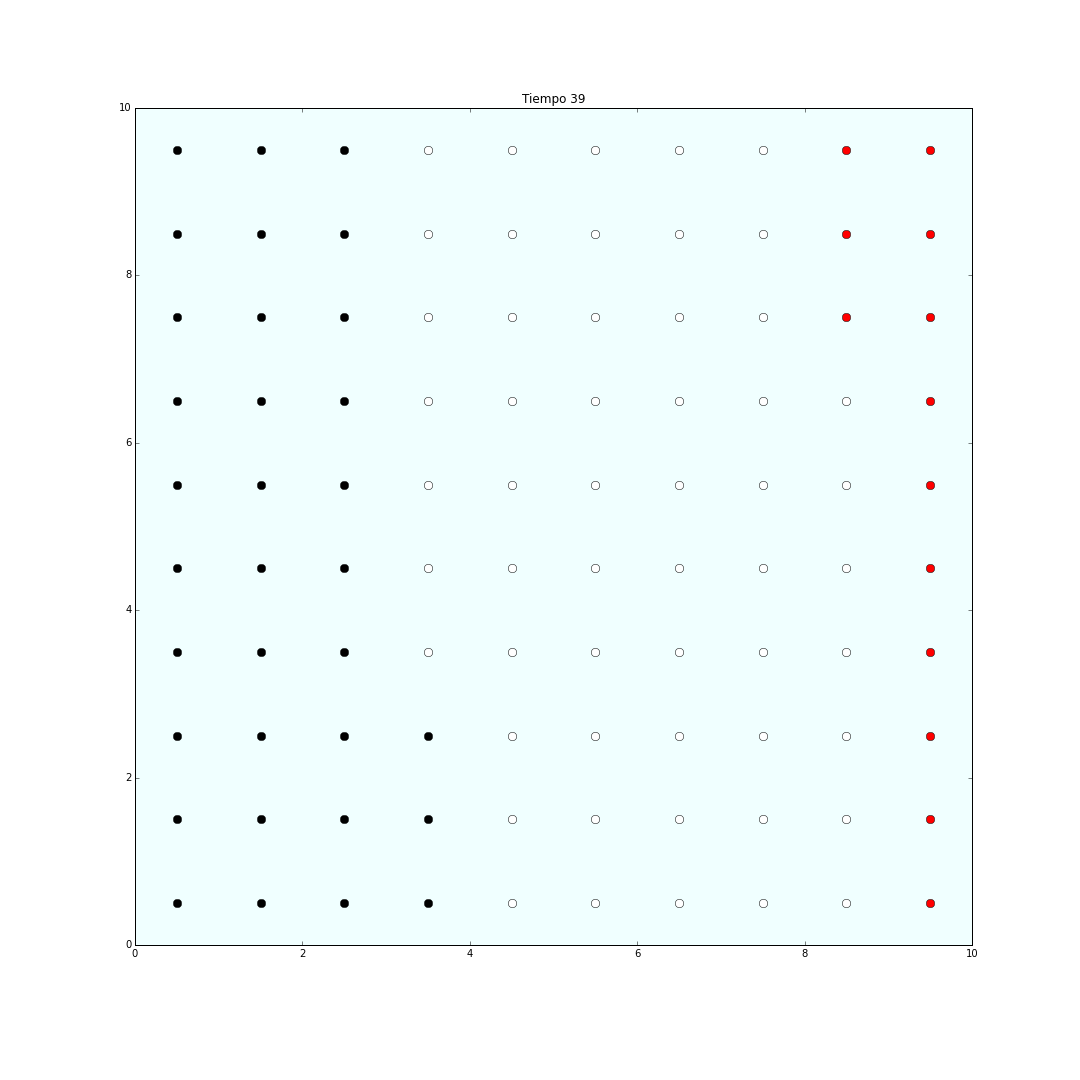
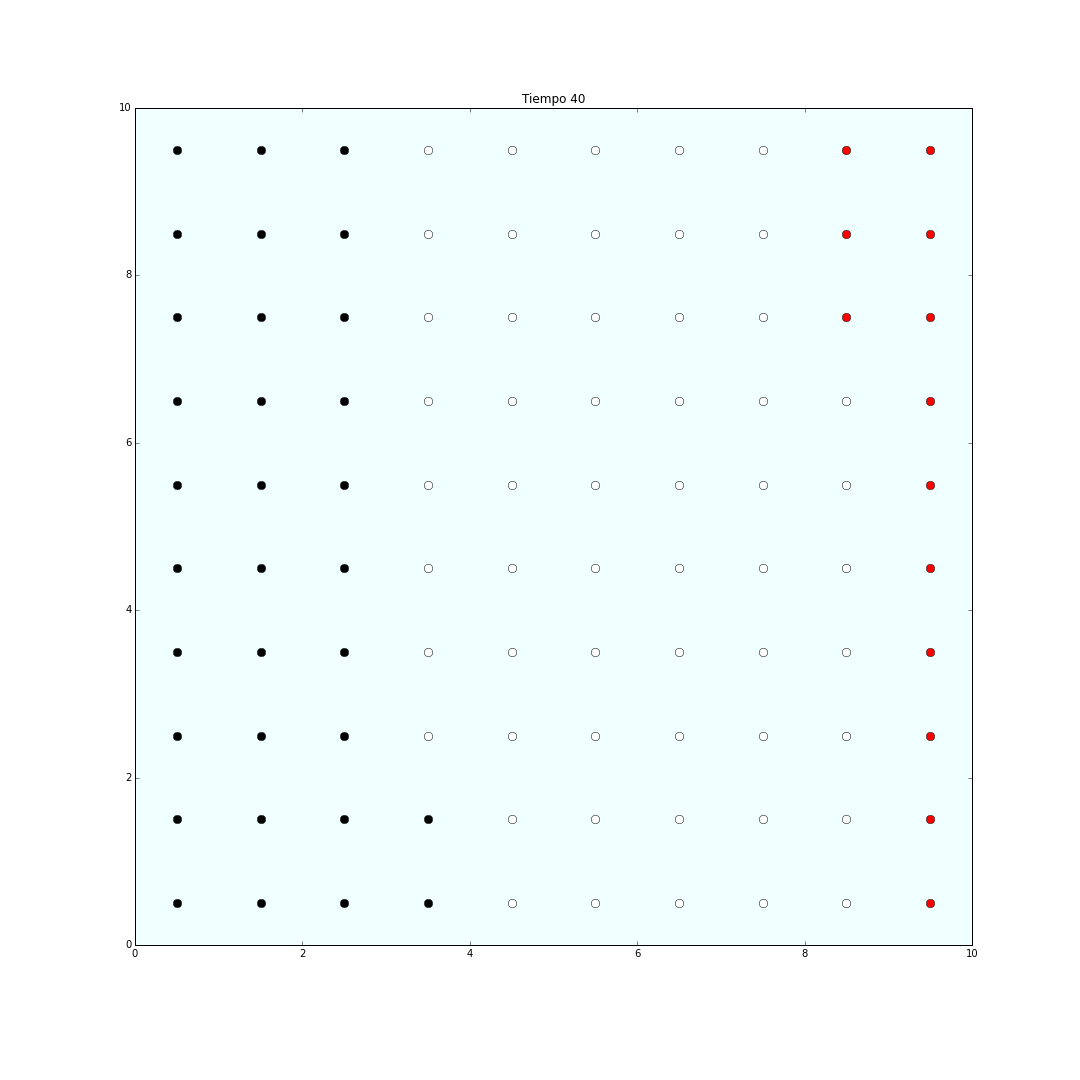
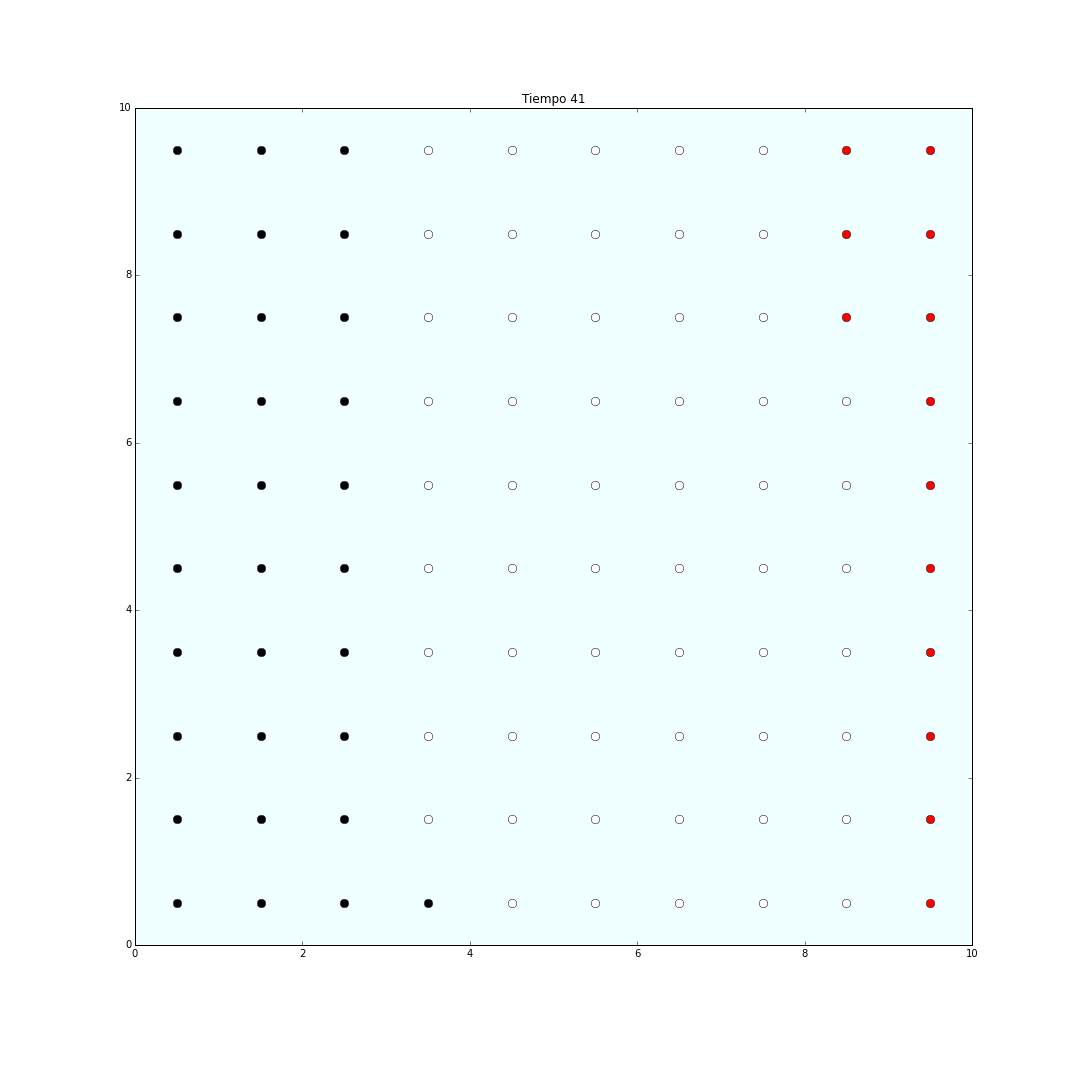
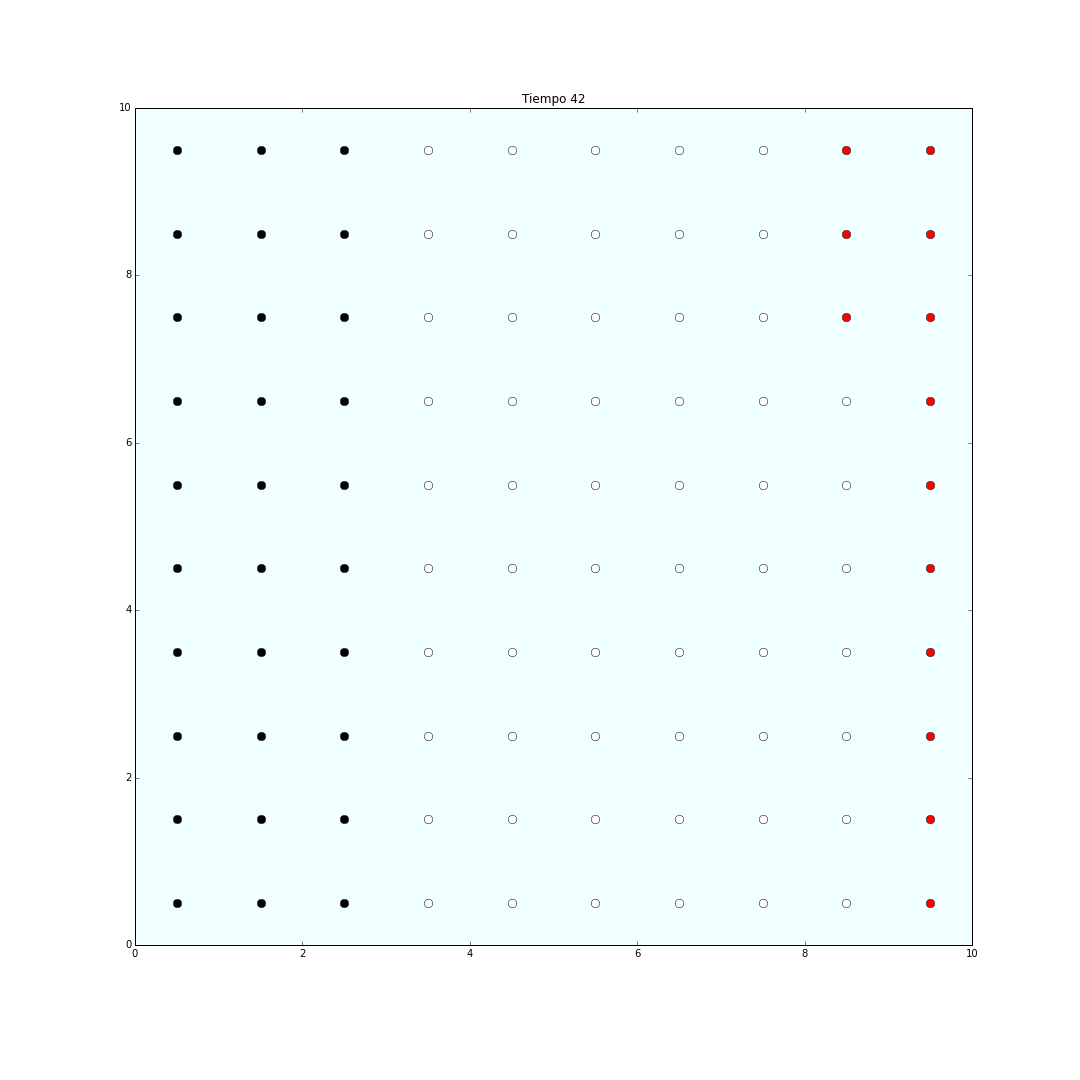
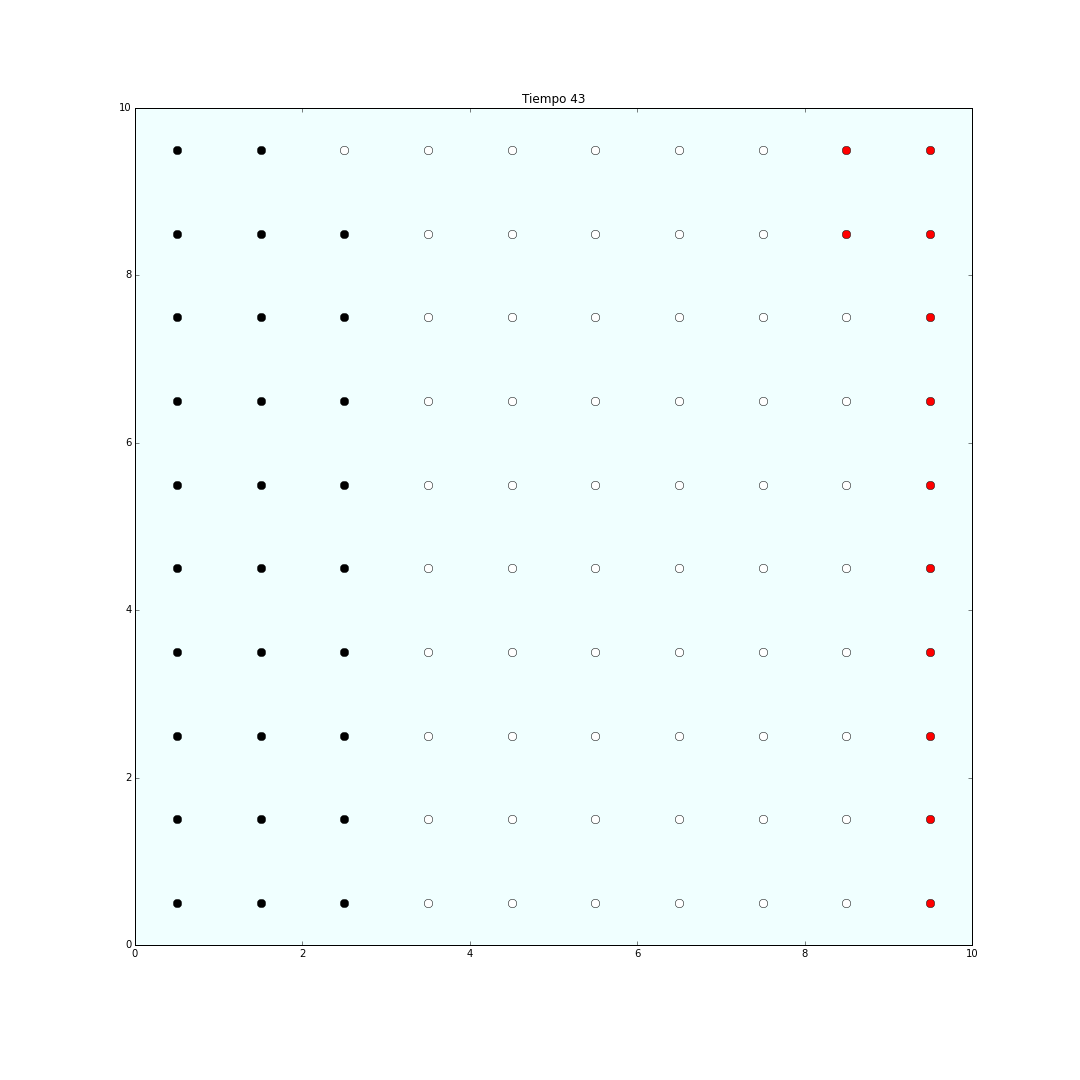
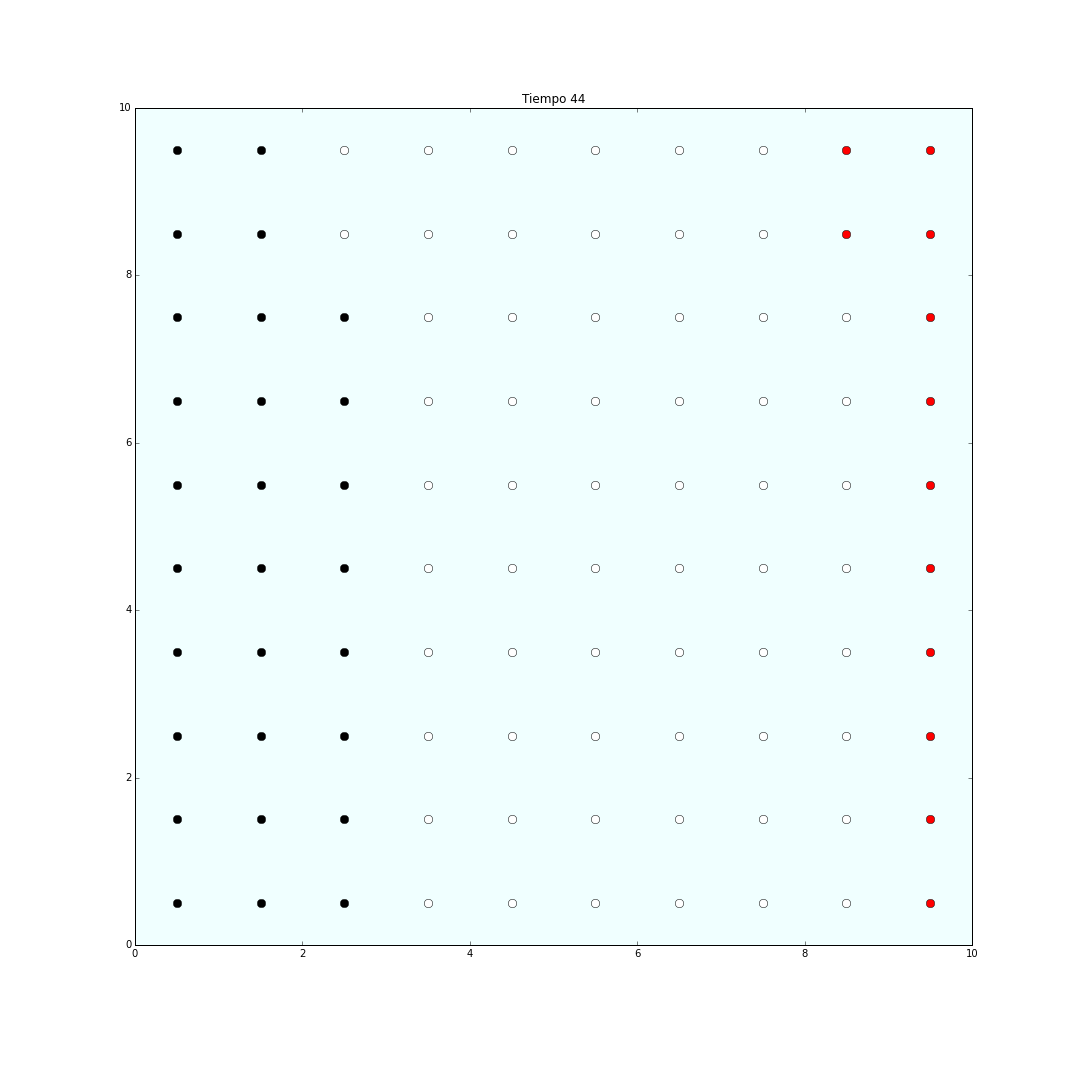
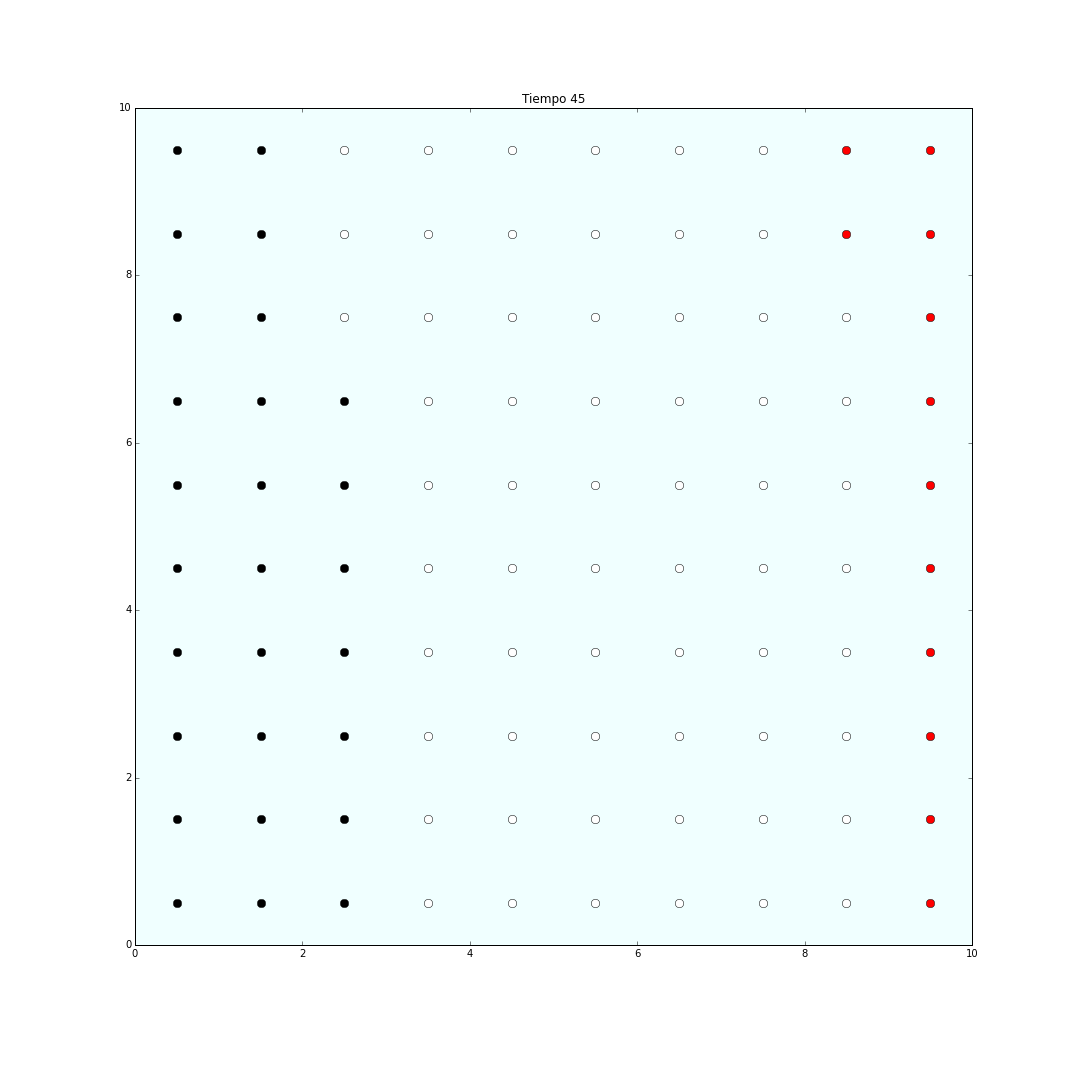
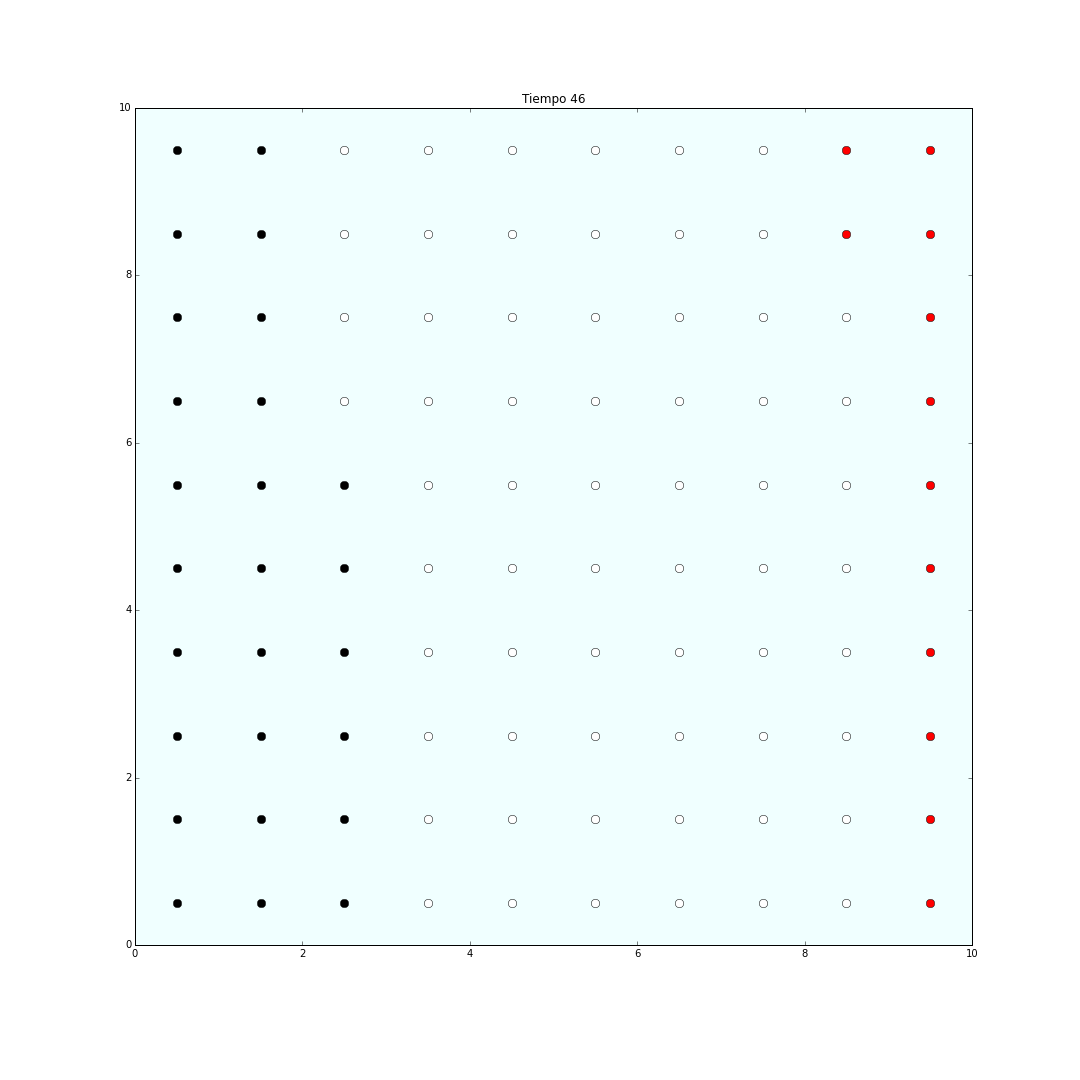
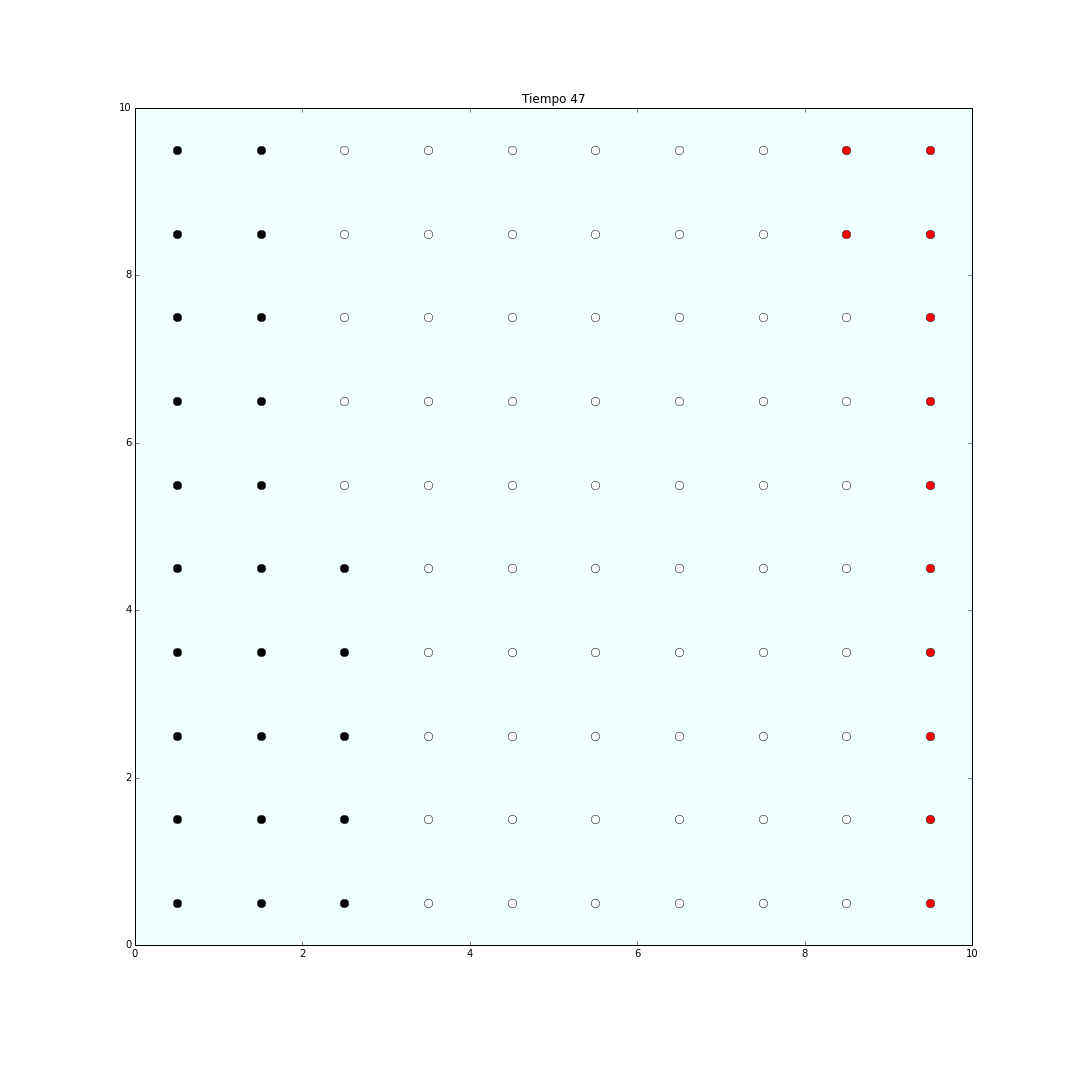
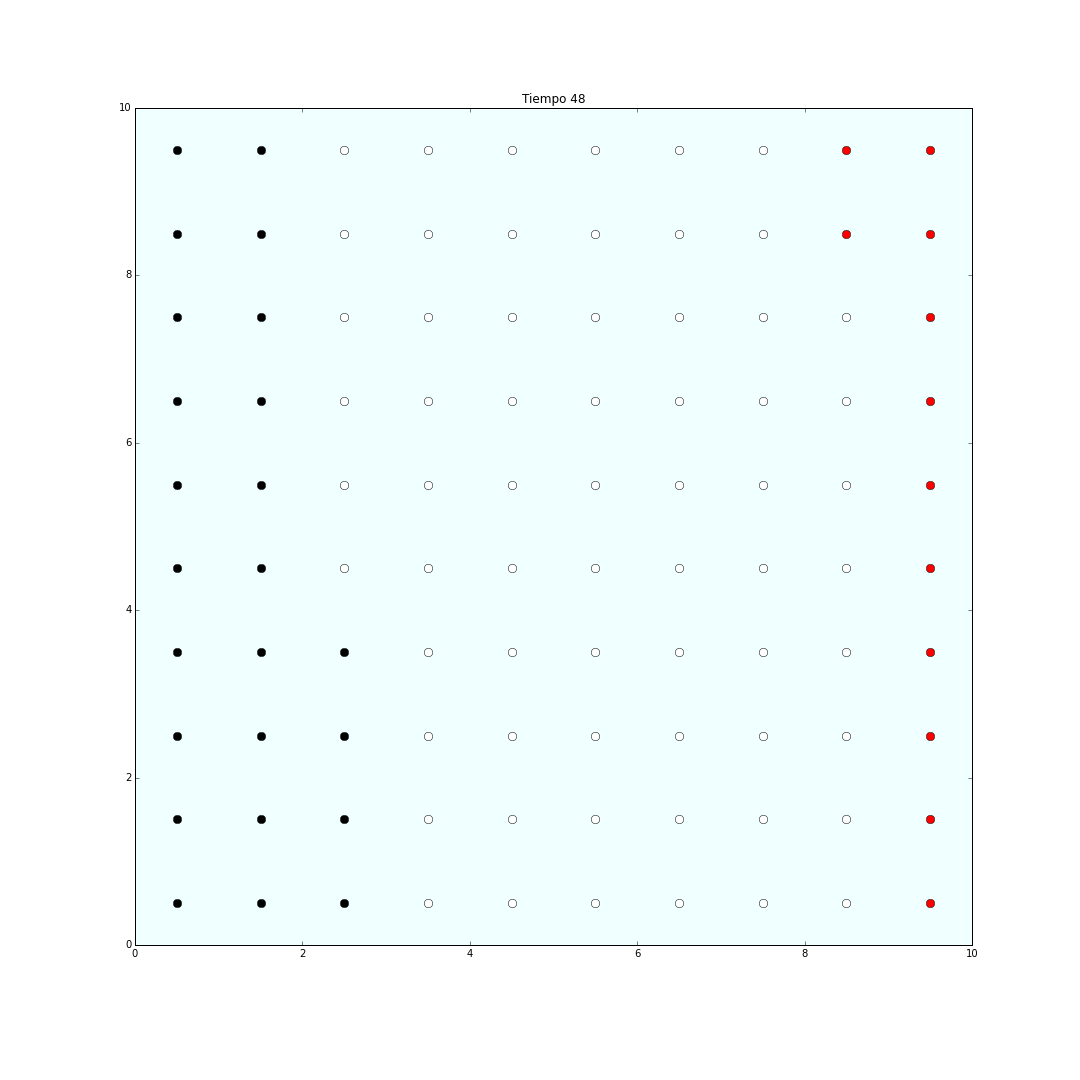
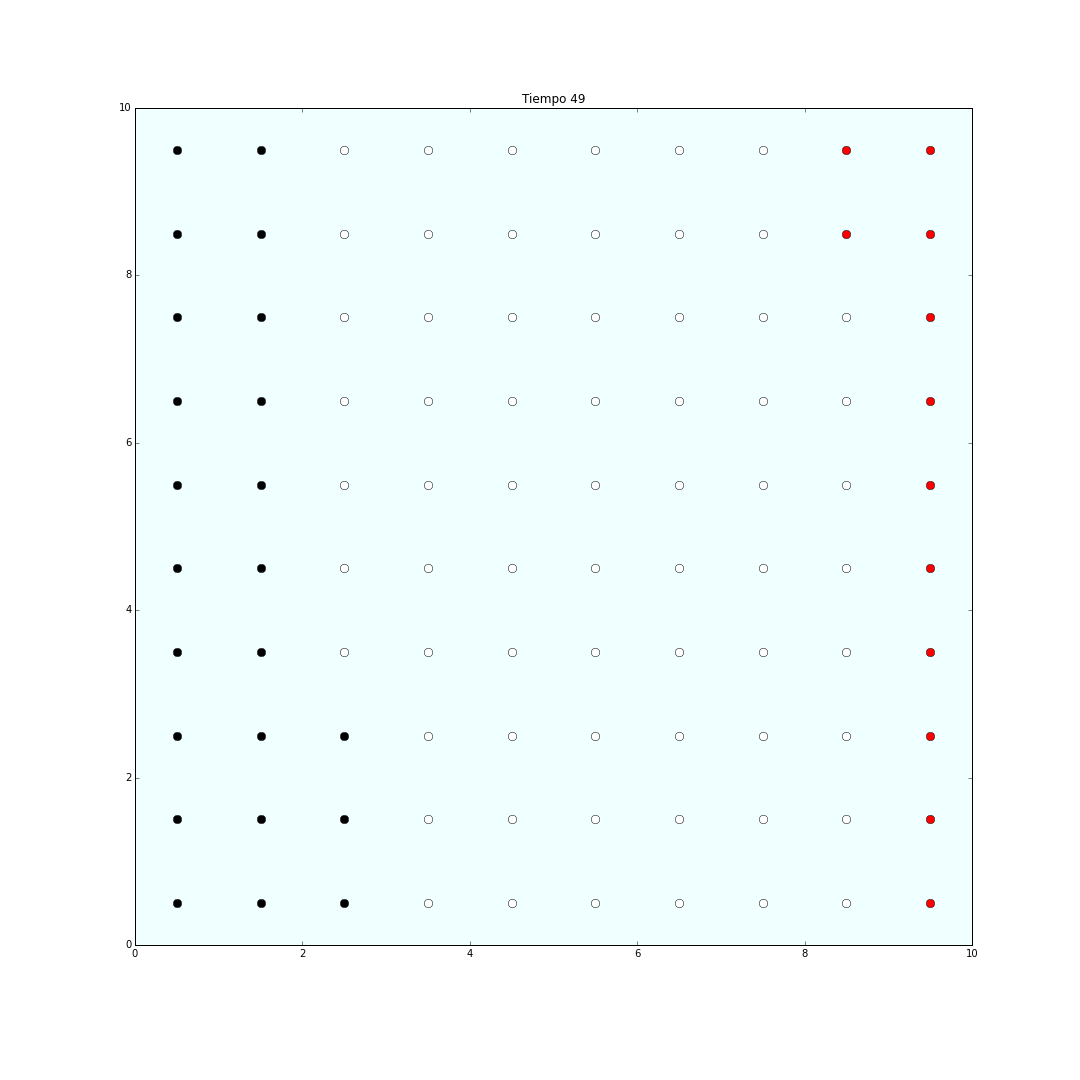
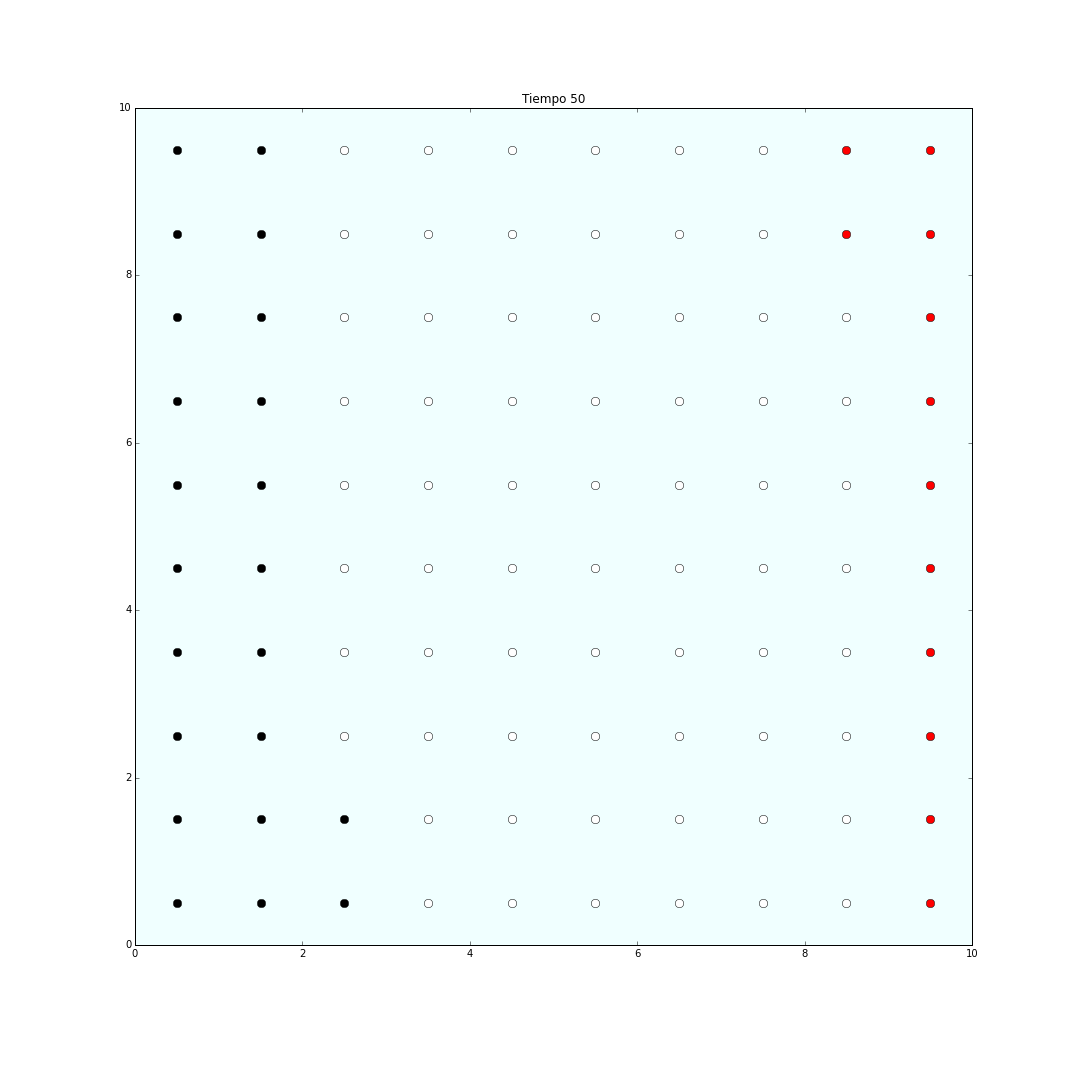
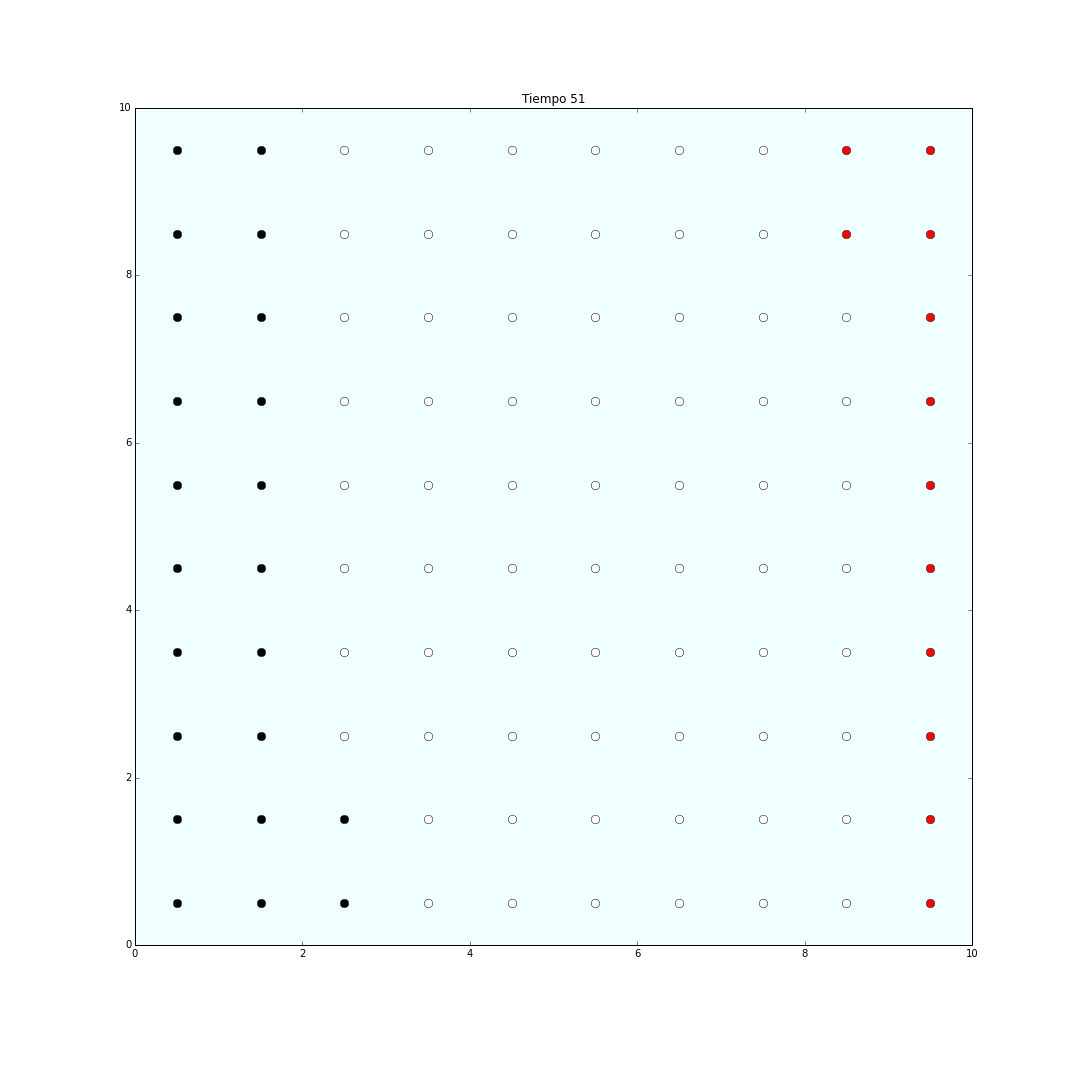
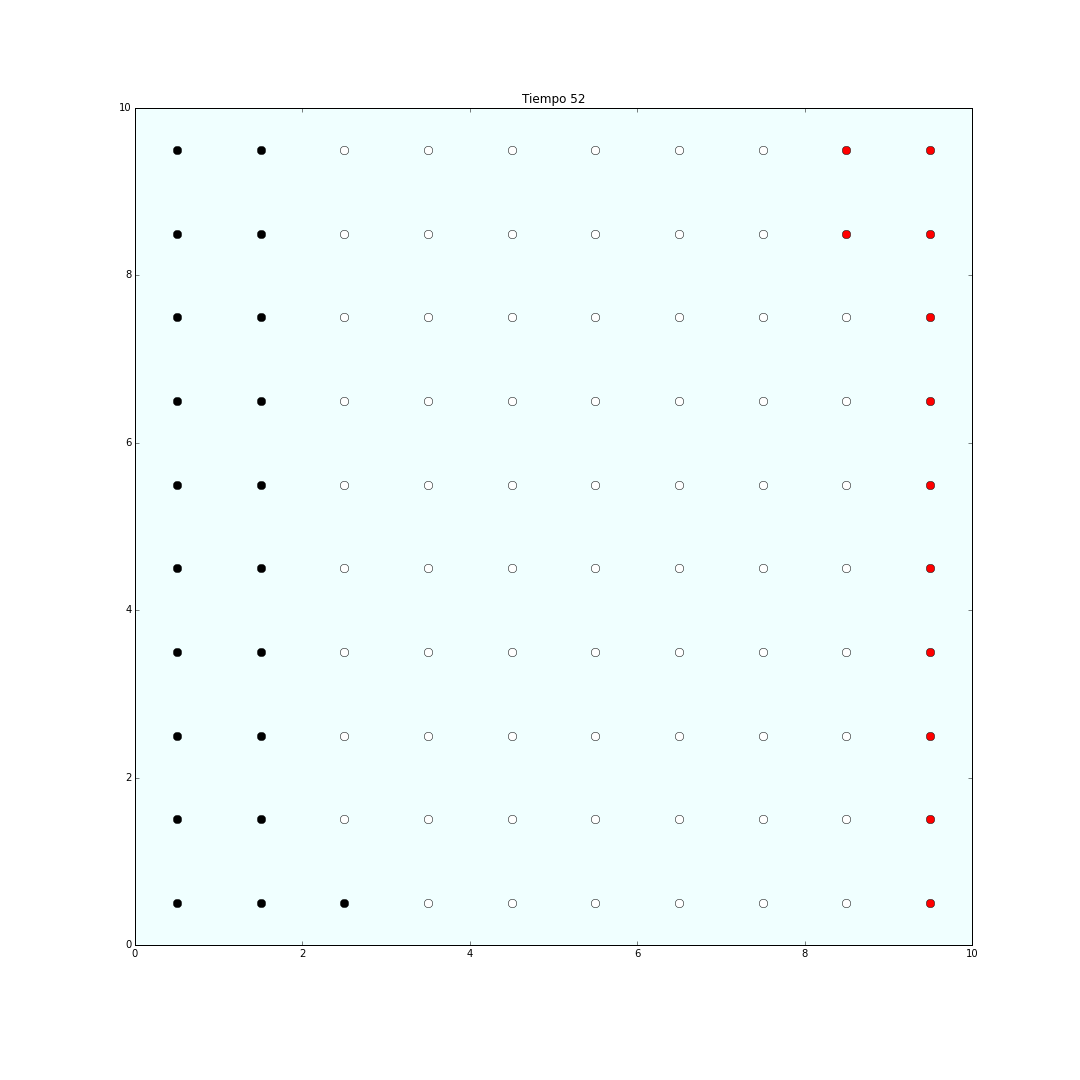
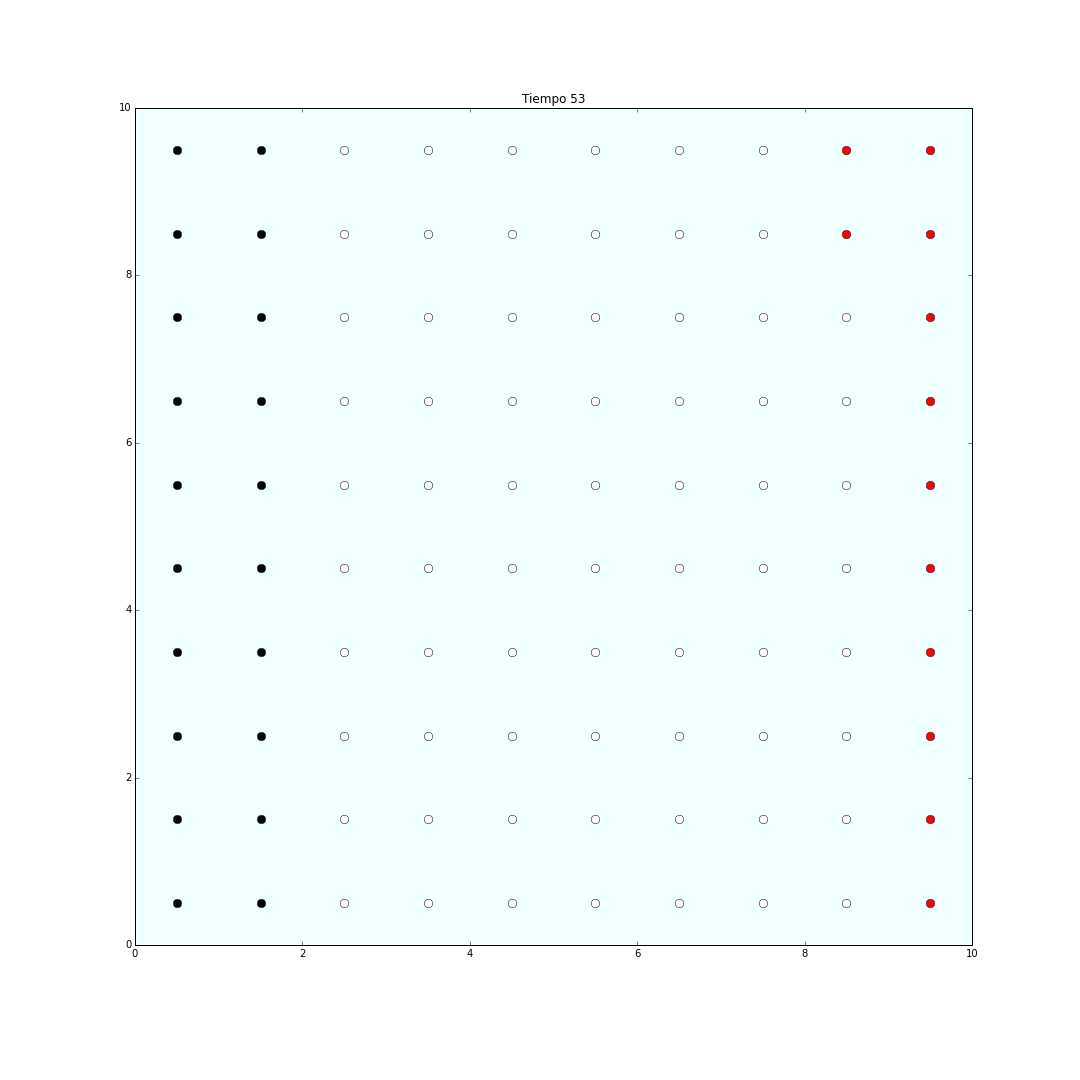
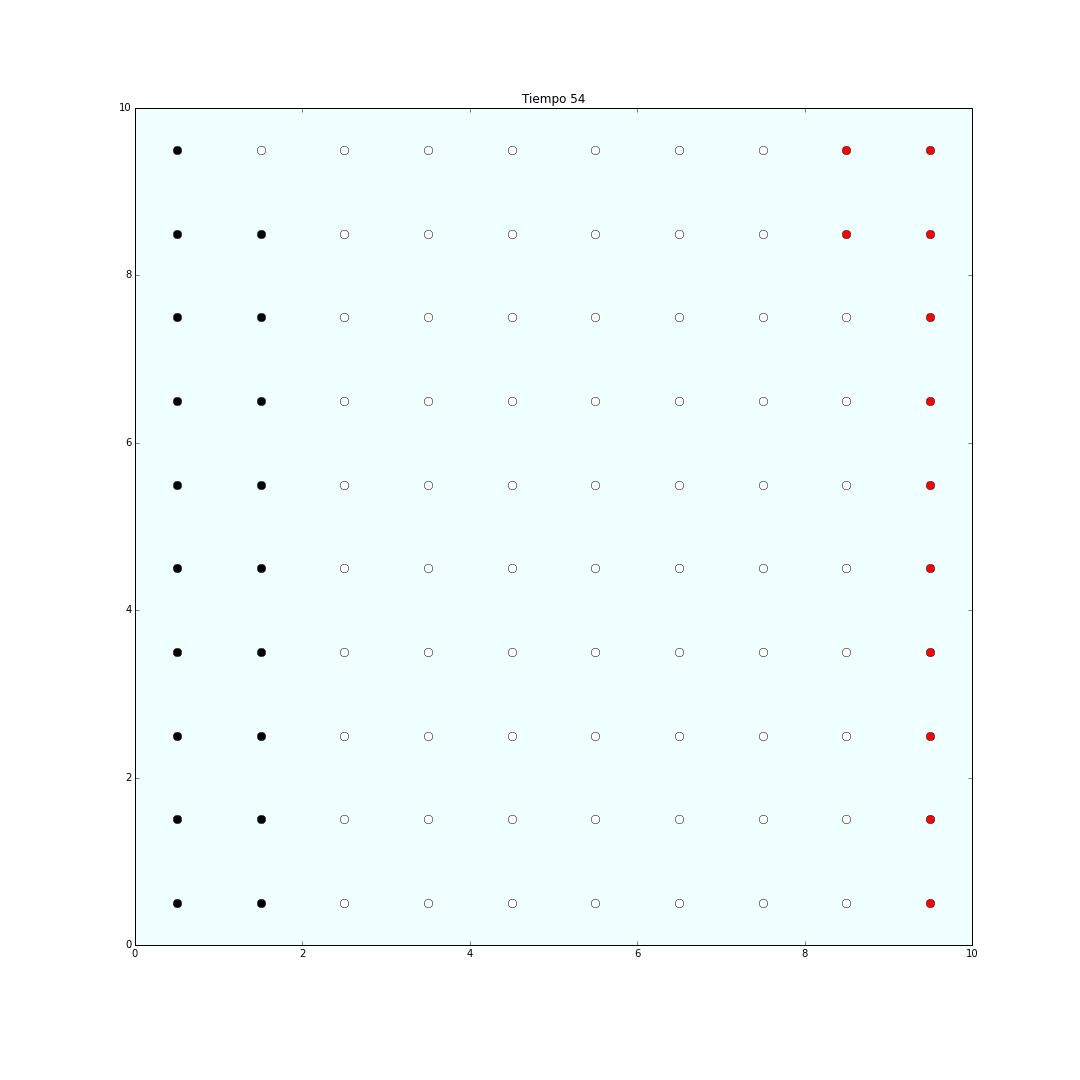
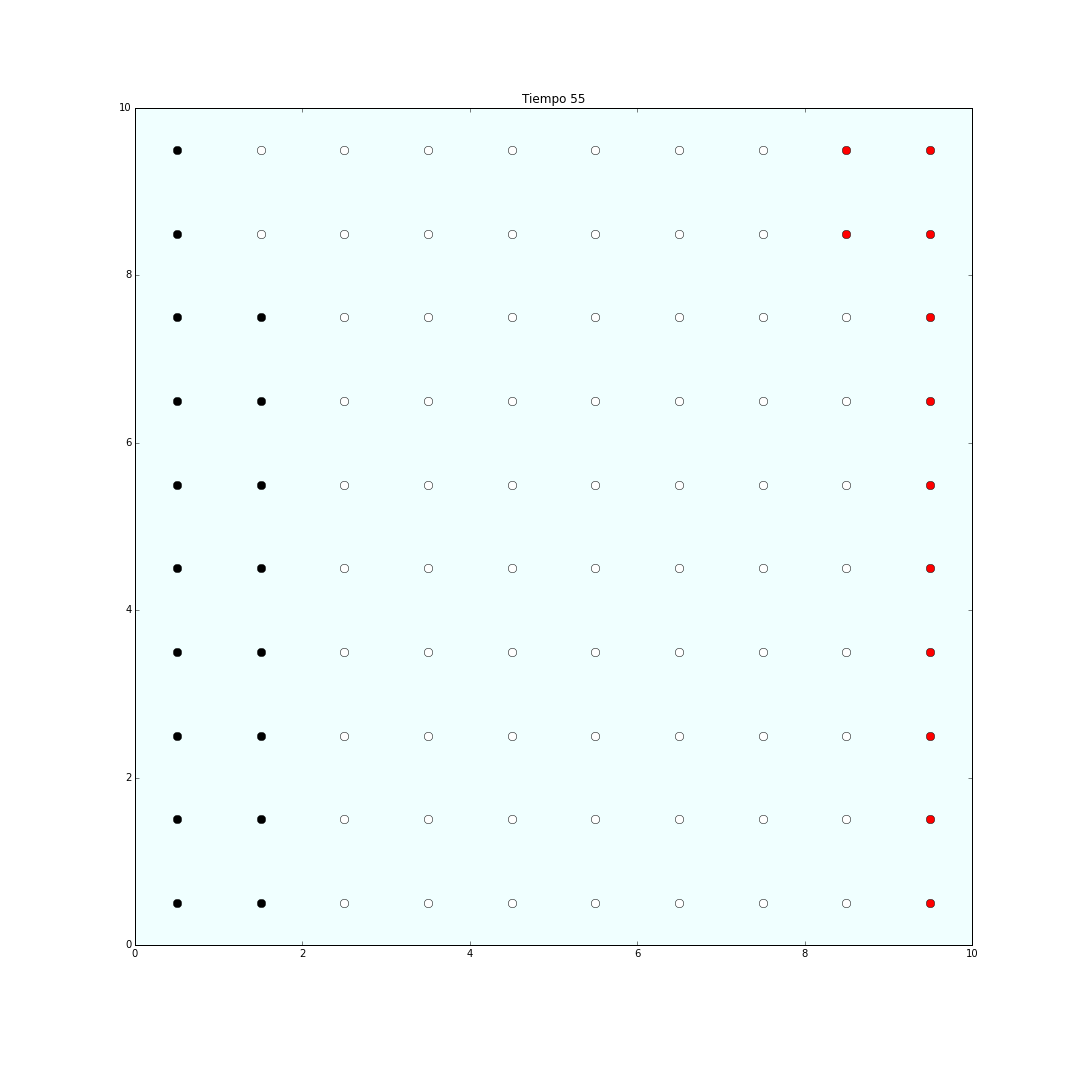
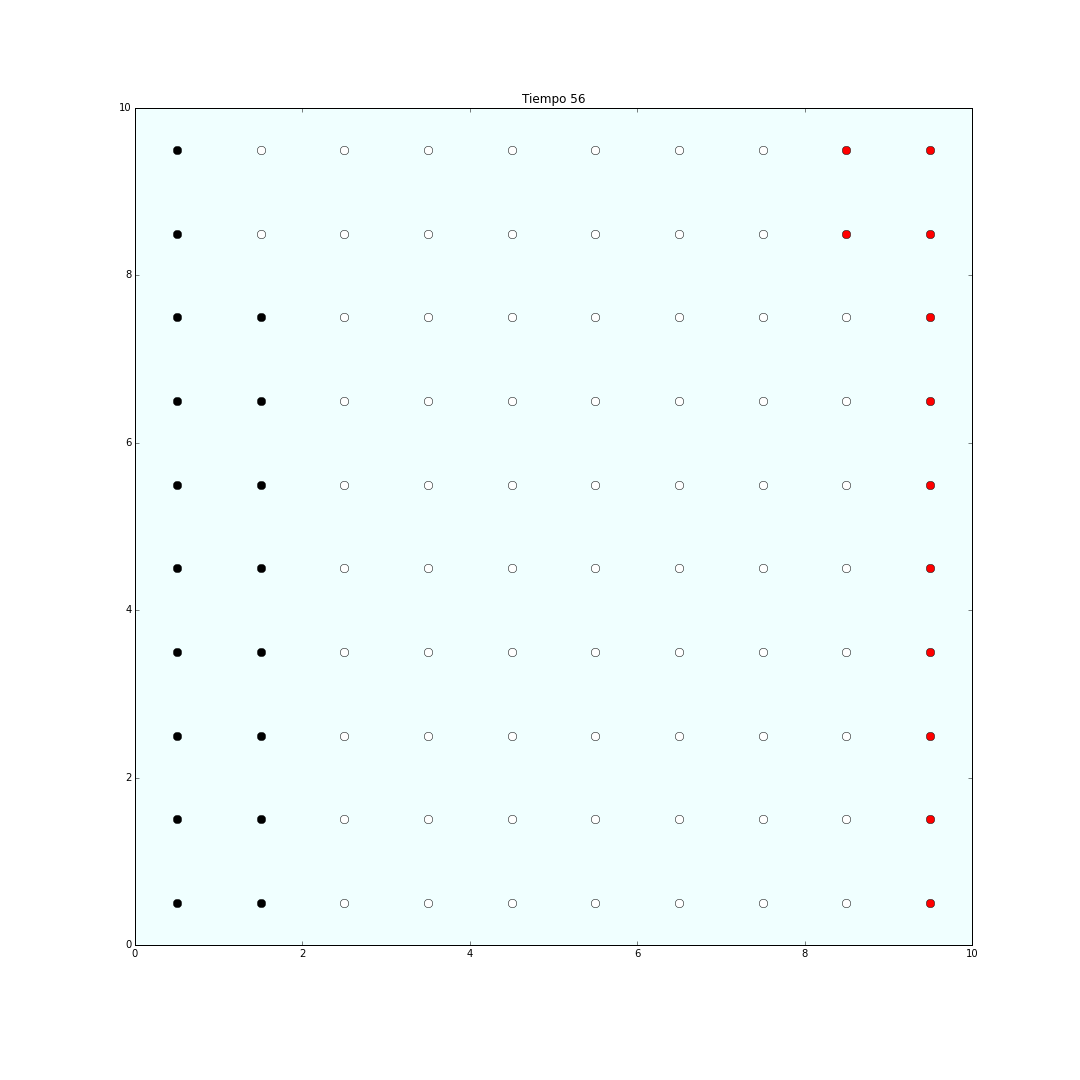
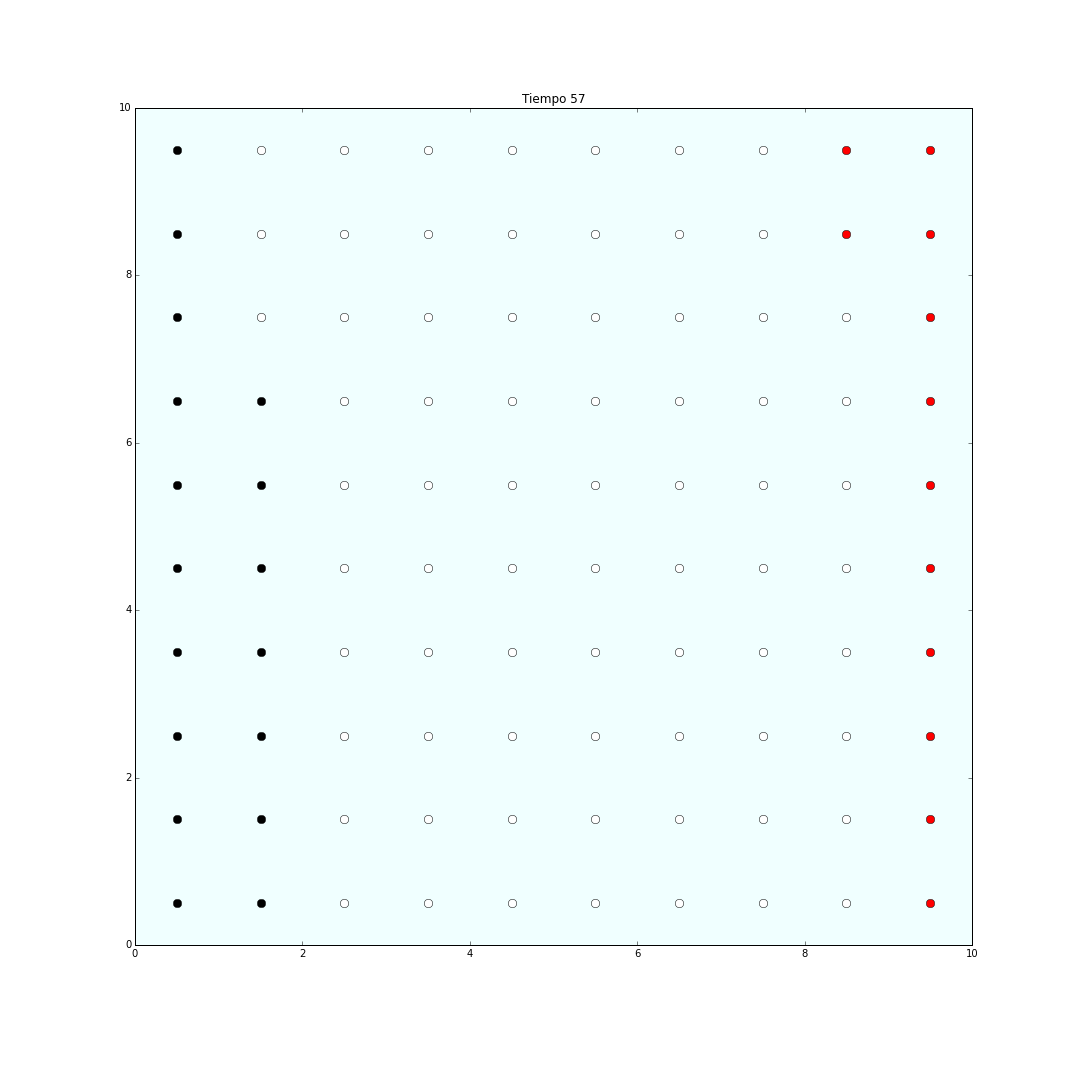
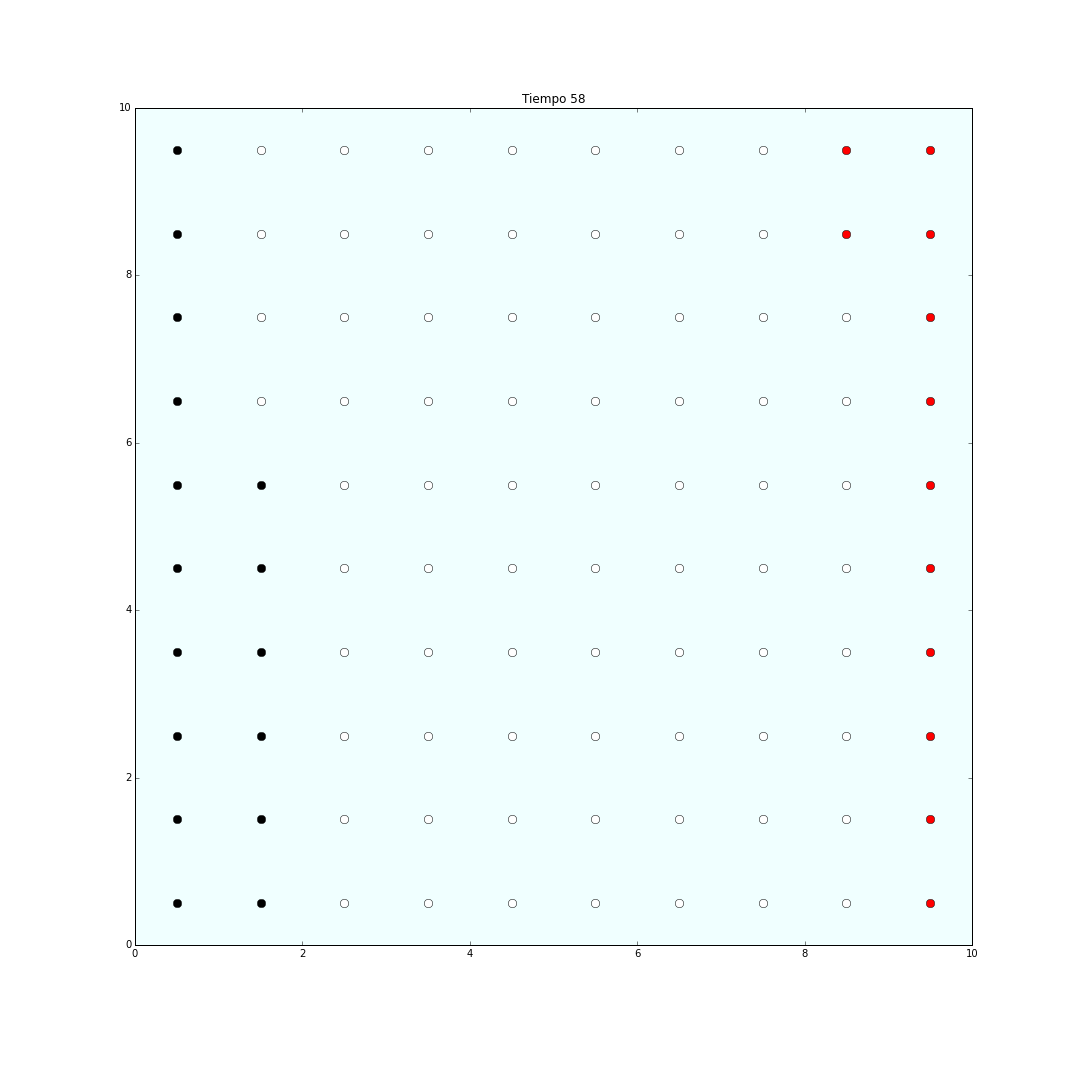
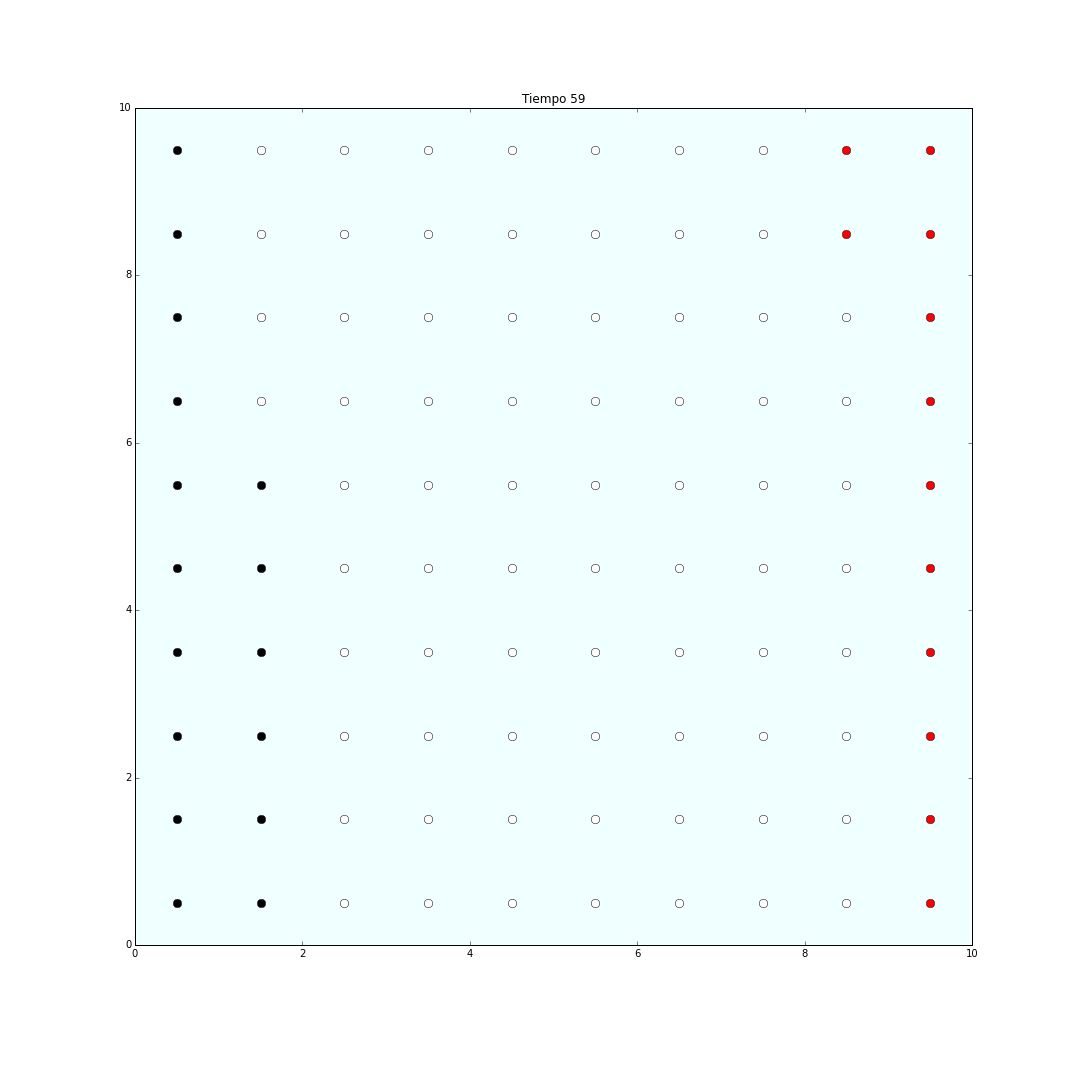
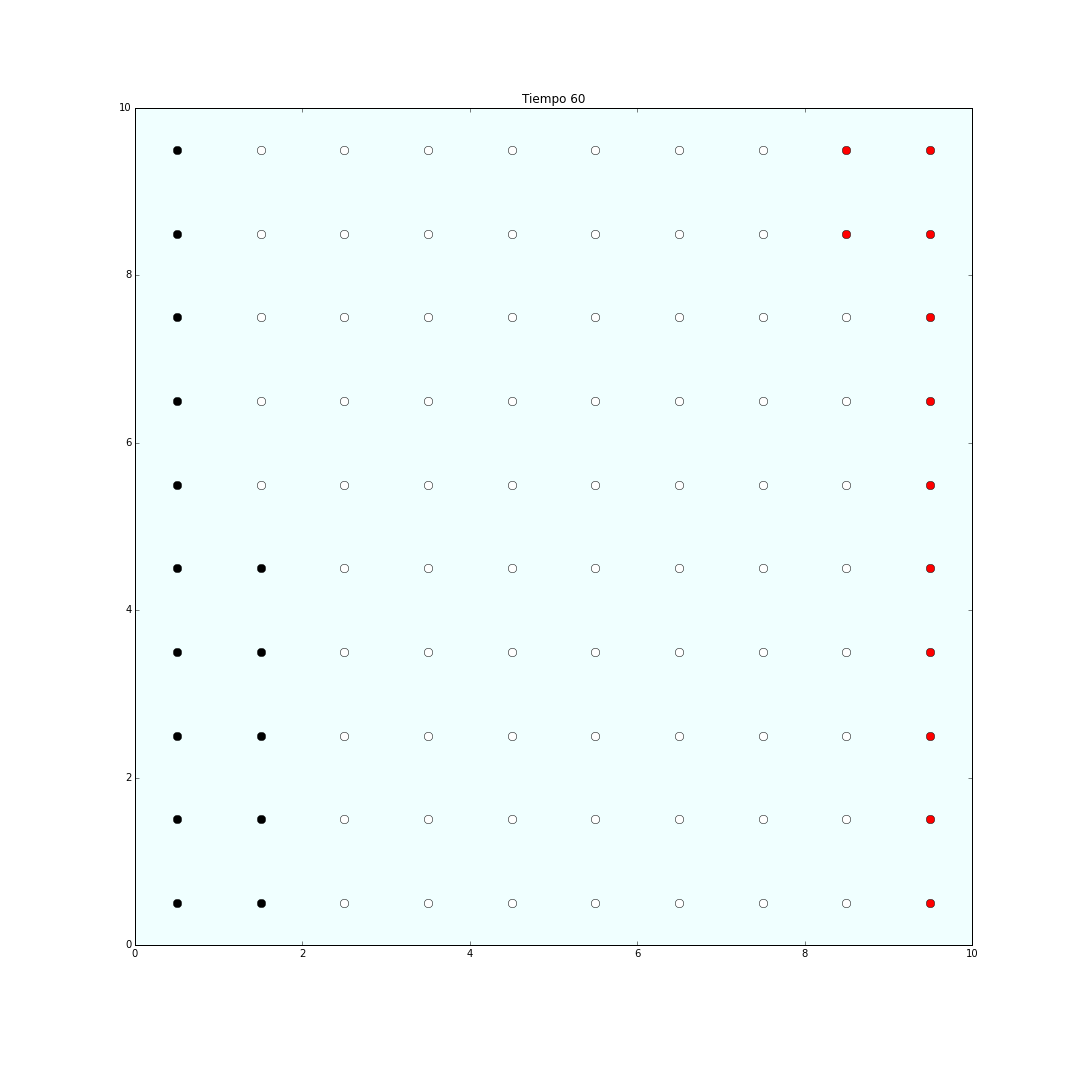
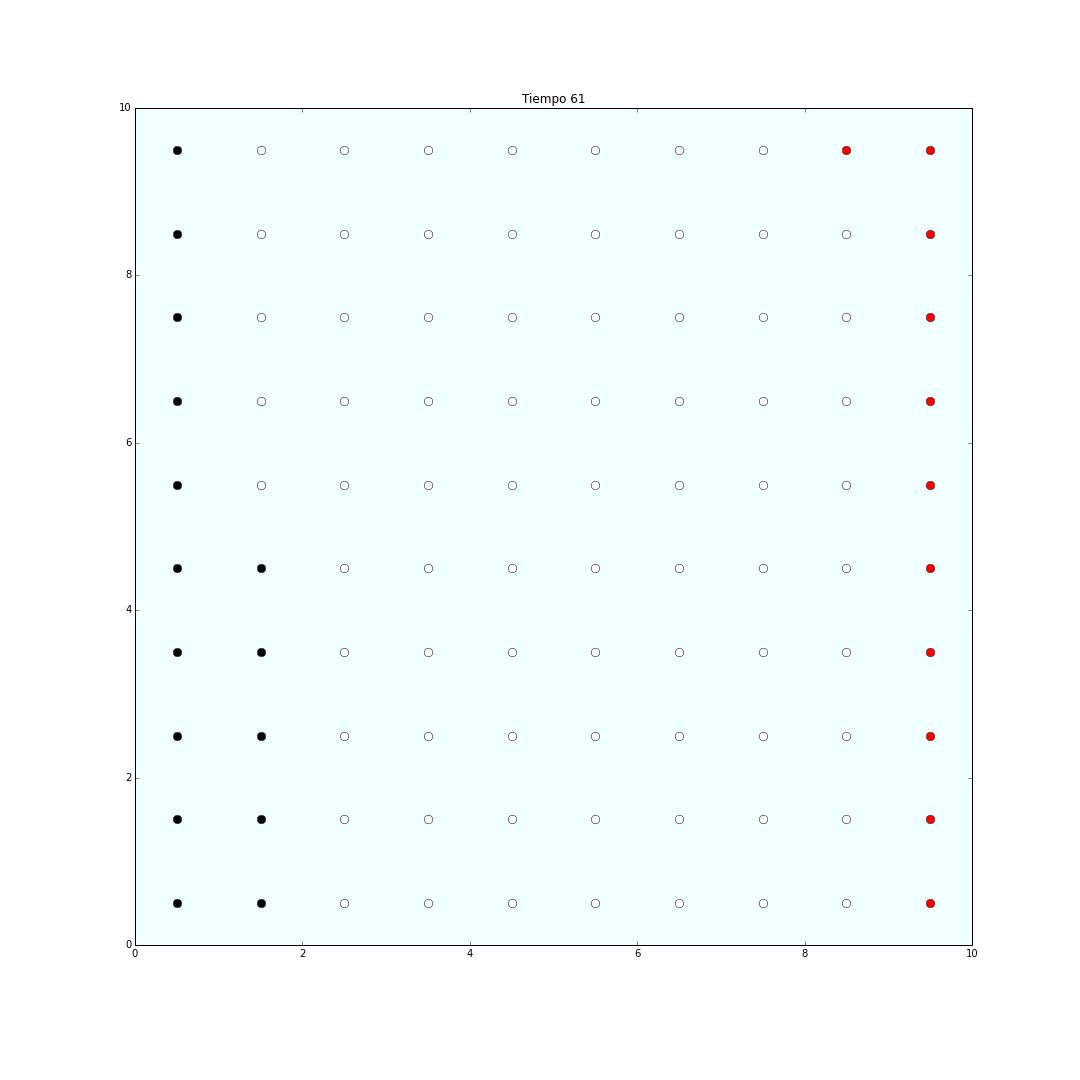
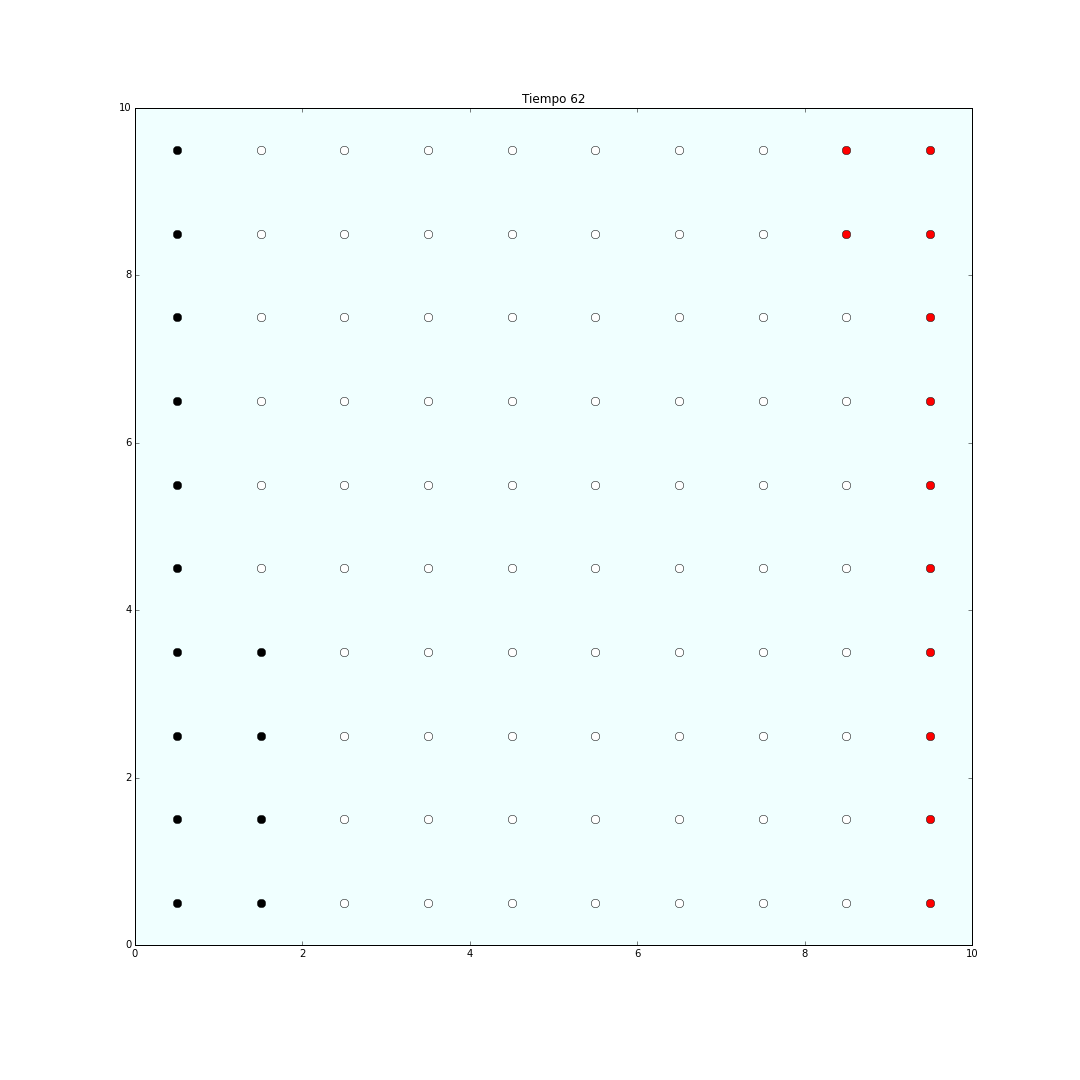
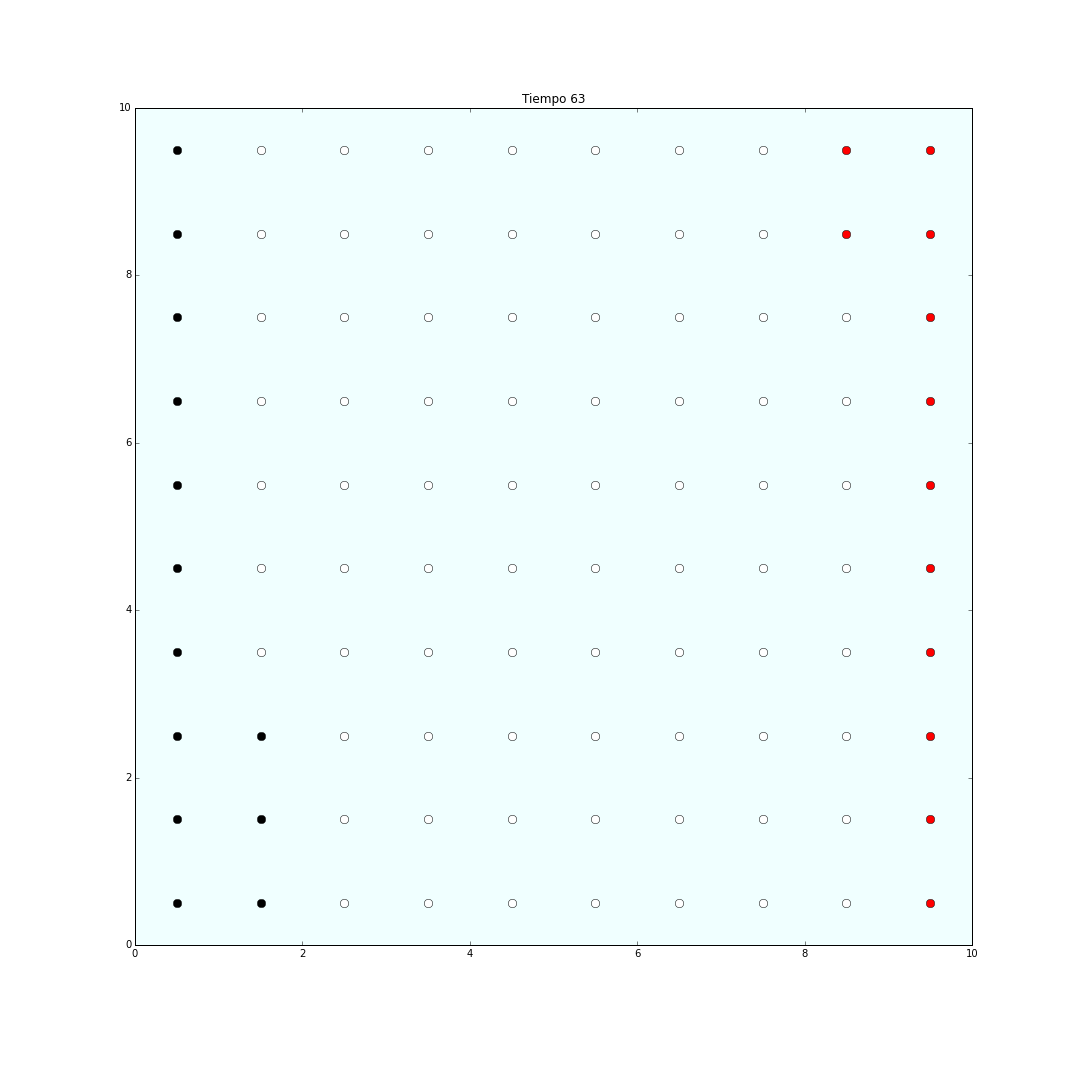
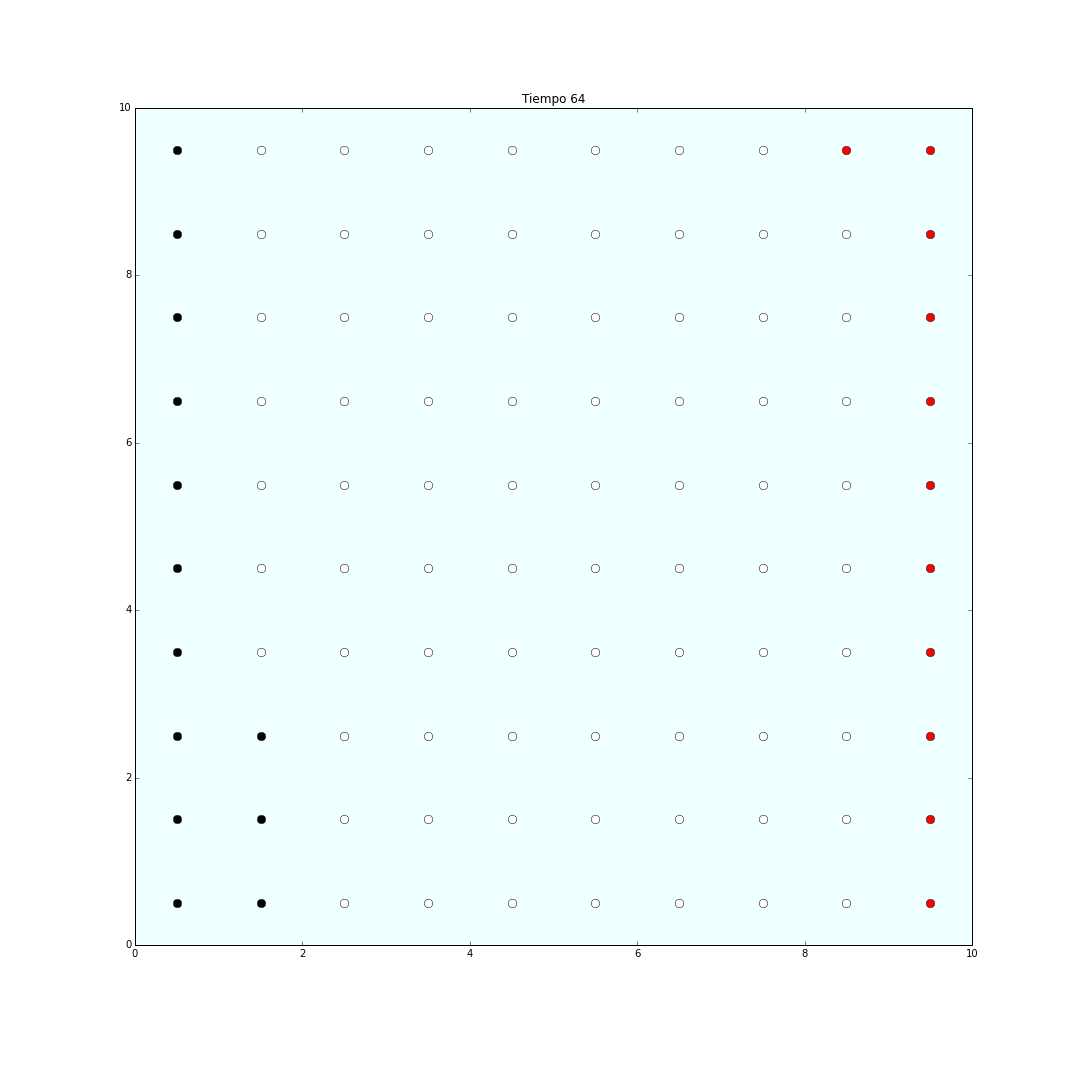
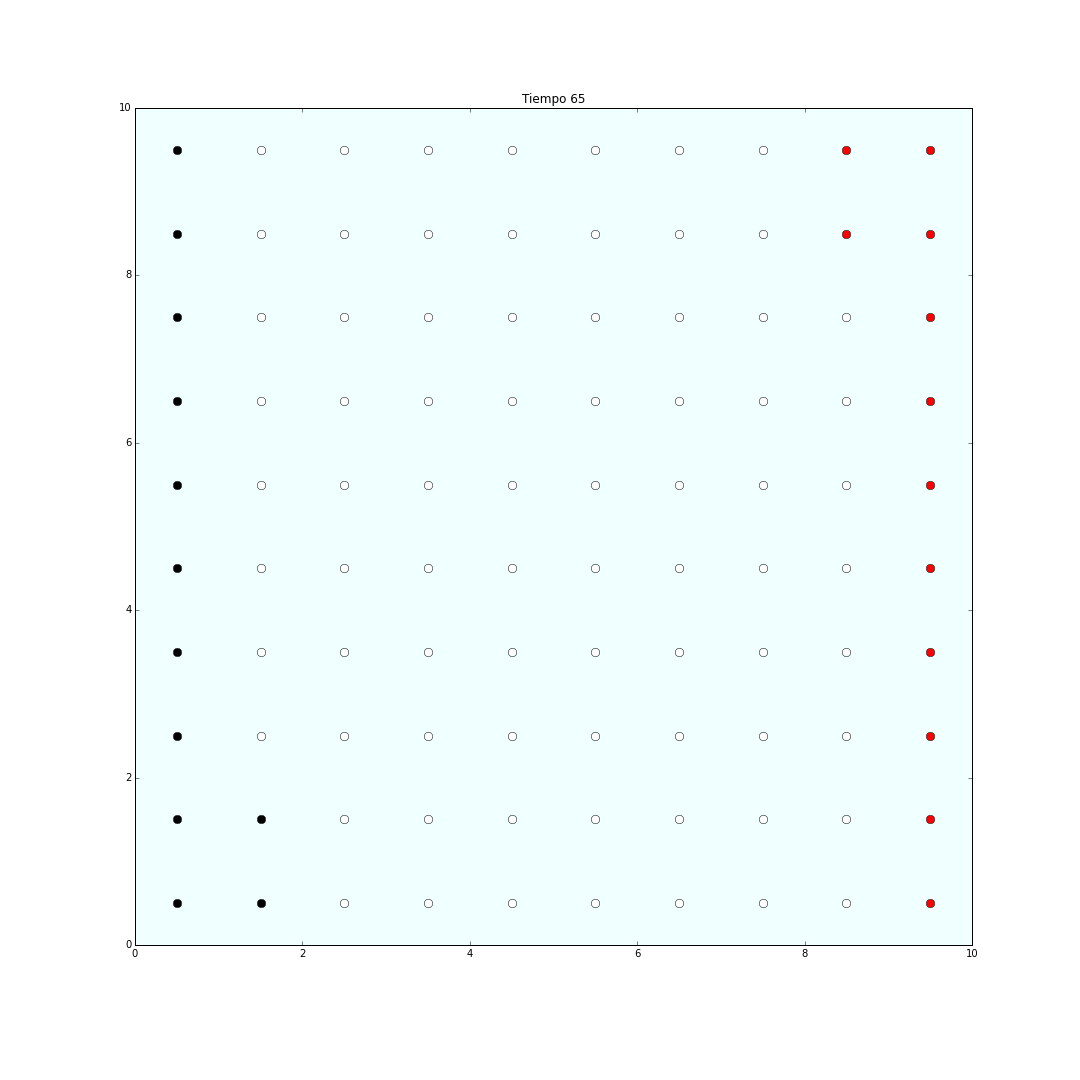
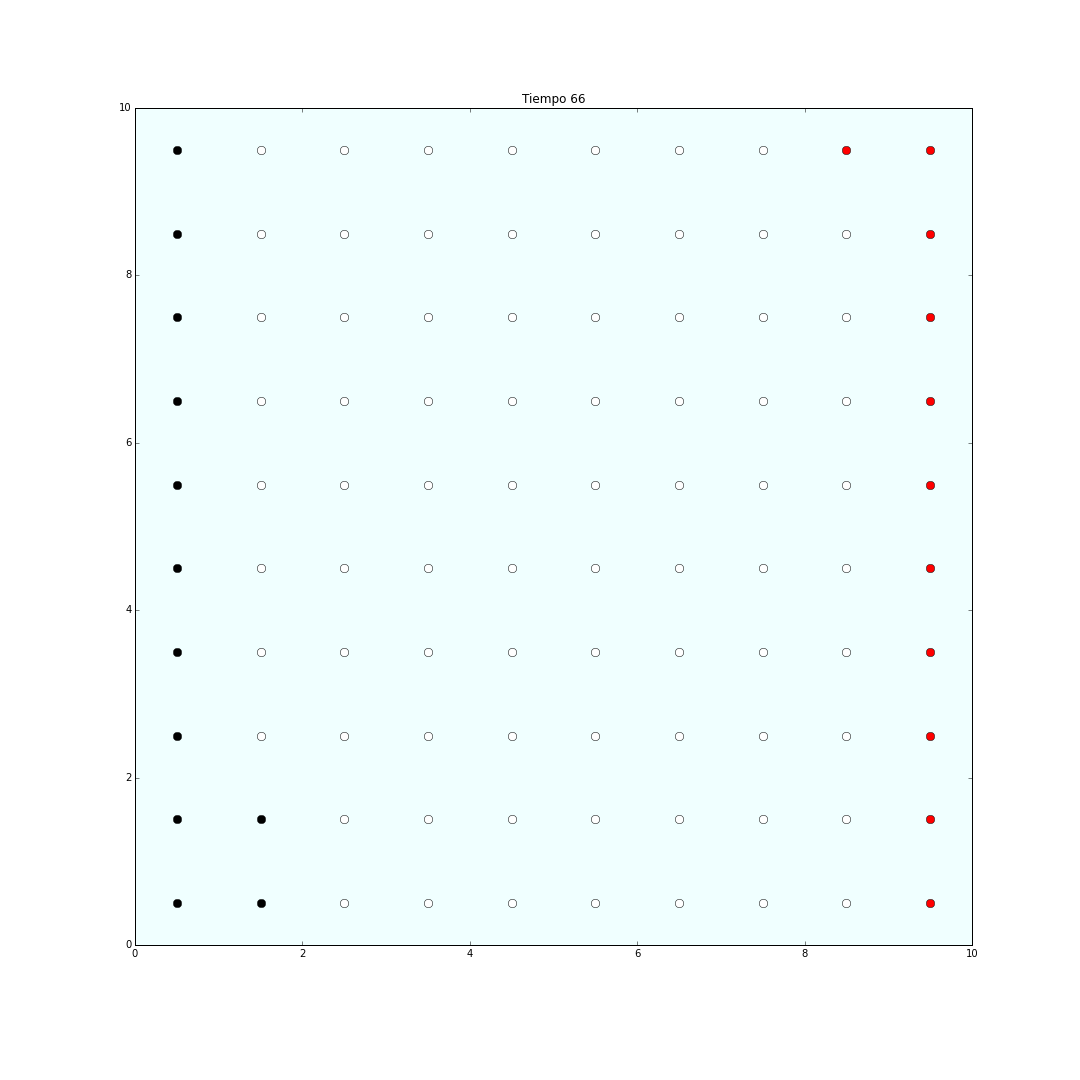
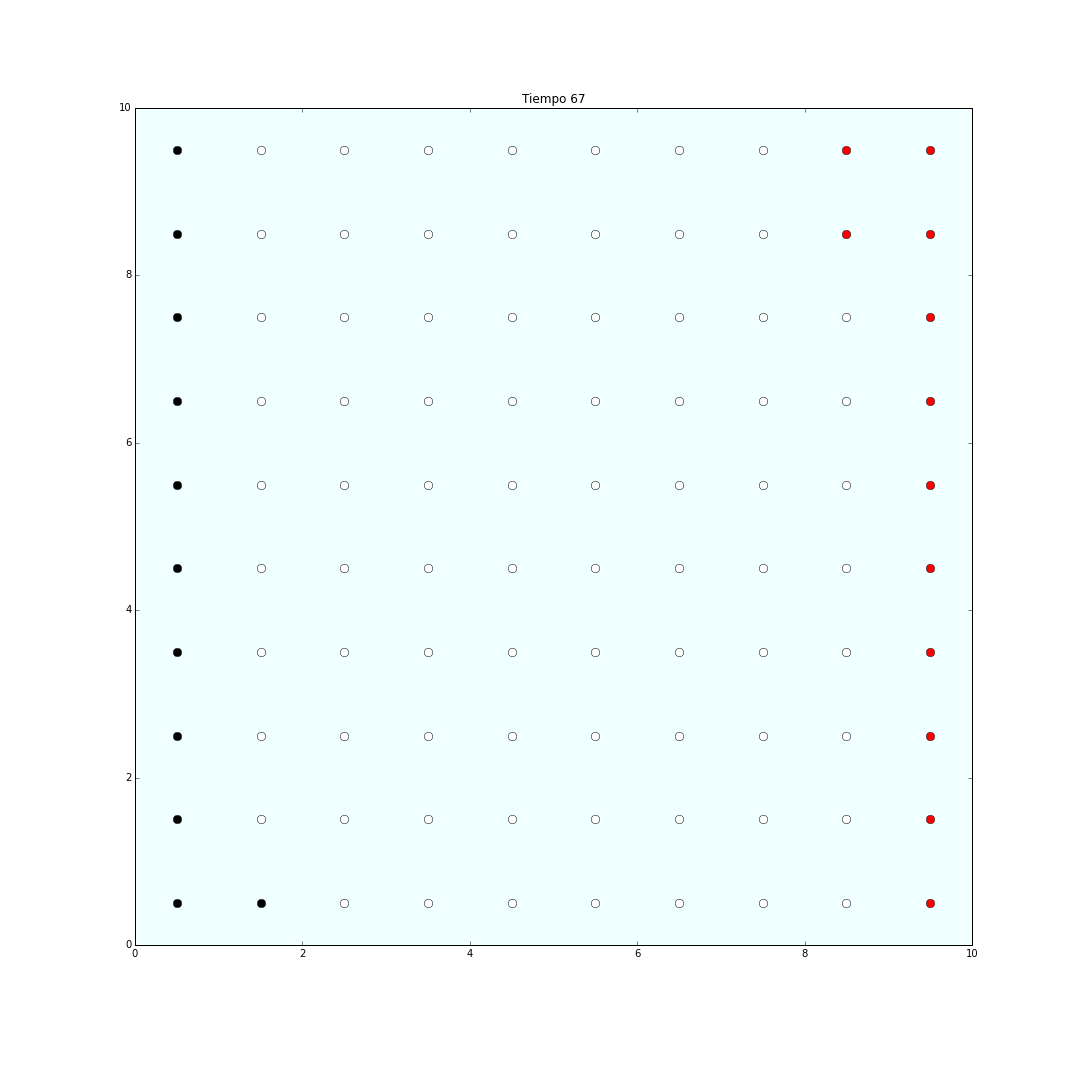
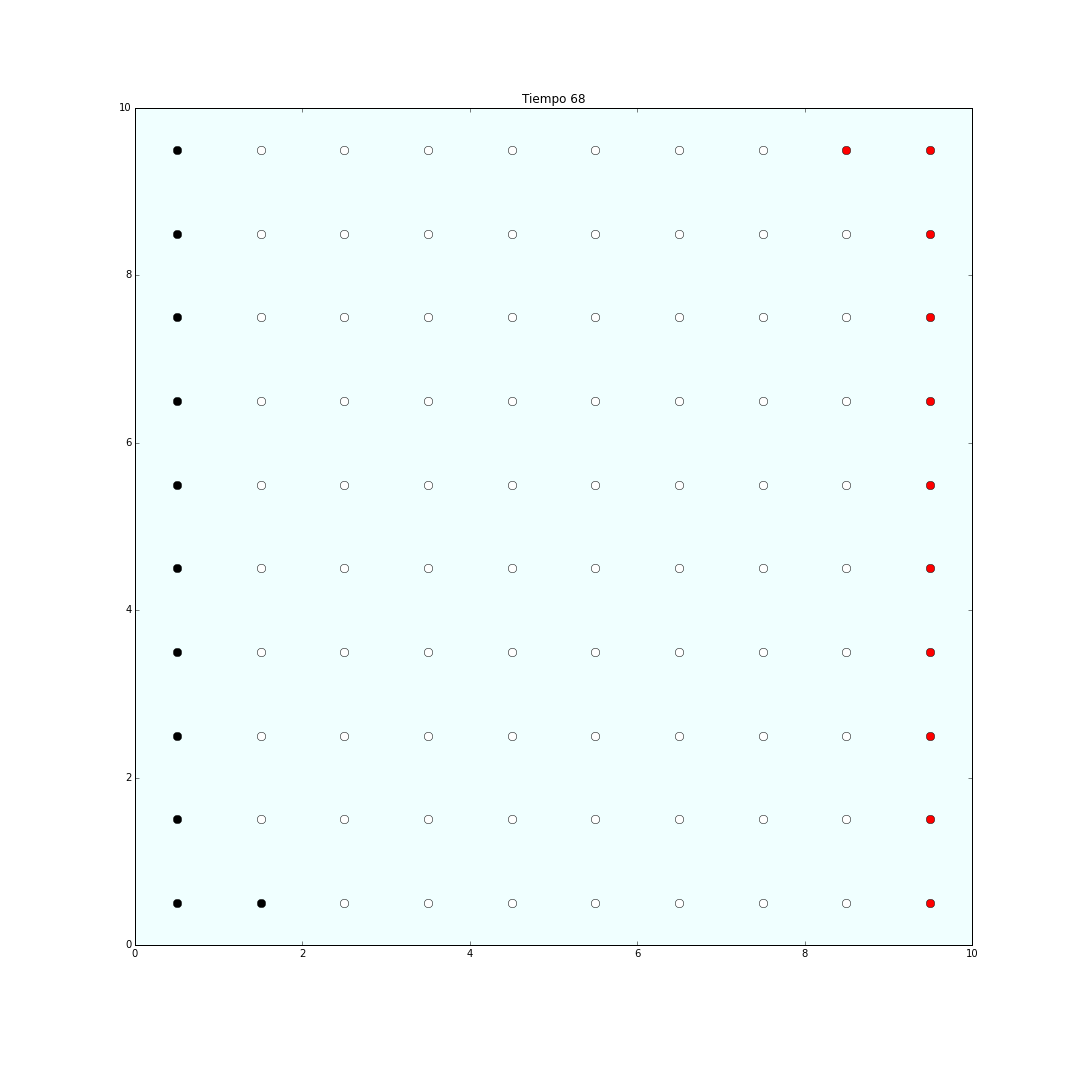
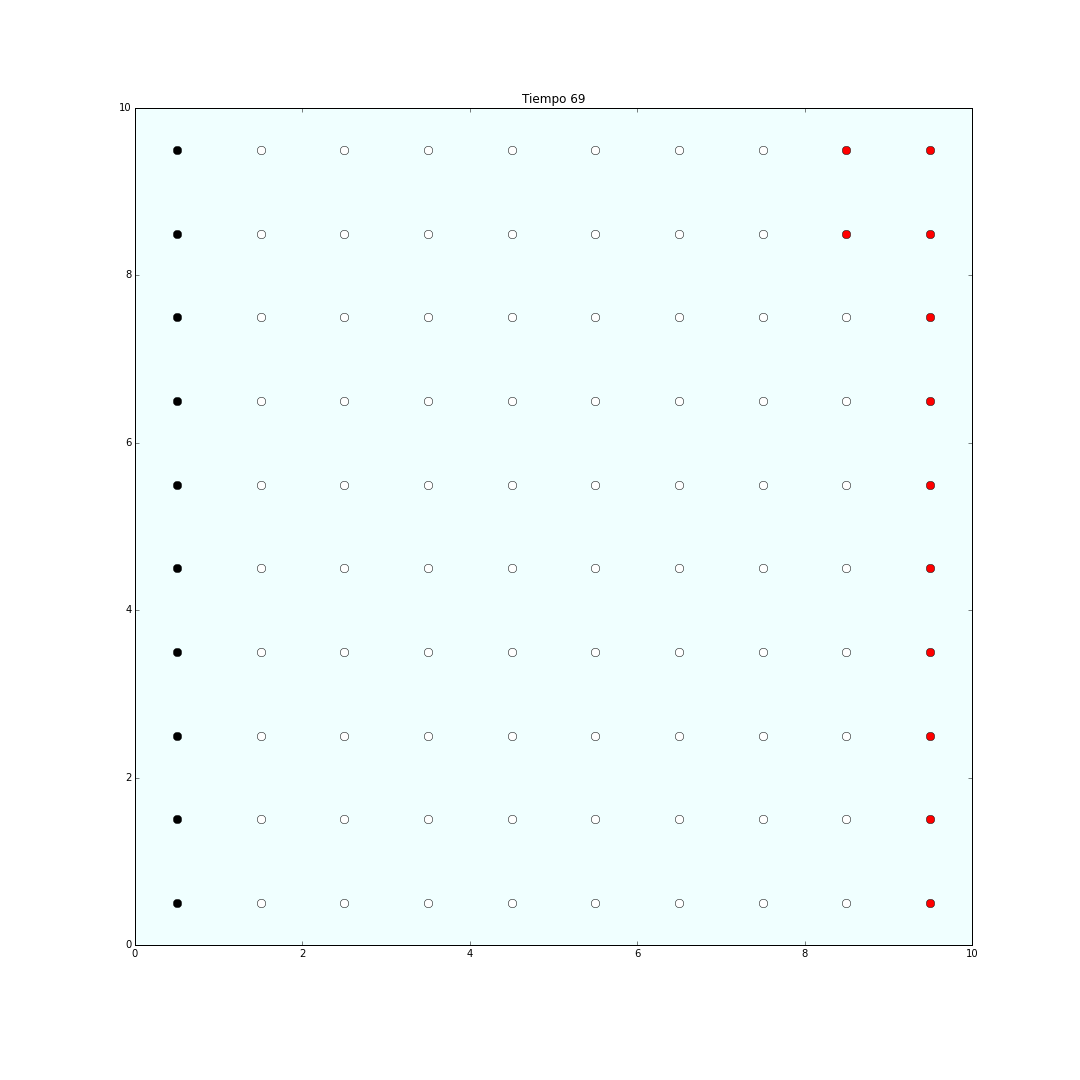
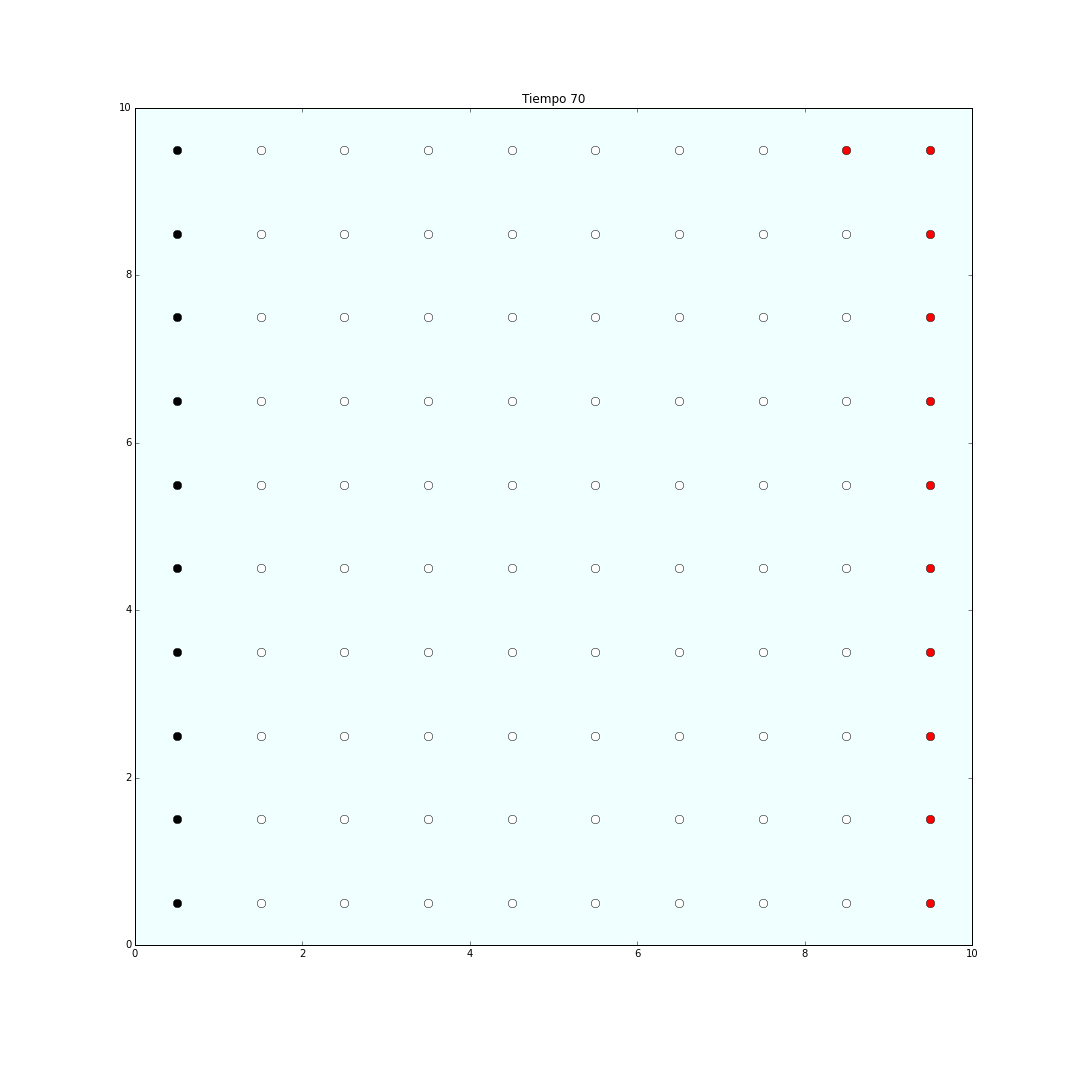
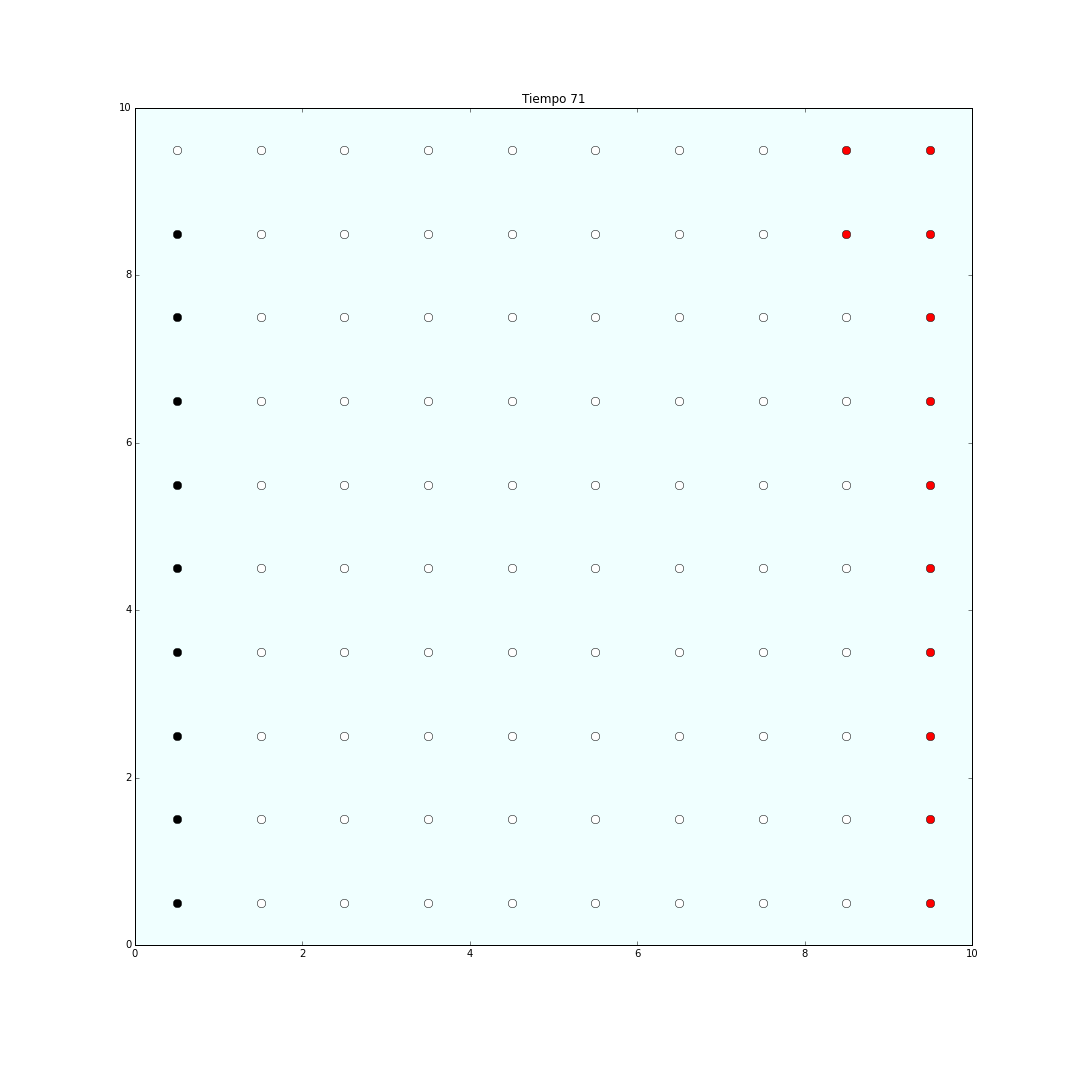
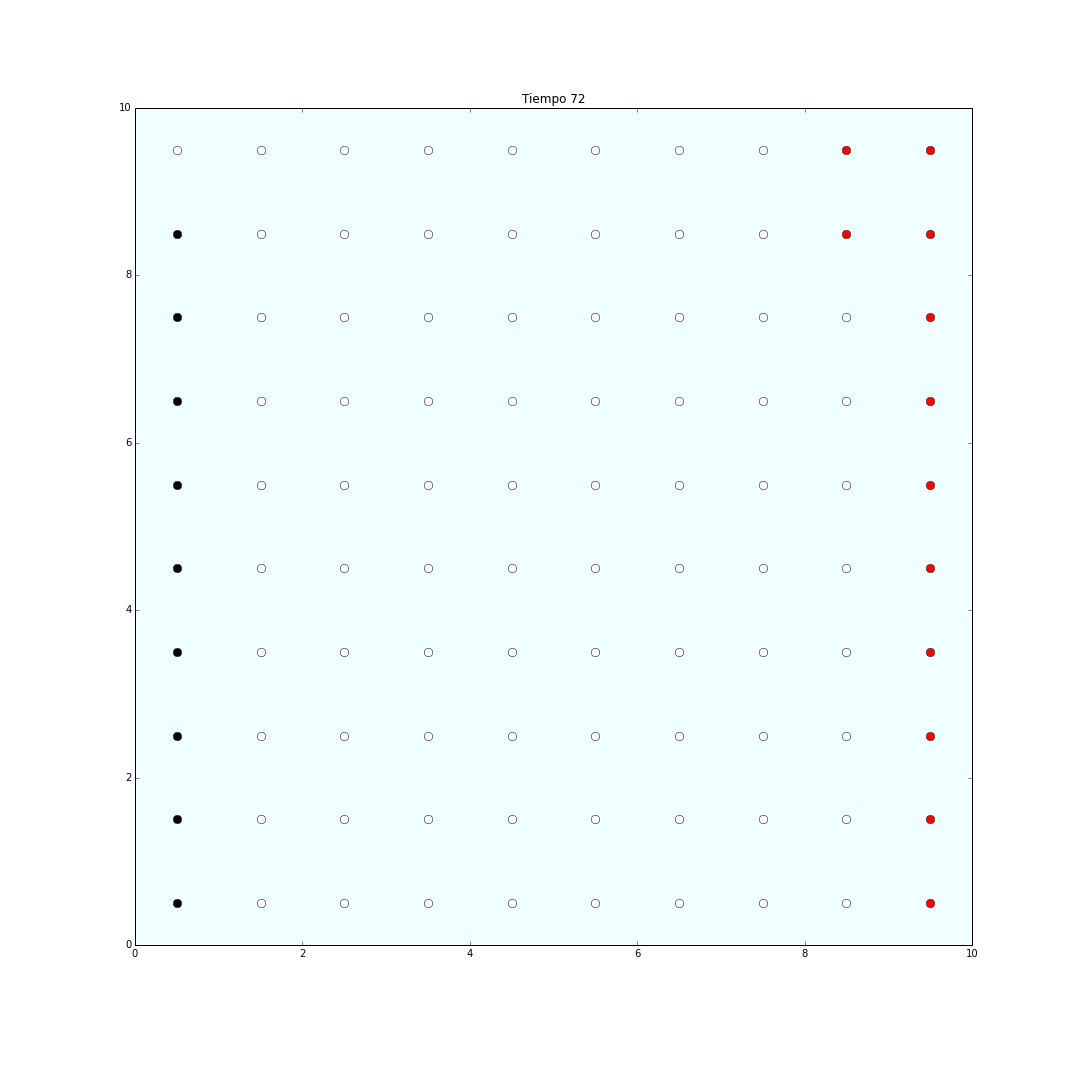
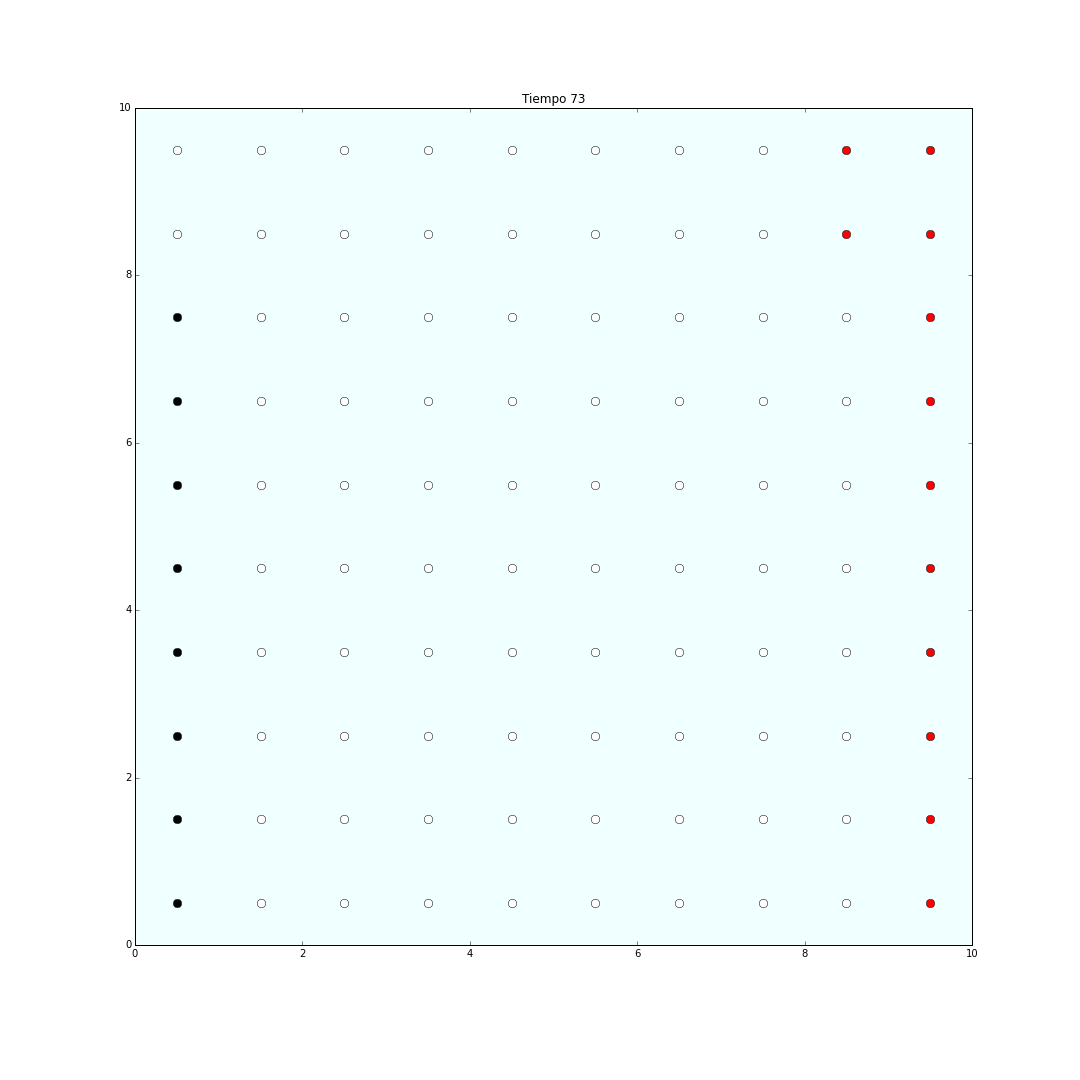
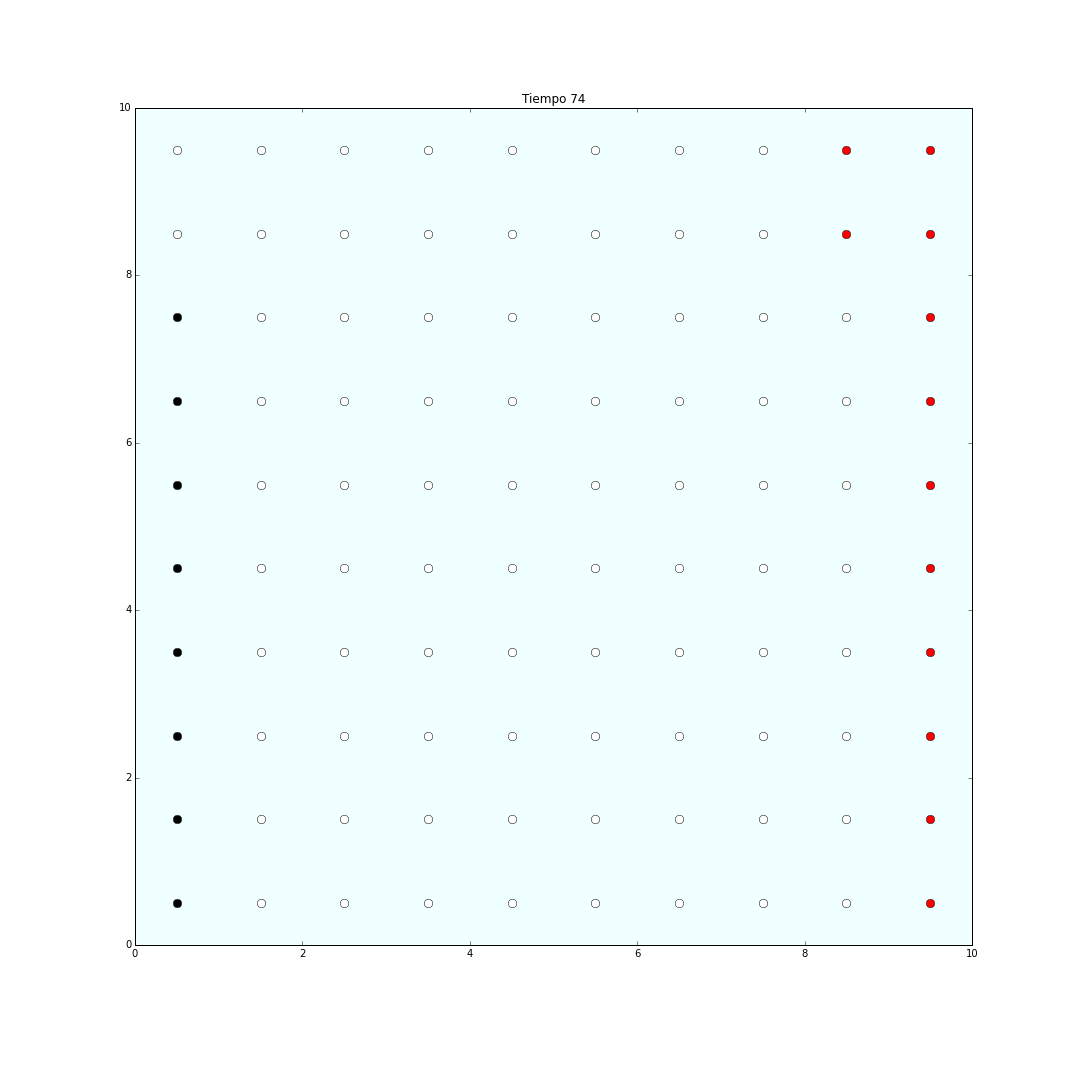
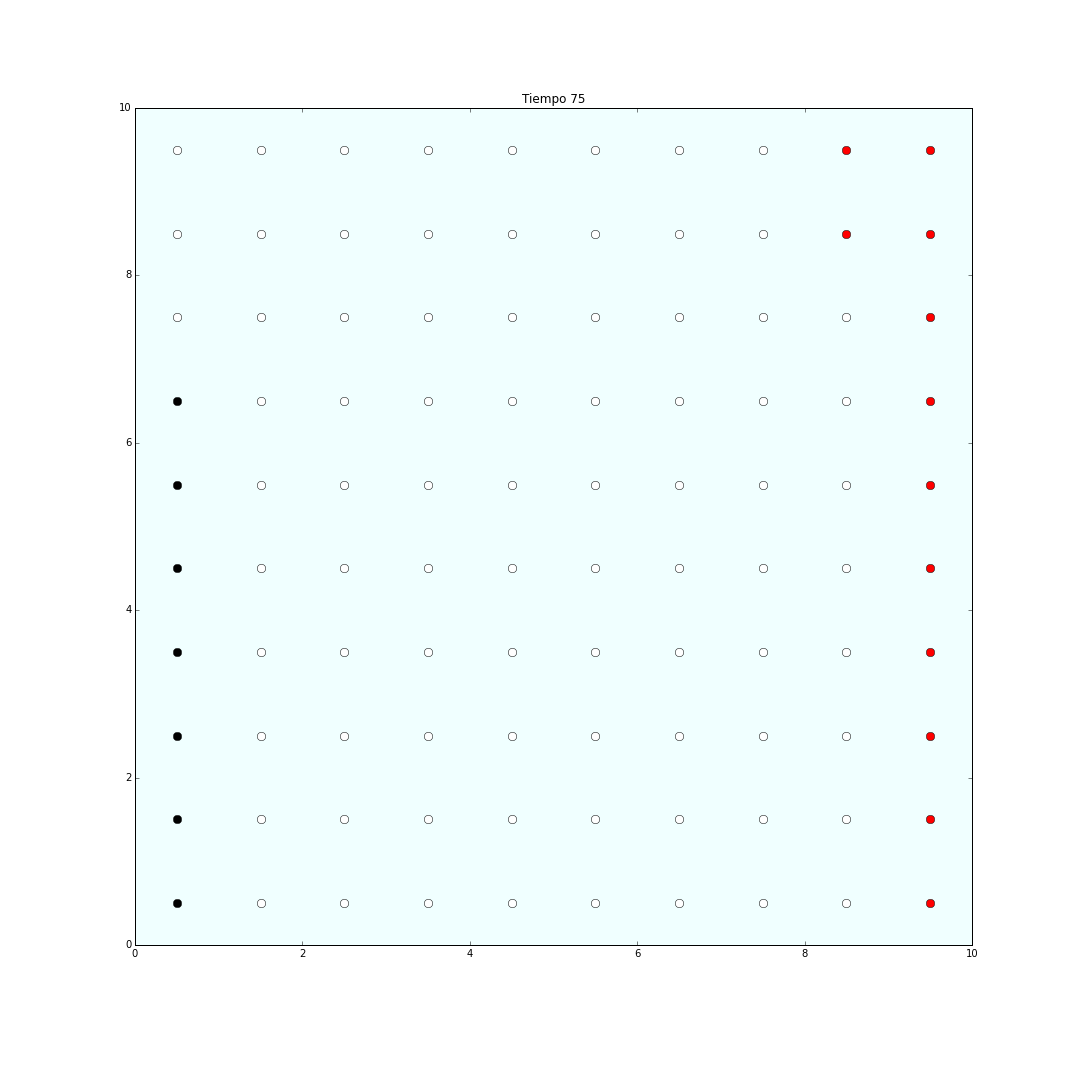
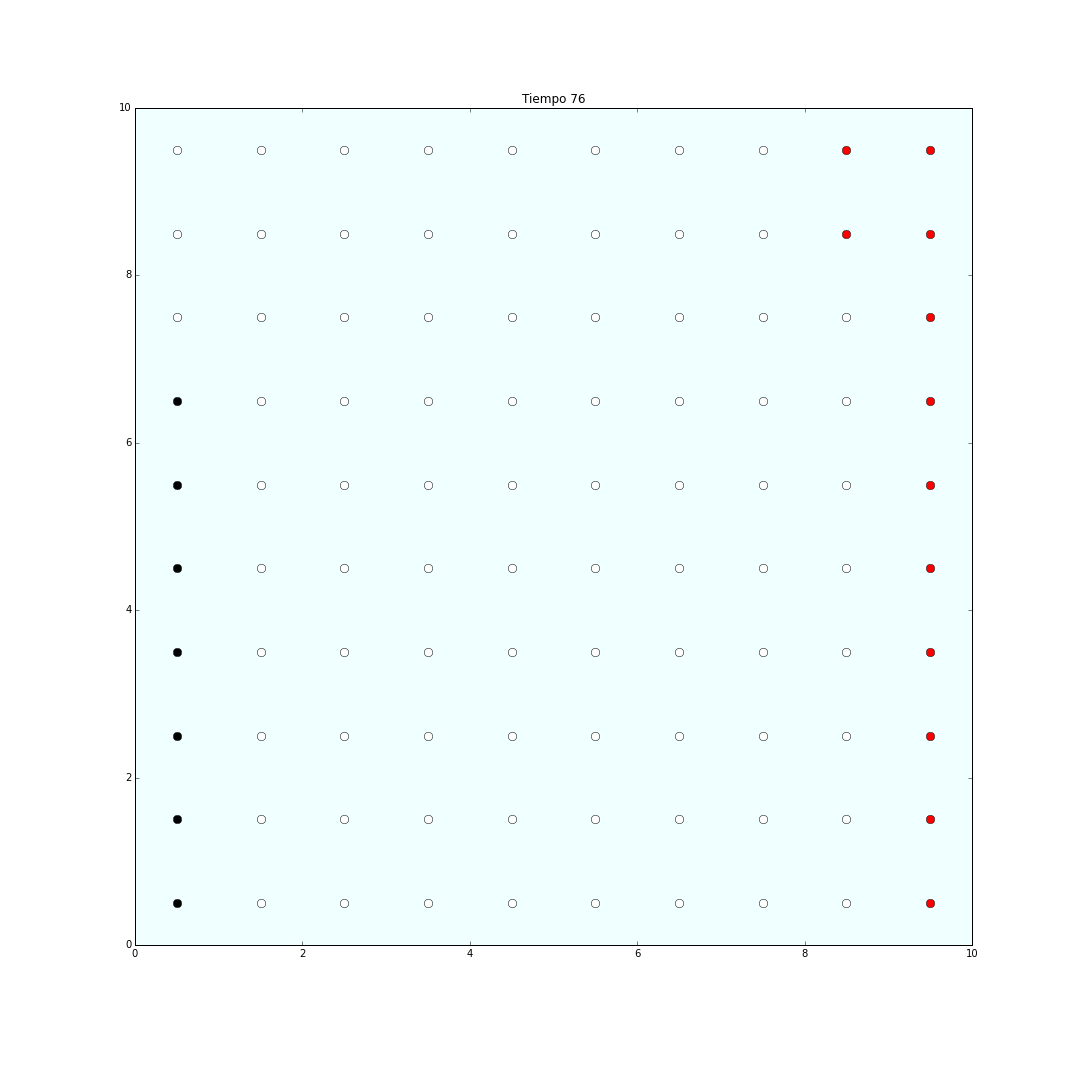
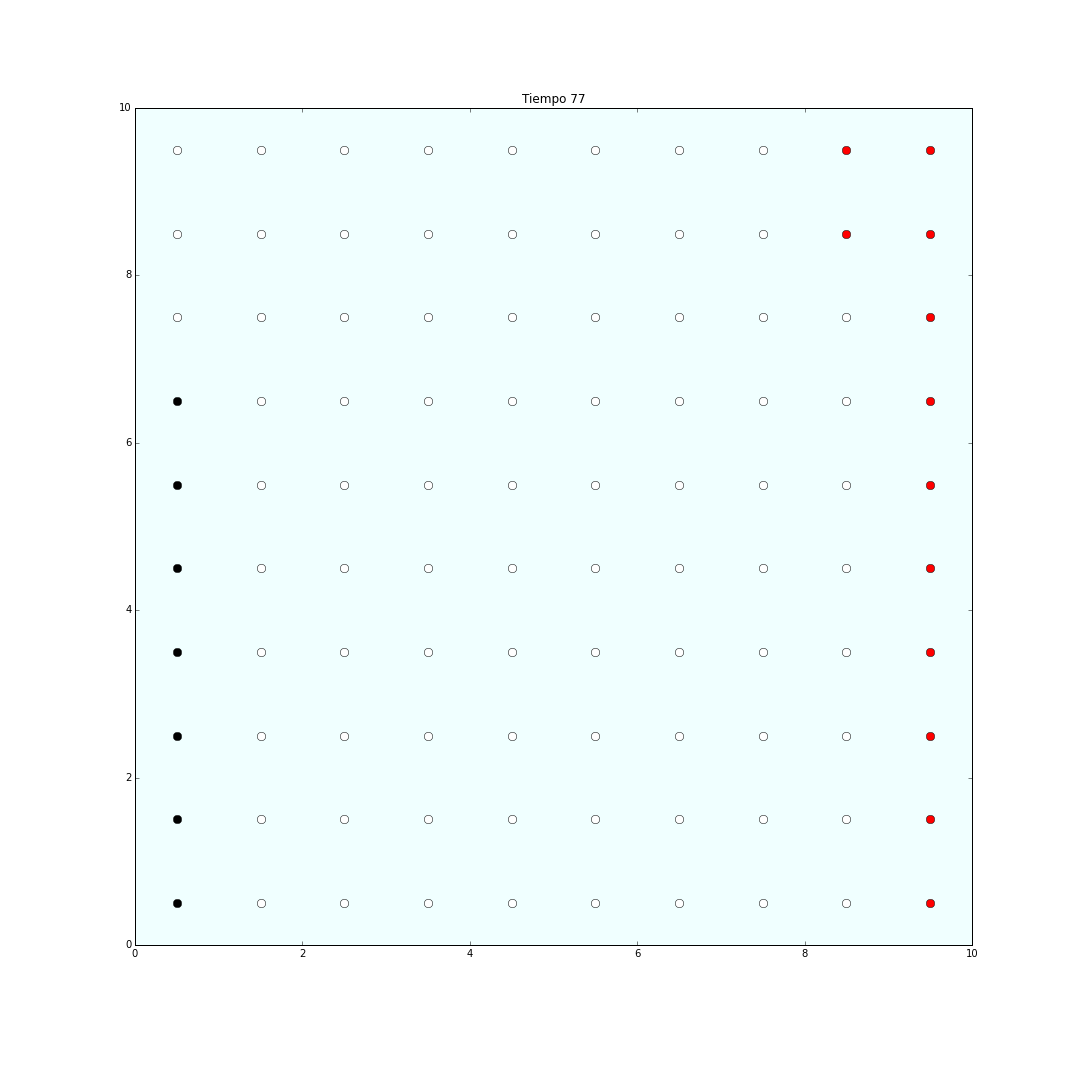
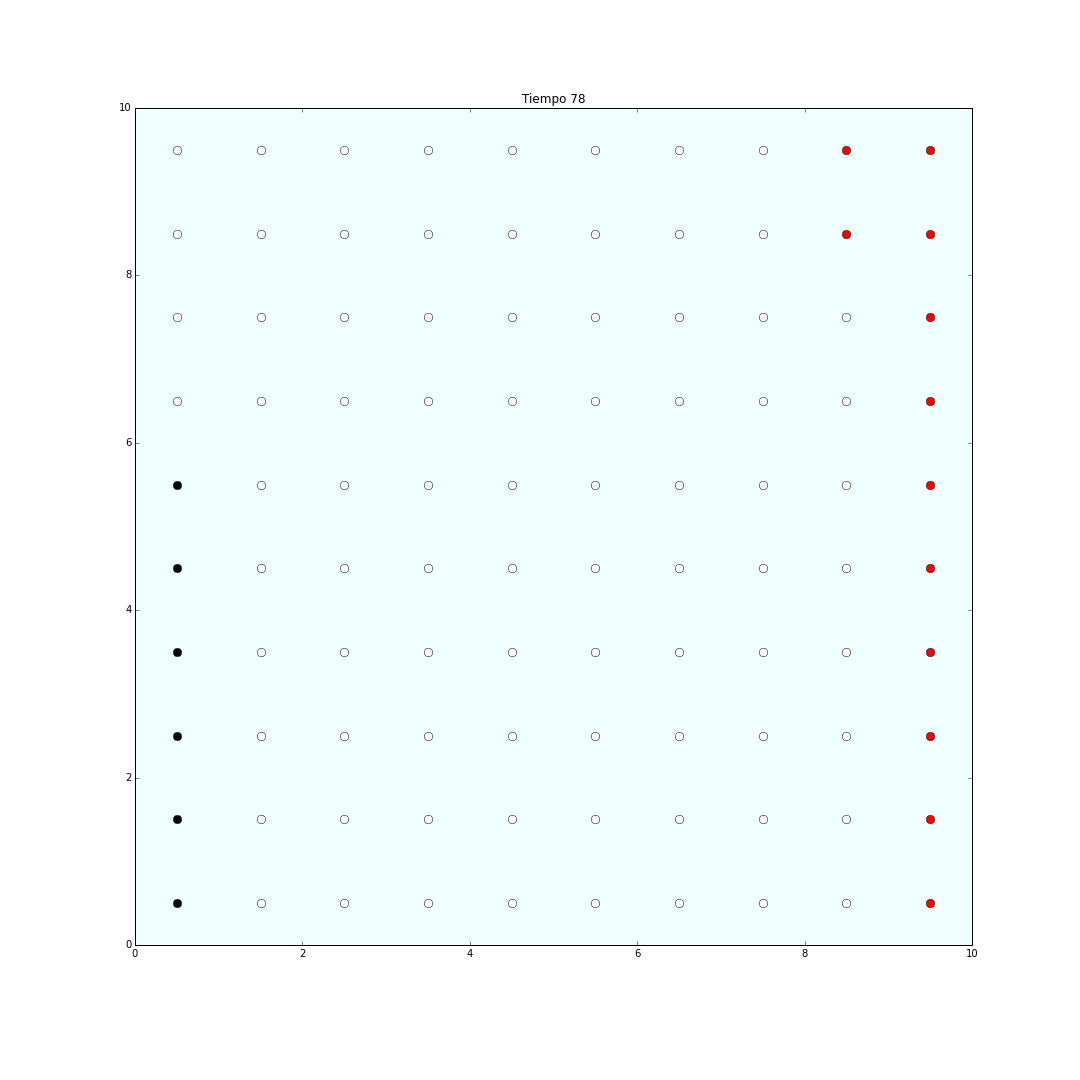
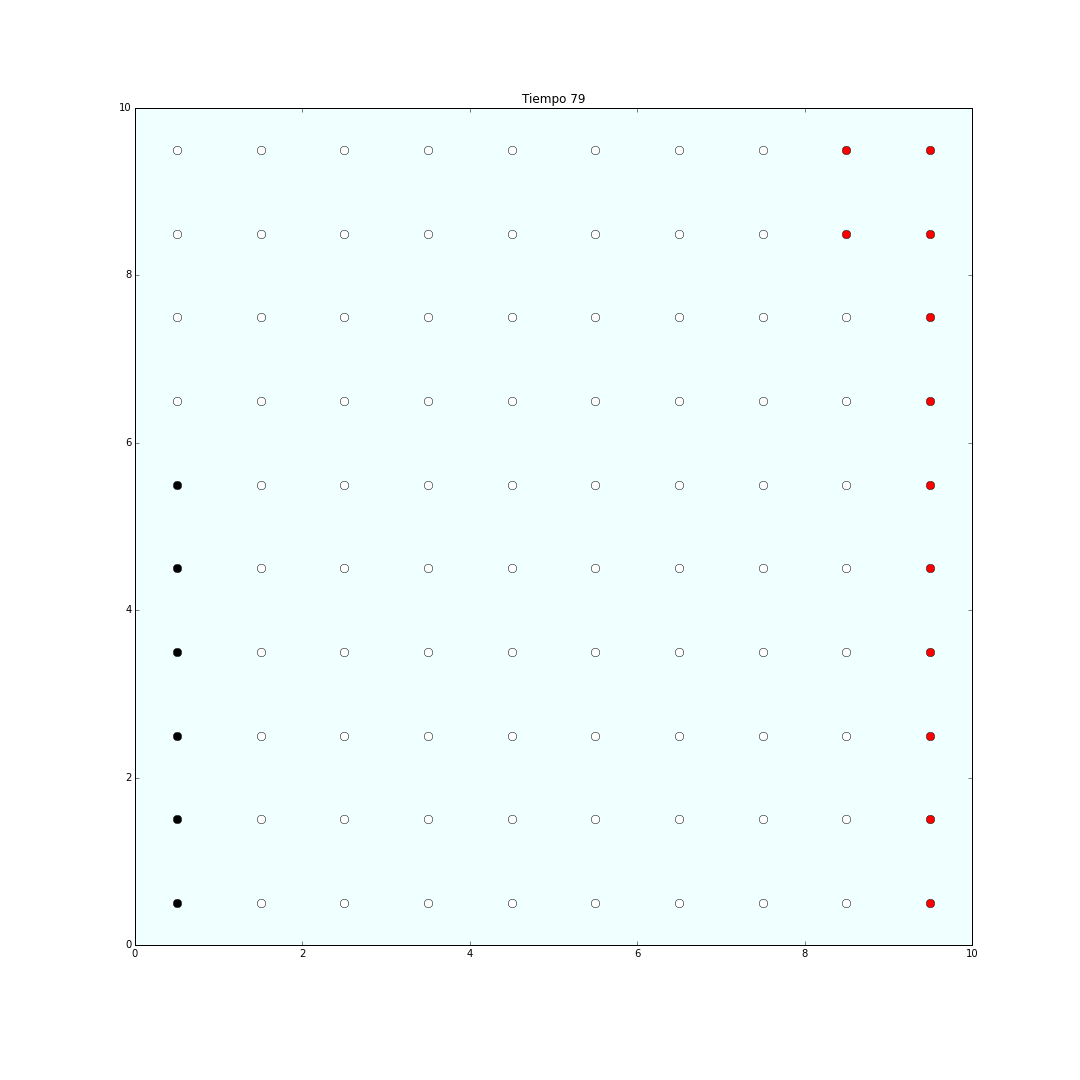
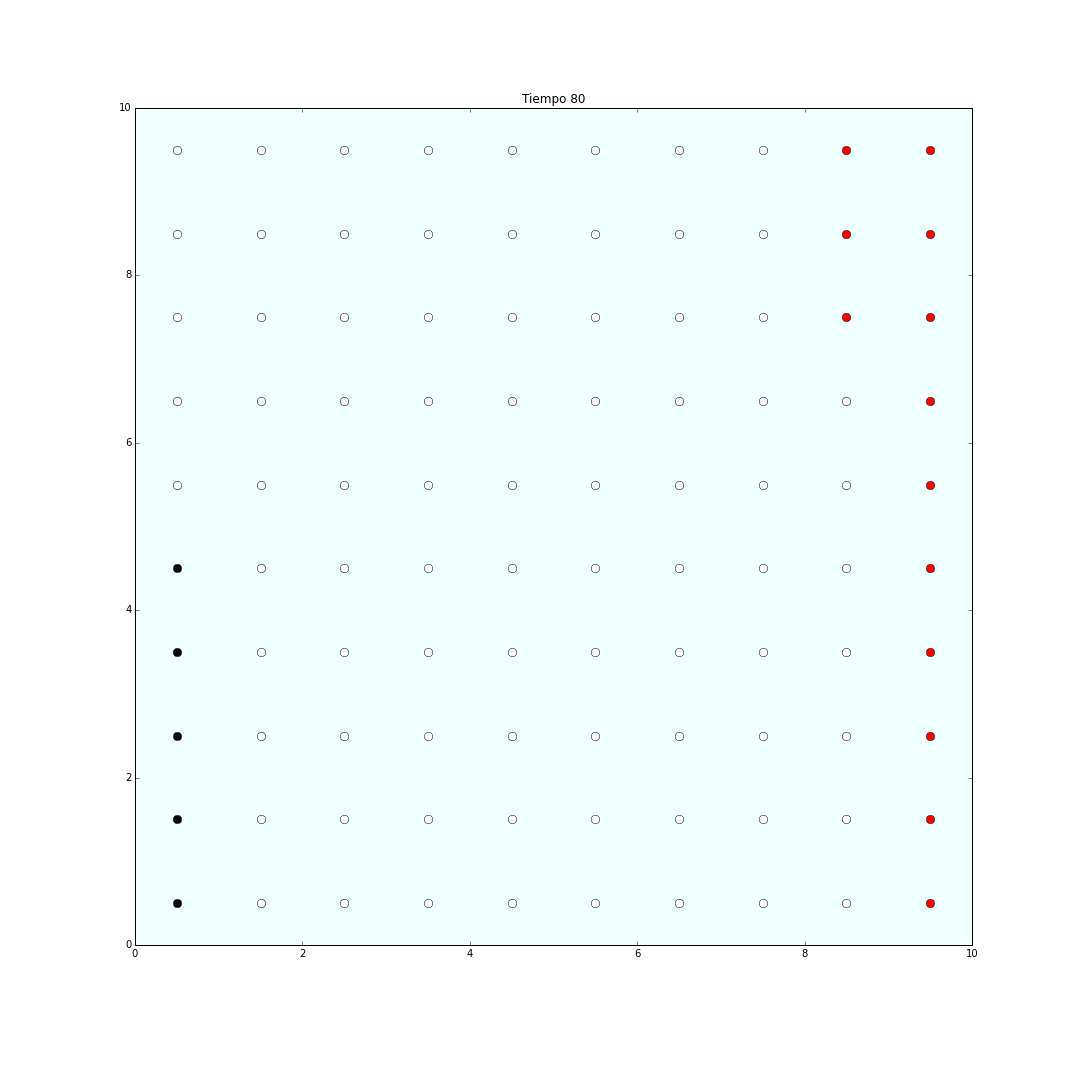
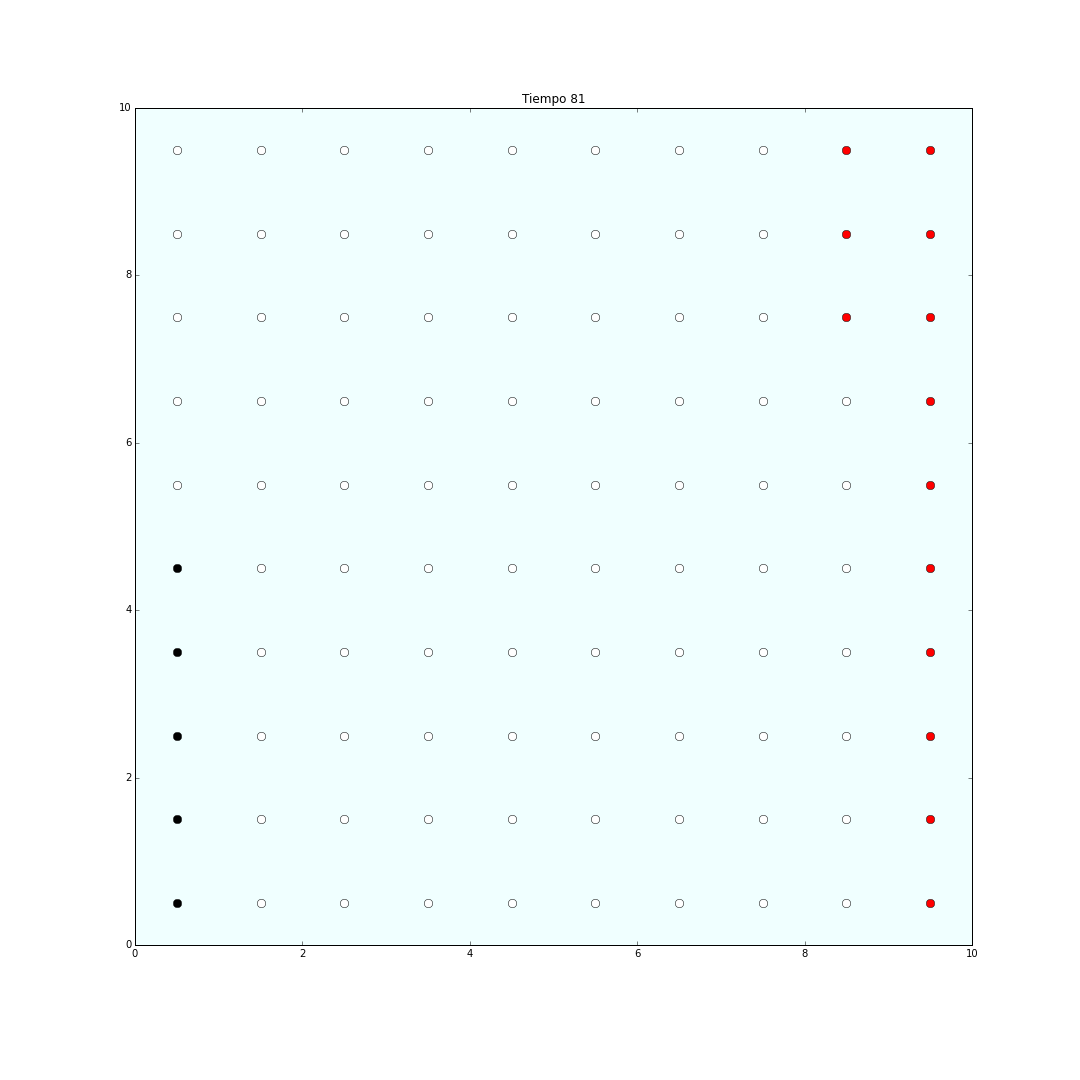
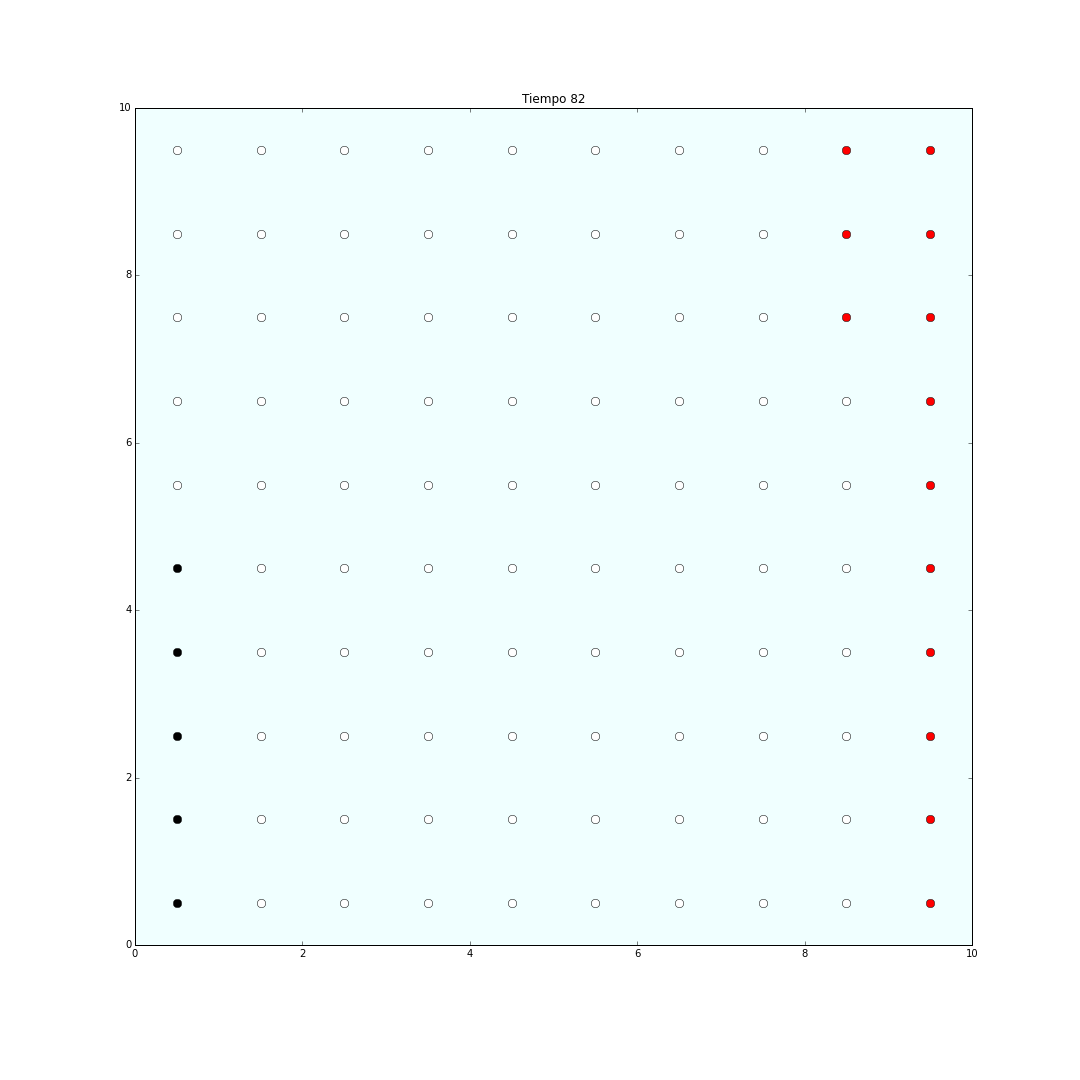
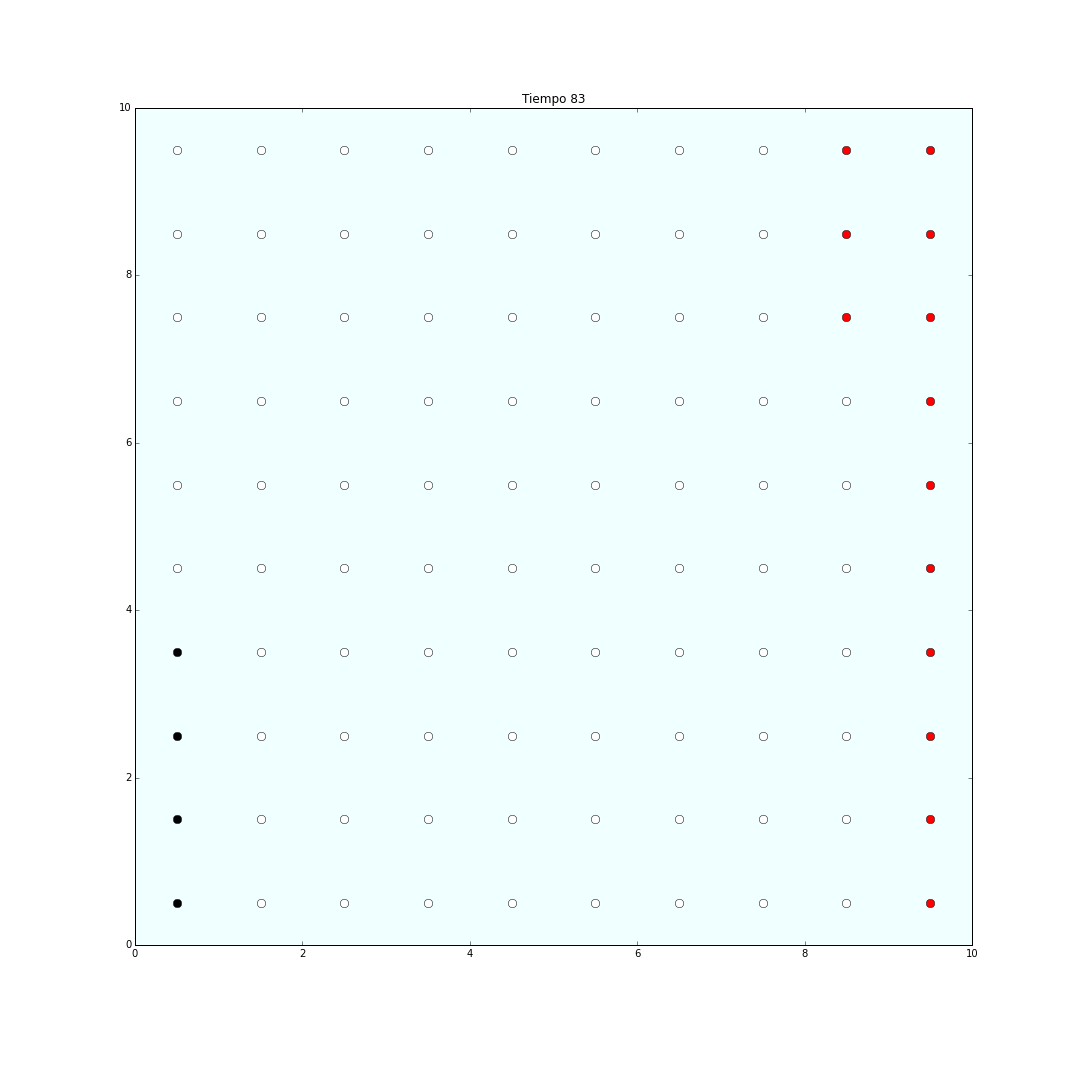
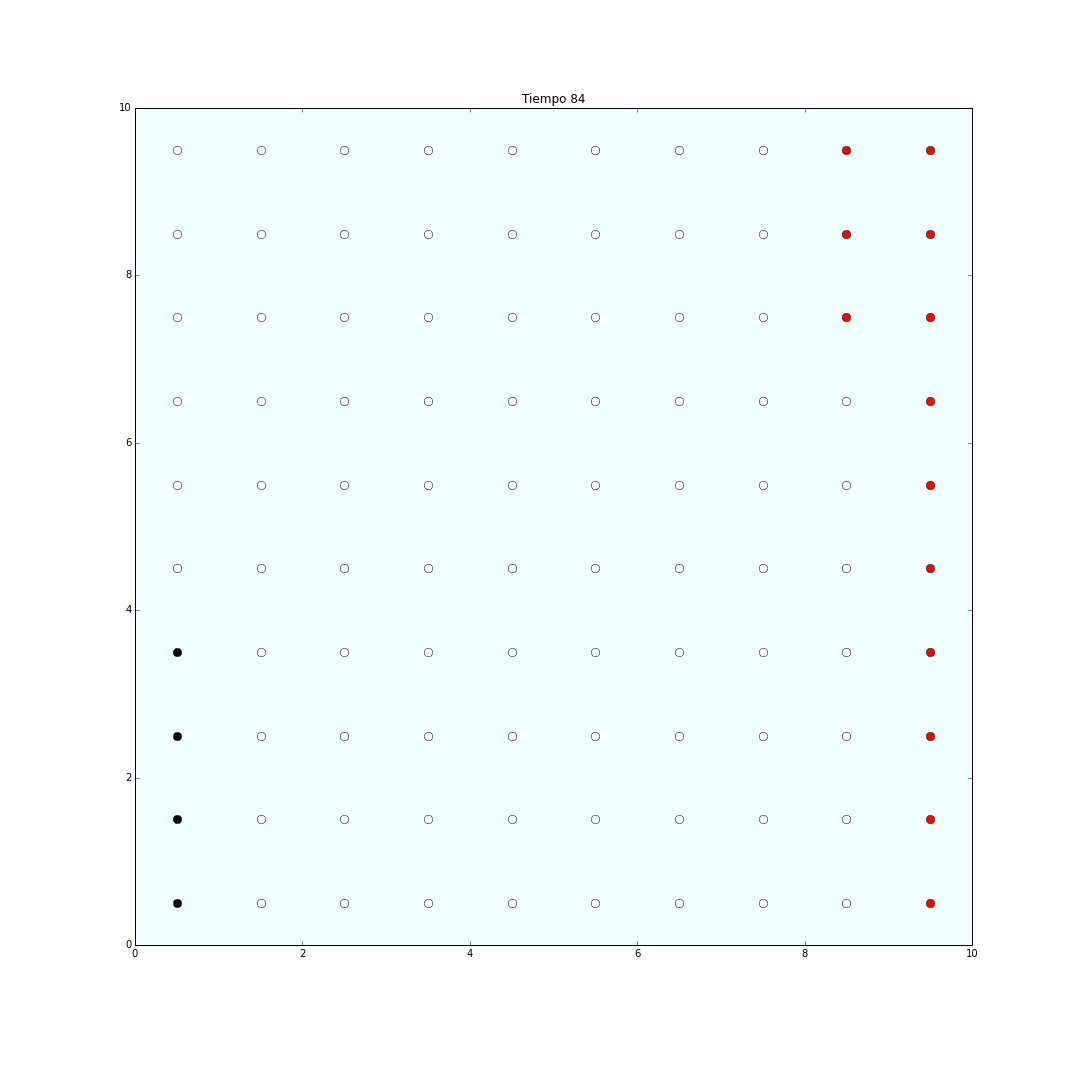
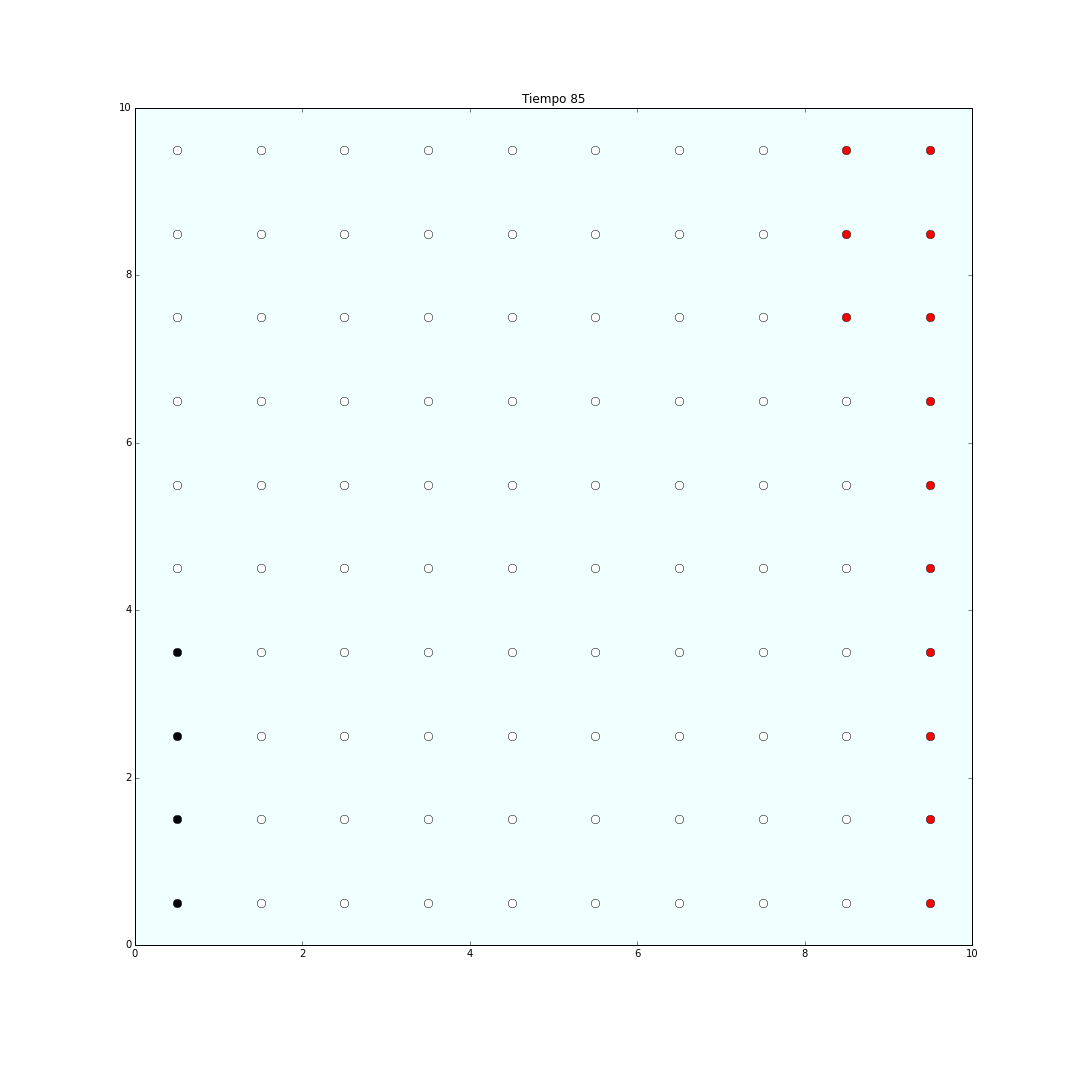
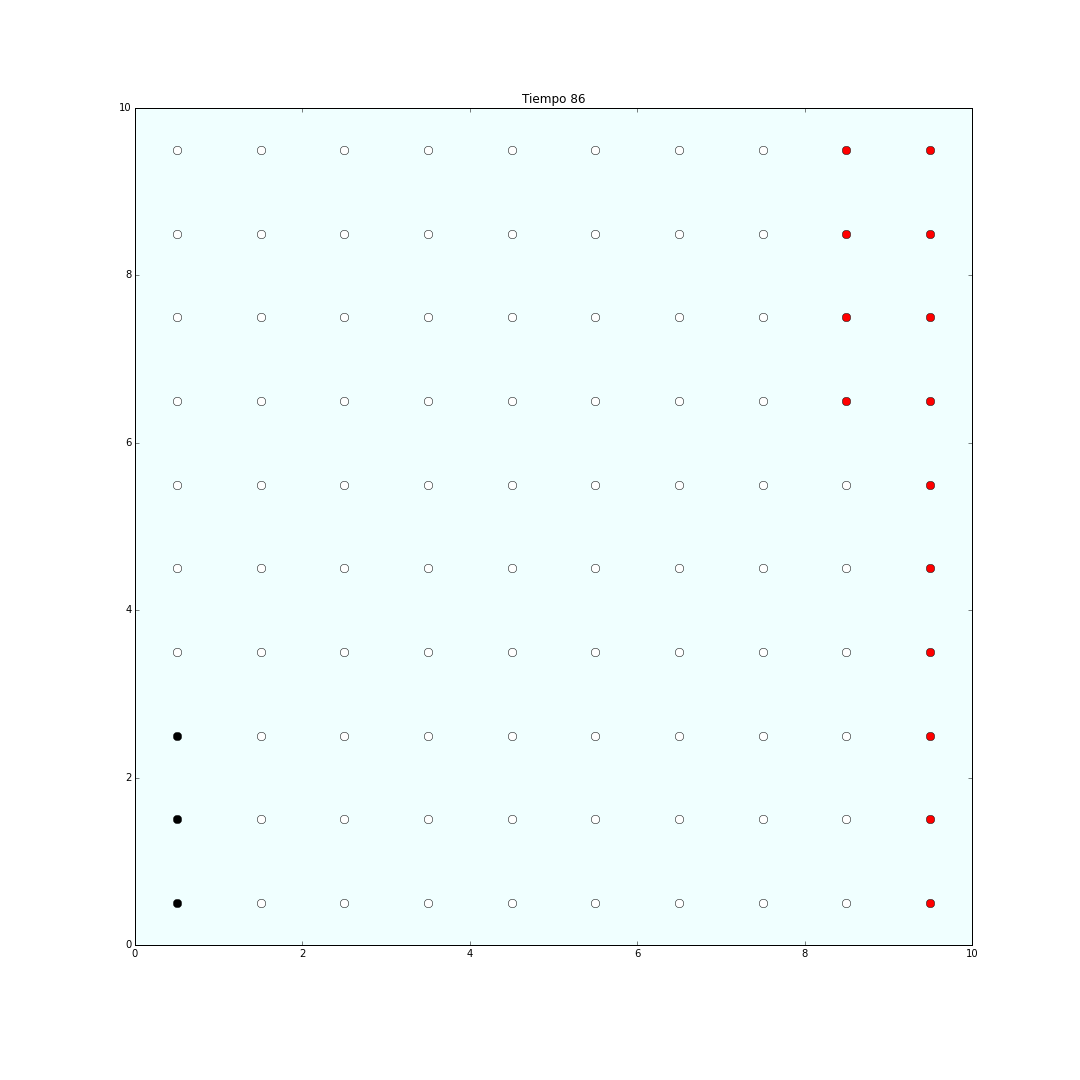
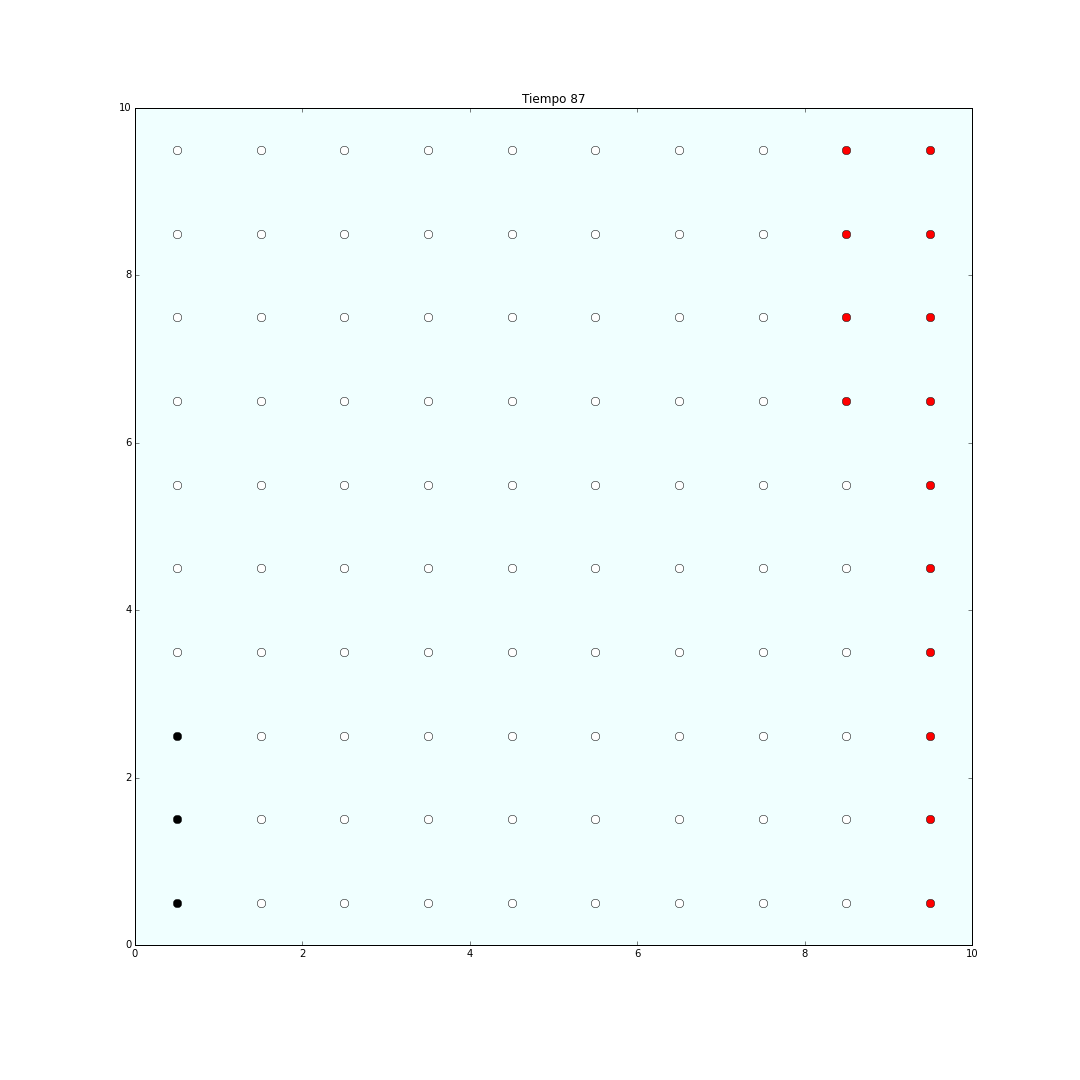
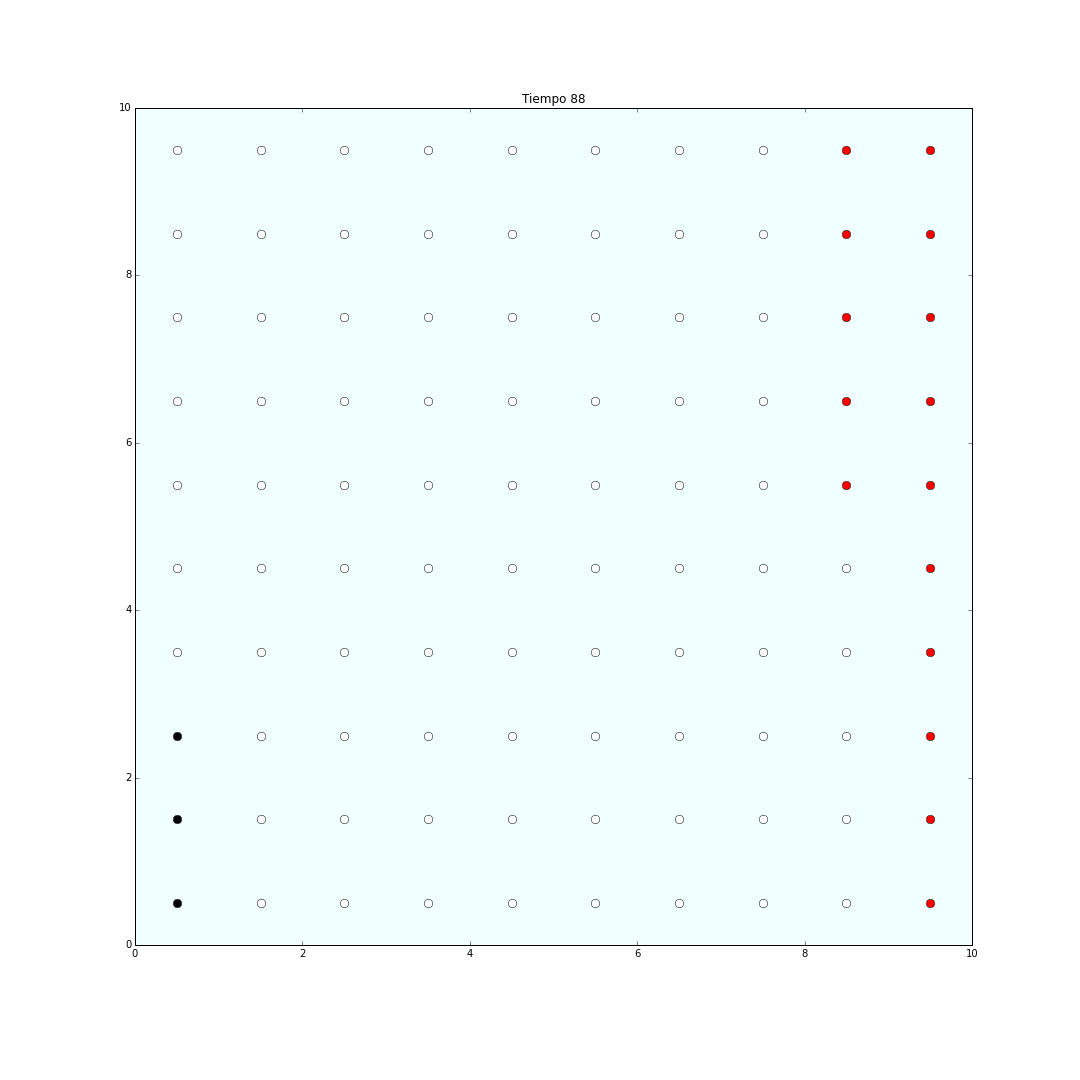
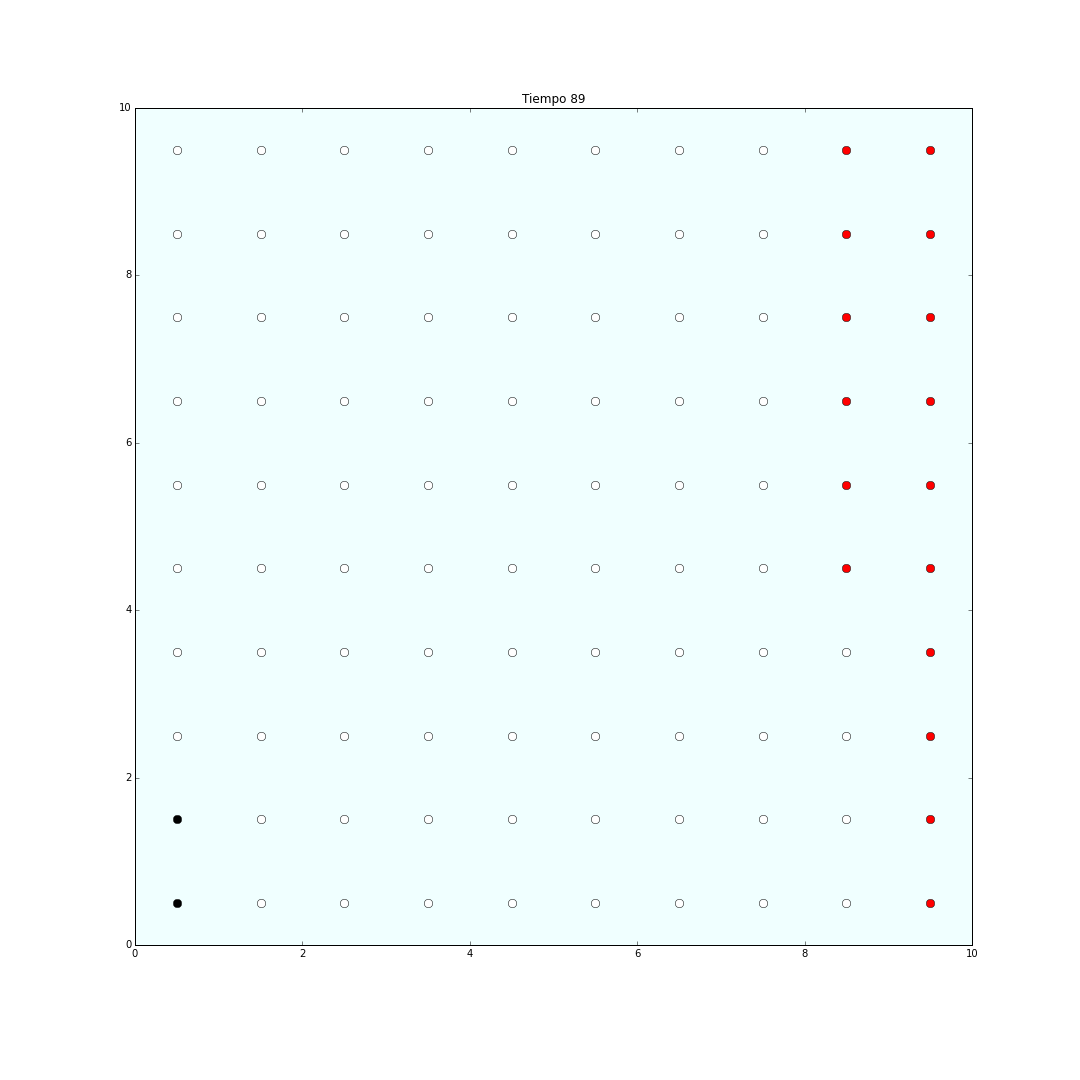
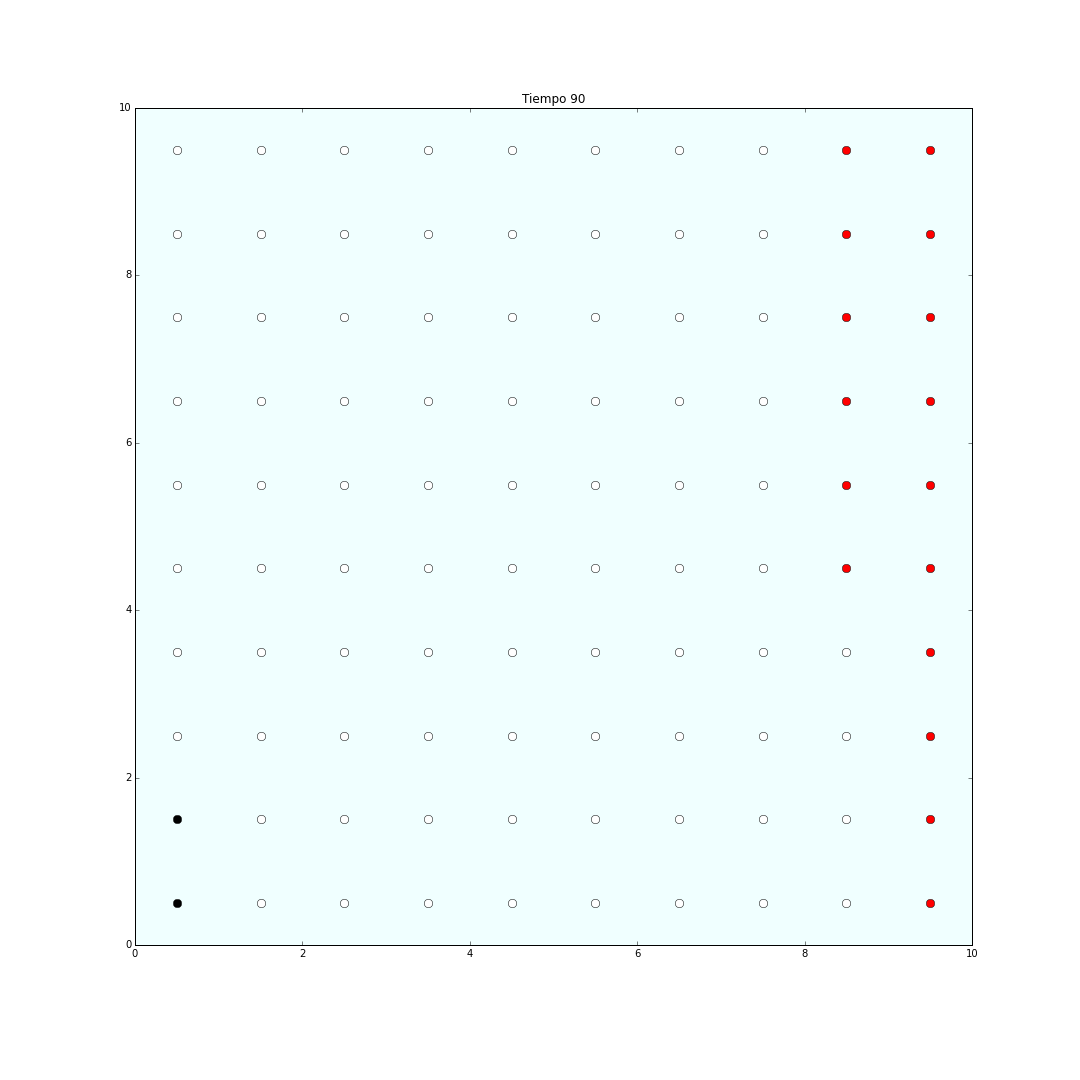
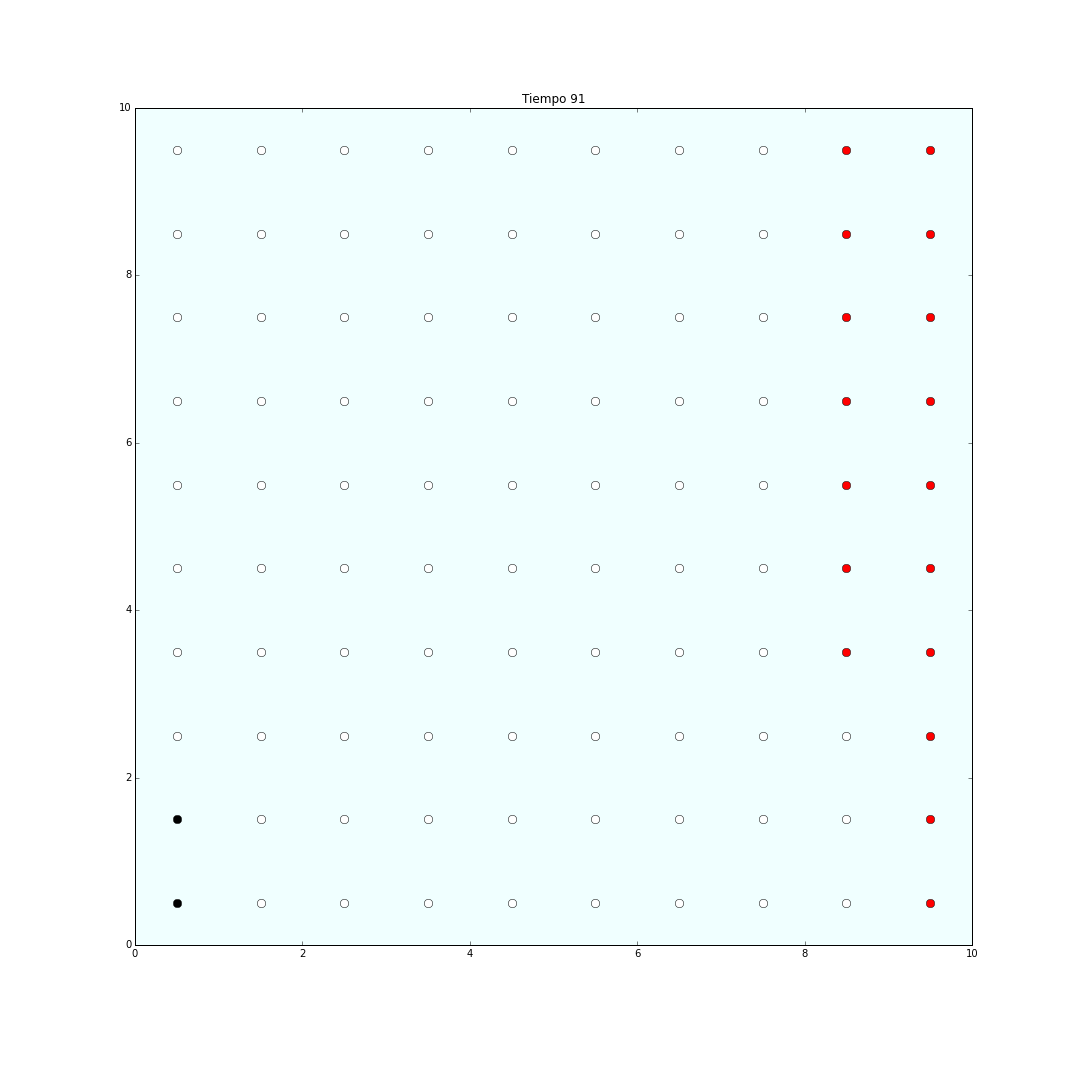
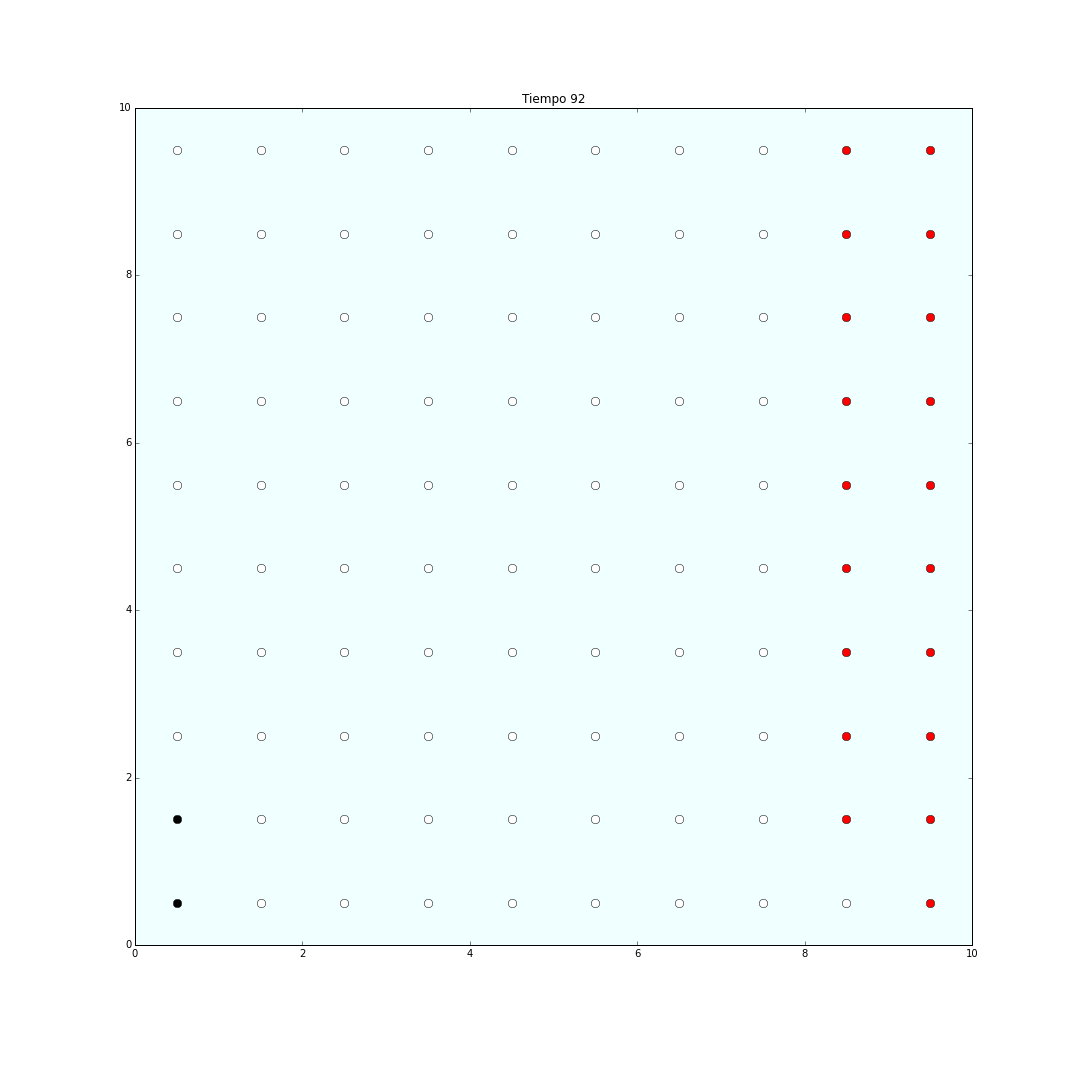
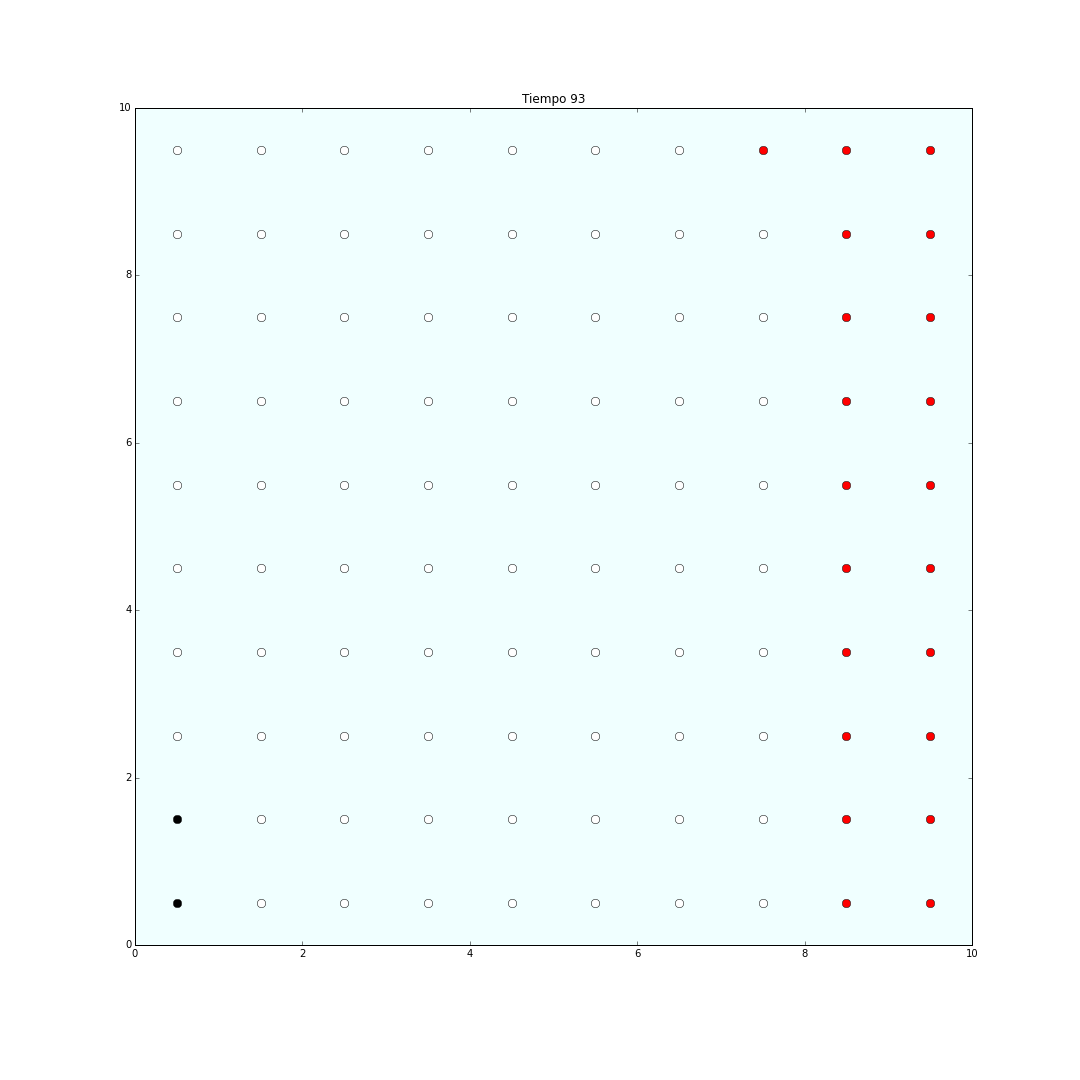
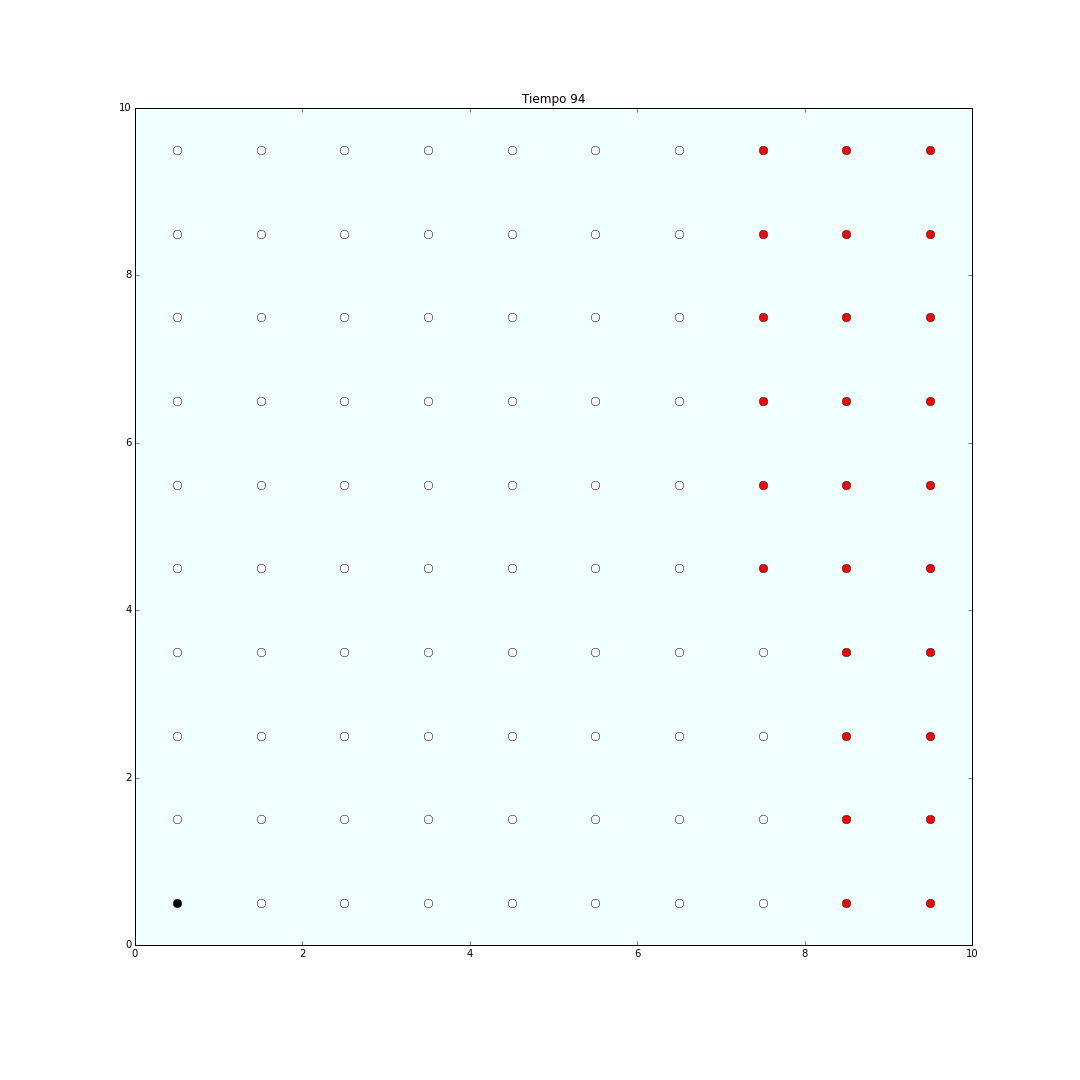
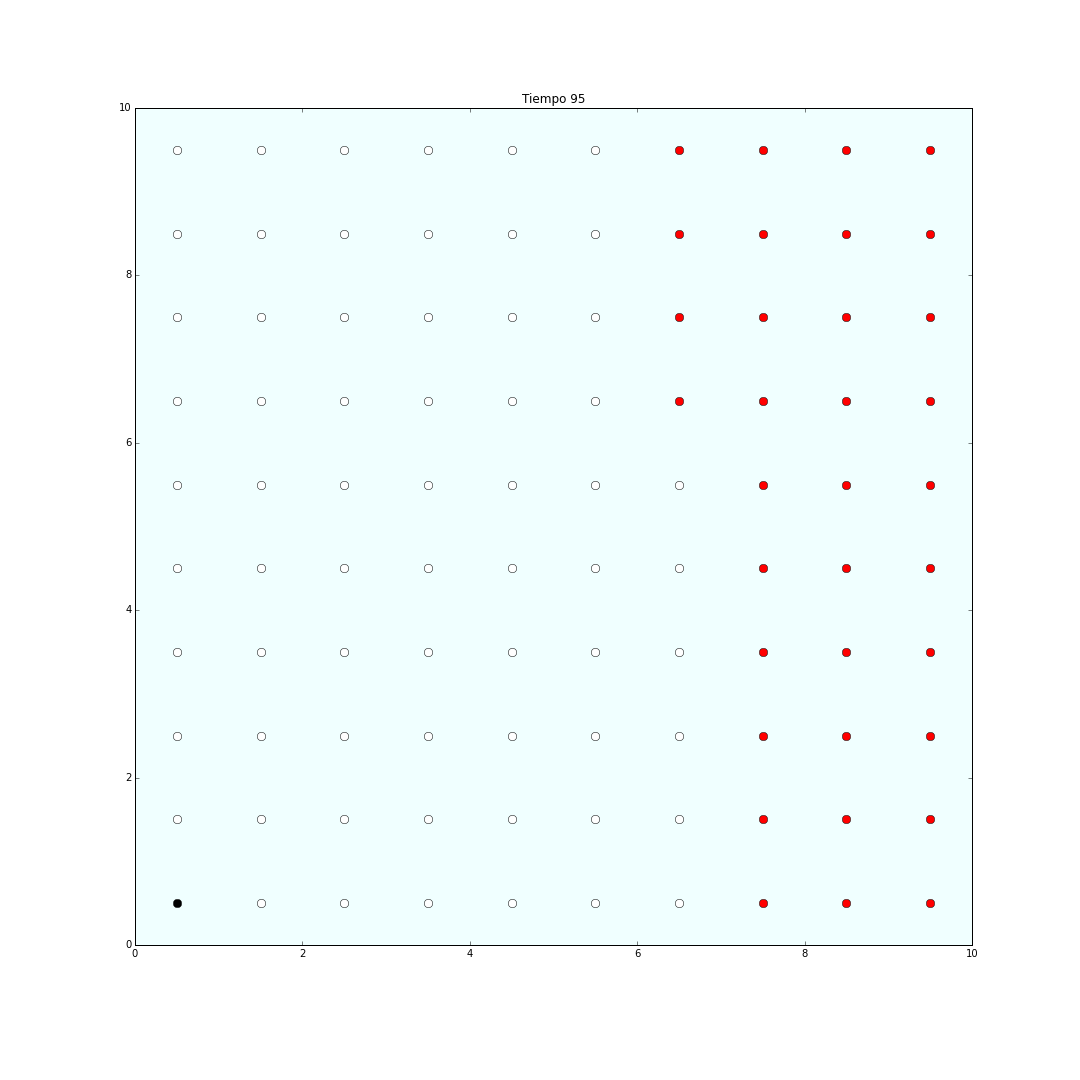
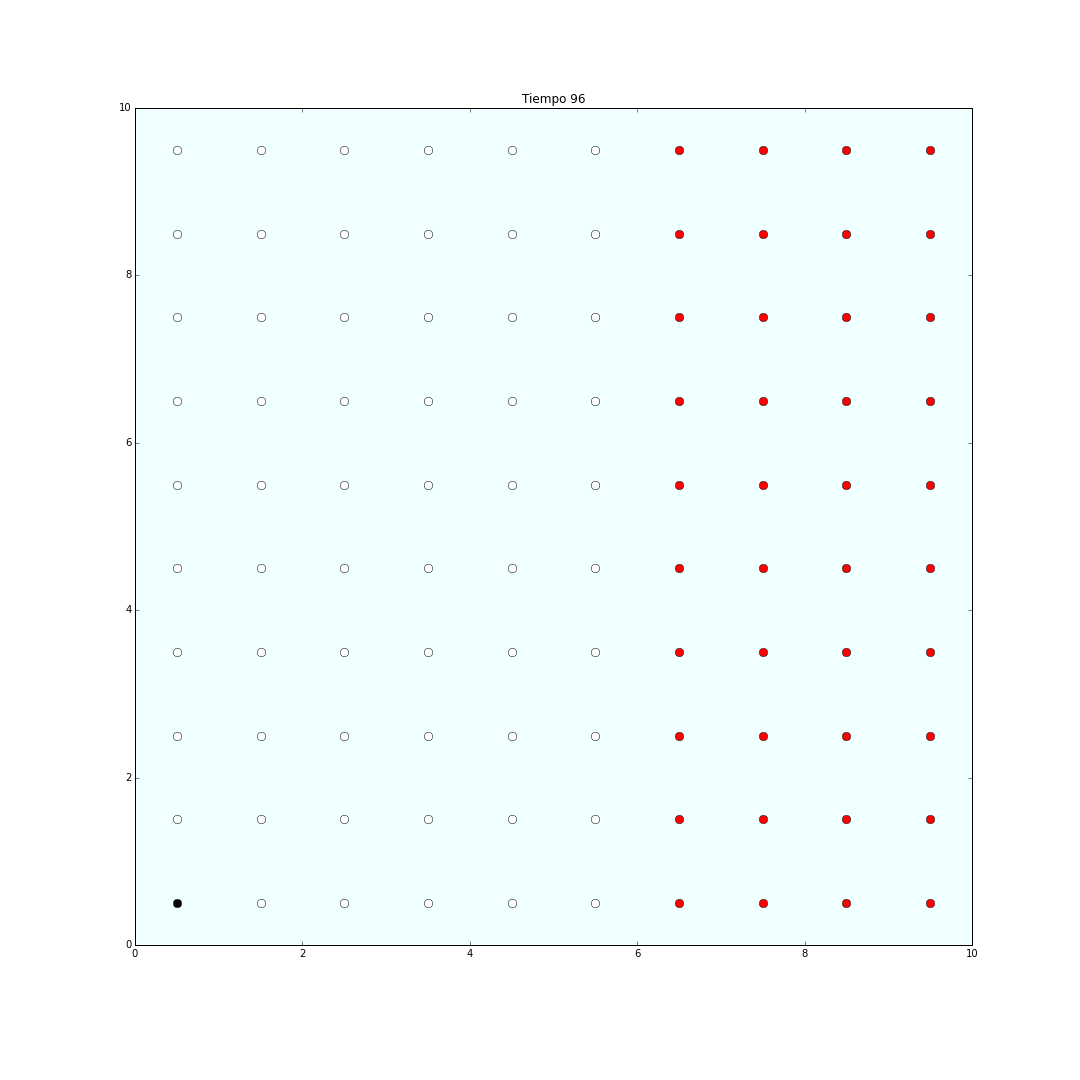
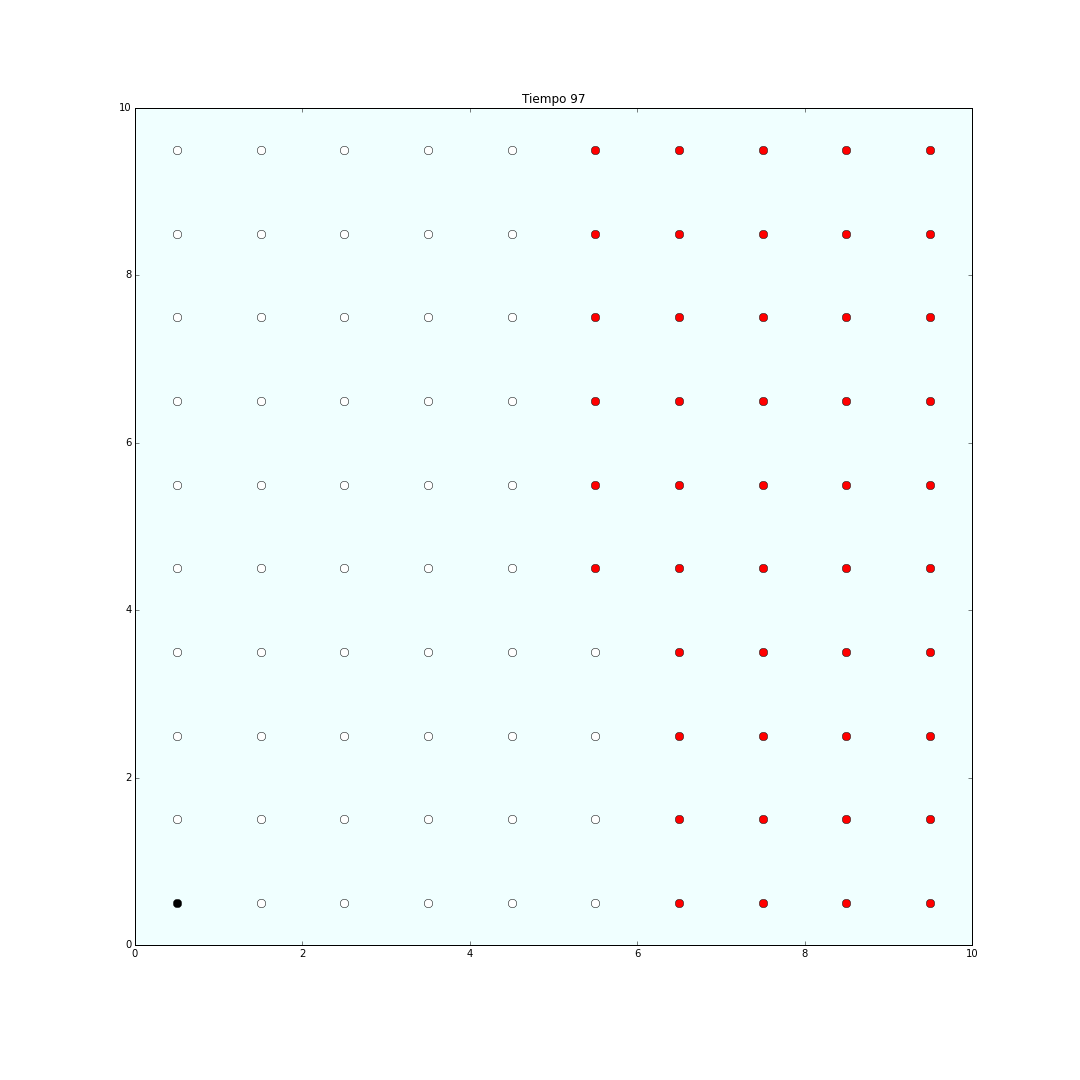
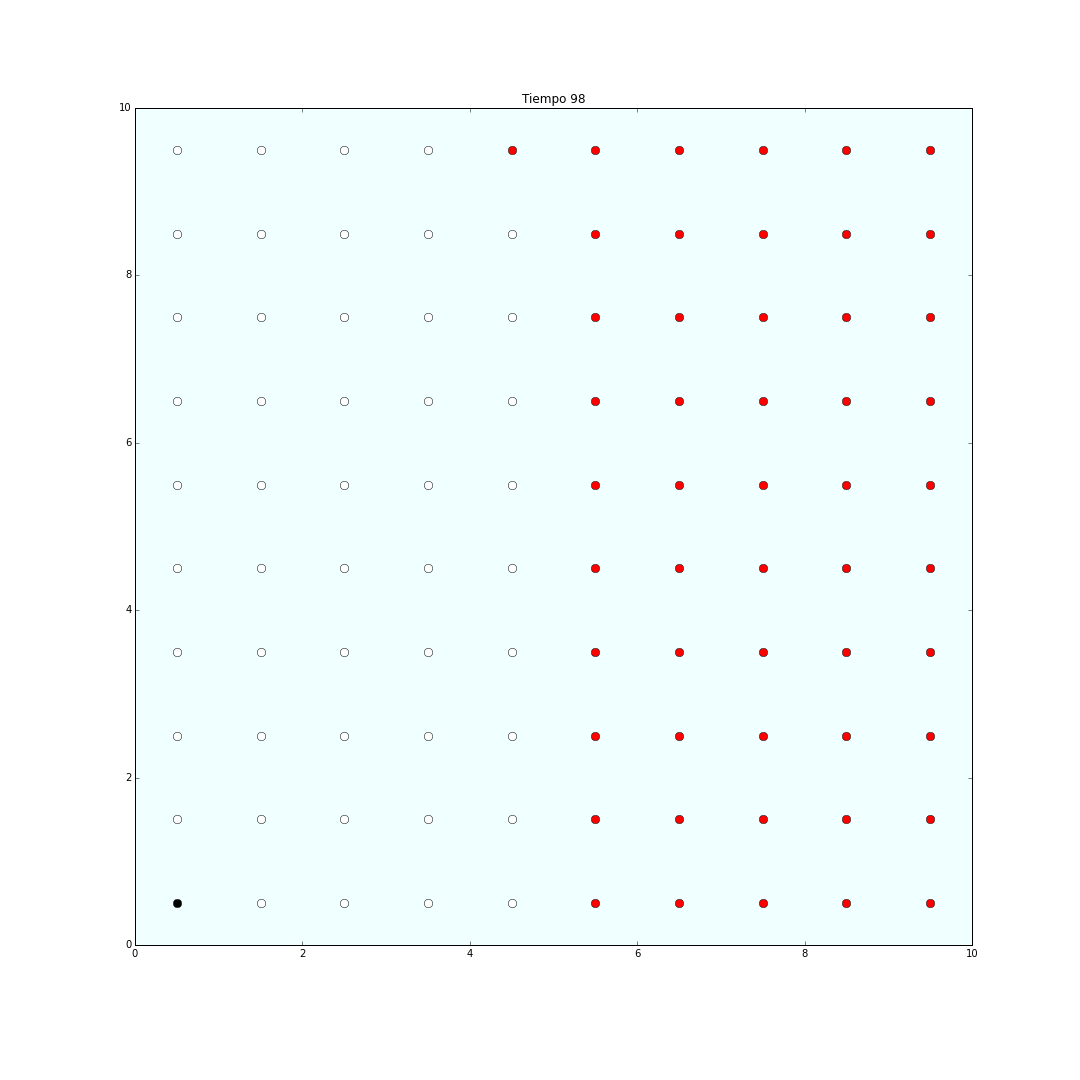
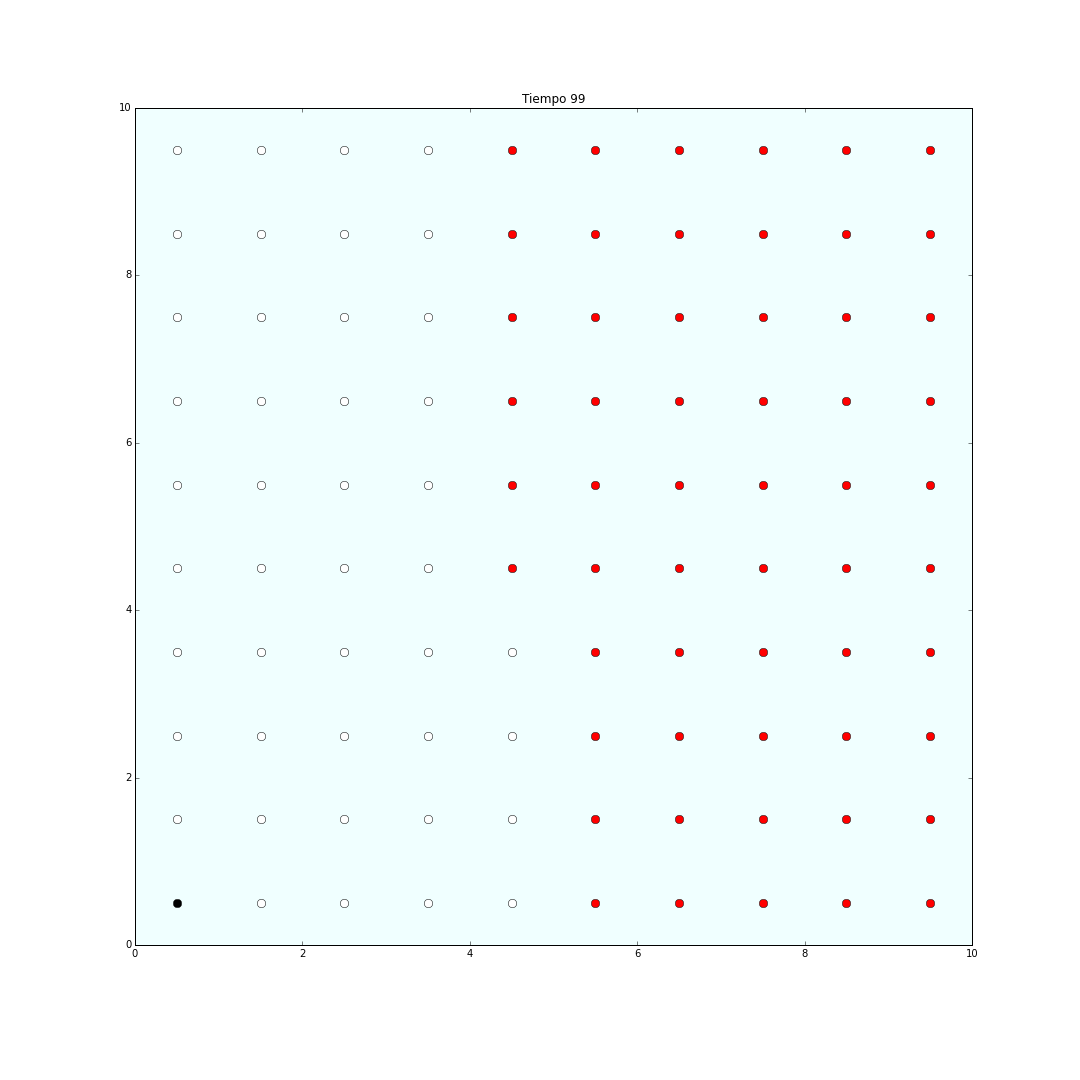

In [32]:
pos = obtener_posiciones_2(area_negra,area_blanca,area_fertil,0)#Creo los agentes con las posiciones iniciales
agentes = [Agente(tipo=0,locacion = pos[0][i]) for i in range(len(pos[0]))]
agentes.extend(Agente(tipo=1,locacion= pos[1][i]) for i in range(len(pos[1])))
agentes.extend(Agente(tipo=2,locacion= pos[2][i]) for i in range(len(pos[2])))
sin_chiste = Mundo2(agentes = agentes,ar_negra = area_negra,ar_blanca=area_blanca,ar_fertil=area_fertil, steps = 100,metodo = 1)
sin_chiste.simular()

#Simulación del mundo en forma aleatoria

Aleatorizamos la posición de cada elemento, buscando una representación más fiel a la realidad. No sabemos dónde se encuentre cada elemento espacialmente


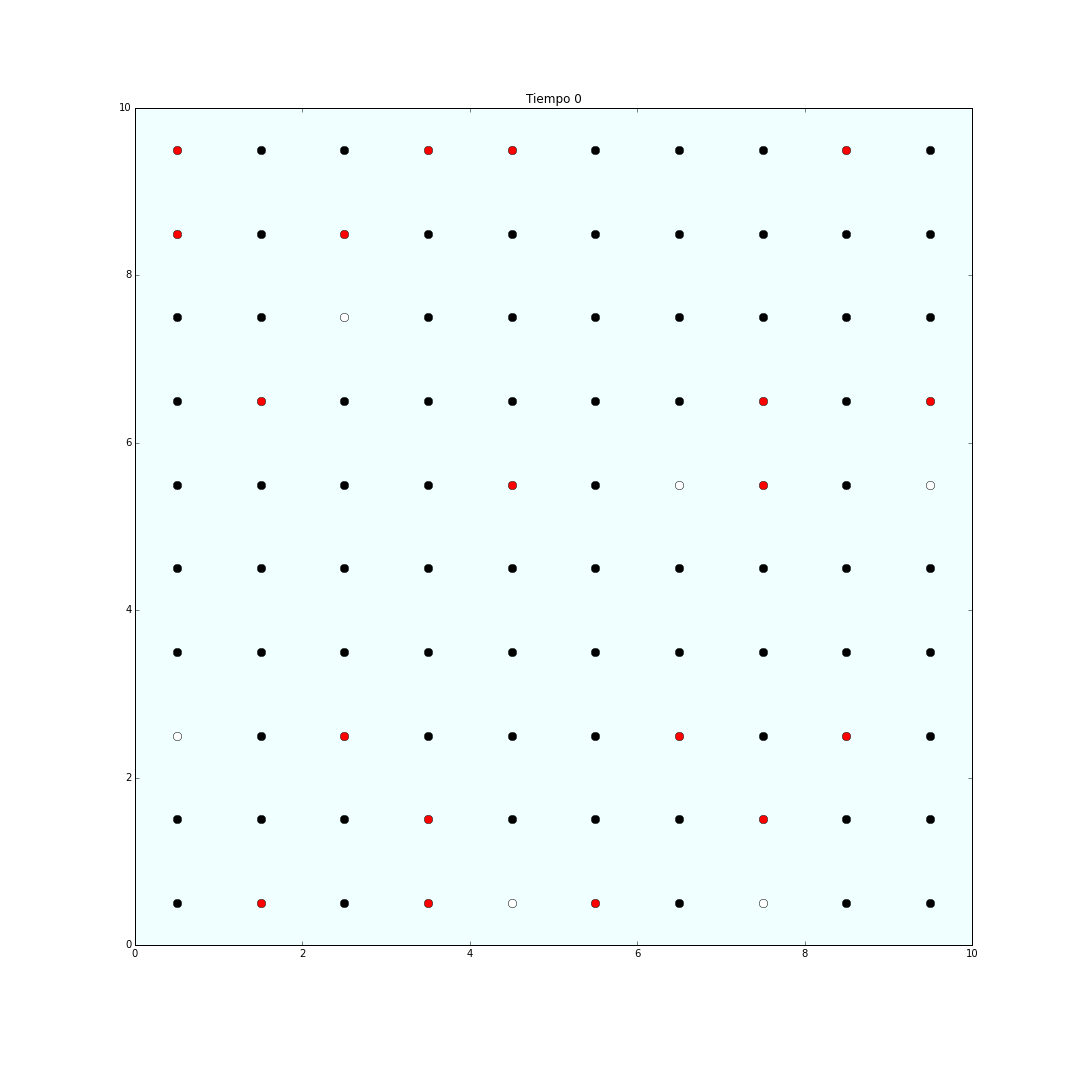
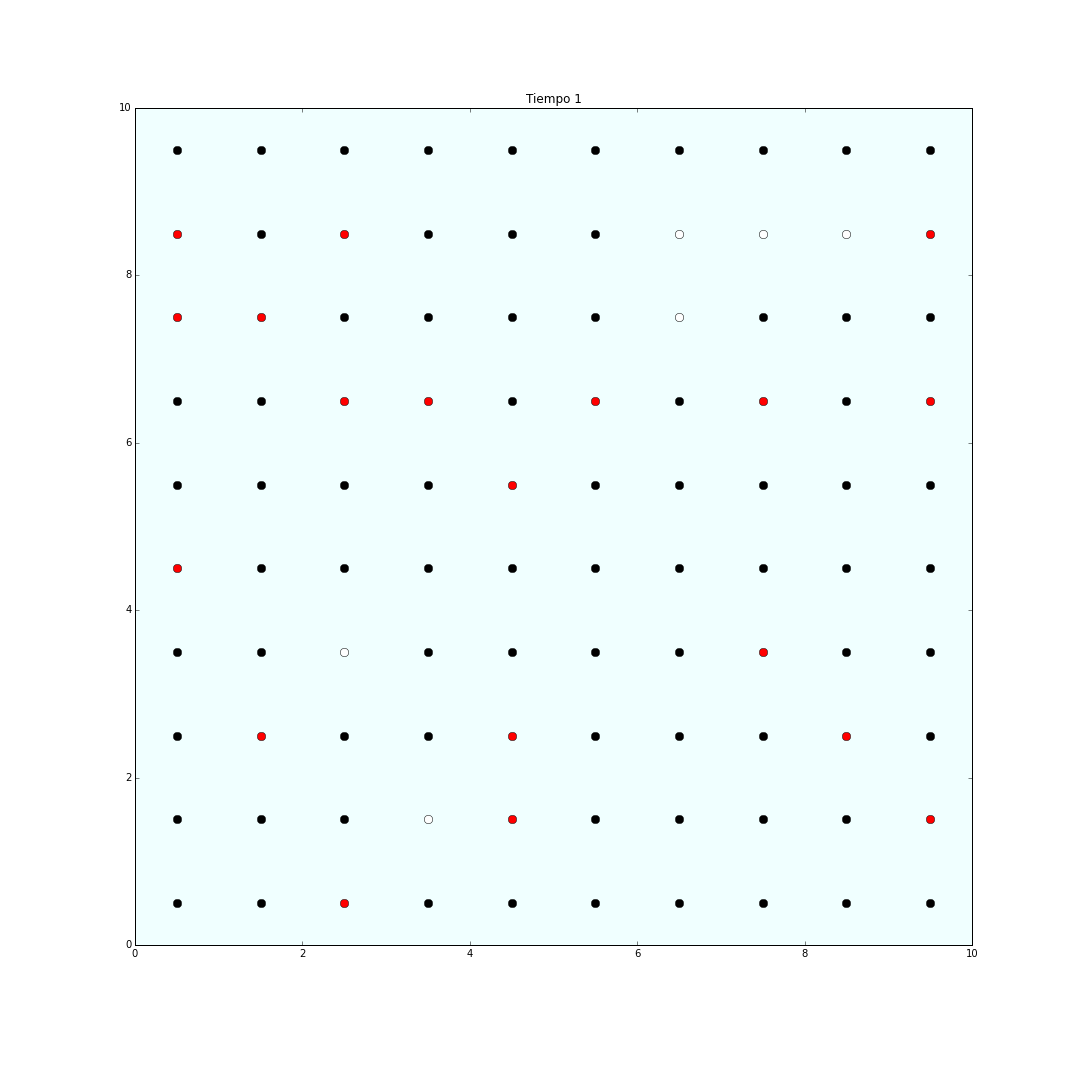
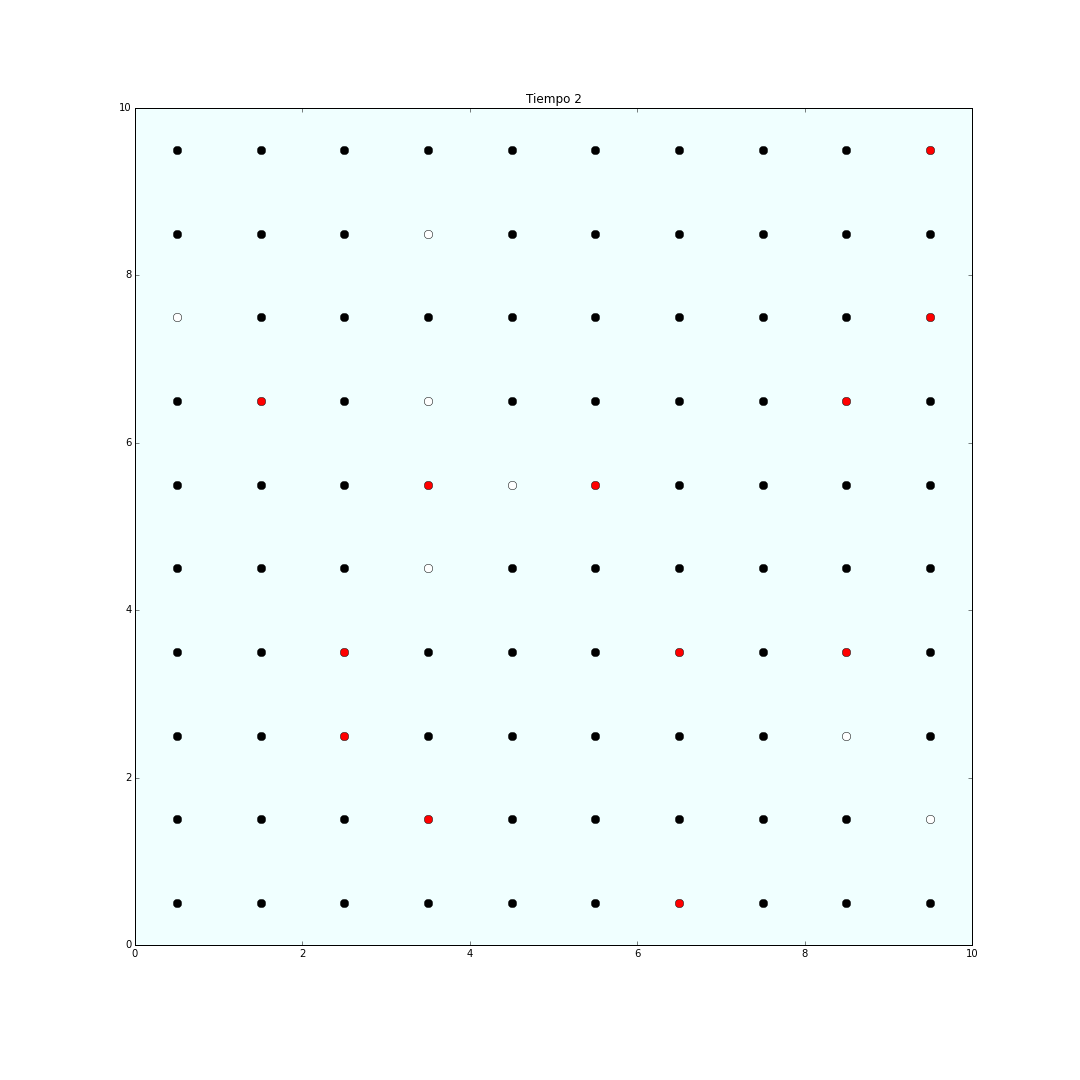
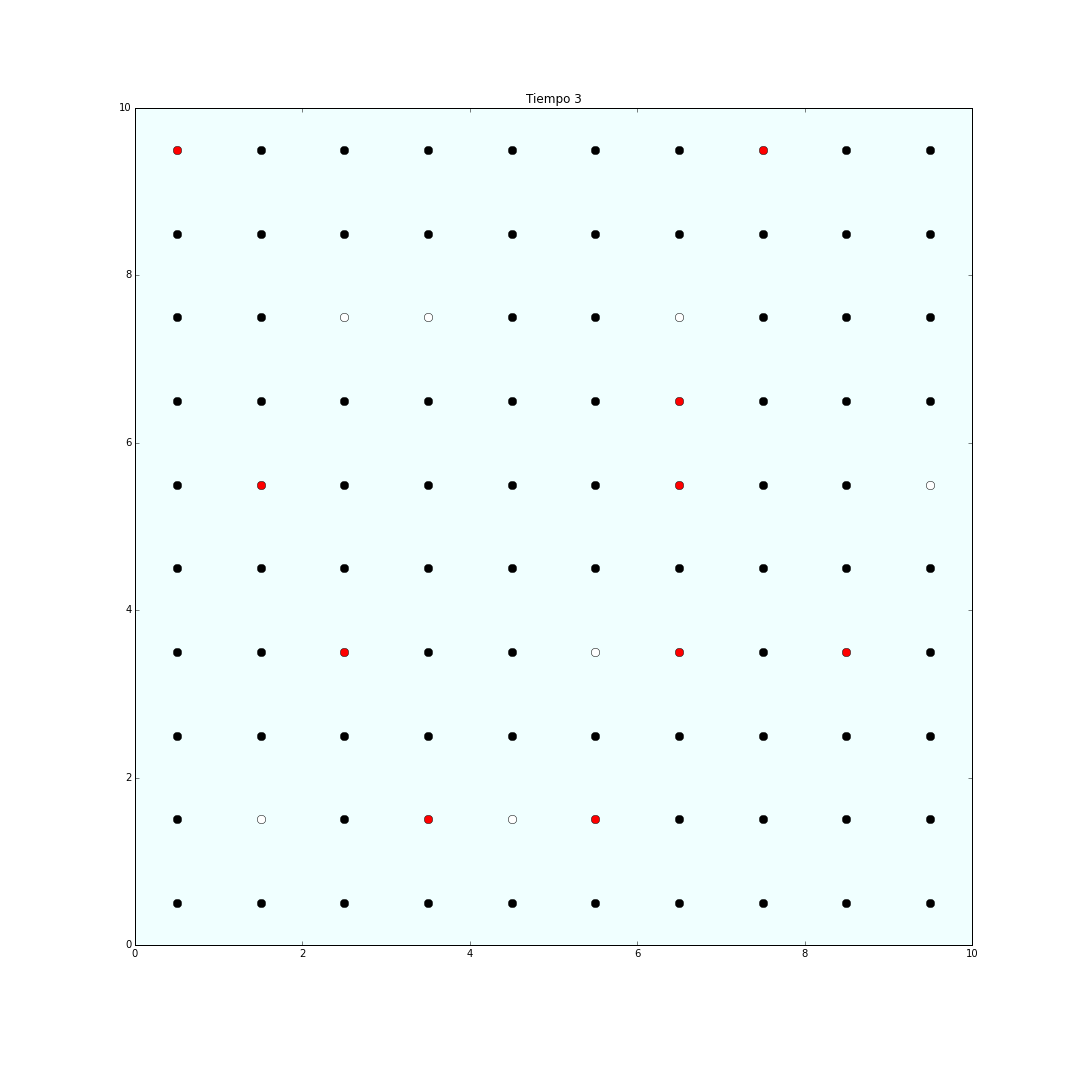
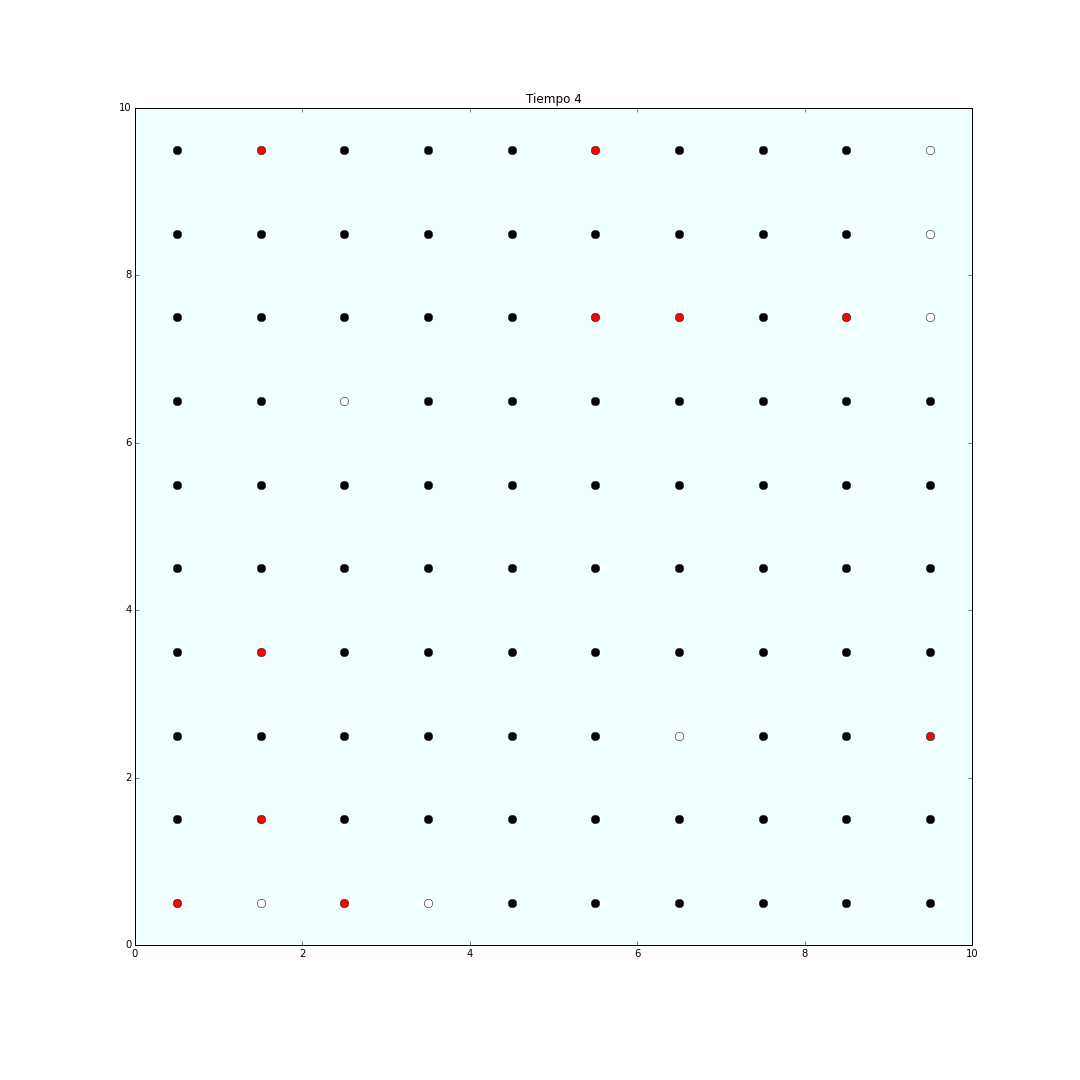
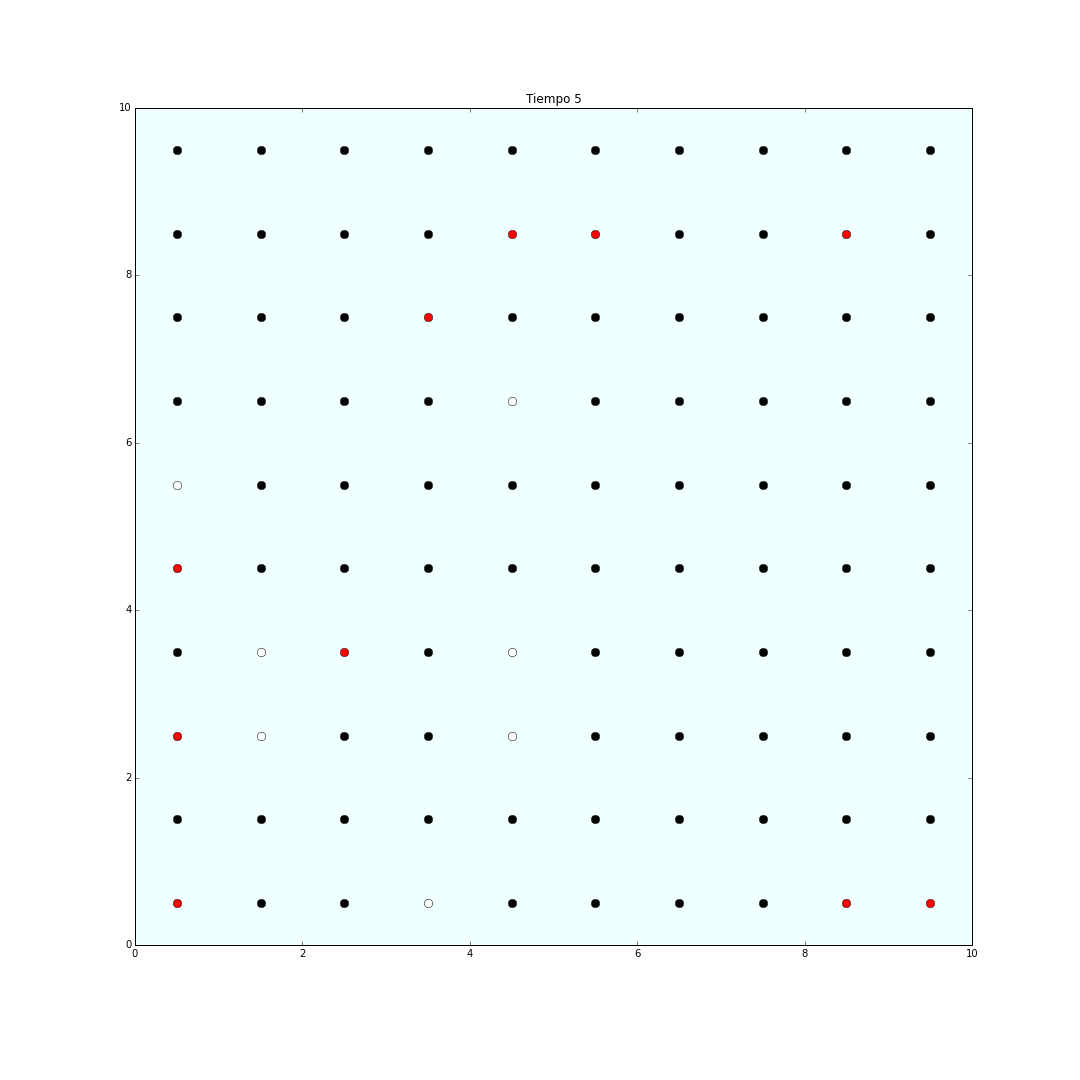
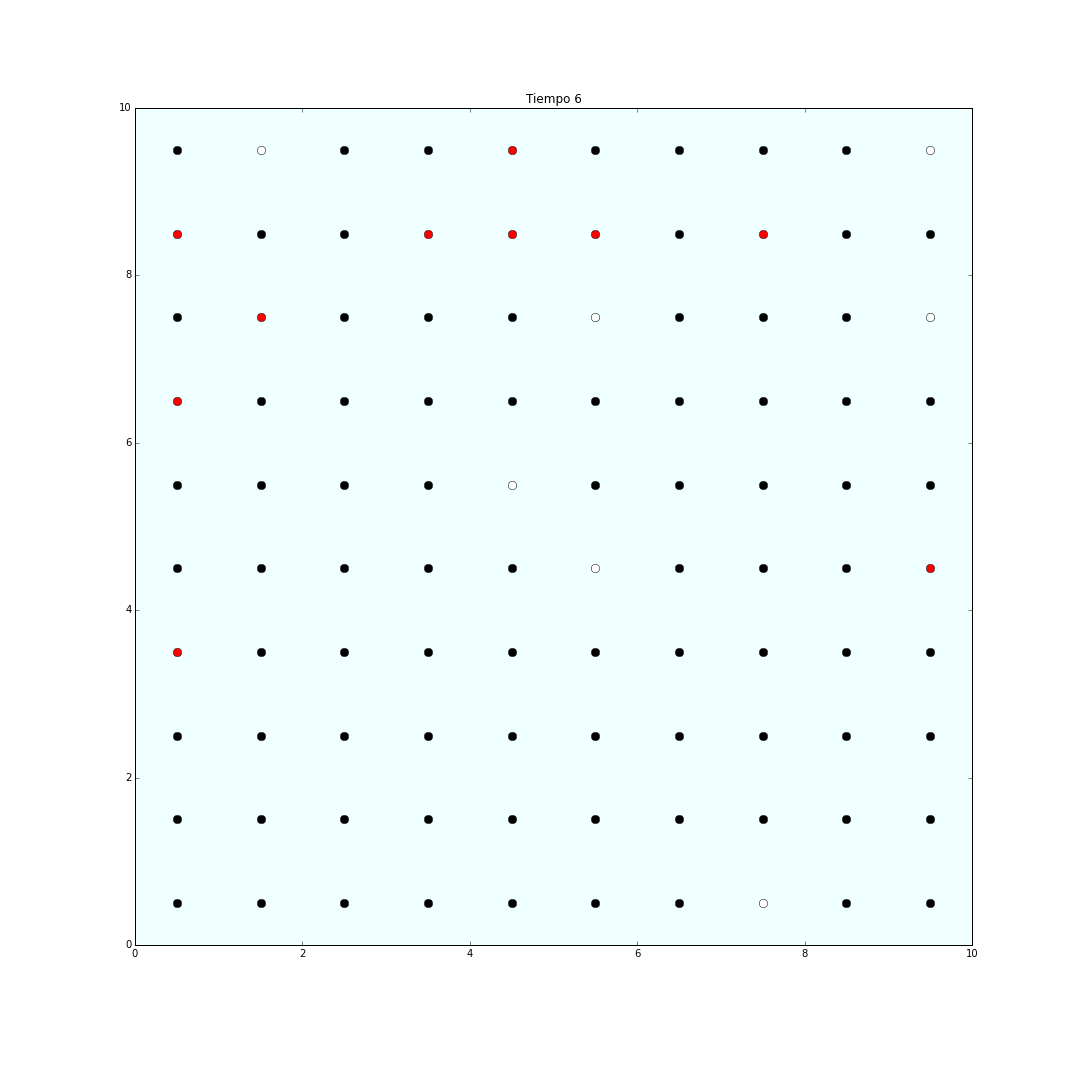
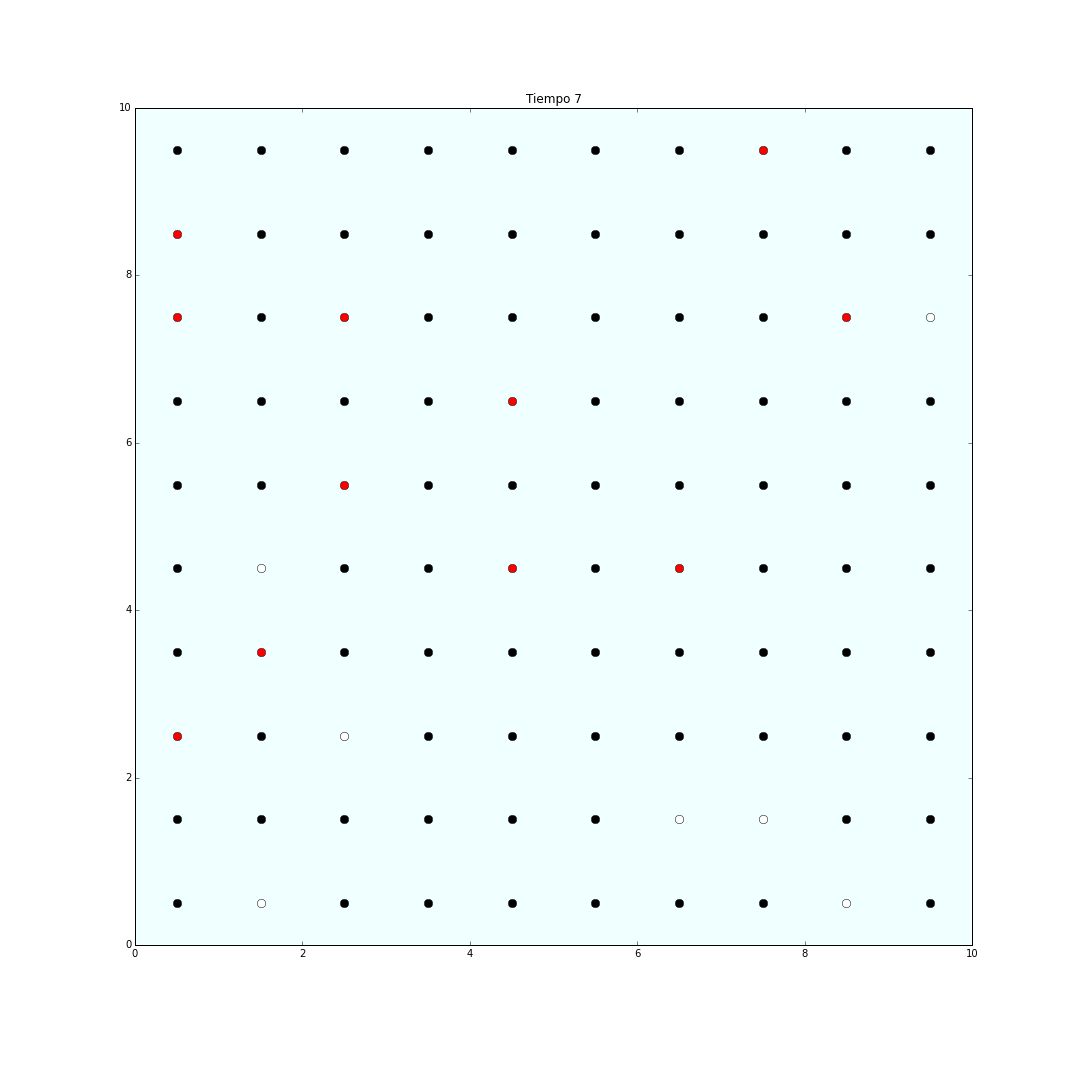
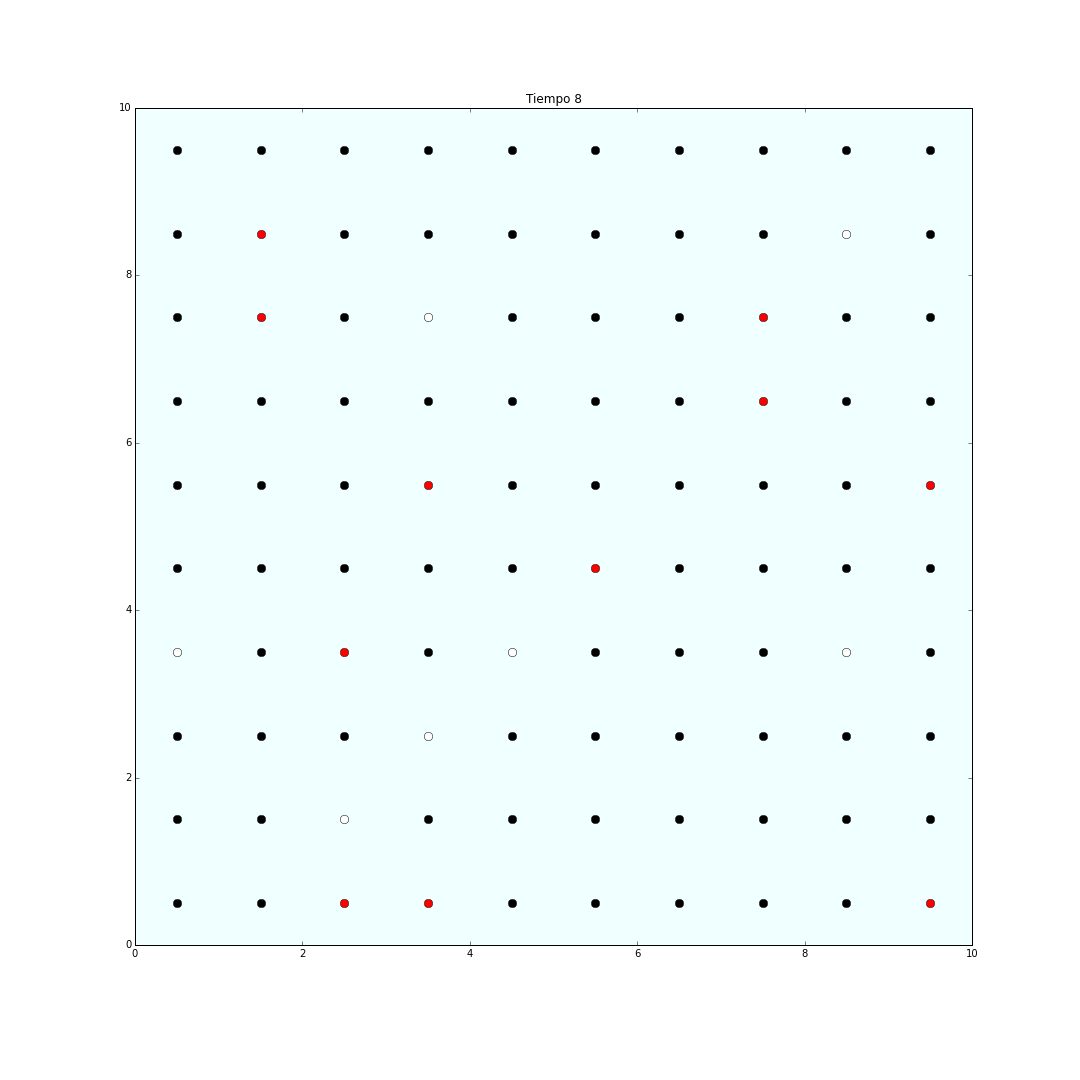
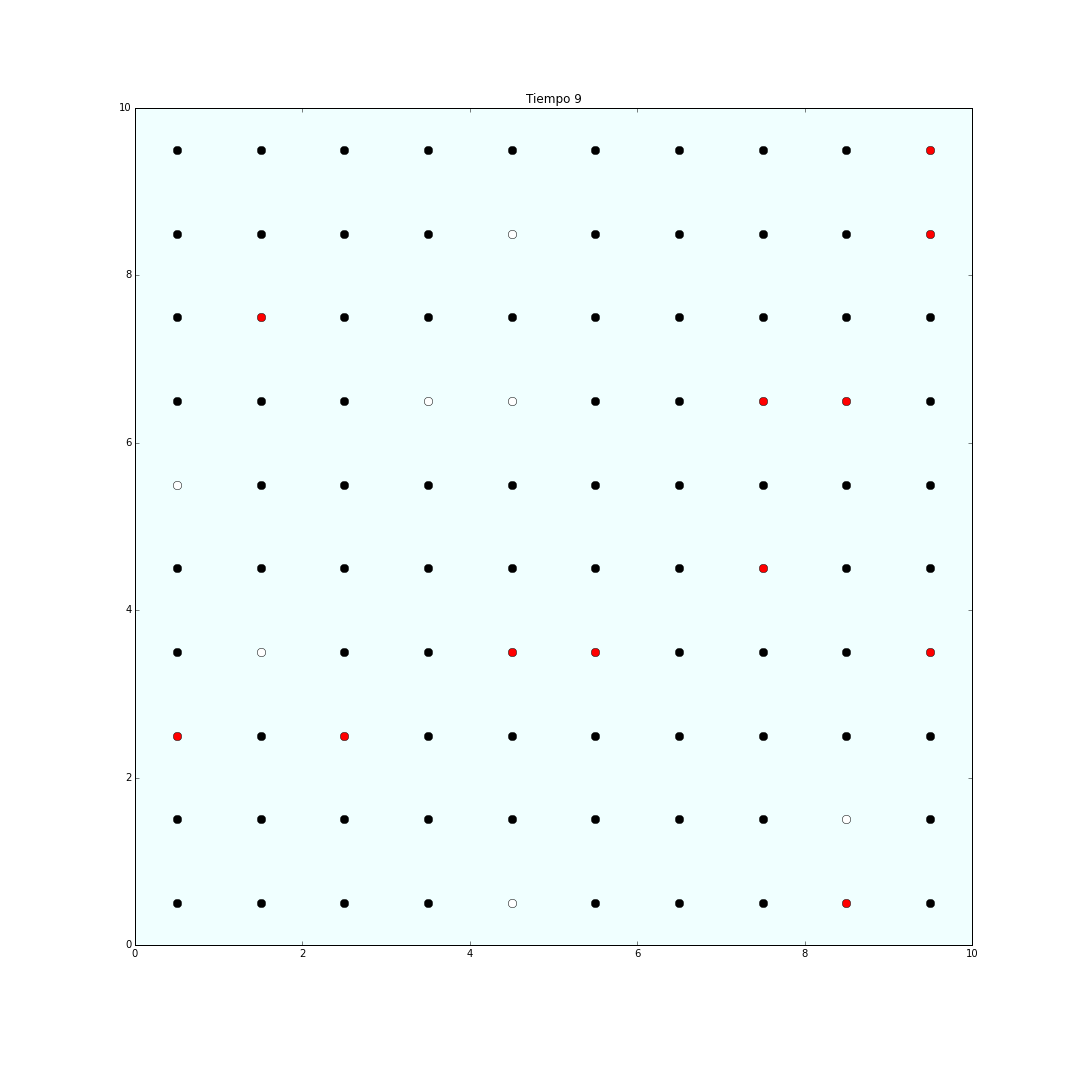
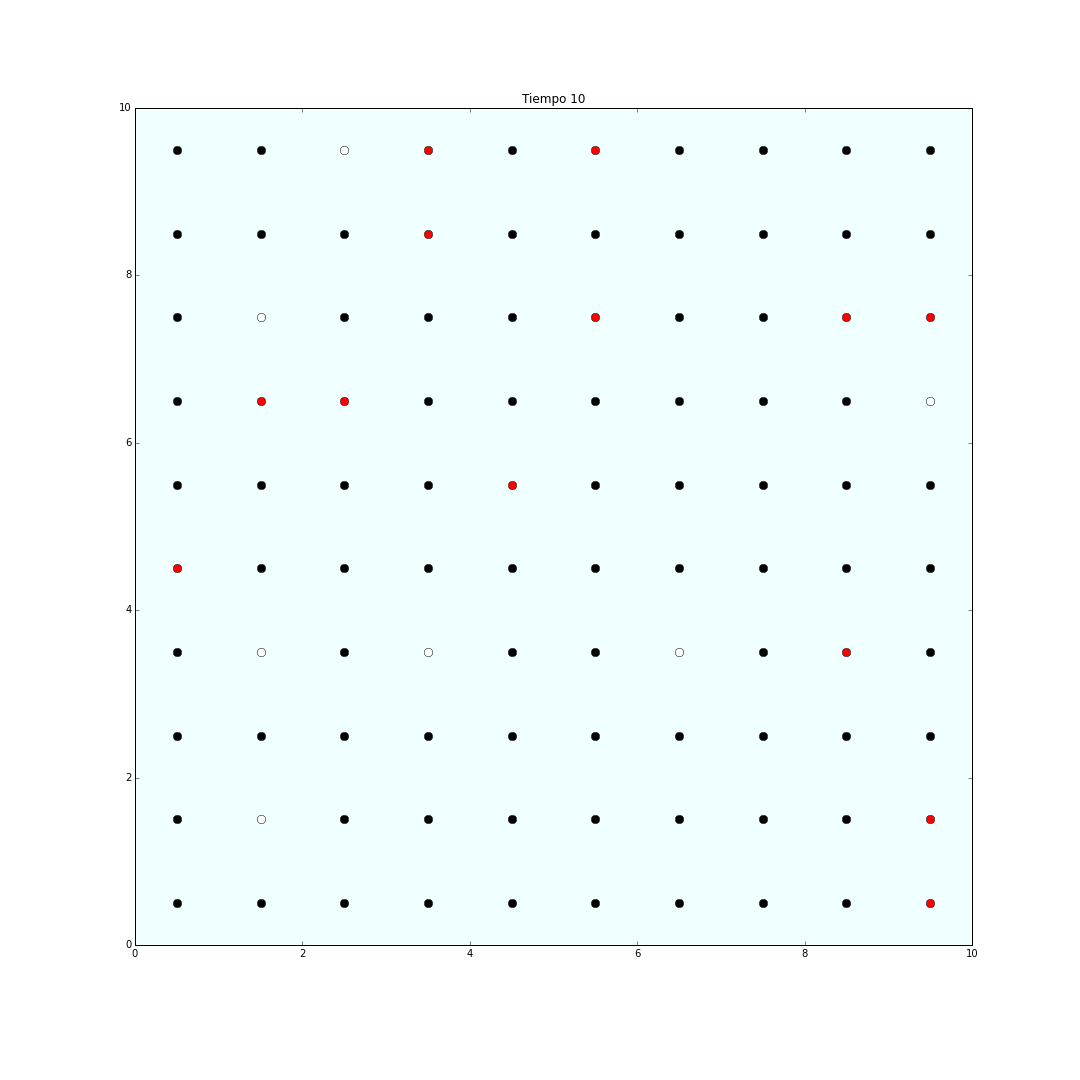
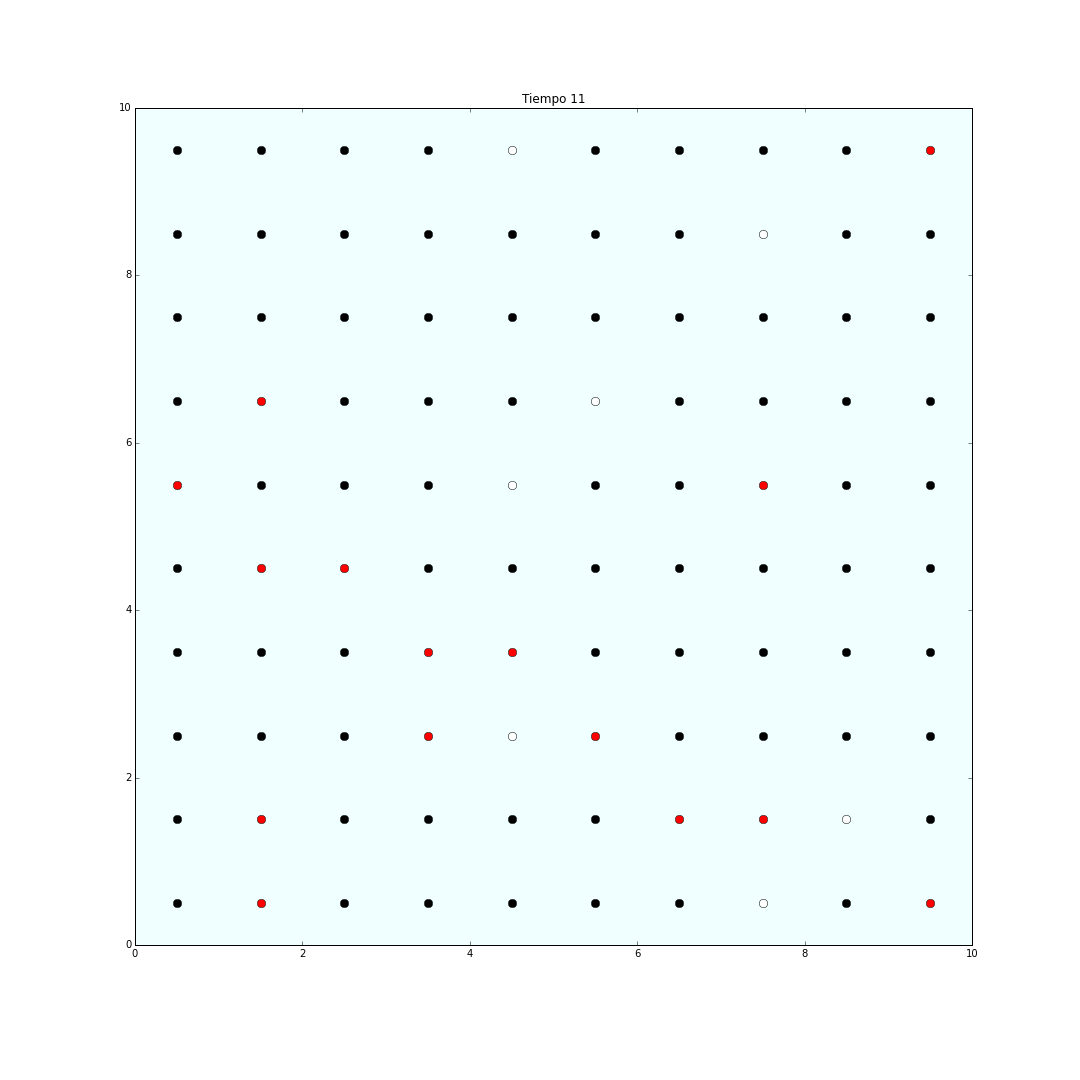
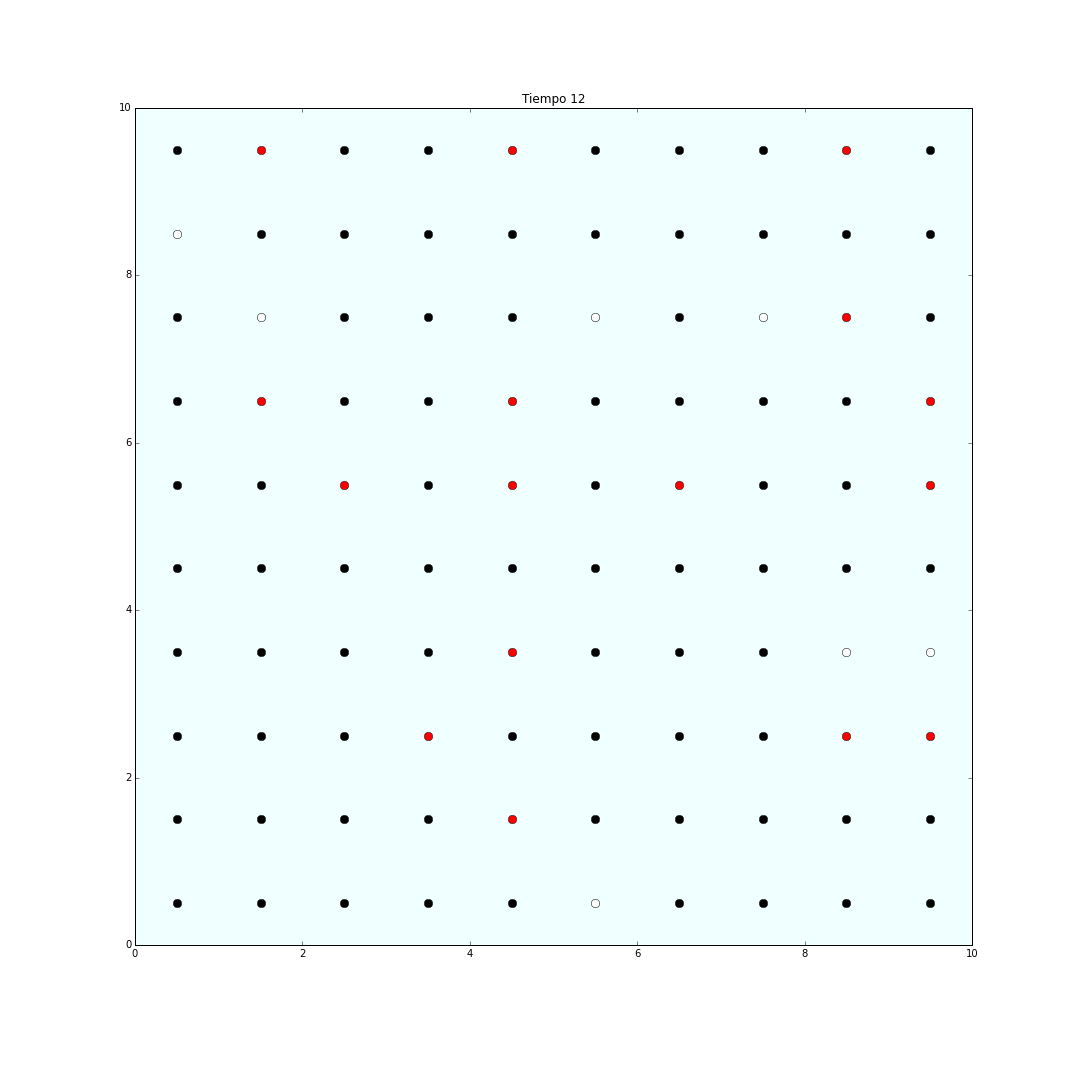
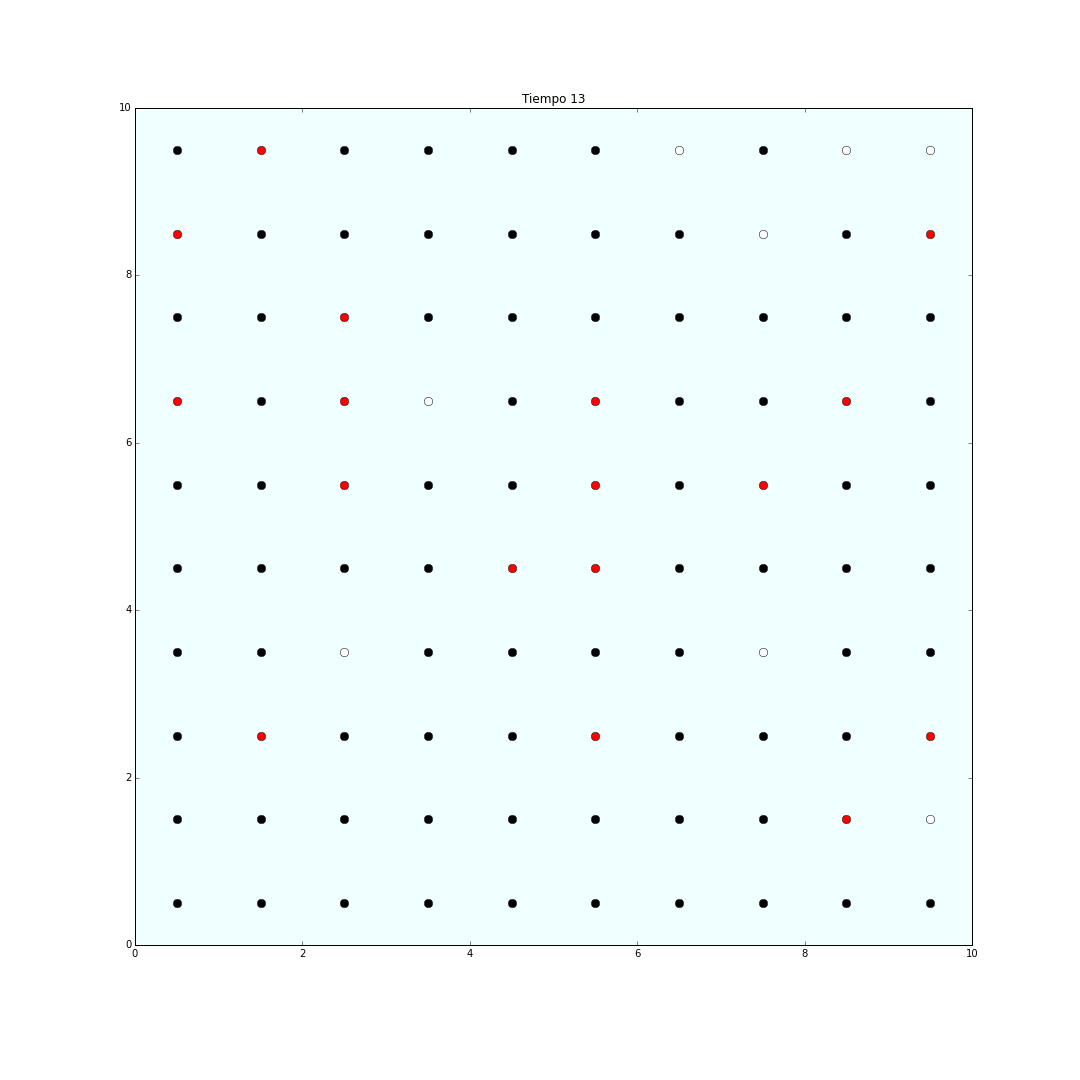
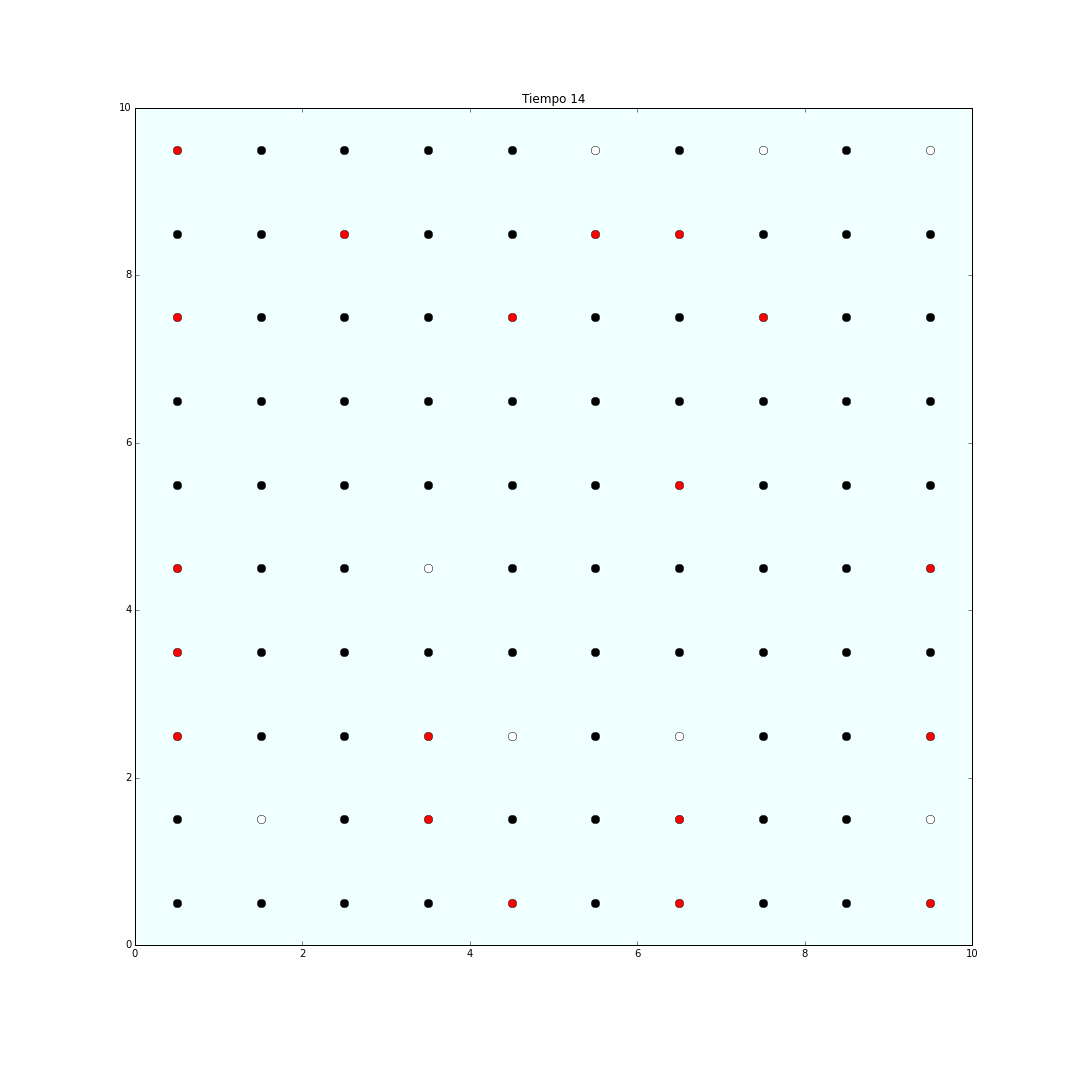
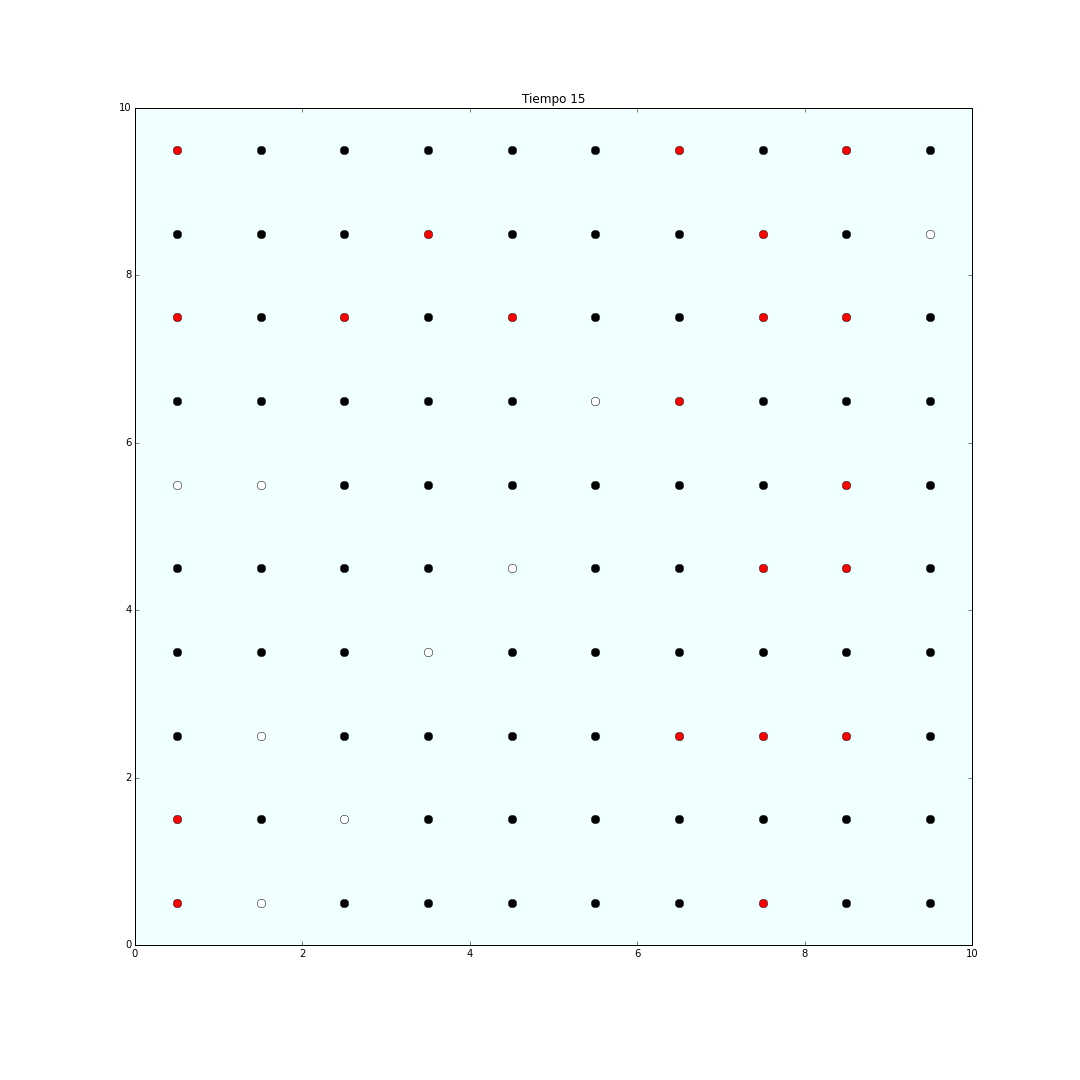
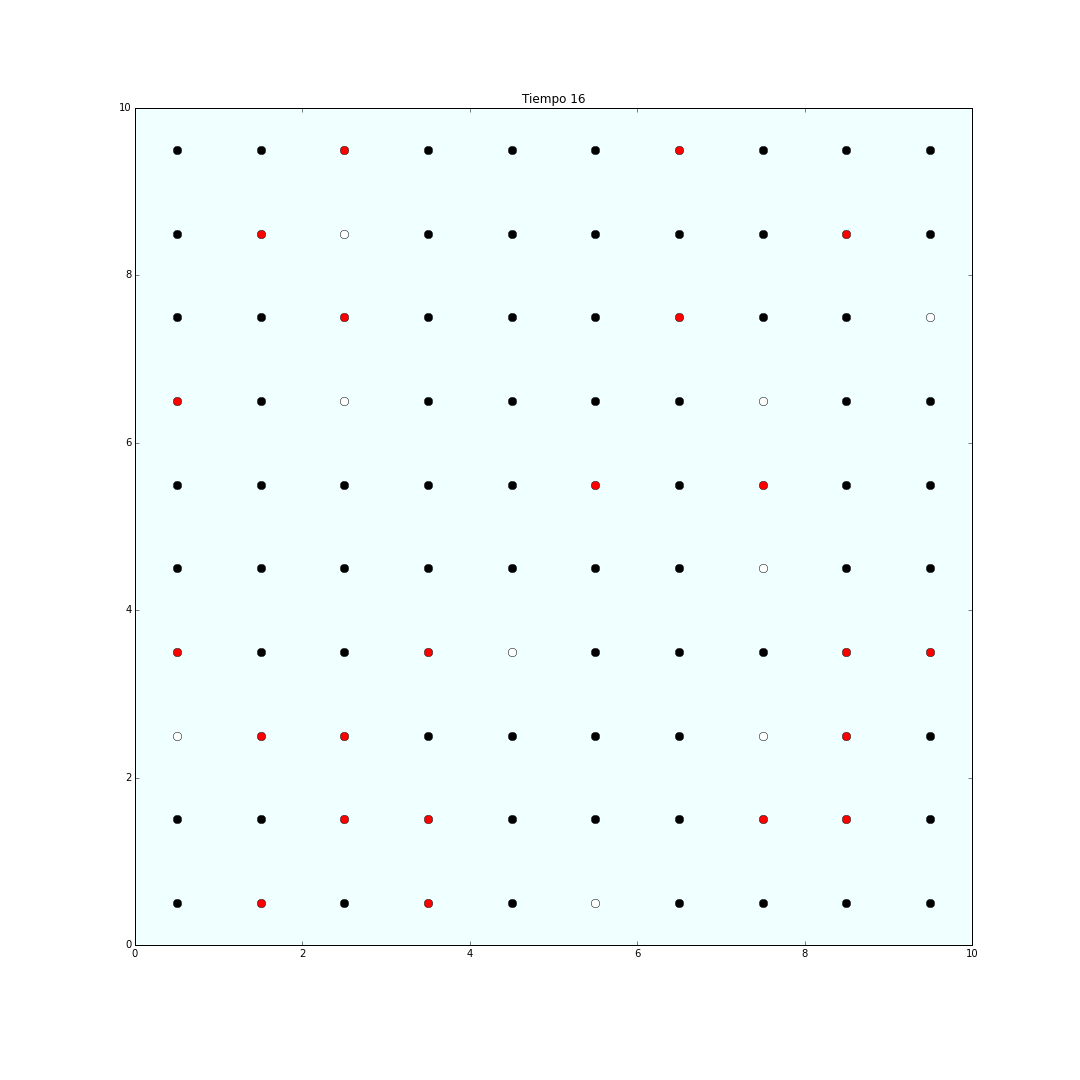
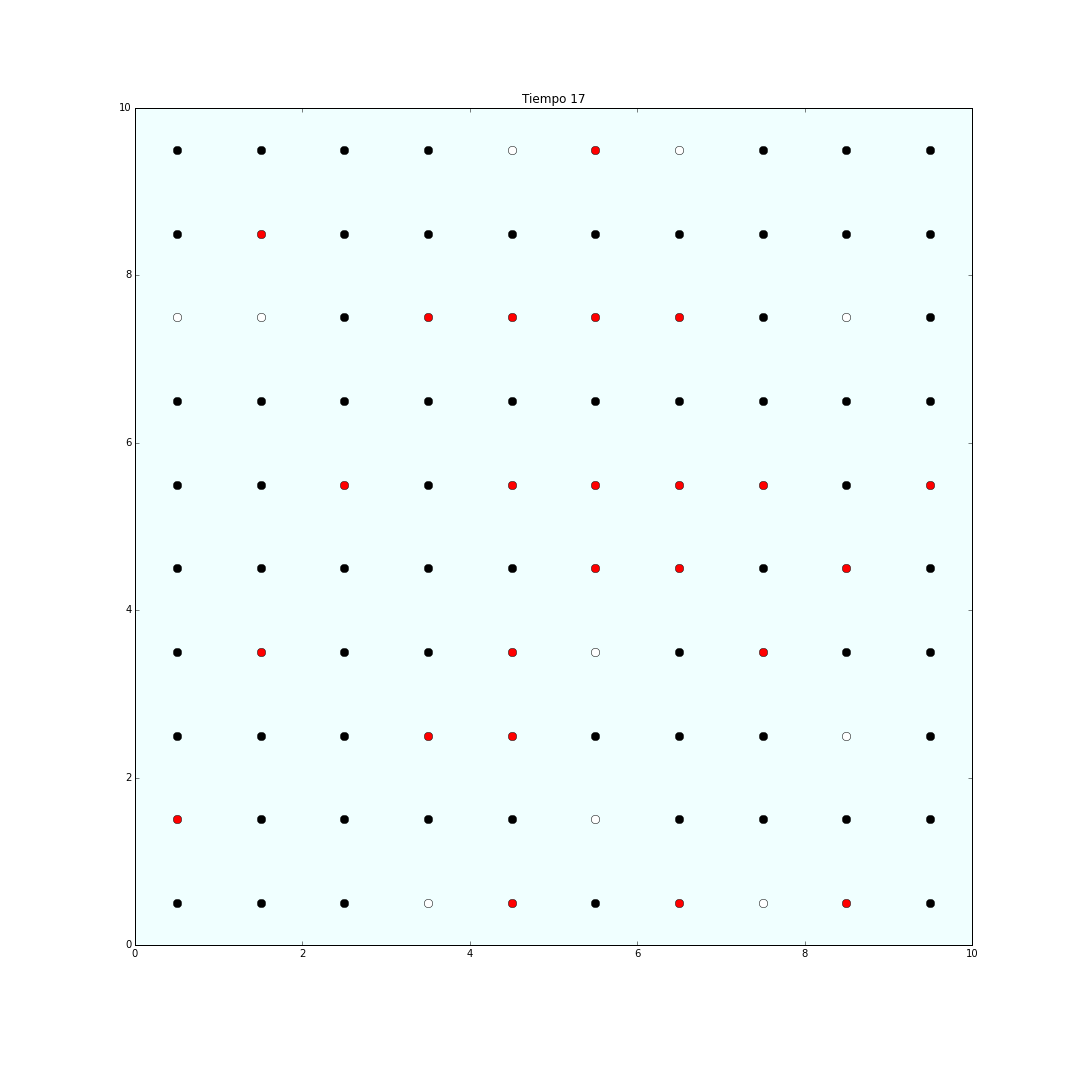
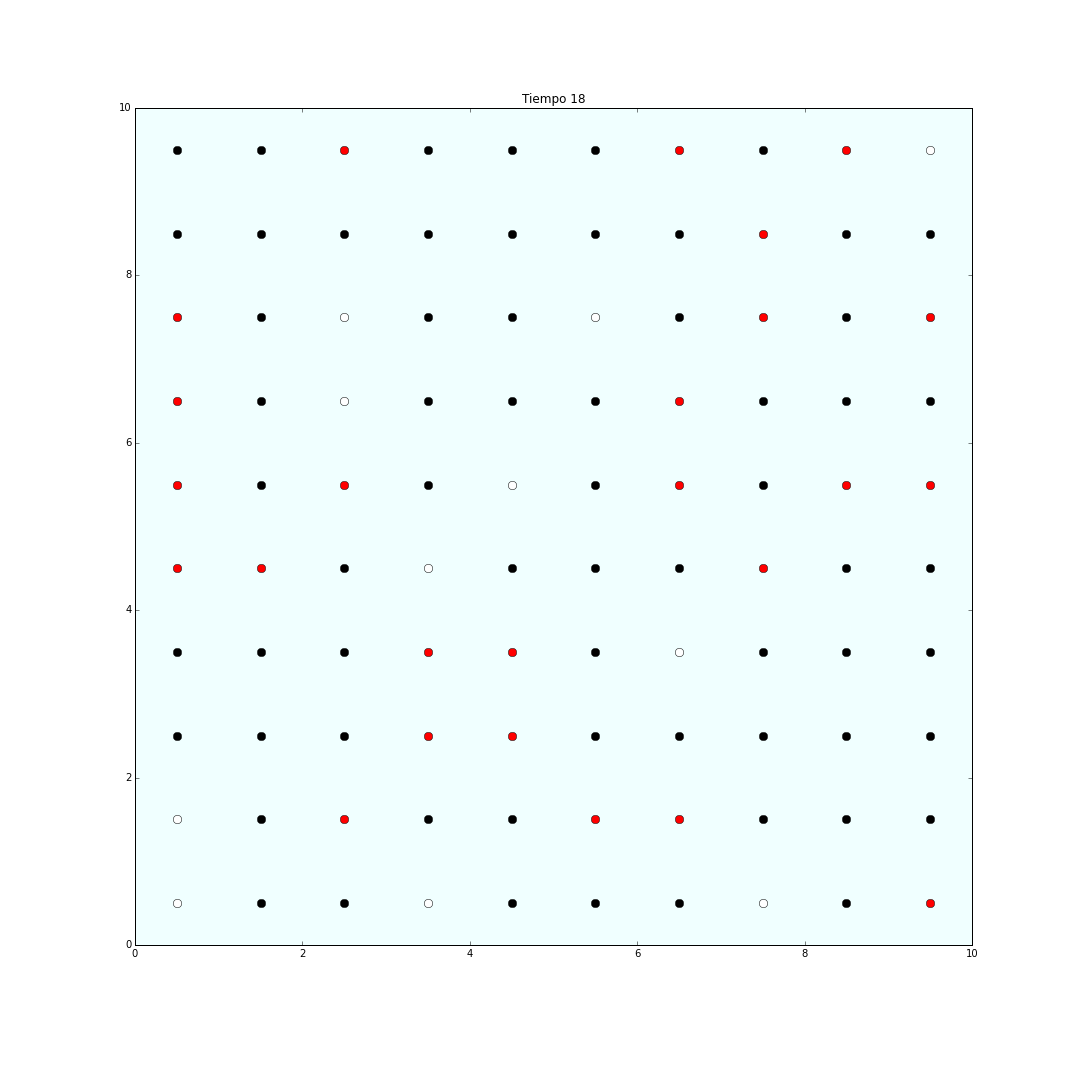
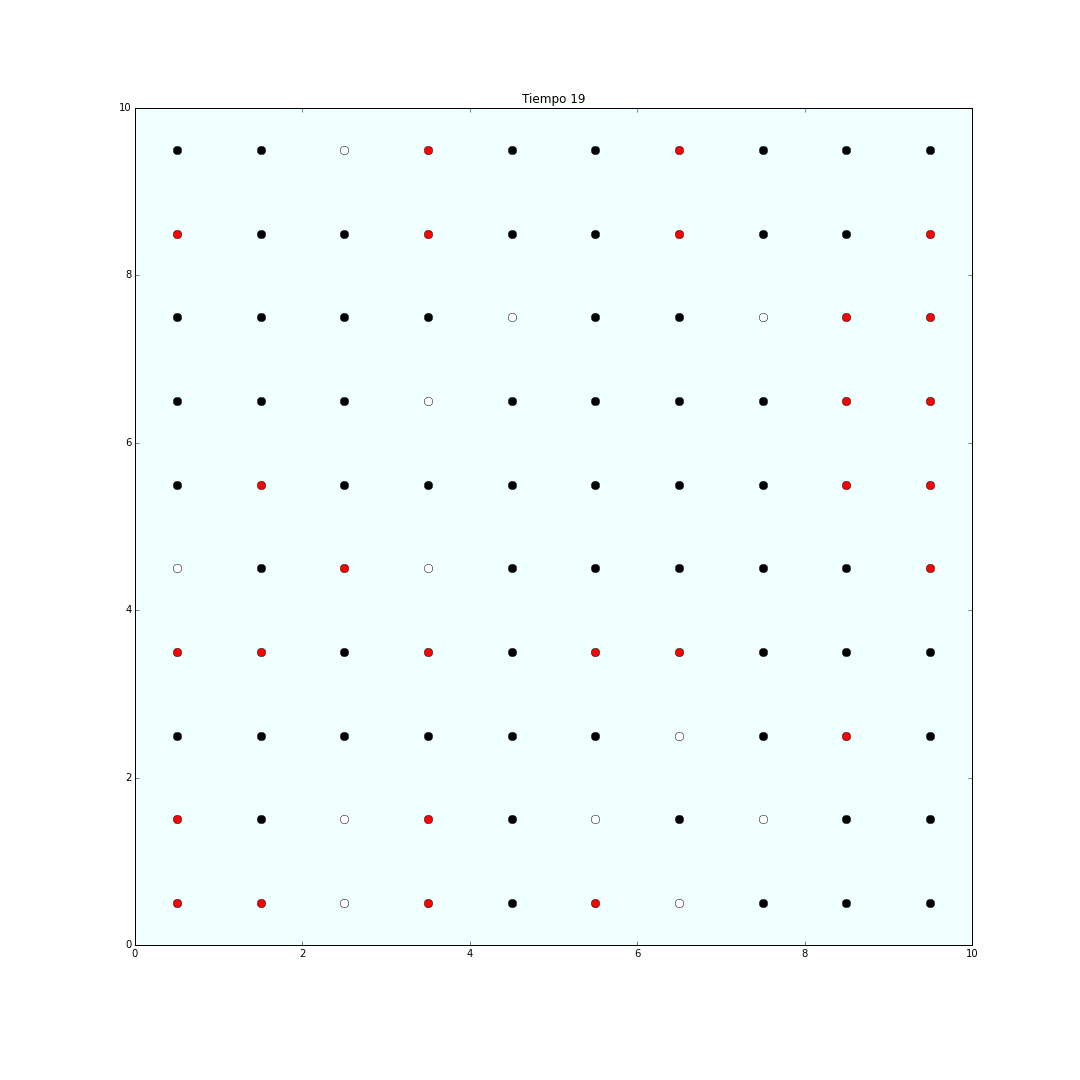
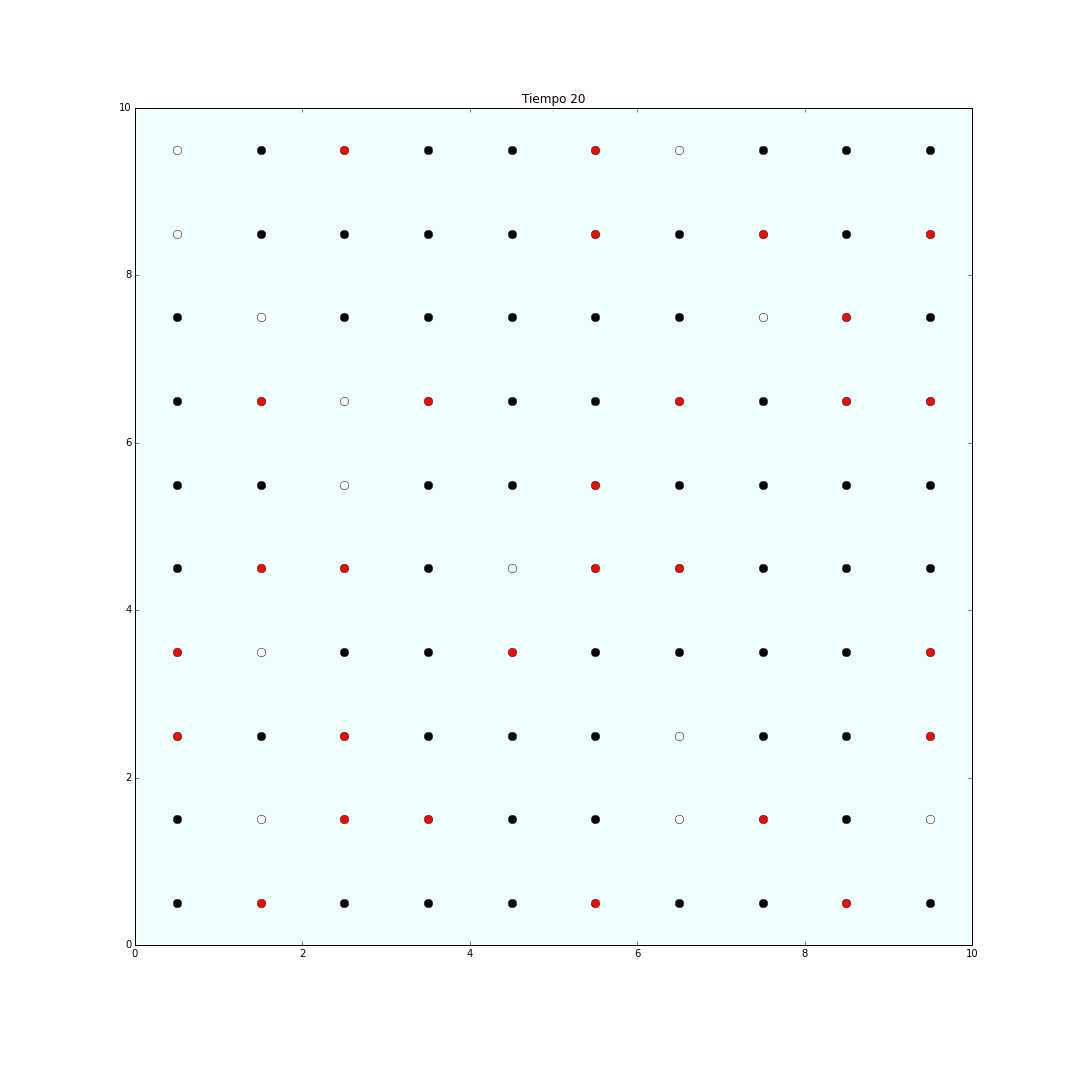
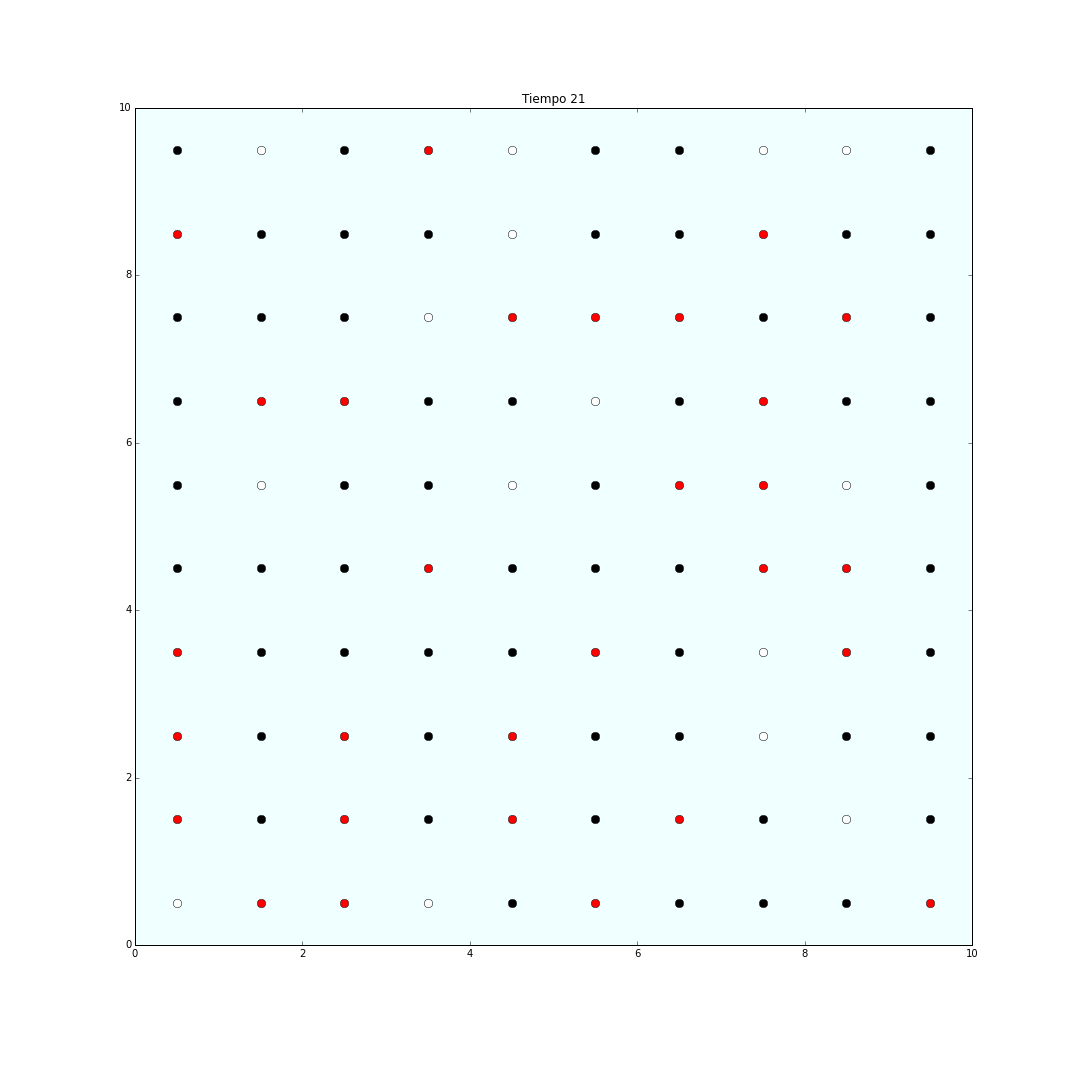
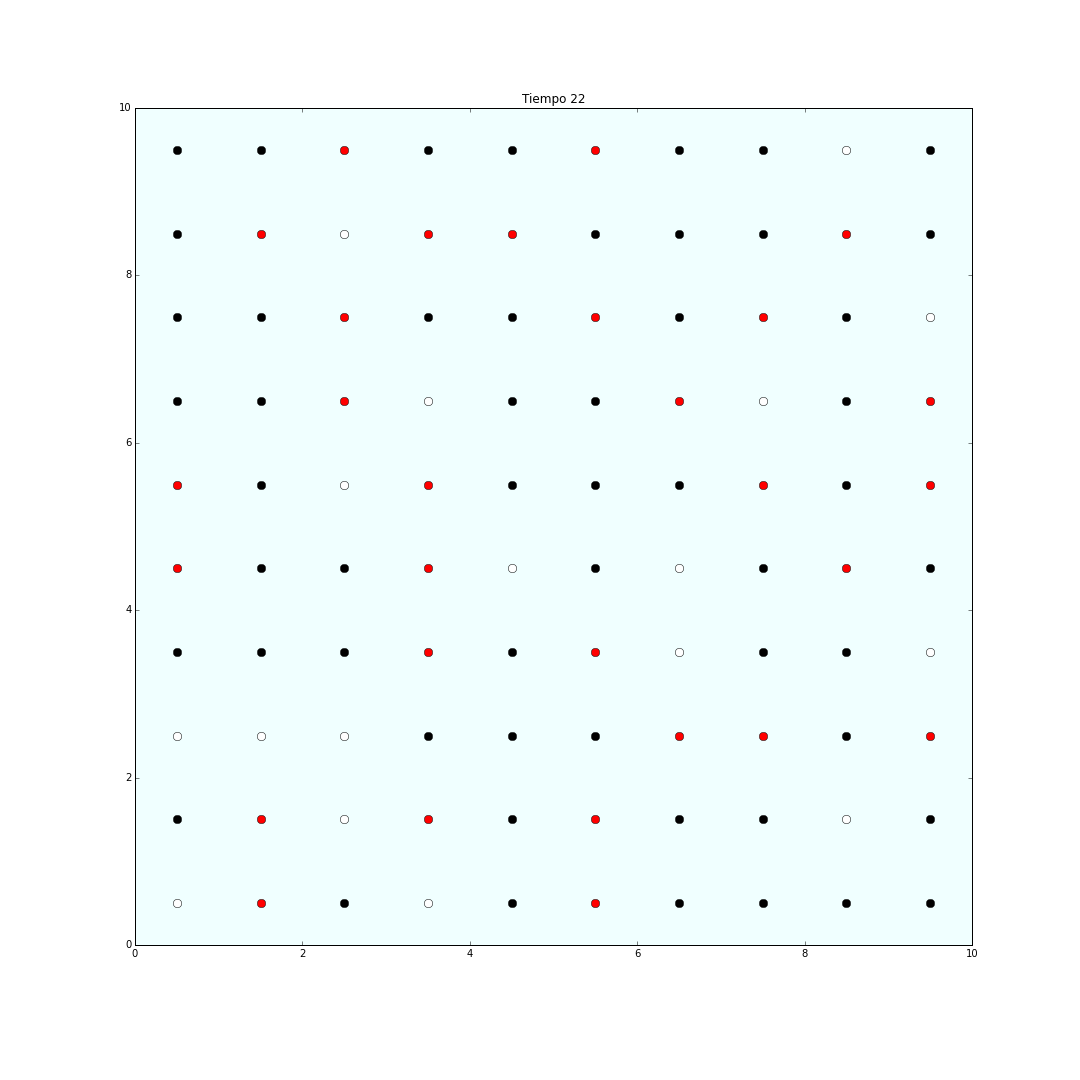
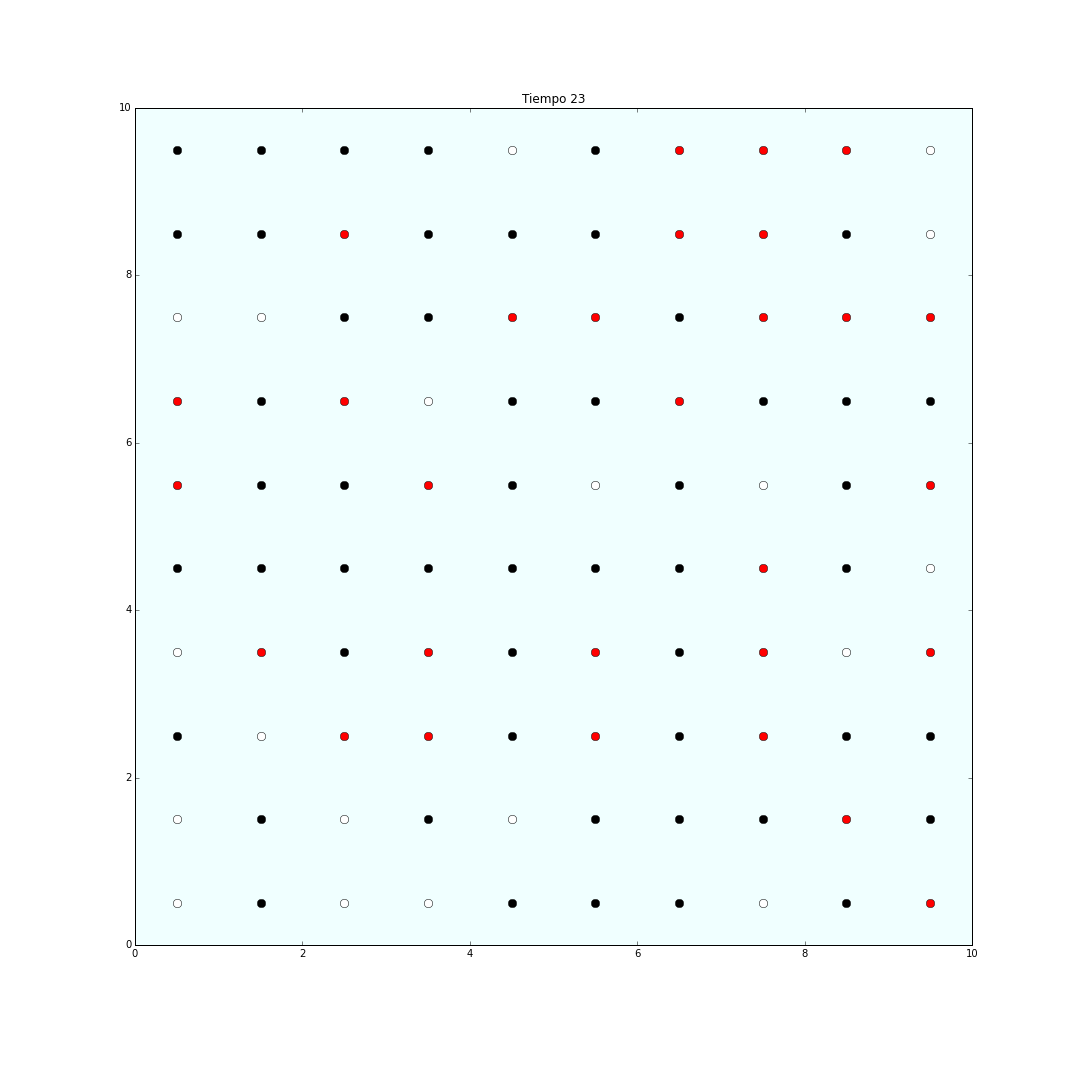
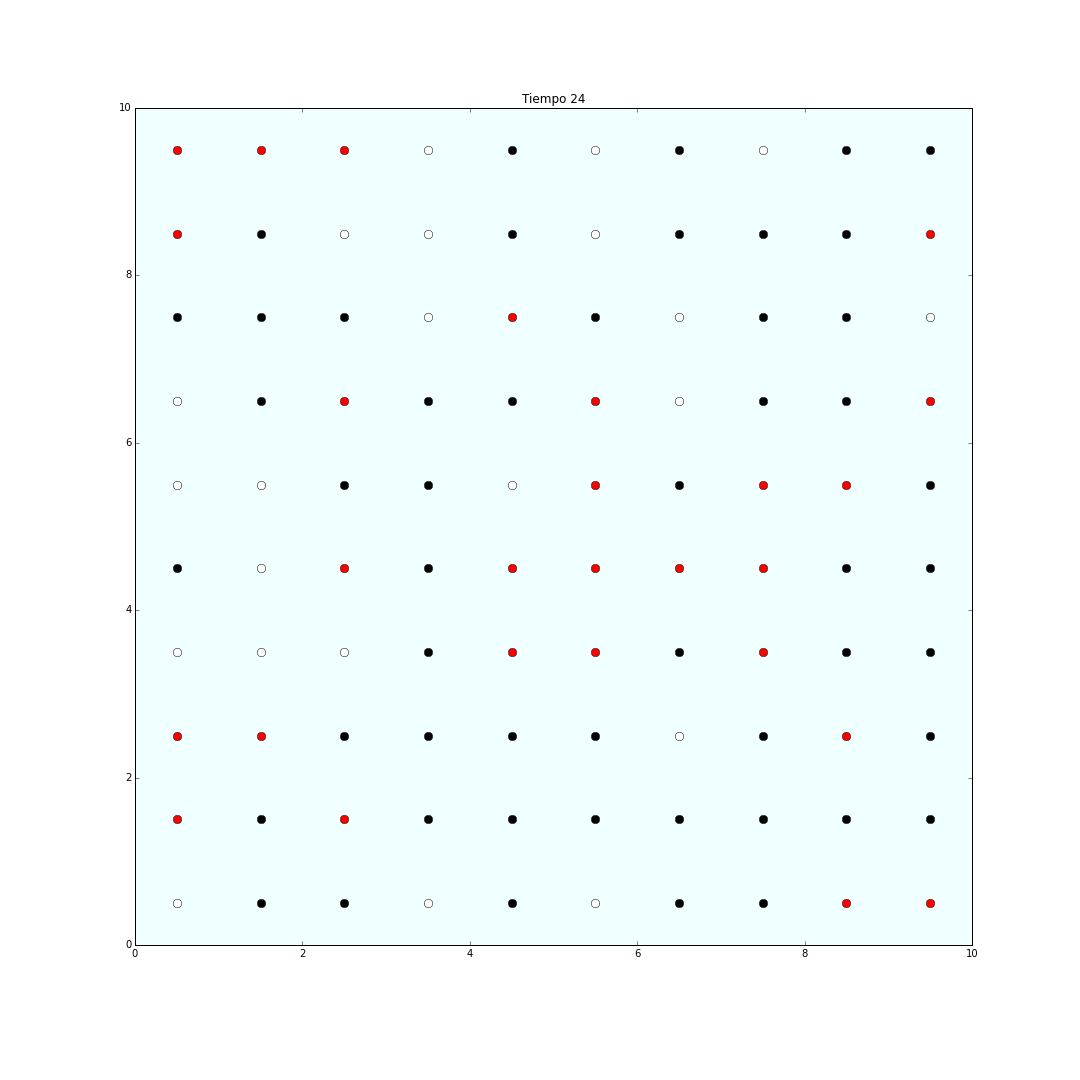
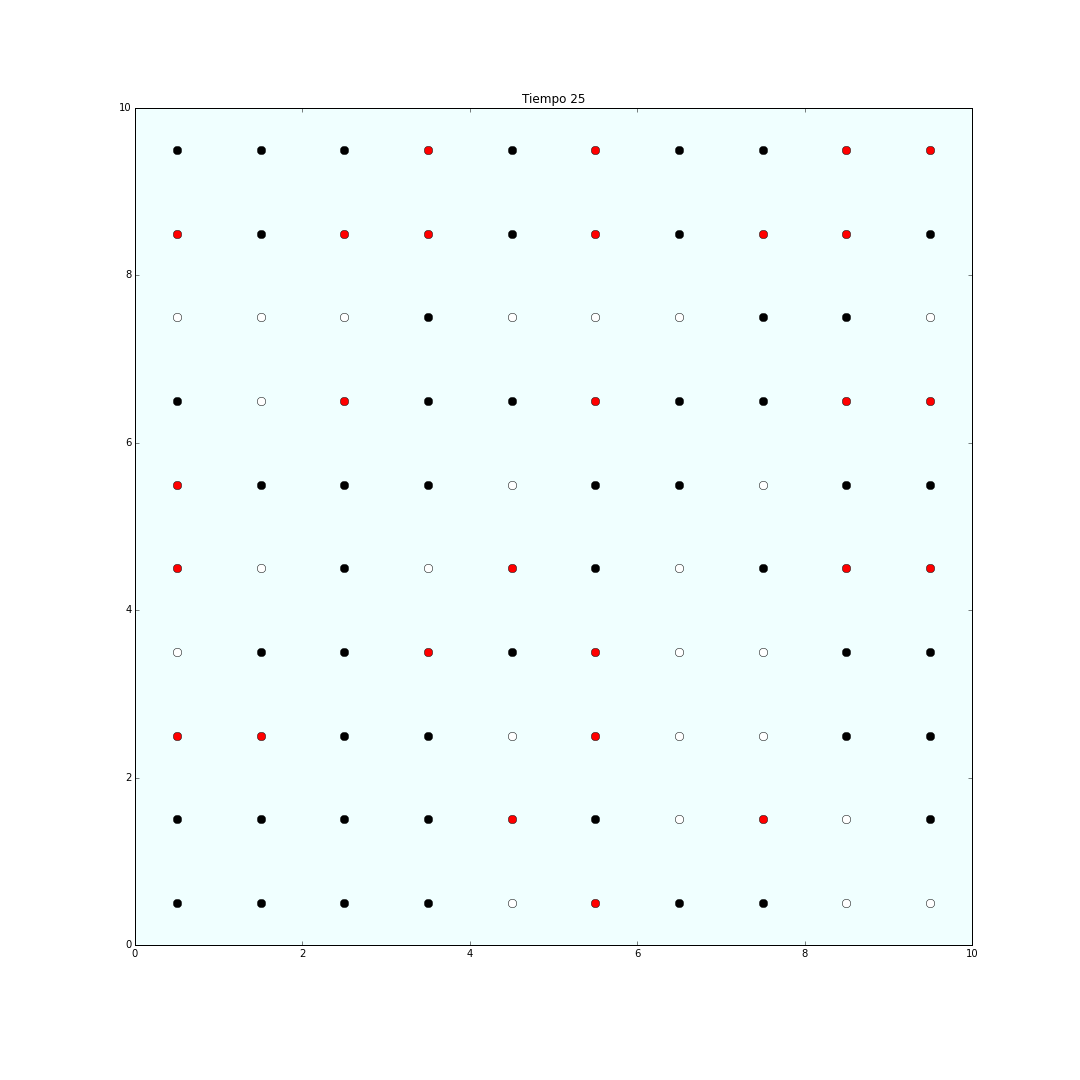
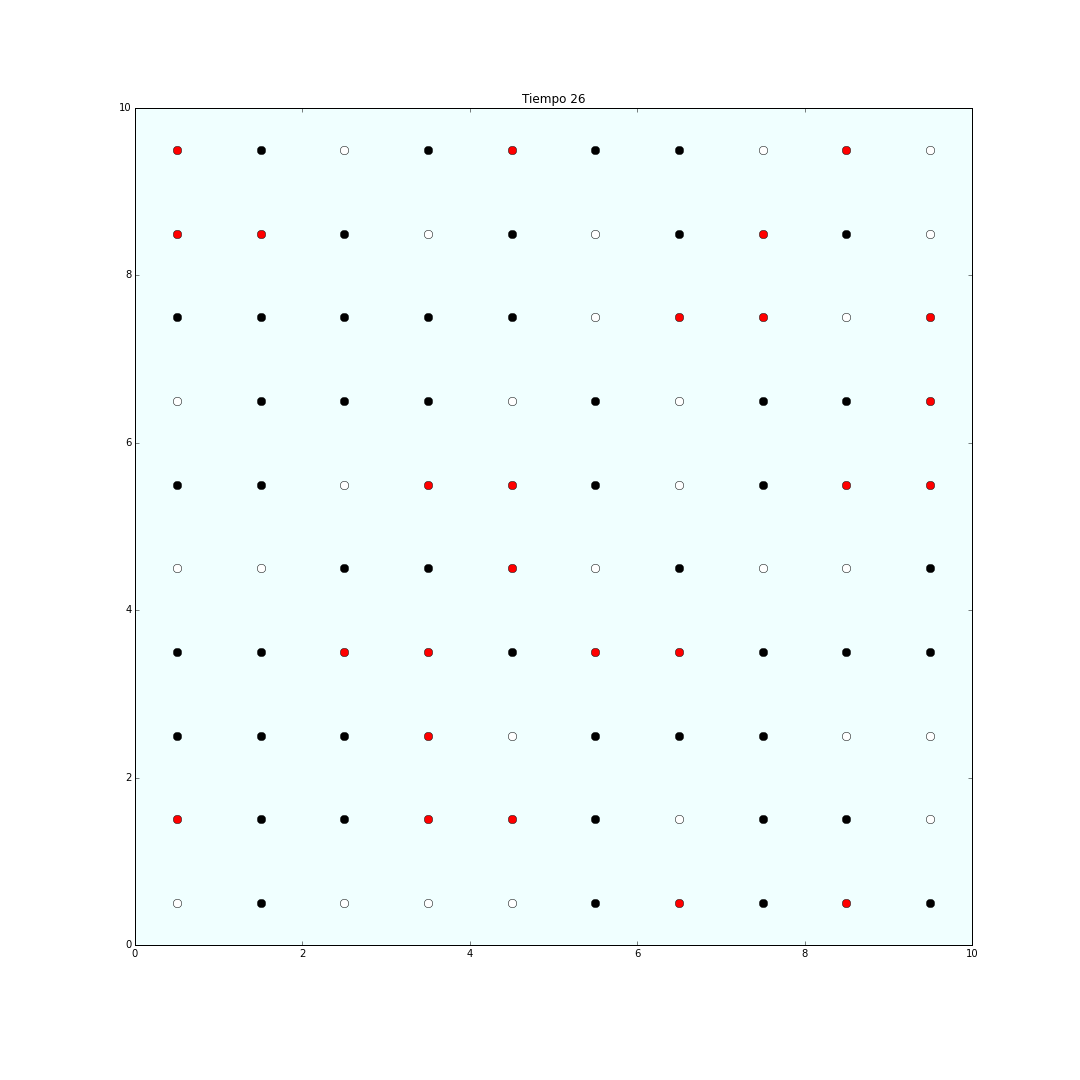
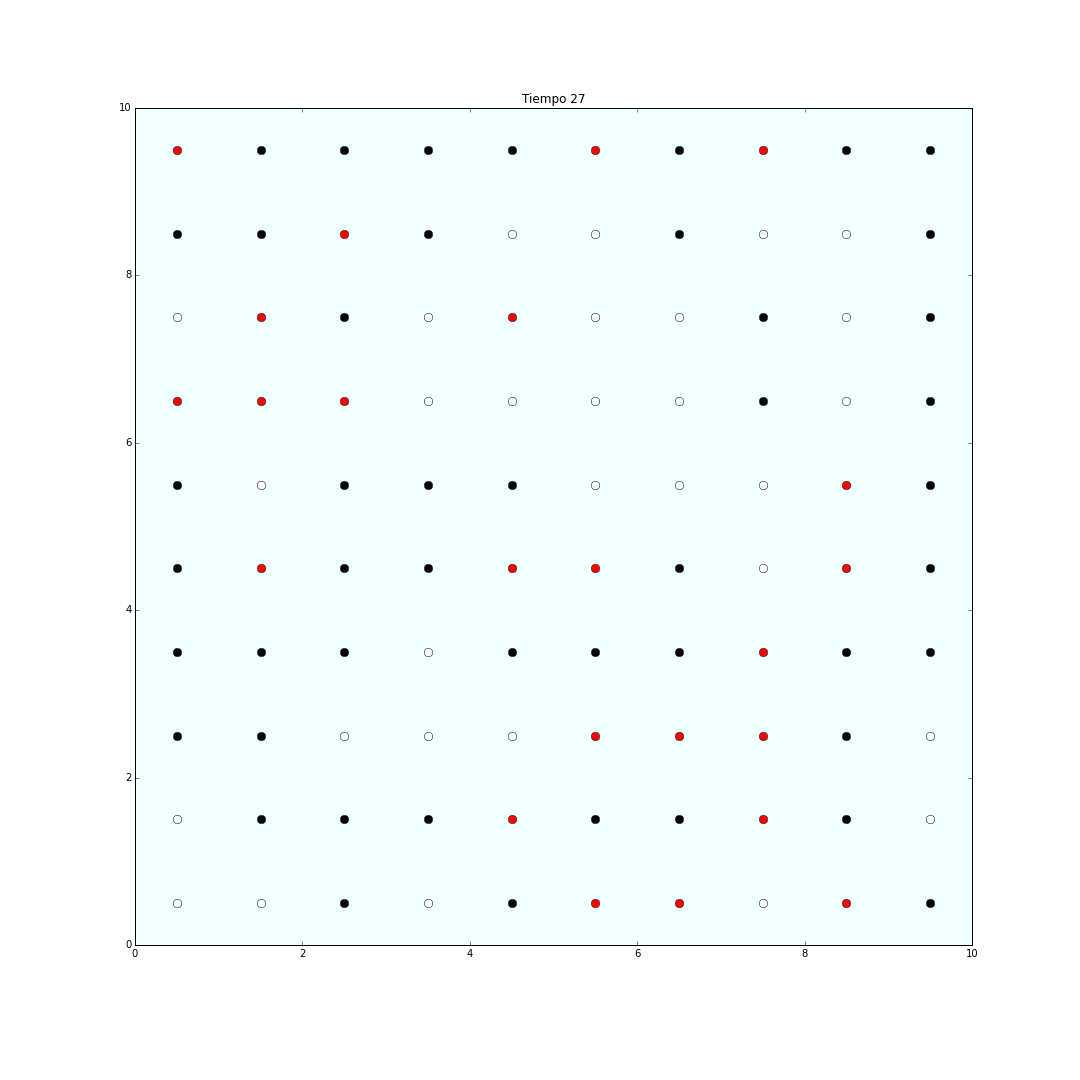
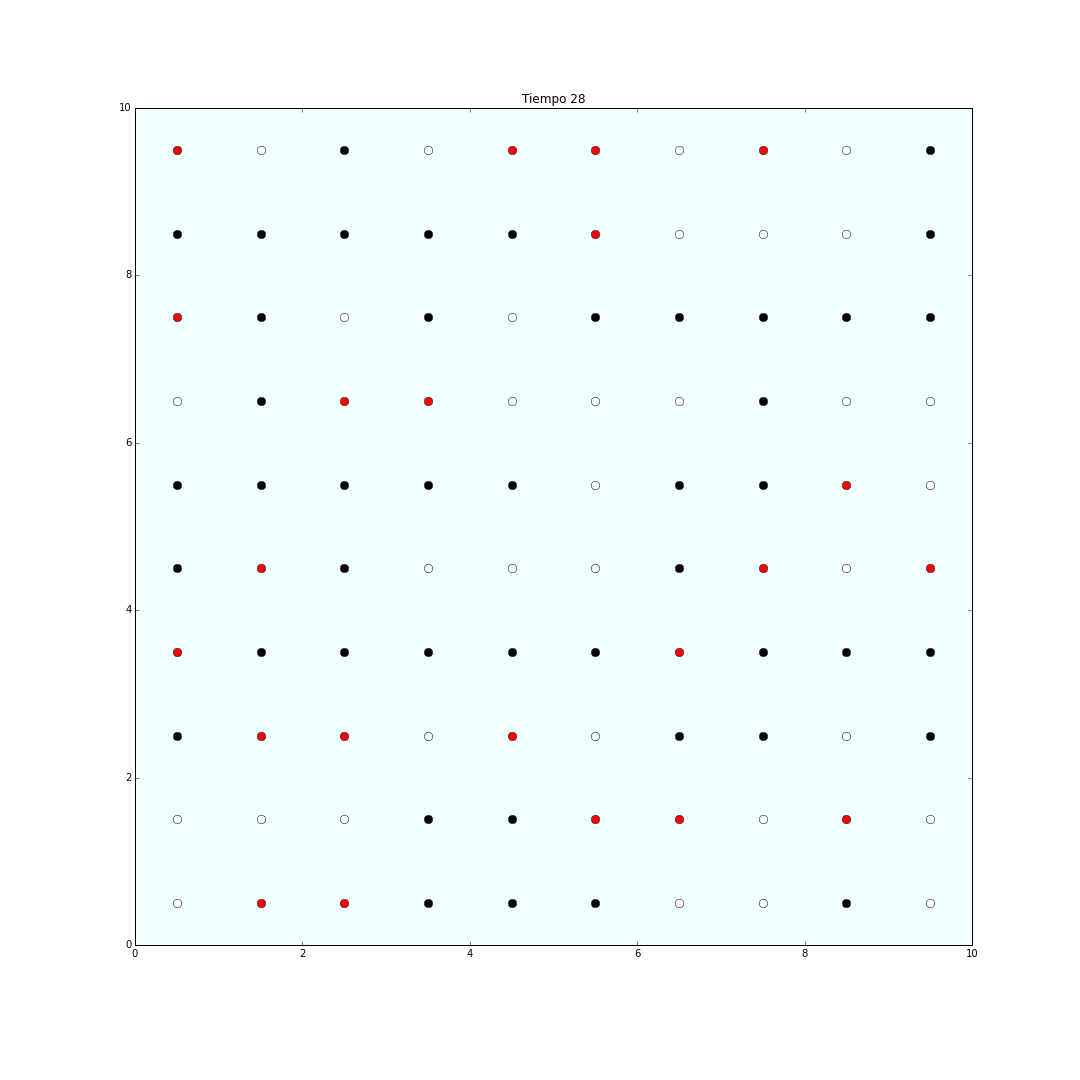
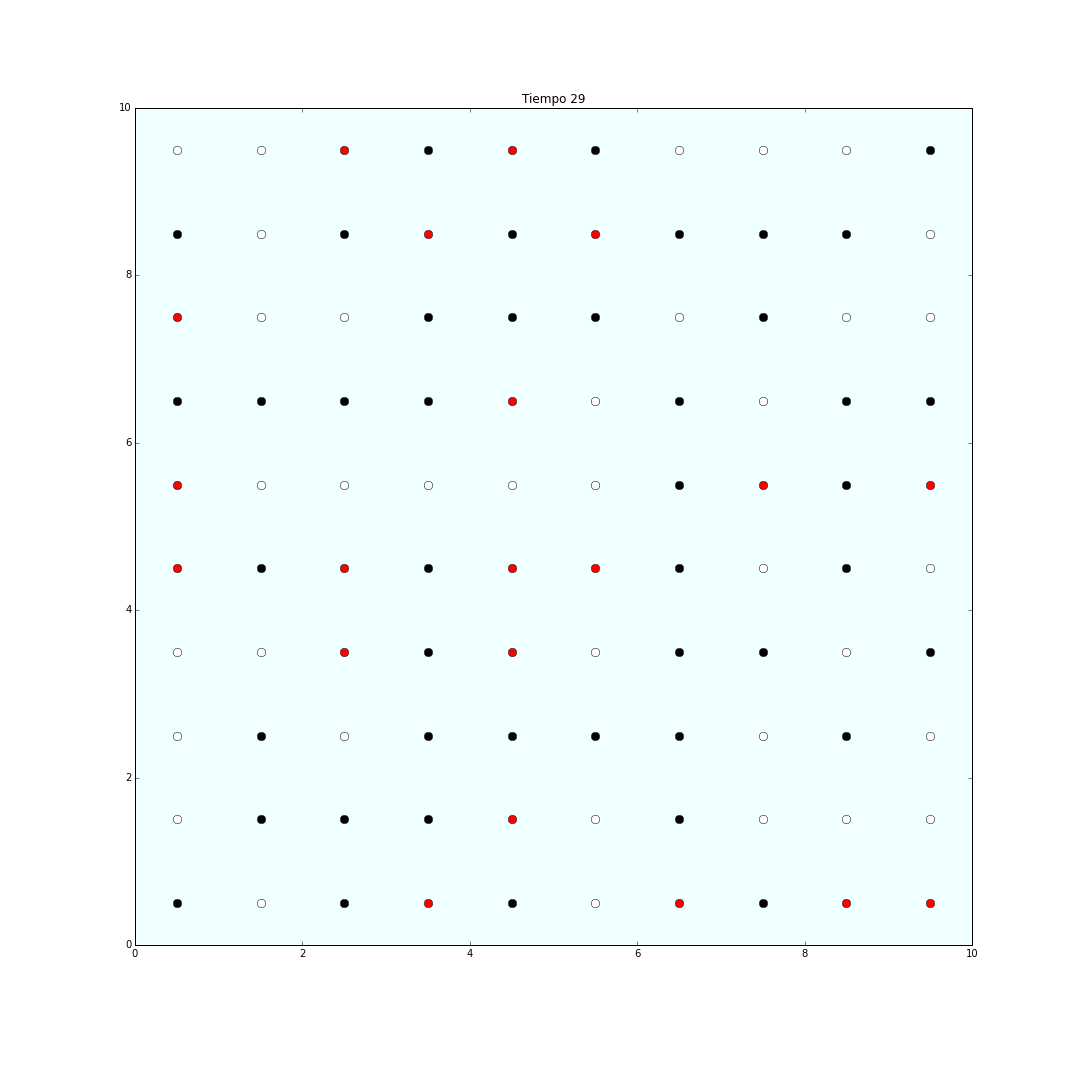
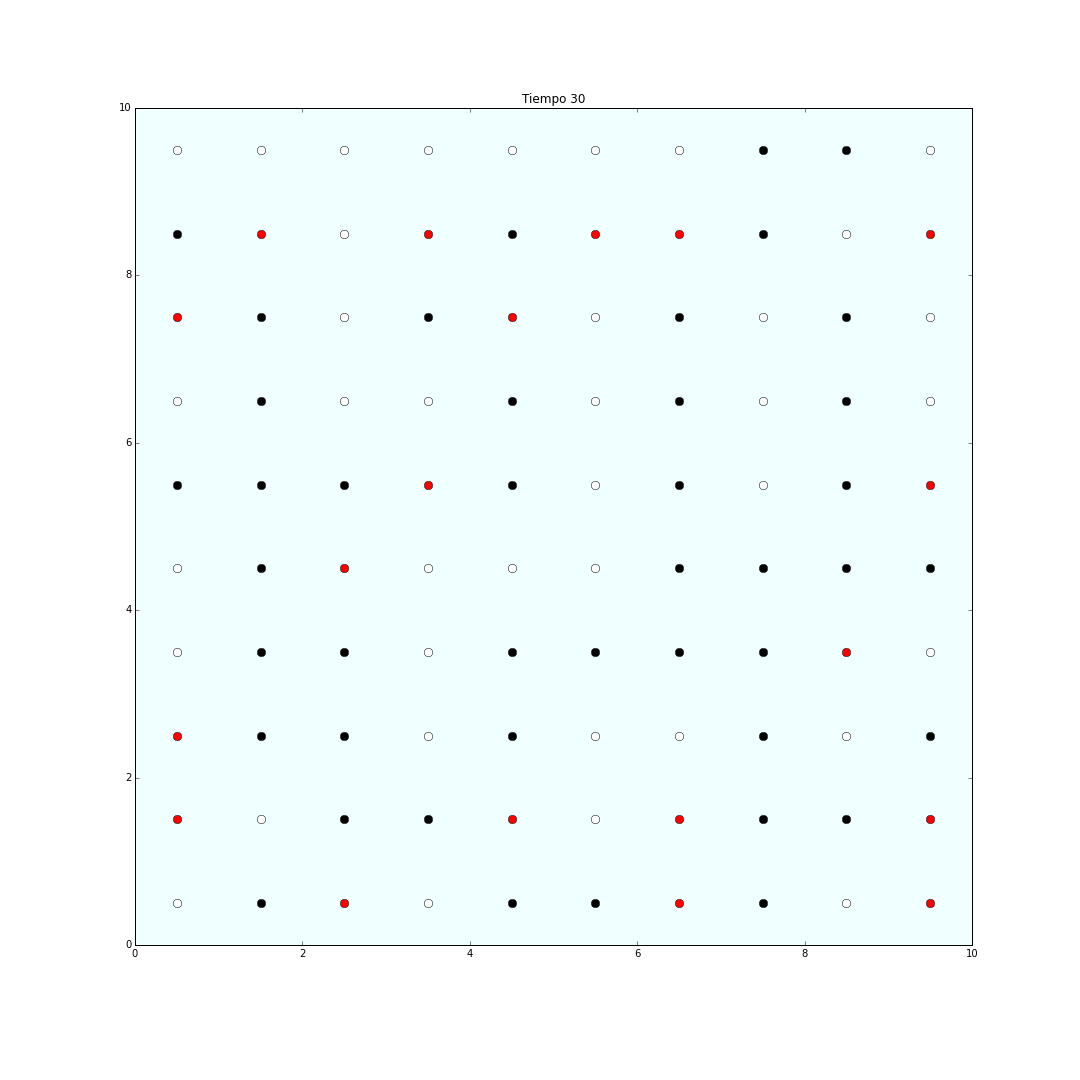
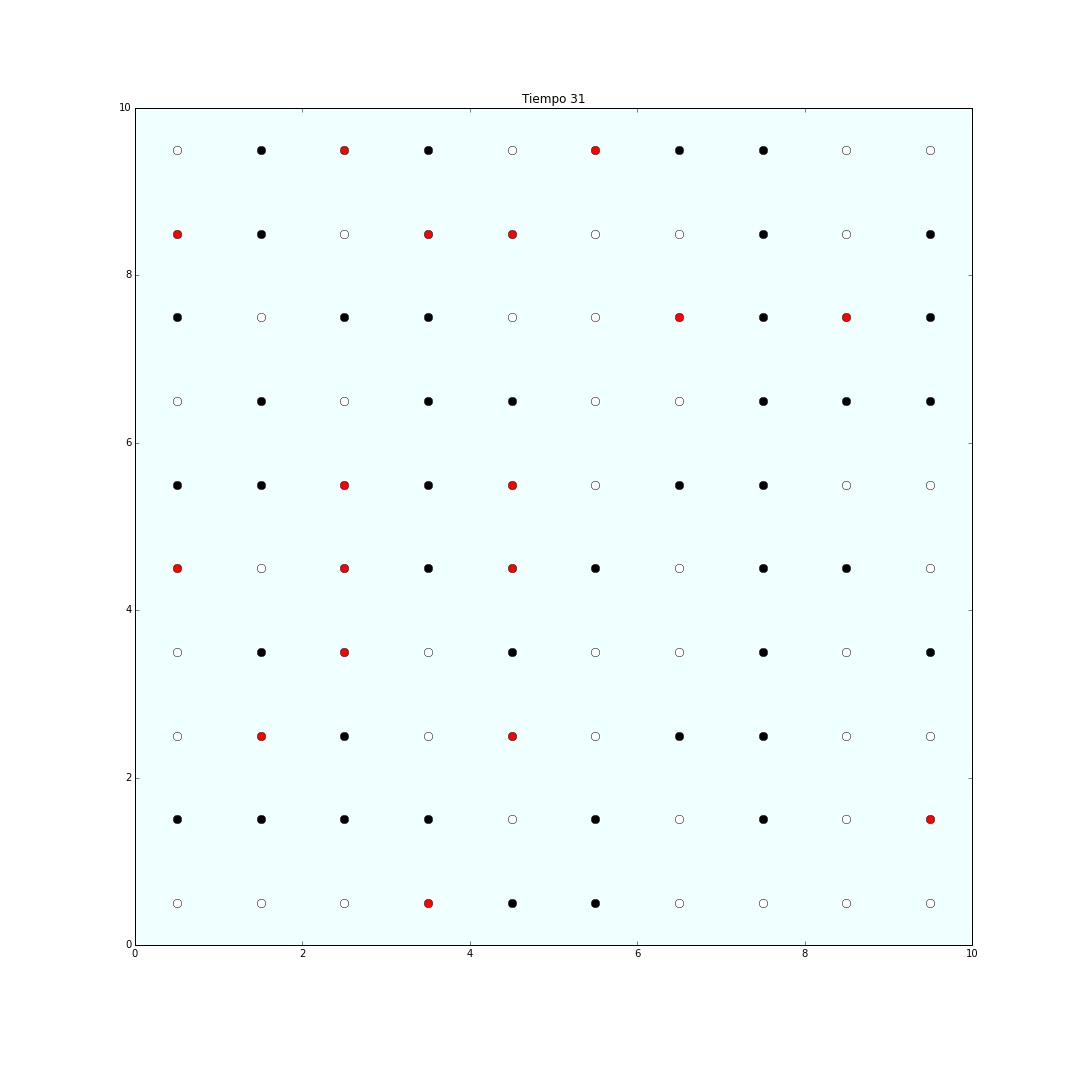
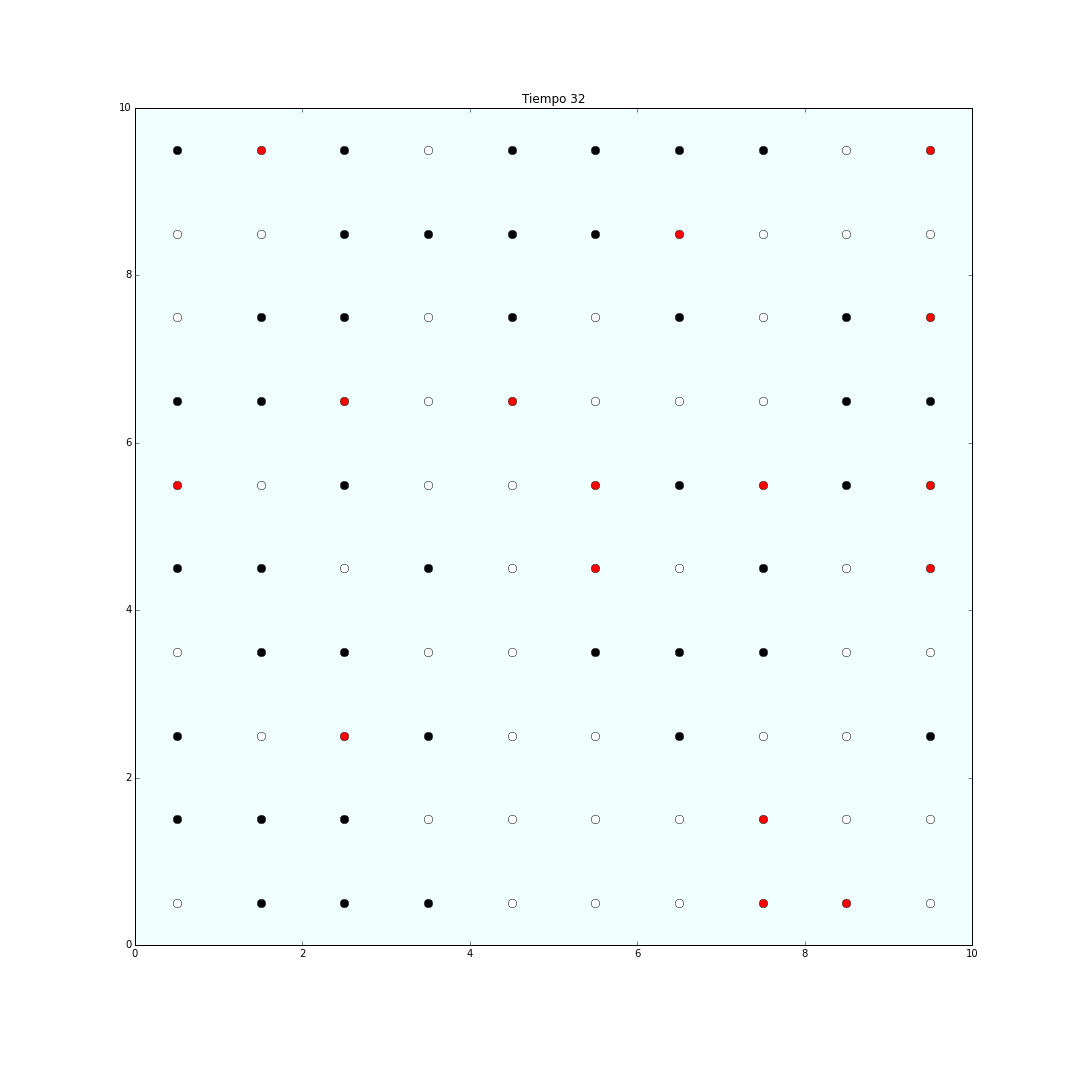
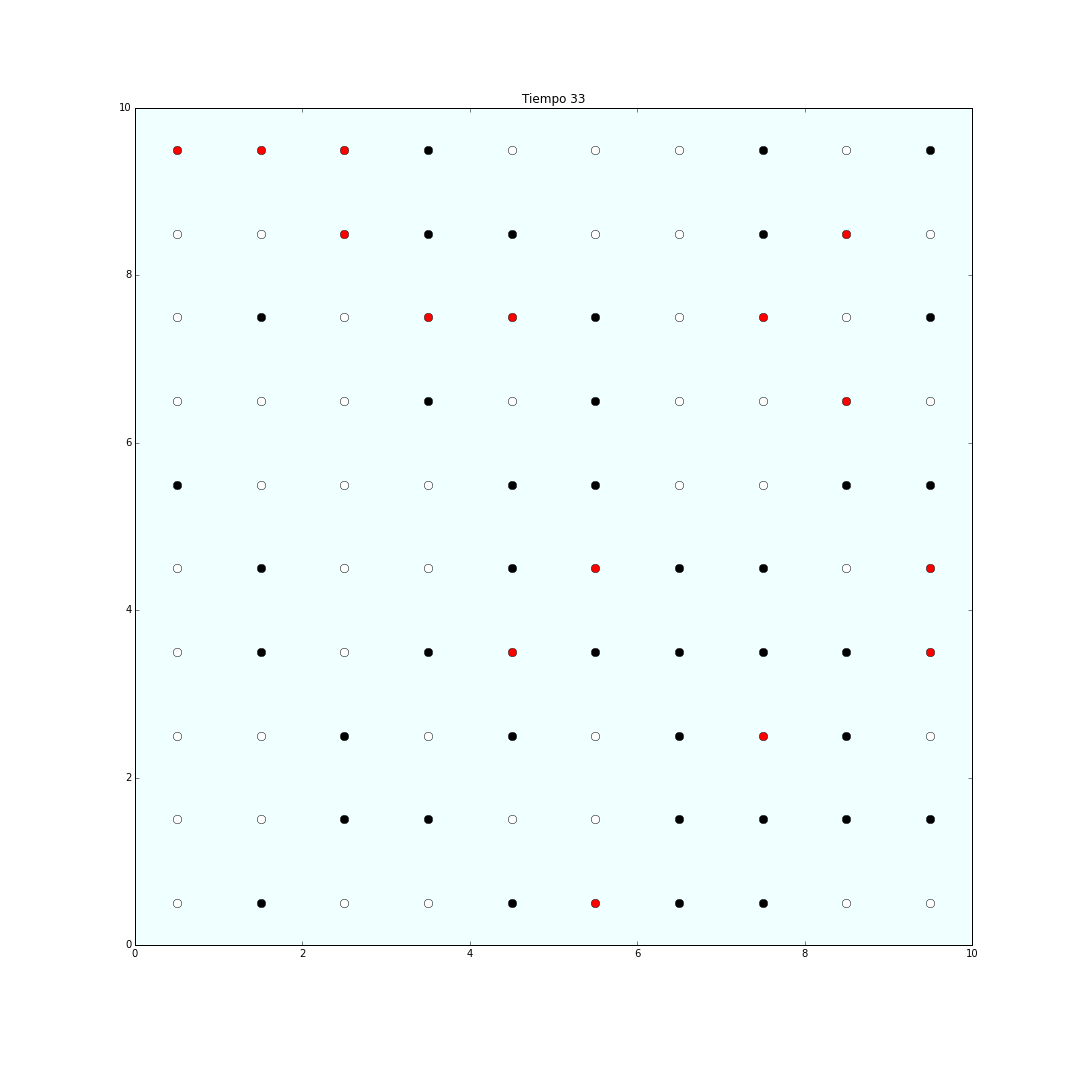
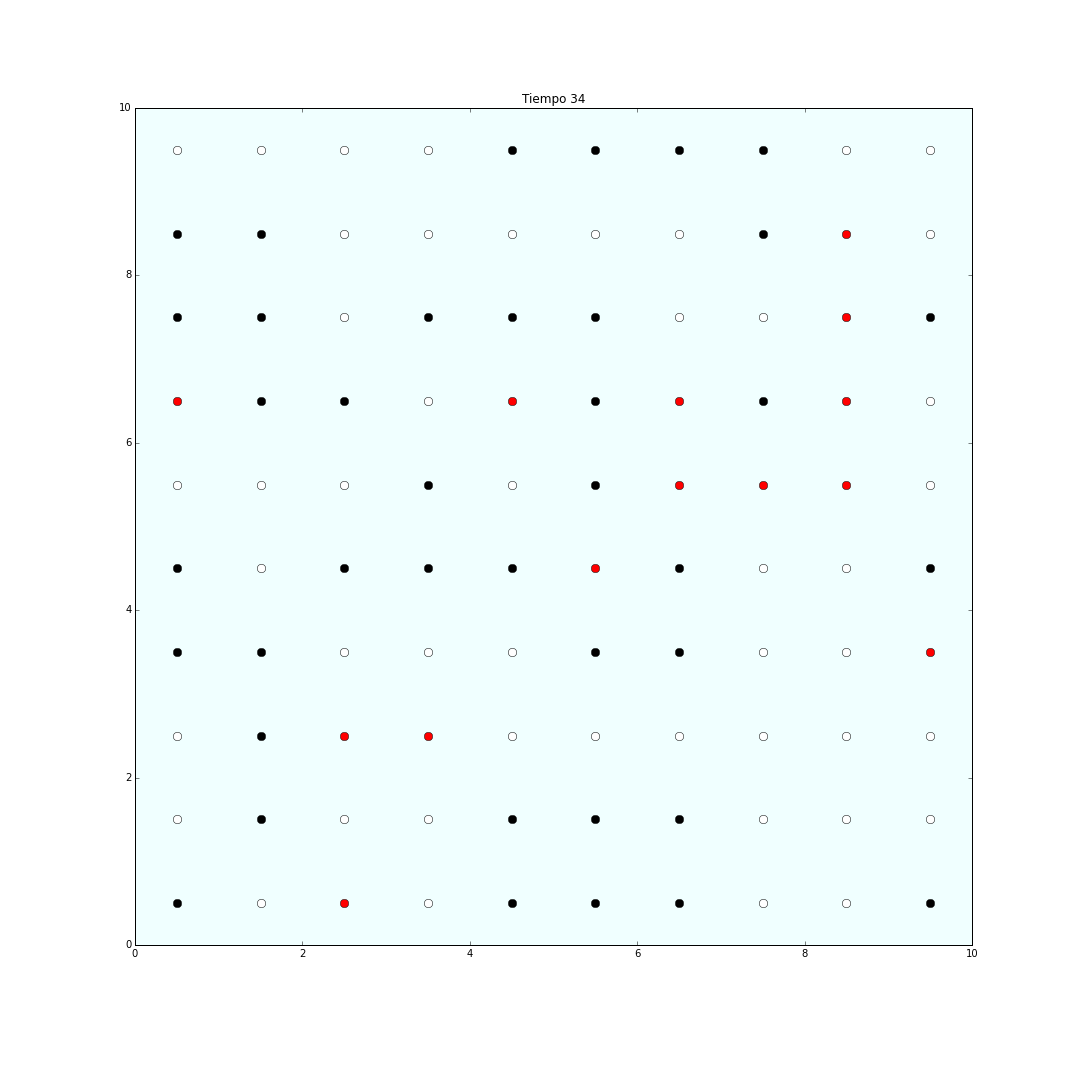
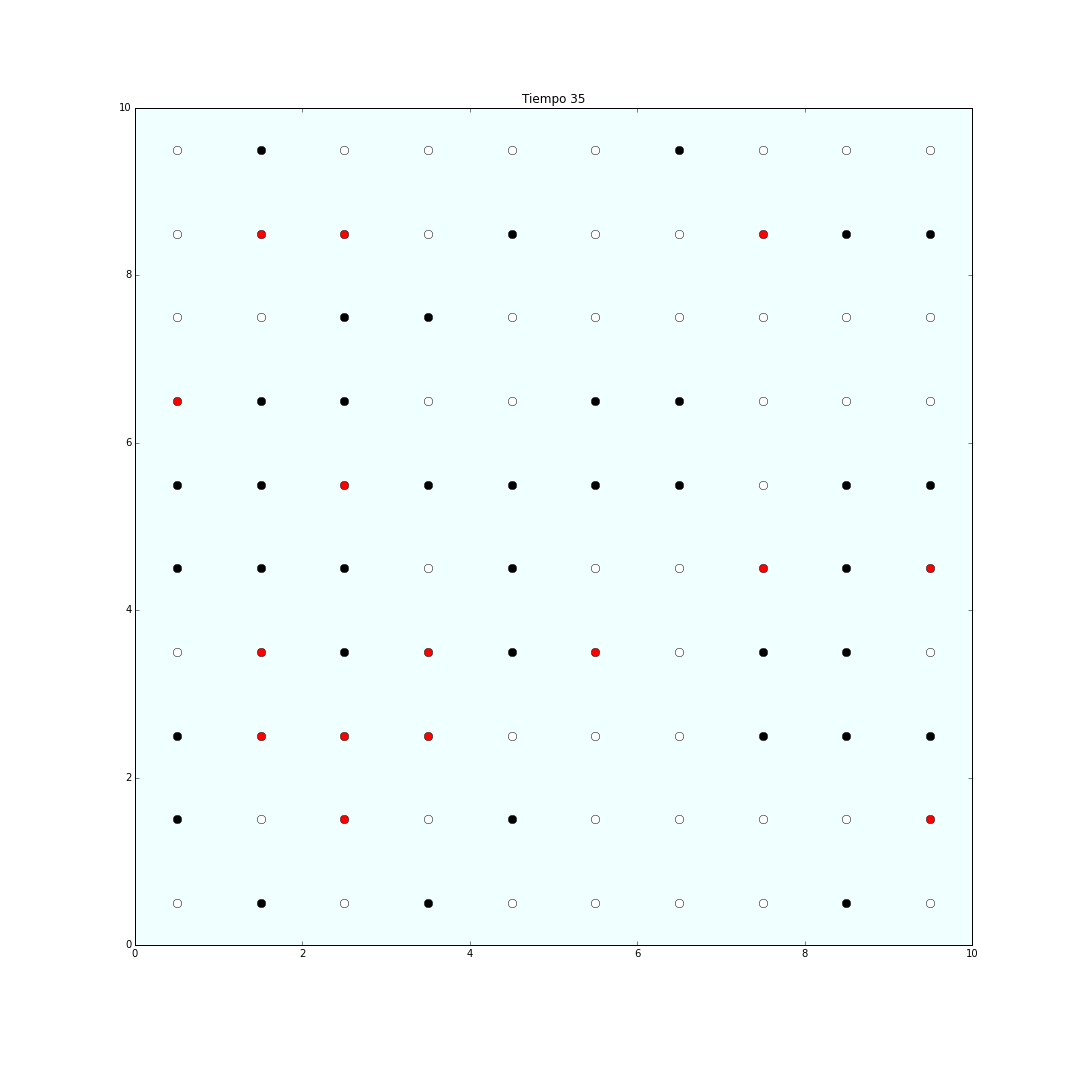
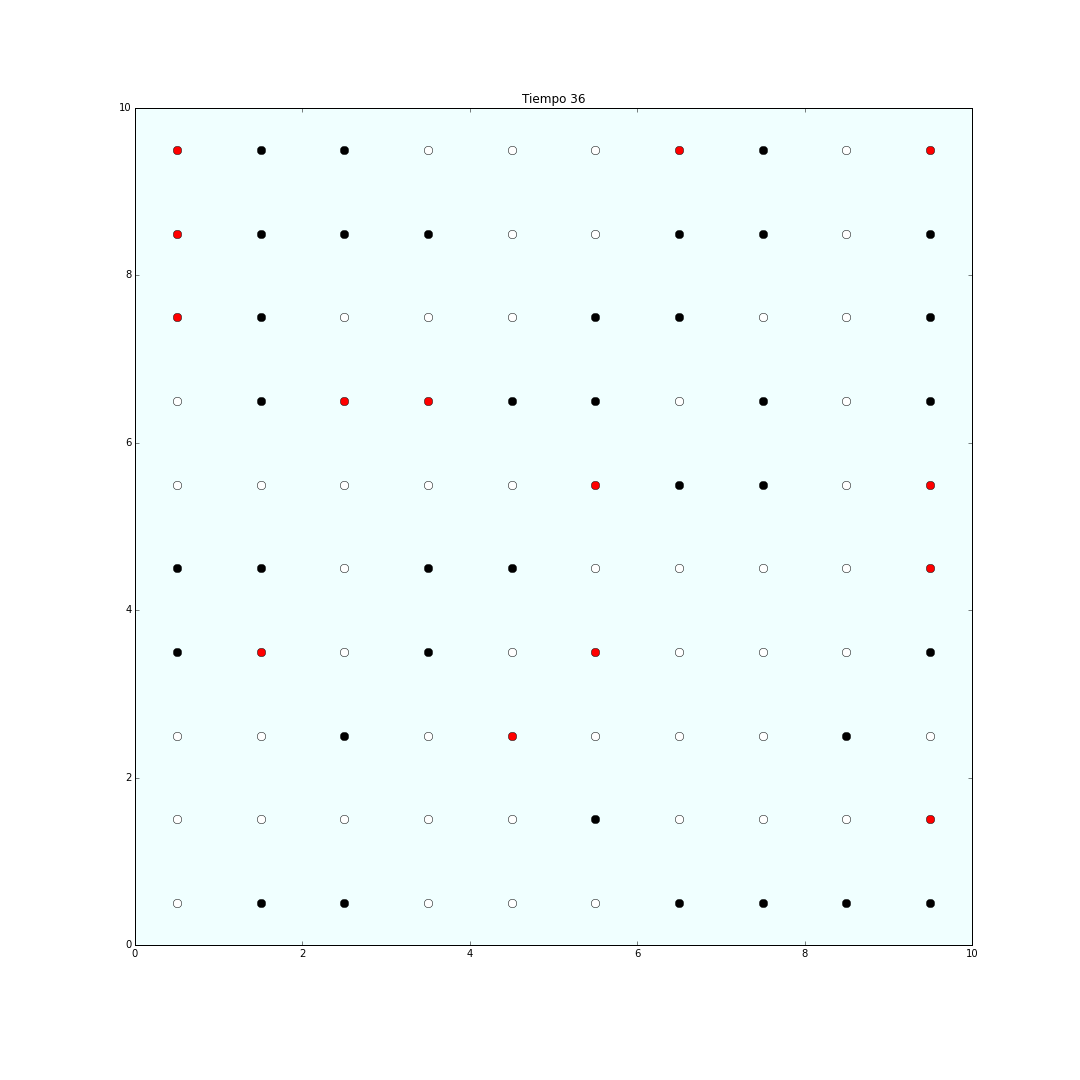
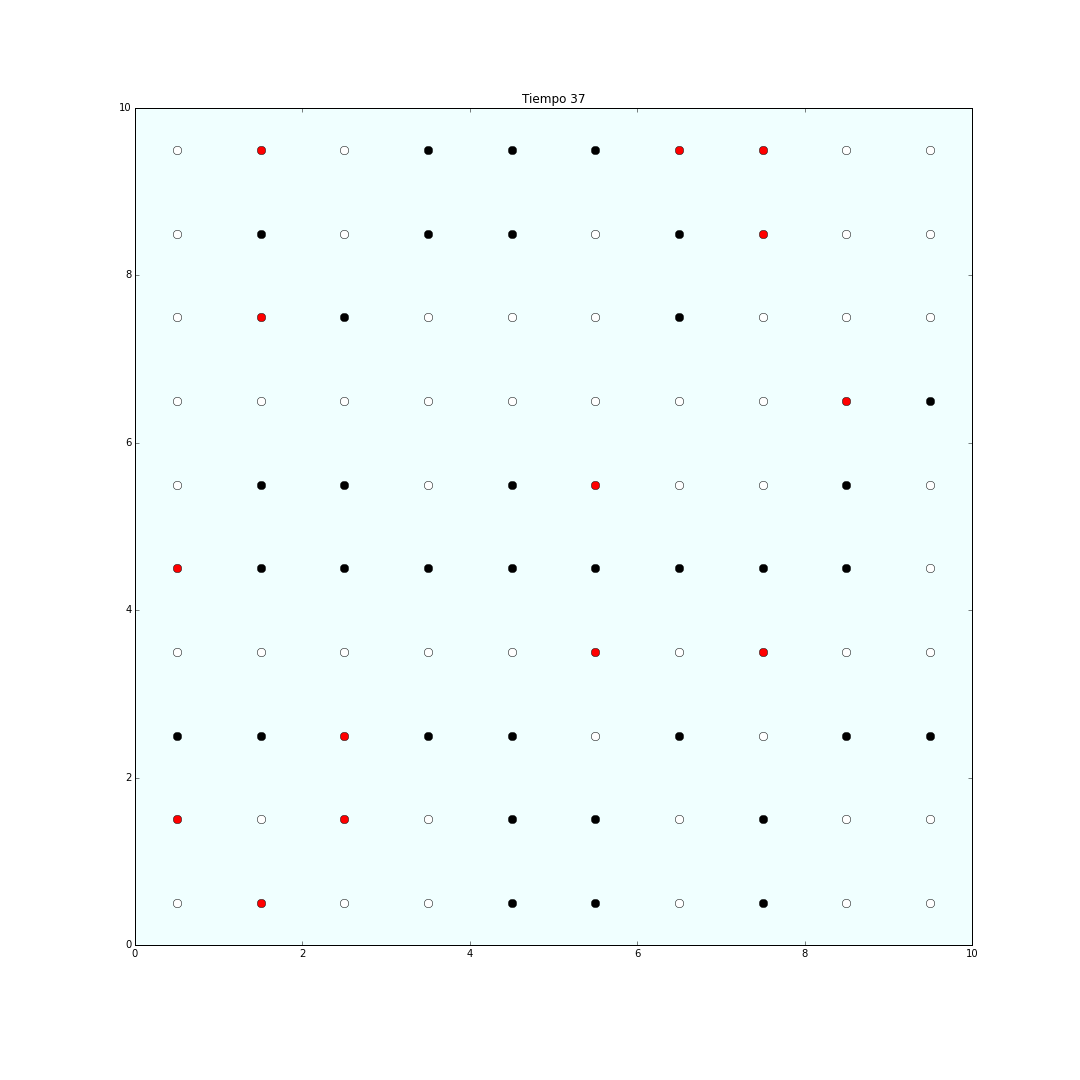
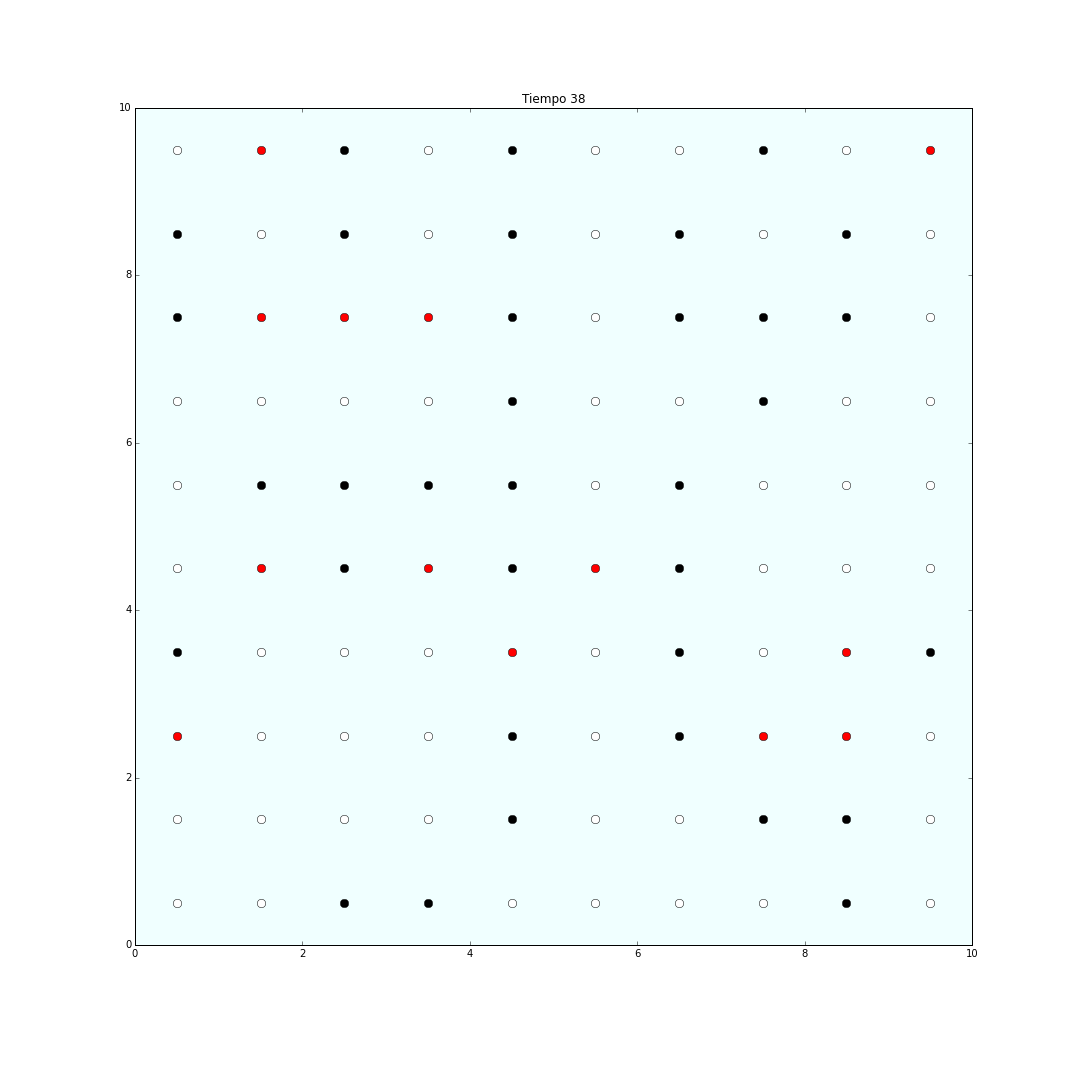
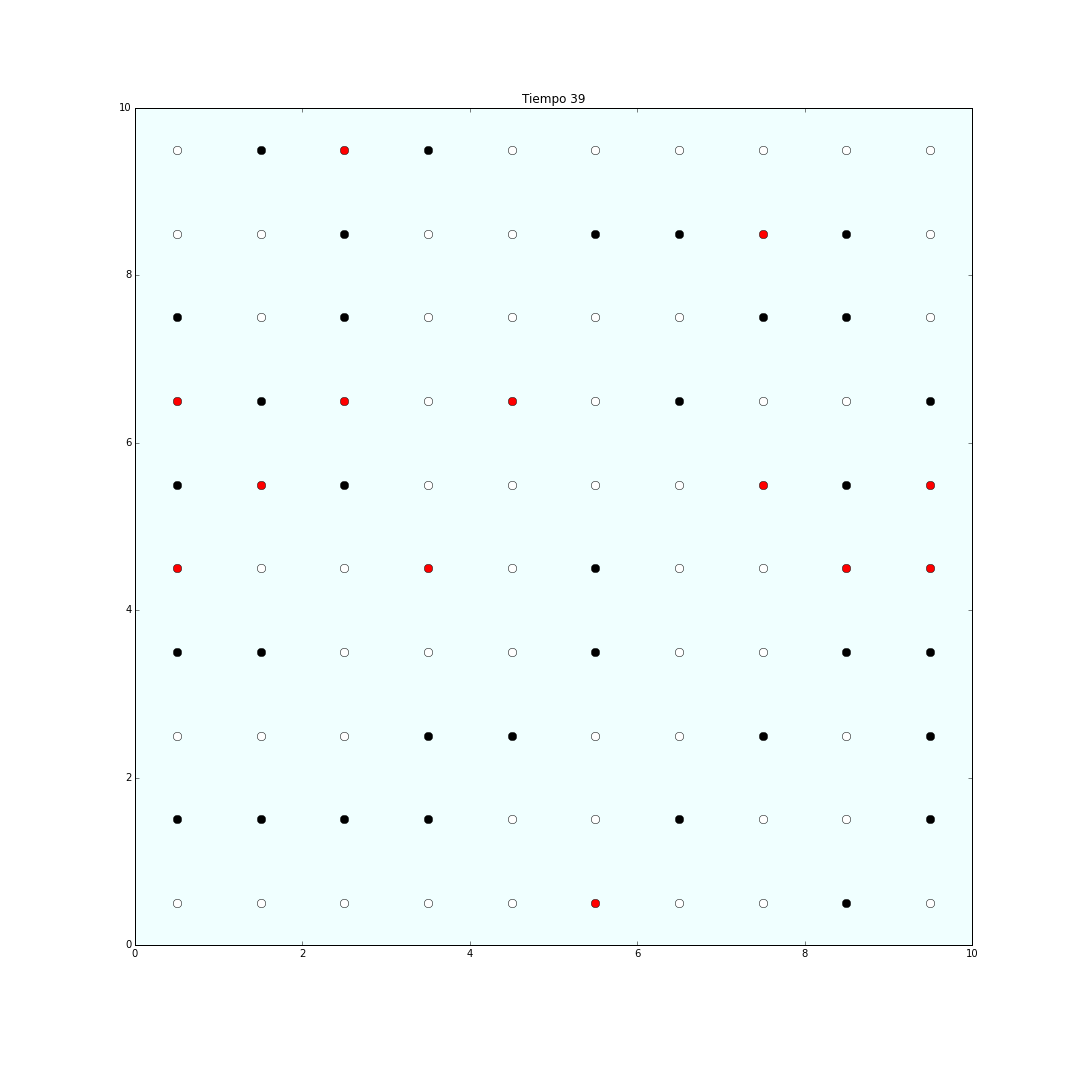
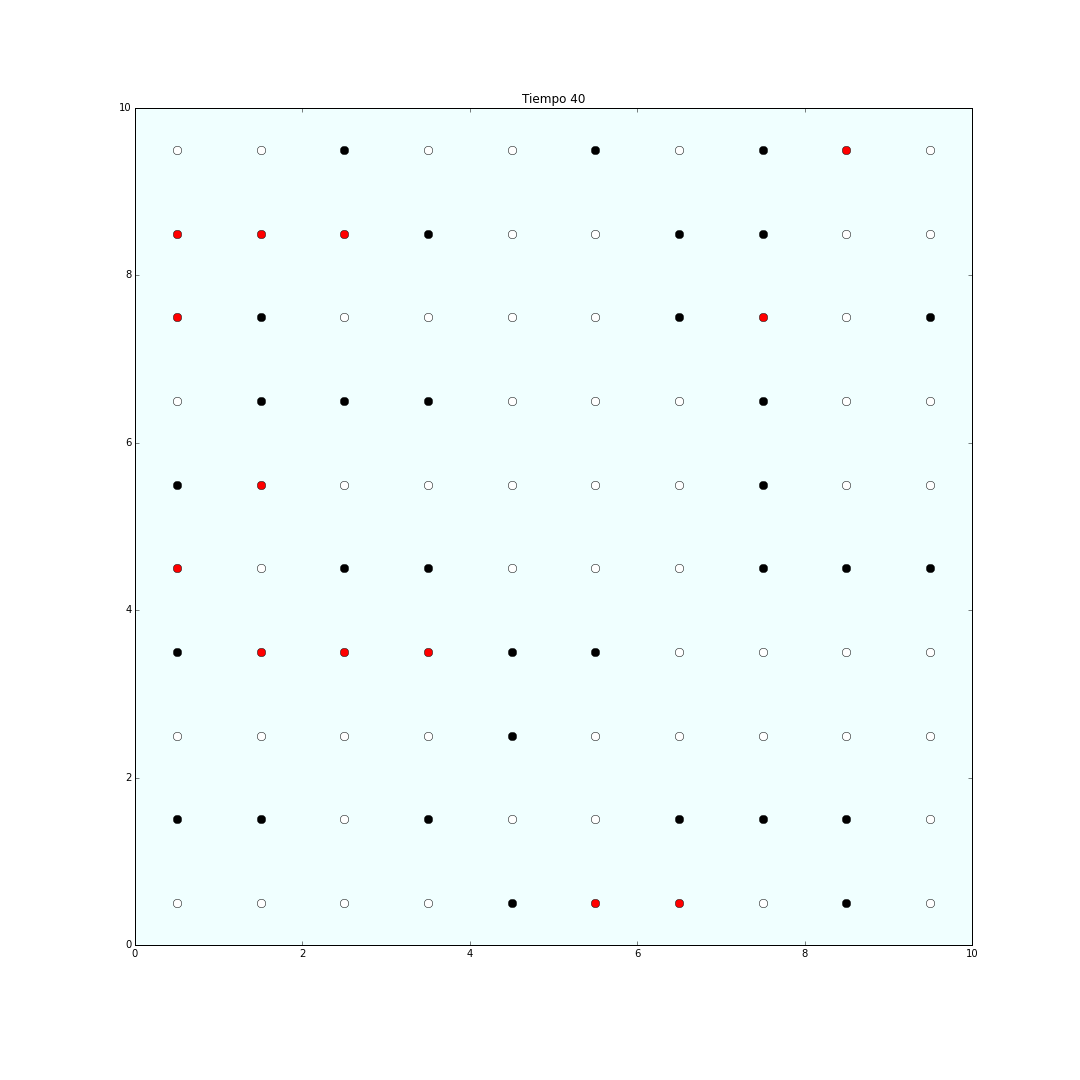
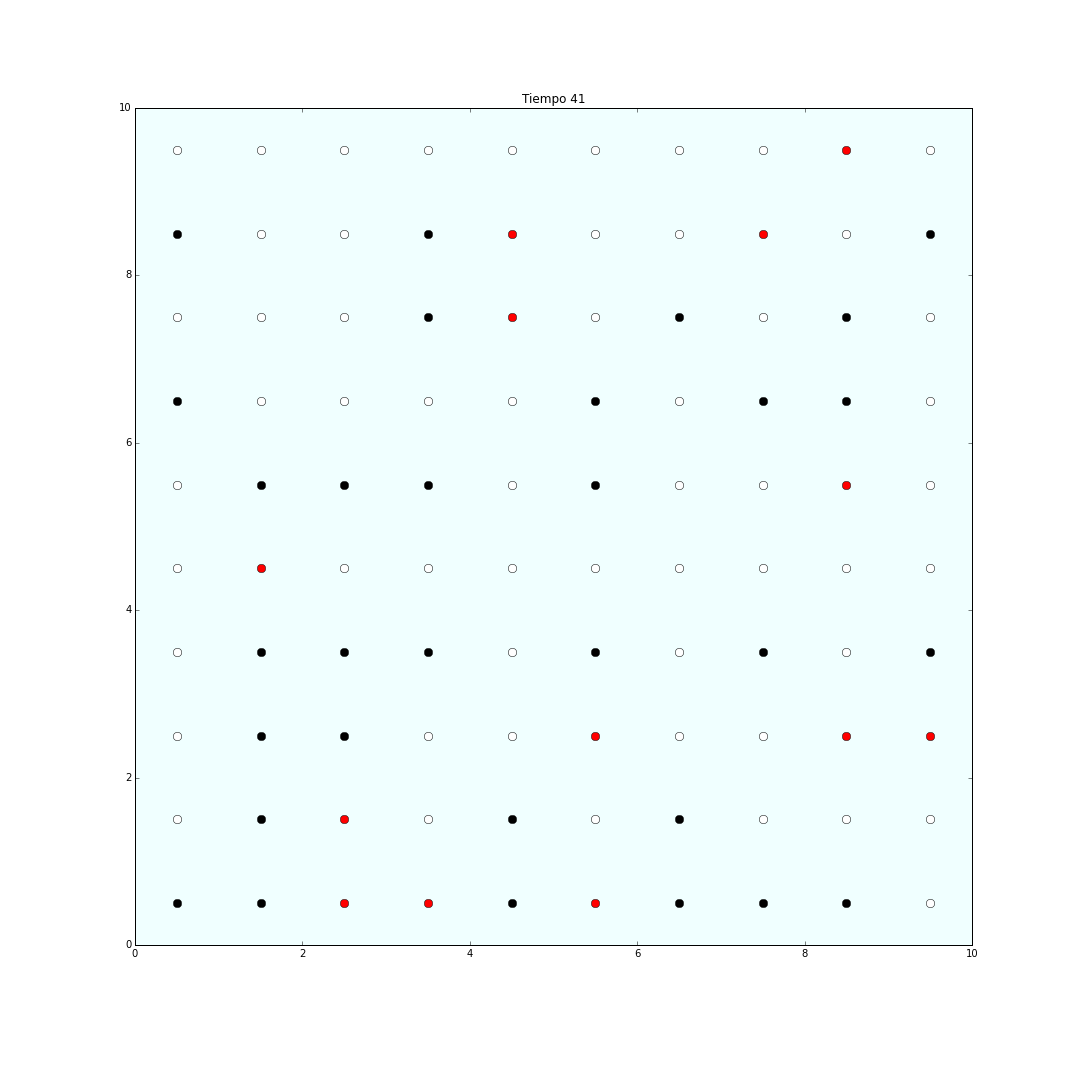
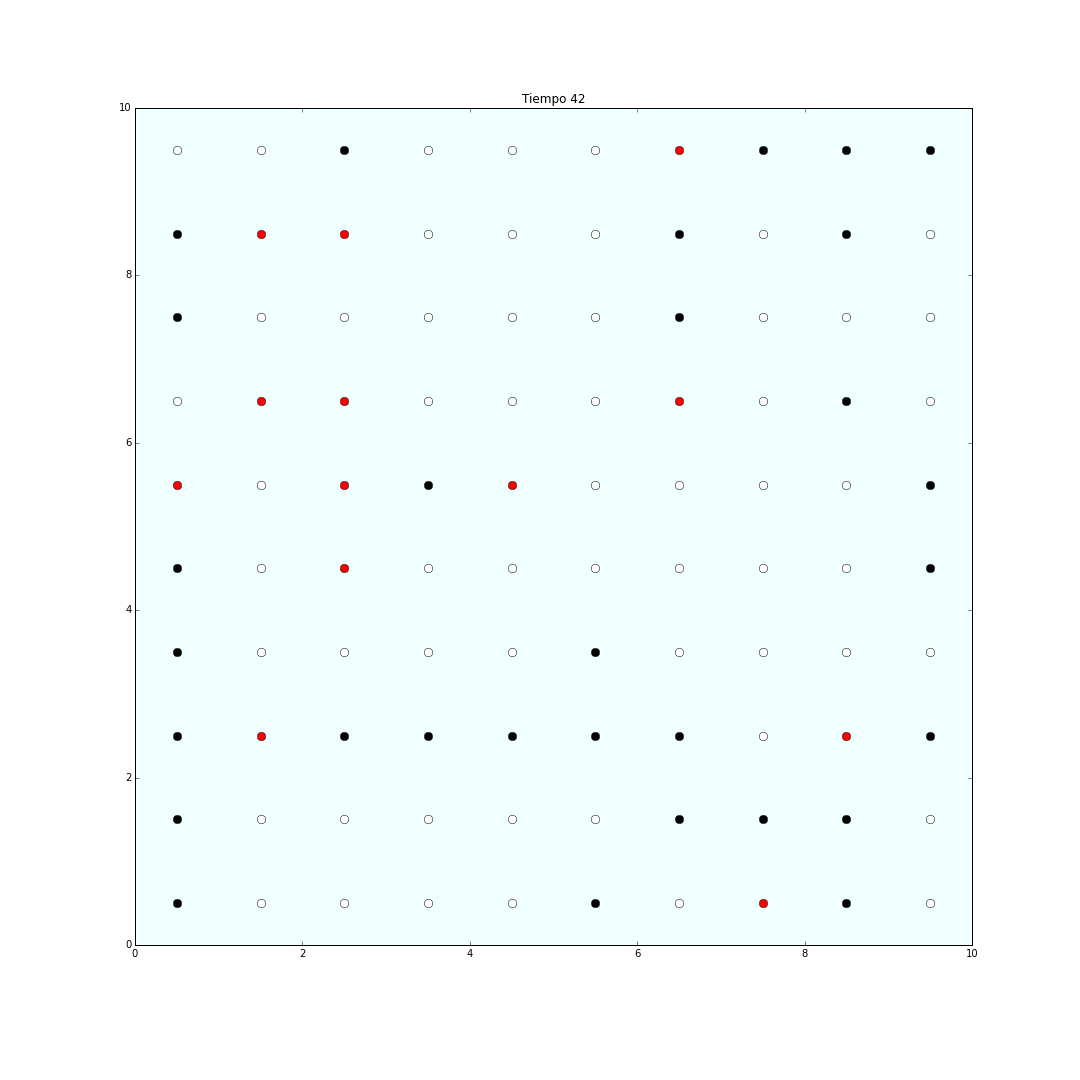
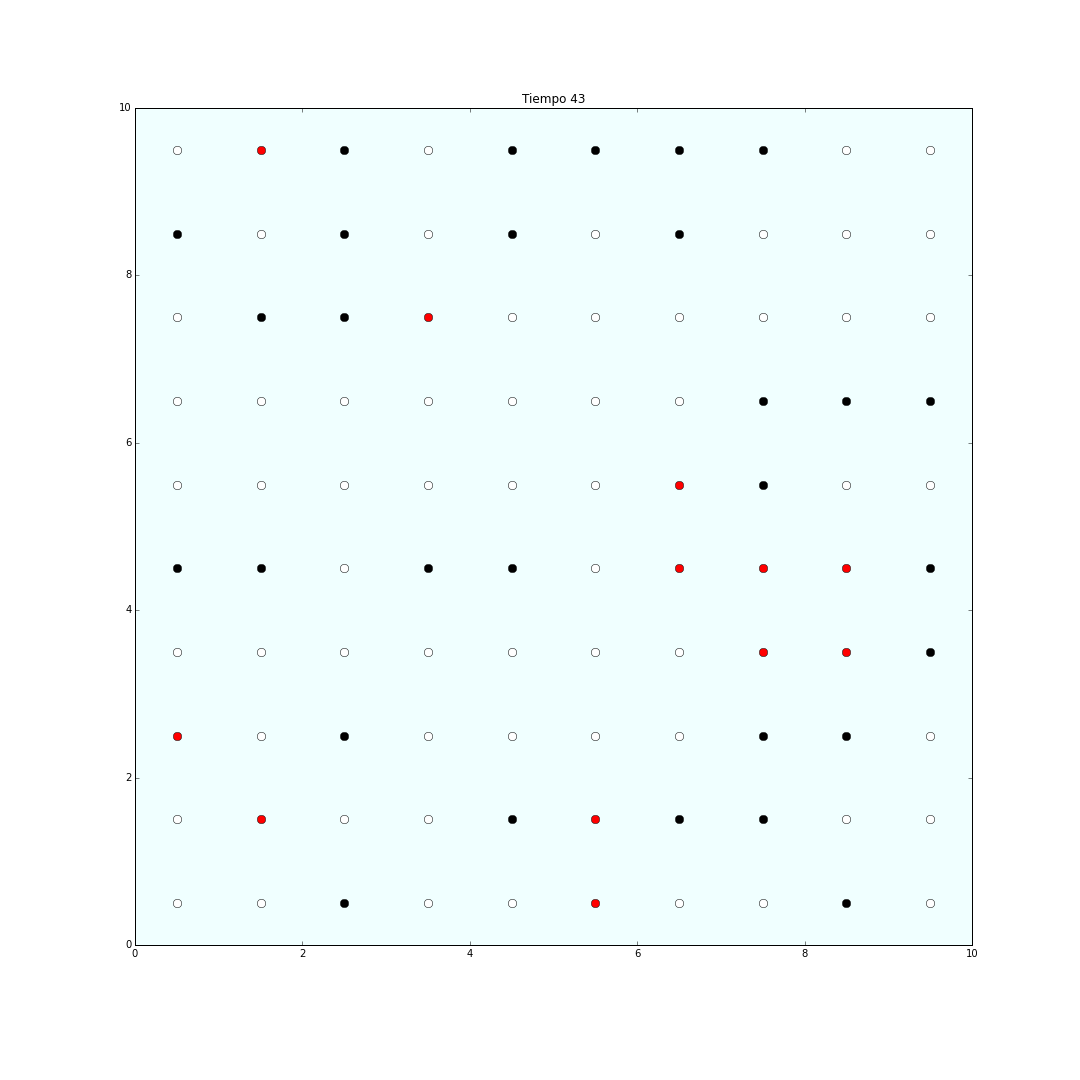
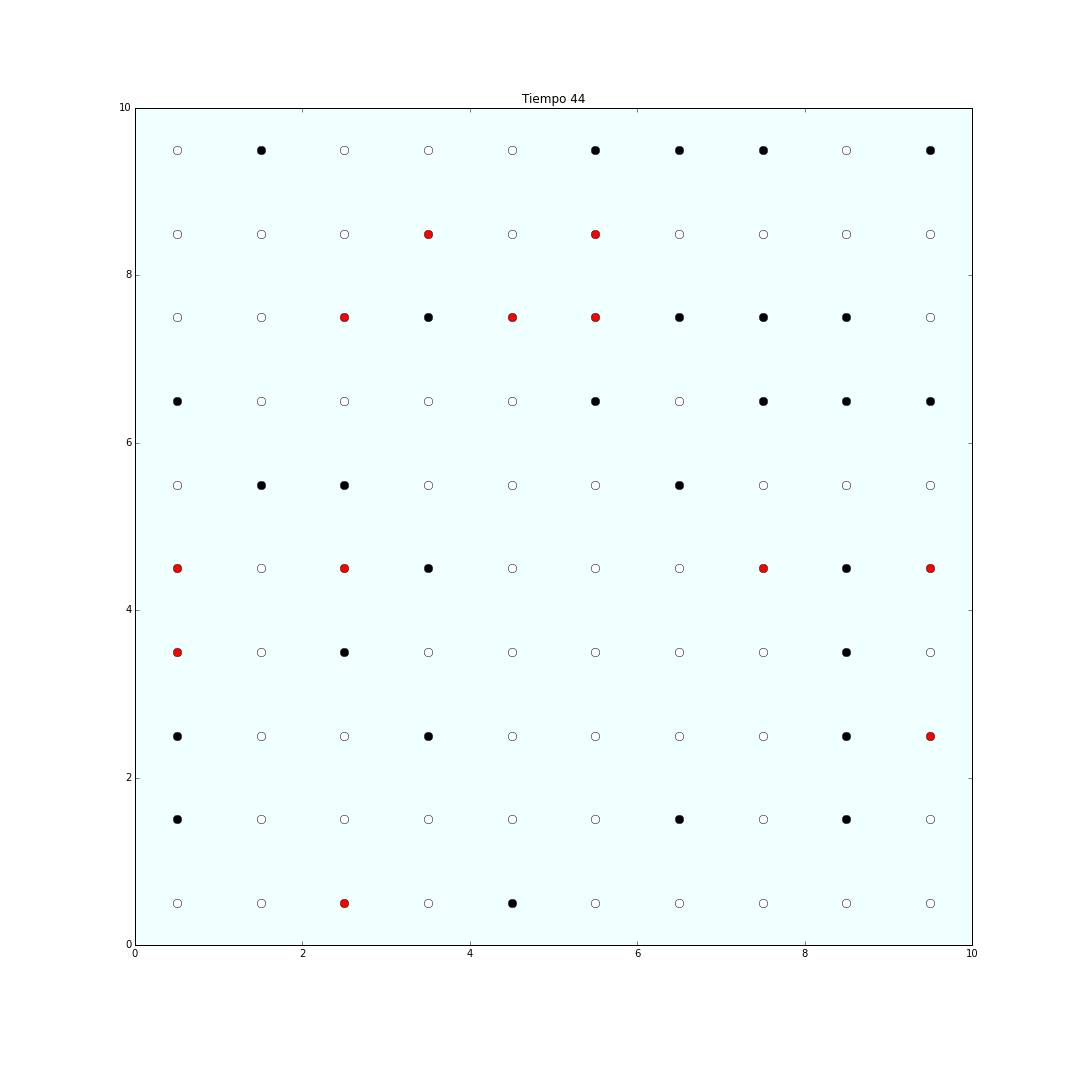
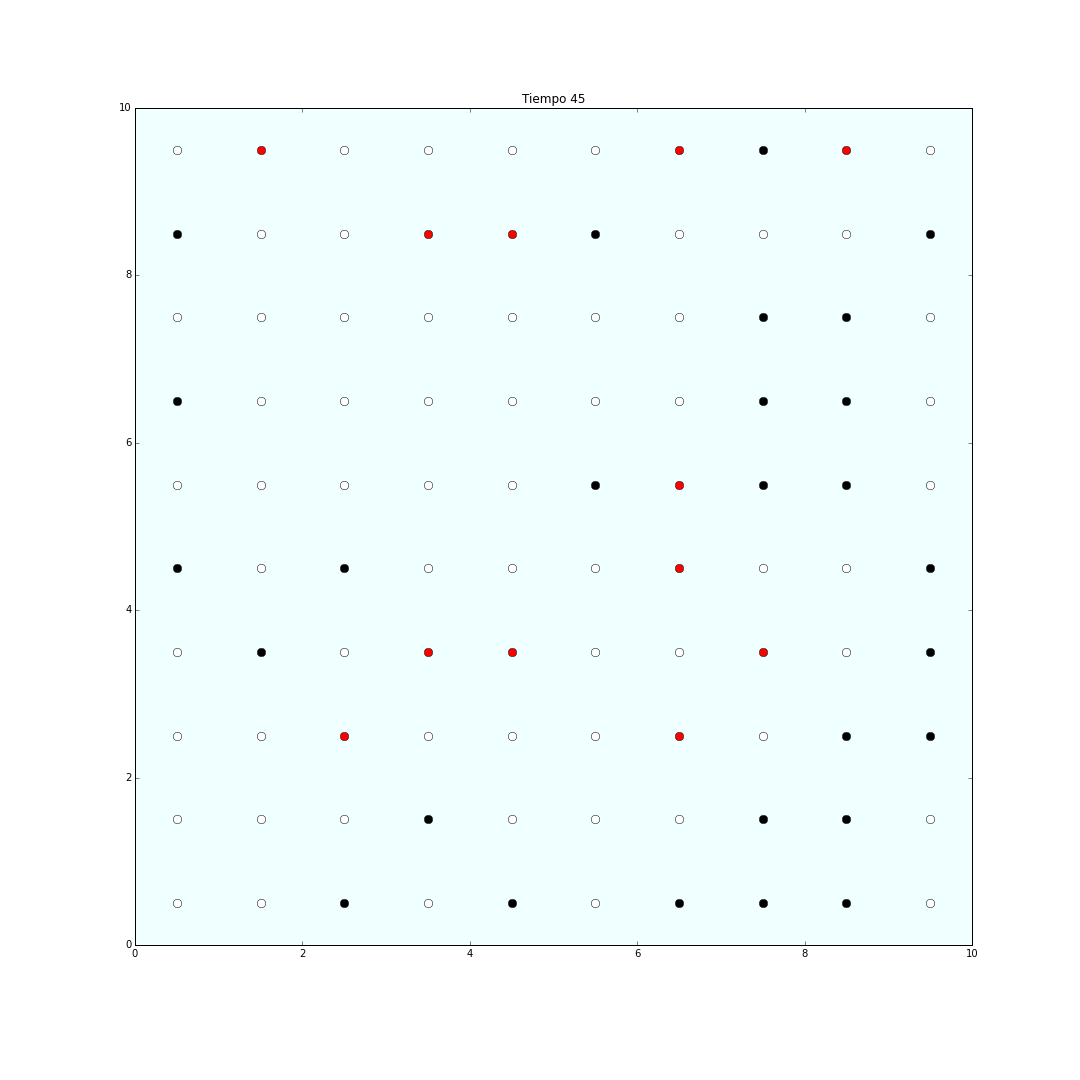
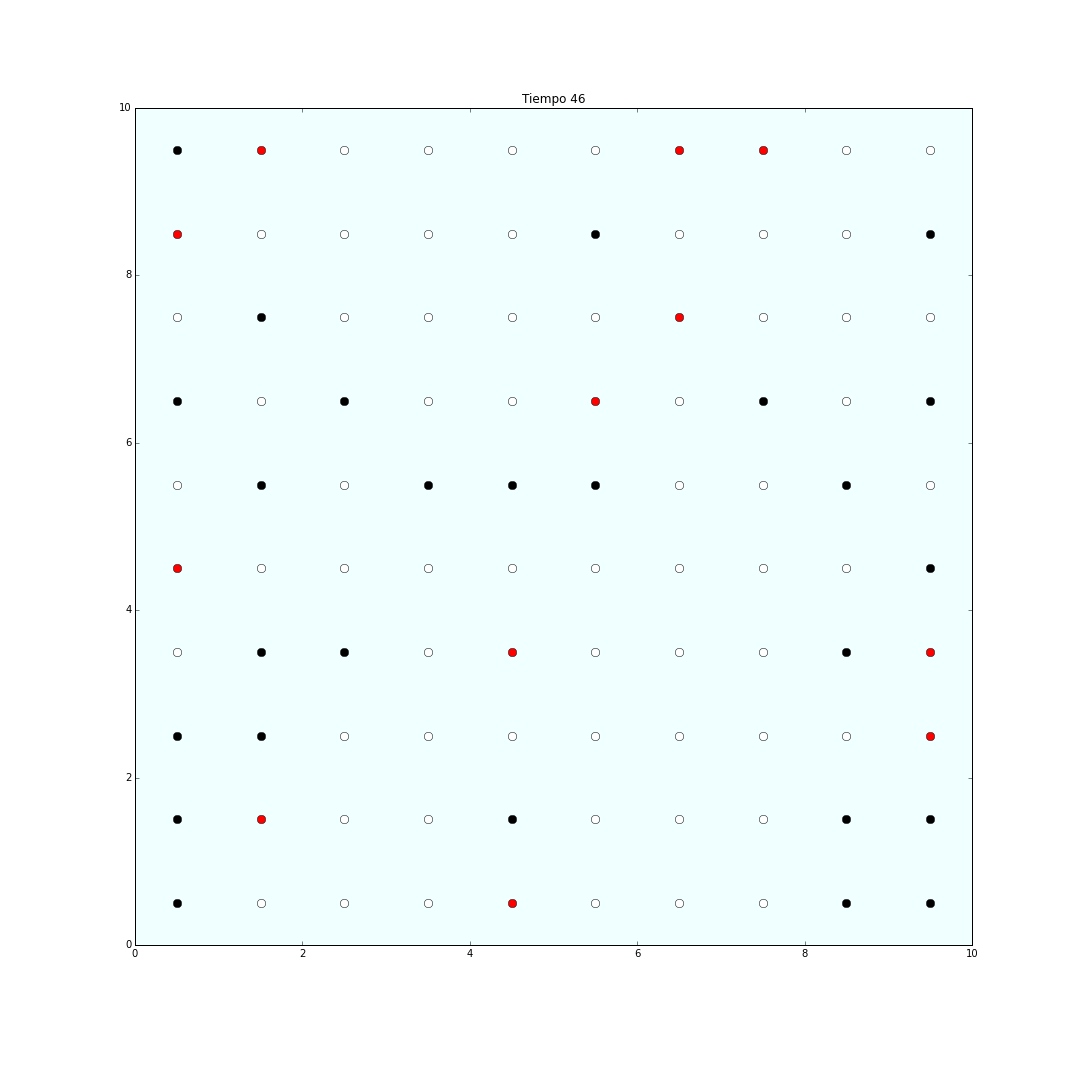
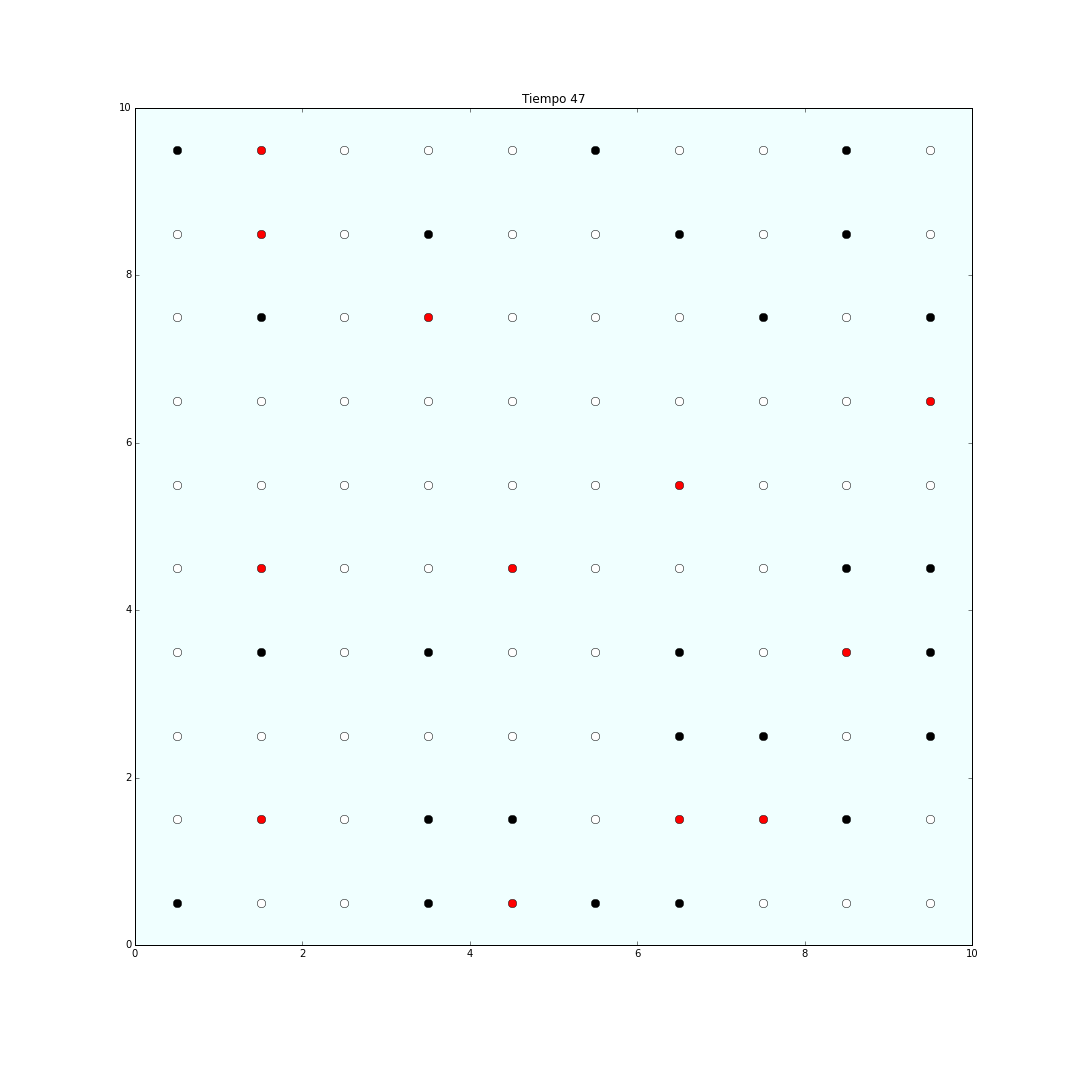
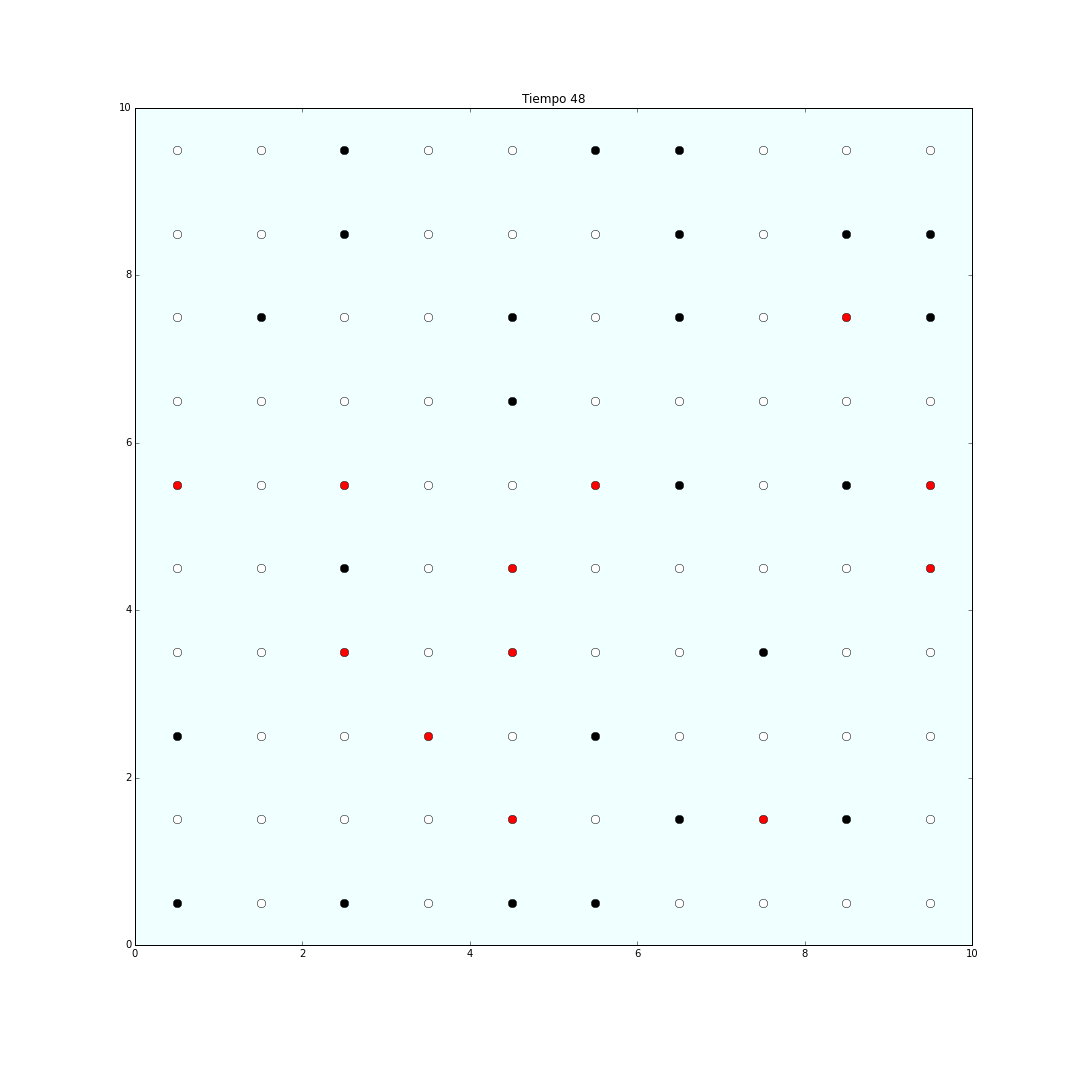
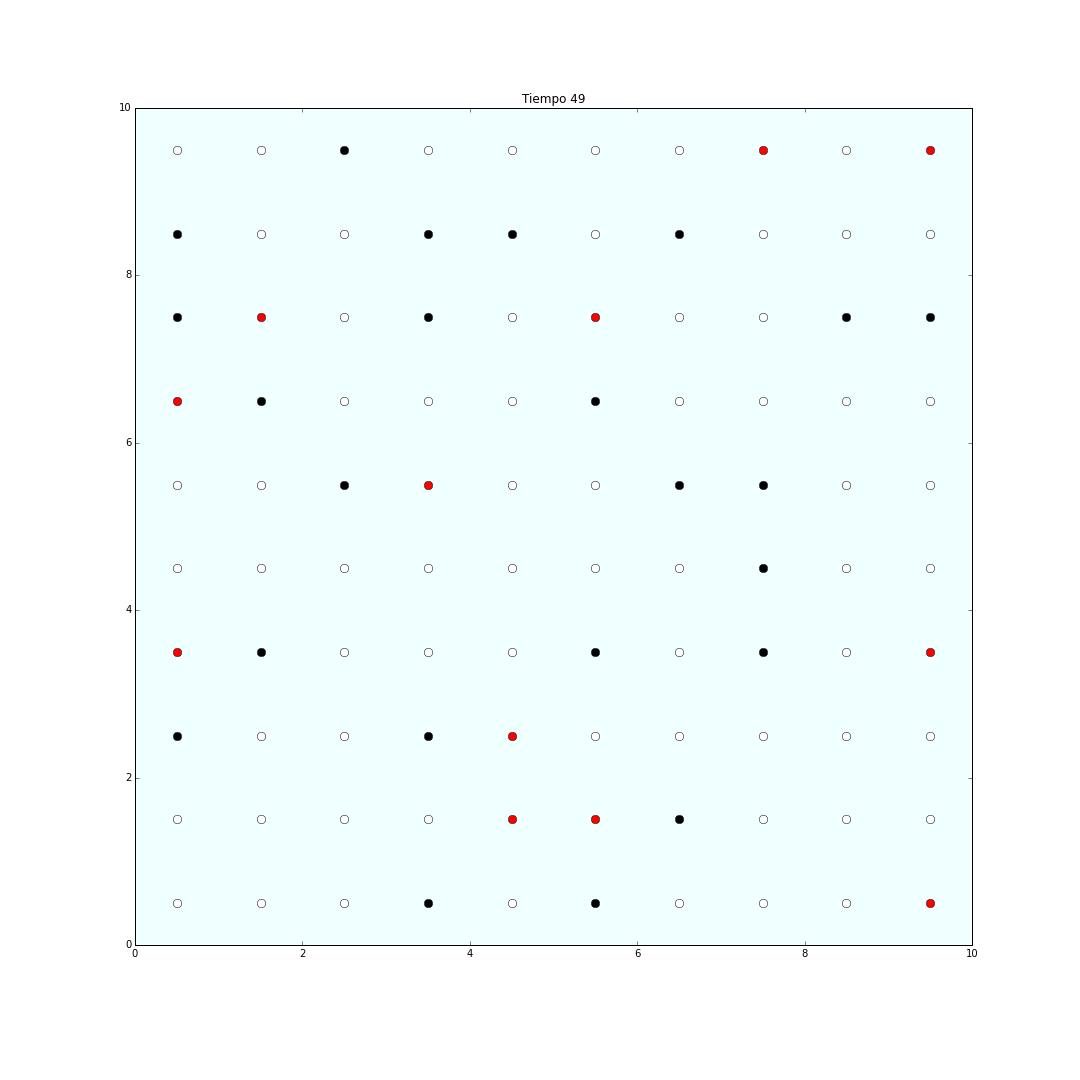
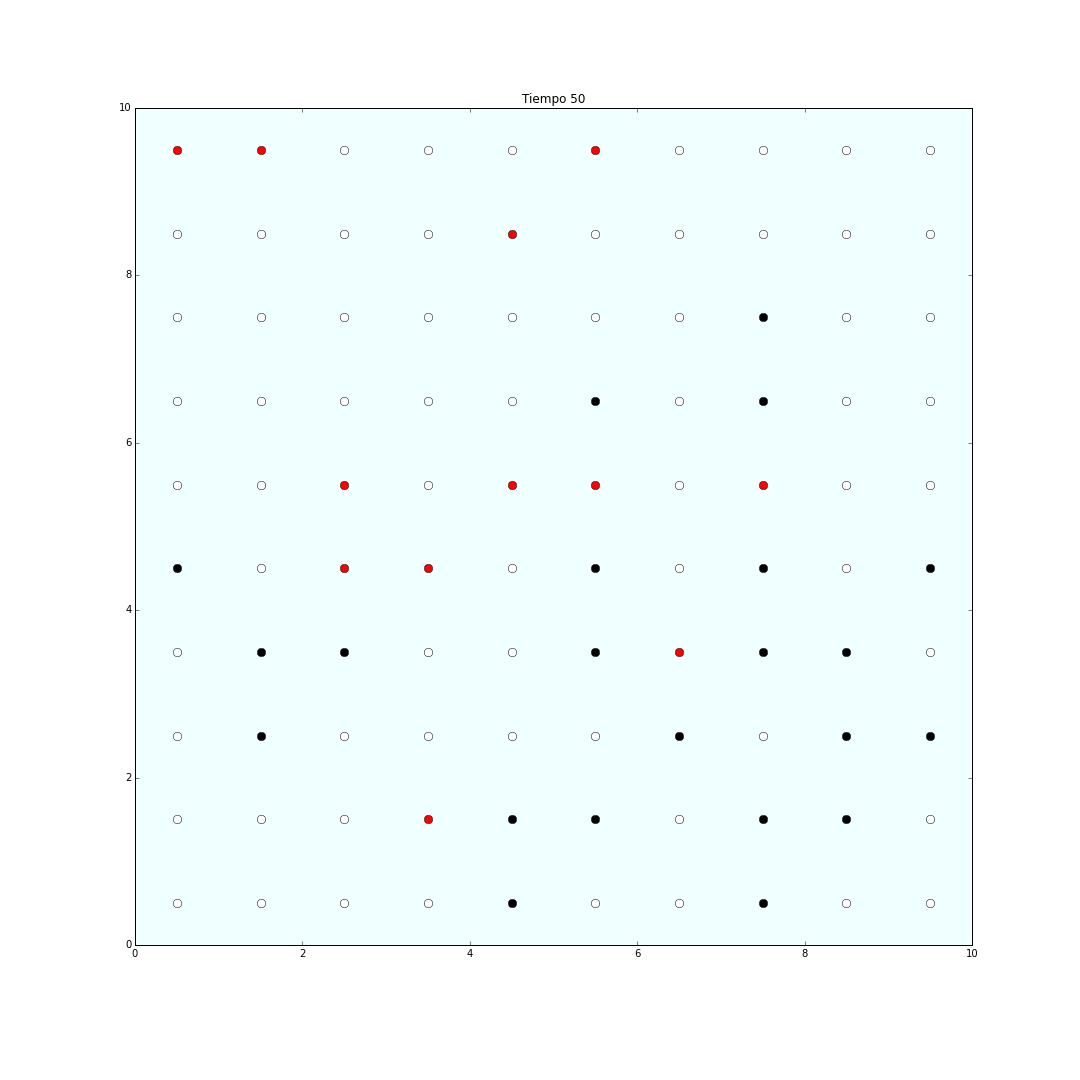
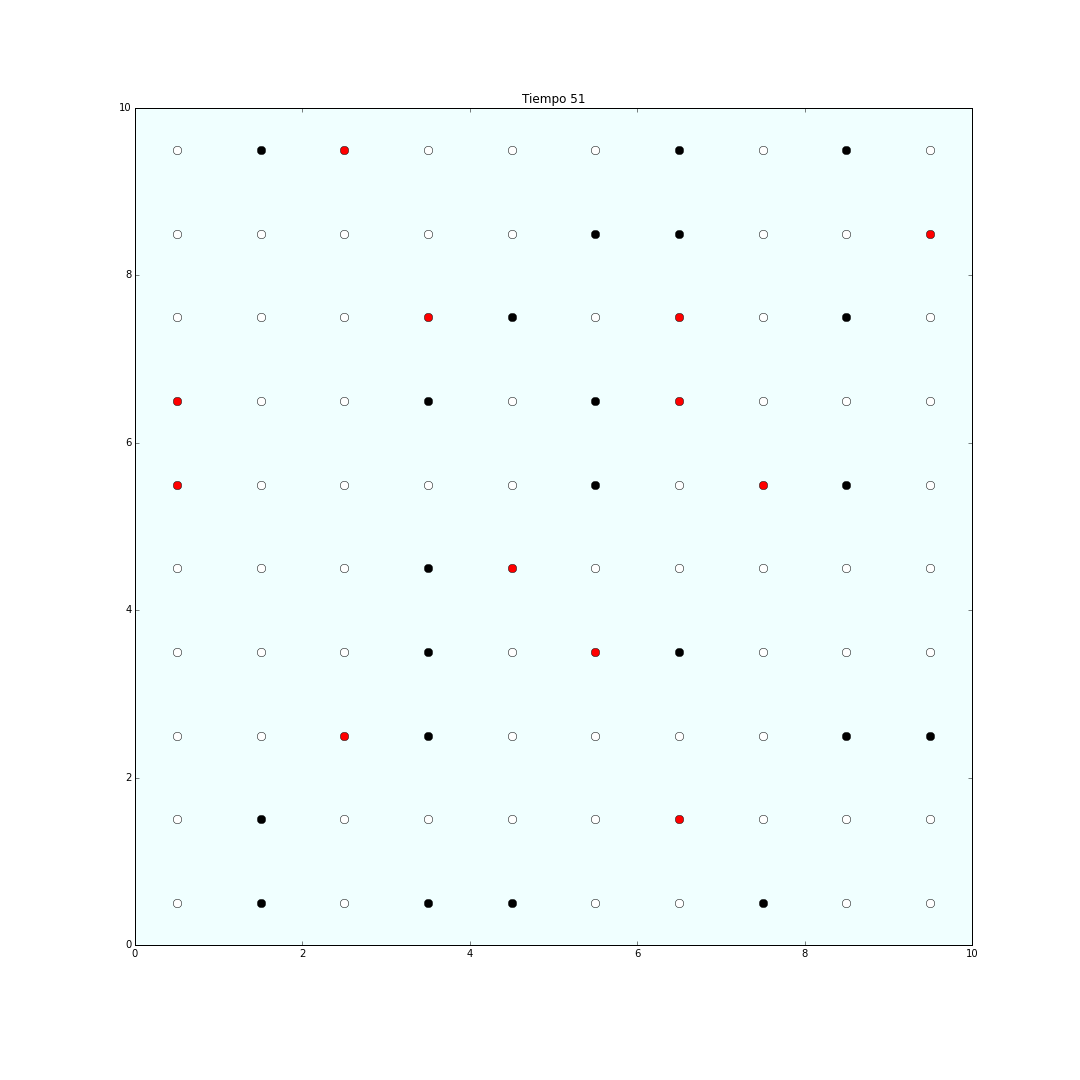
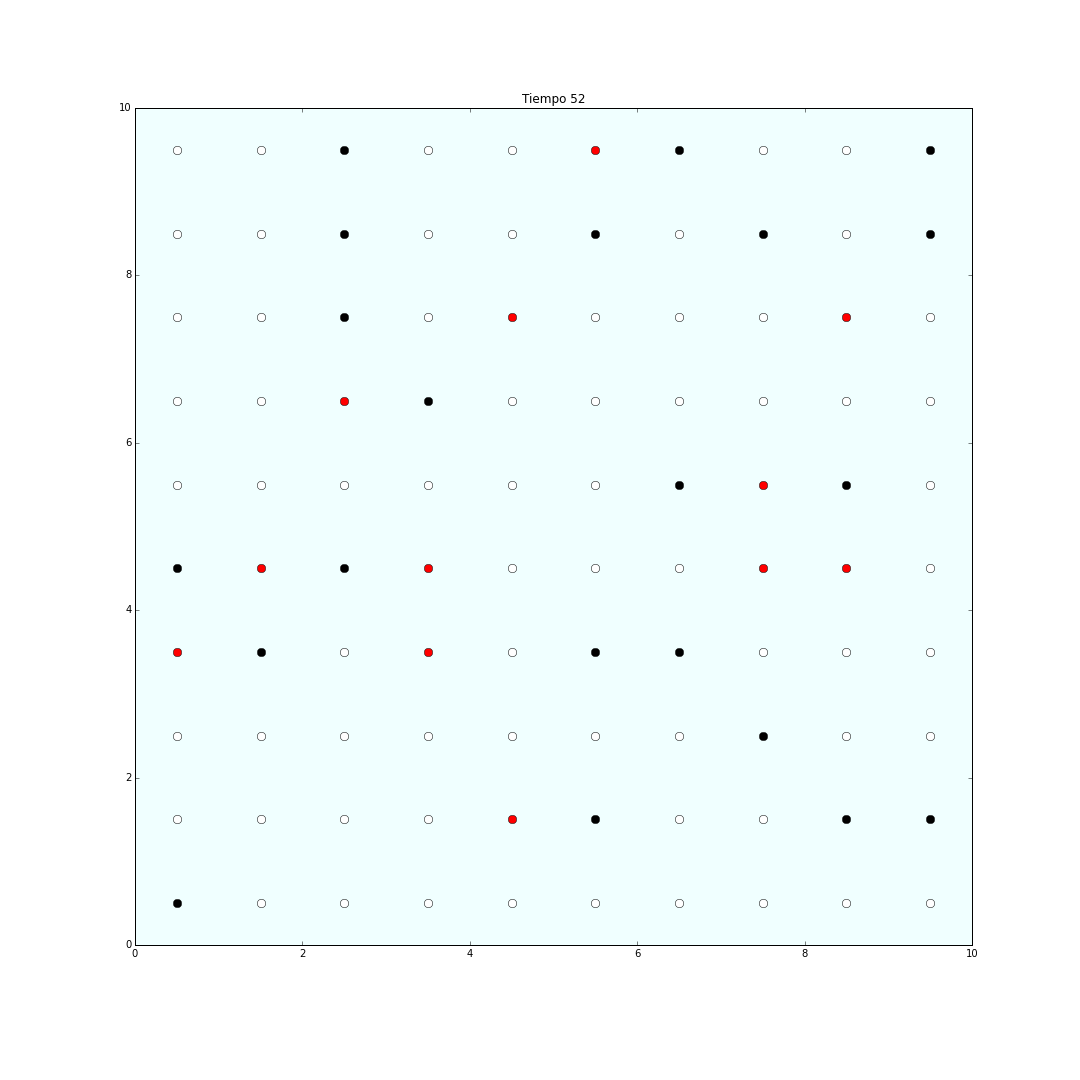
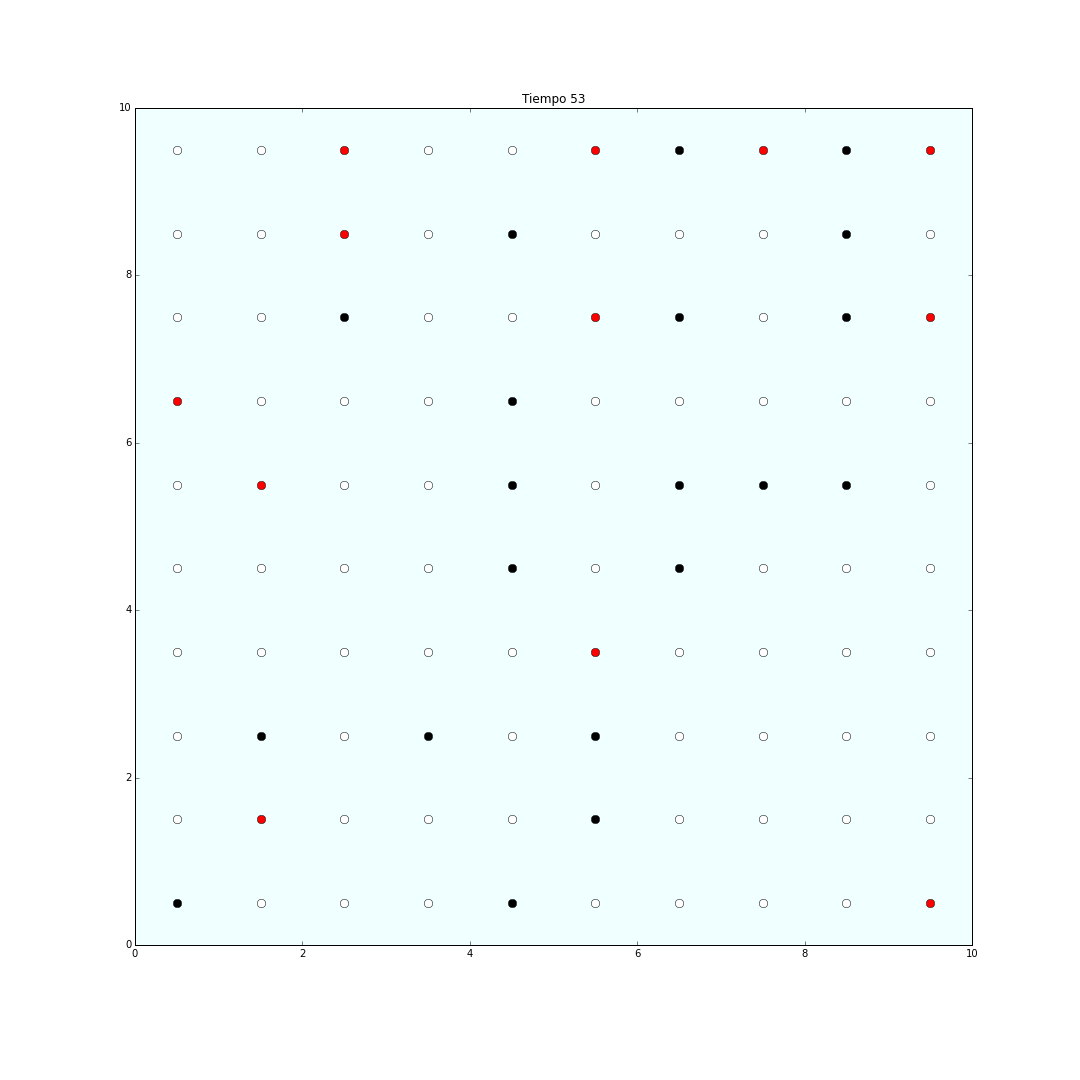
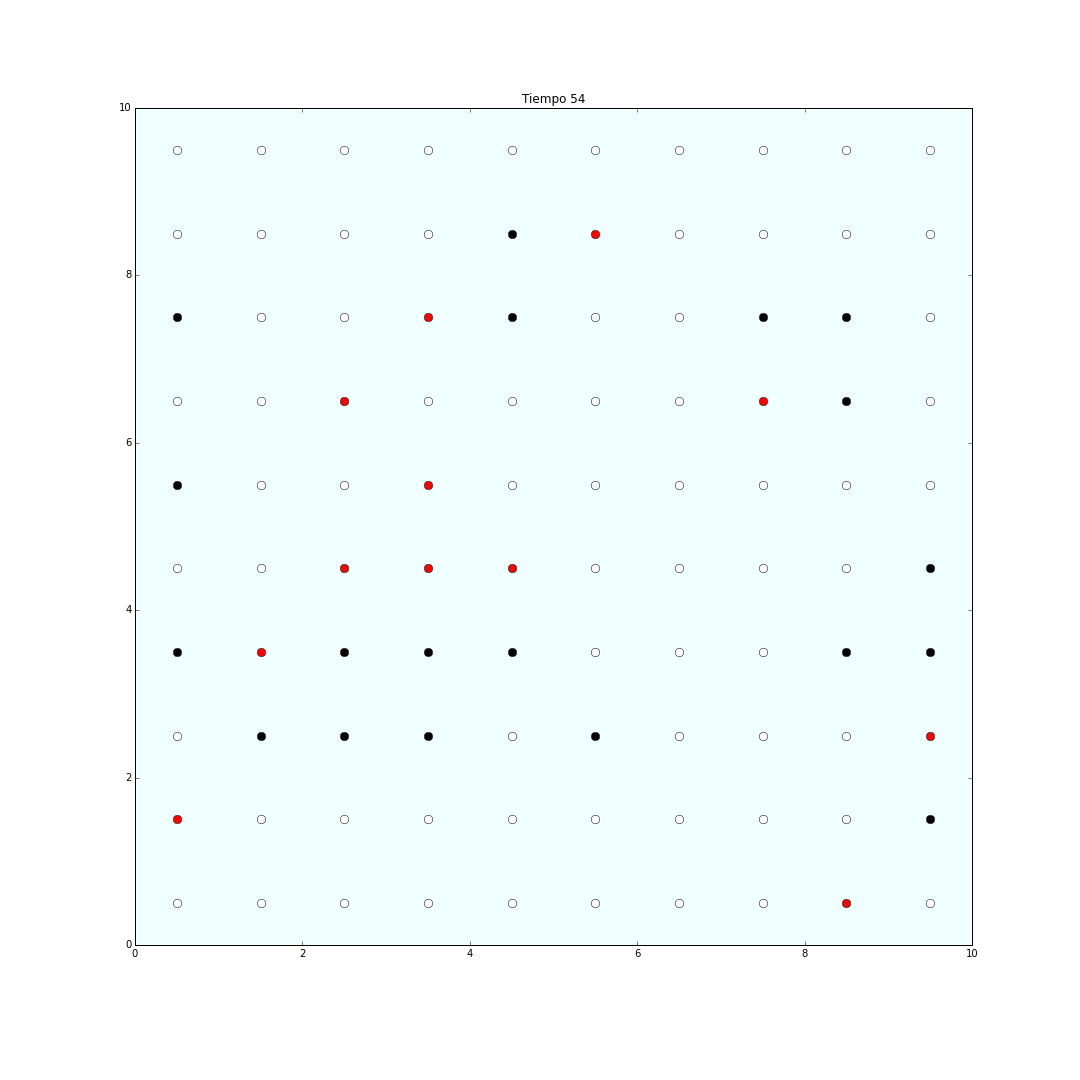
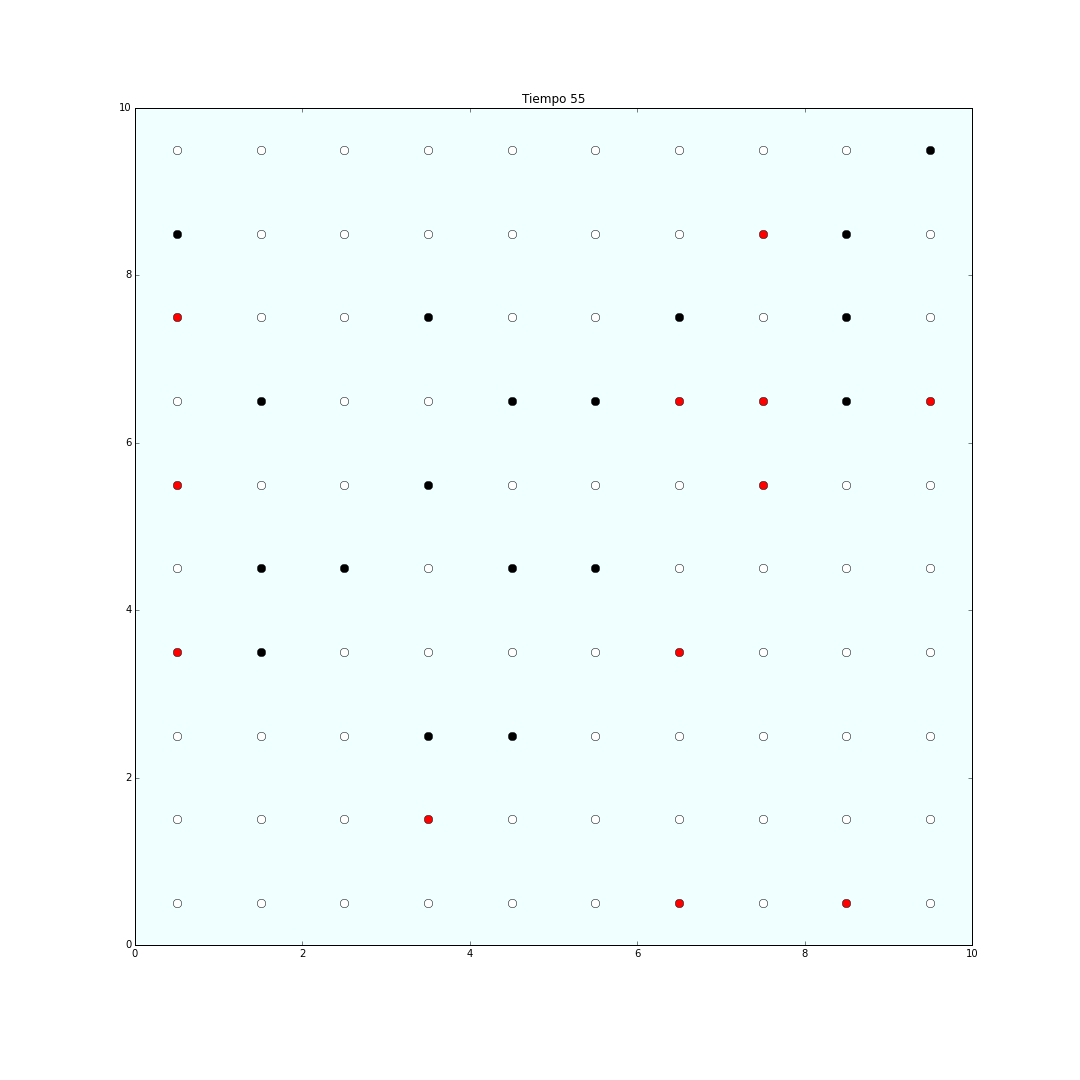
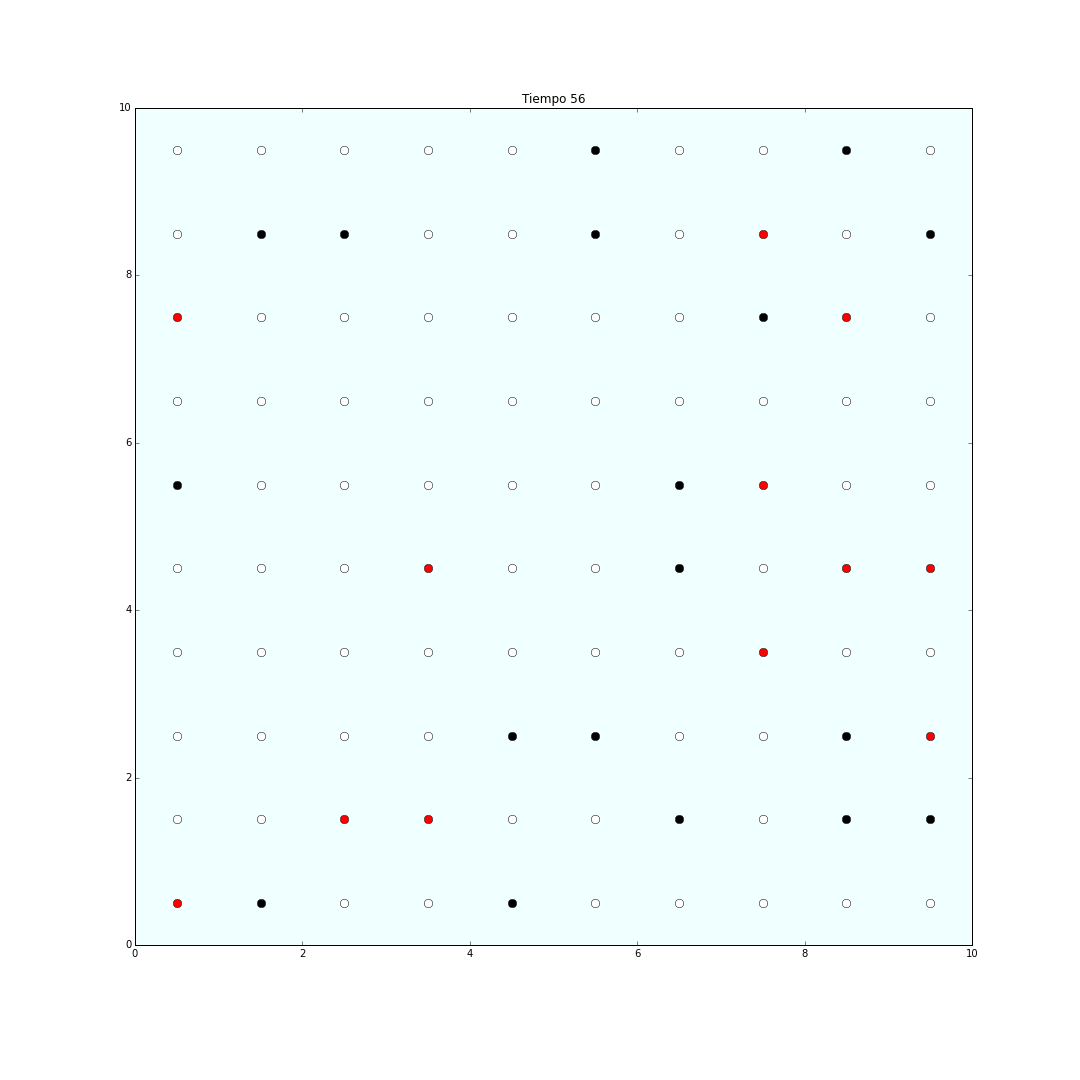
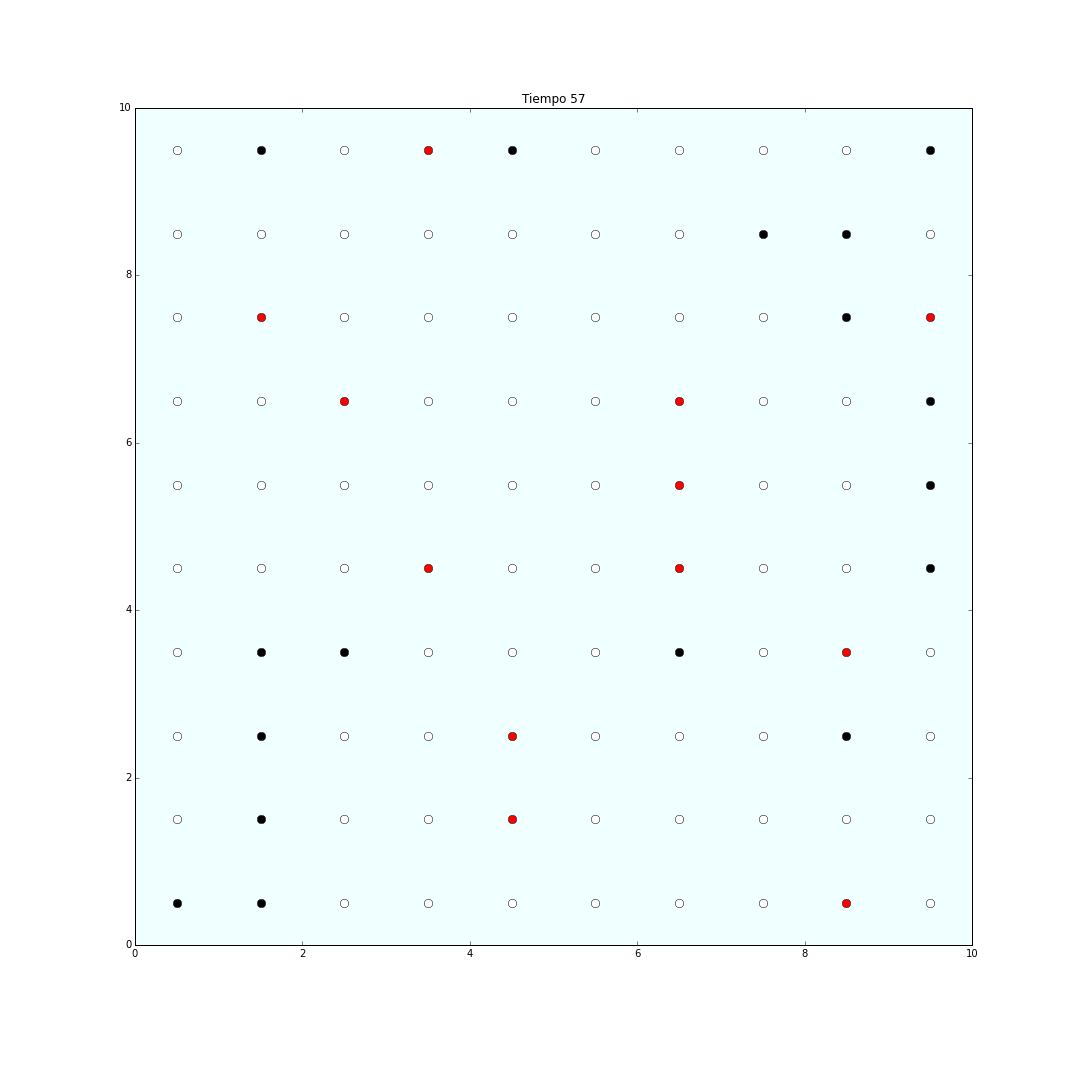
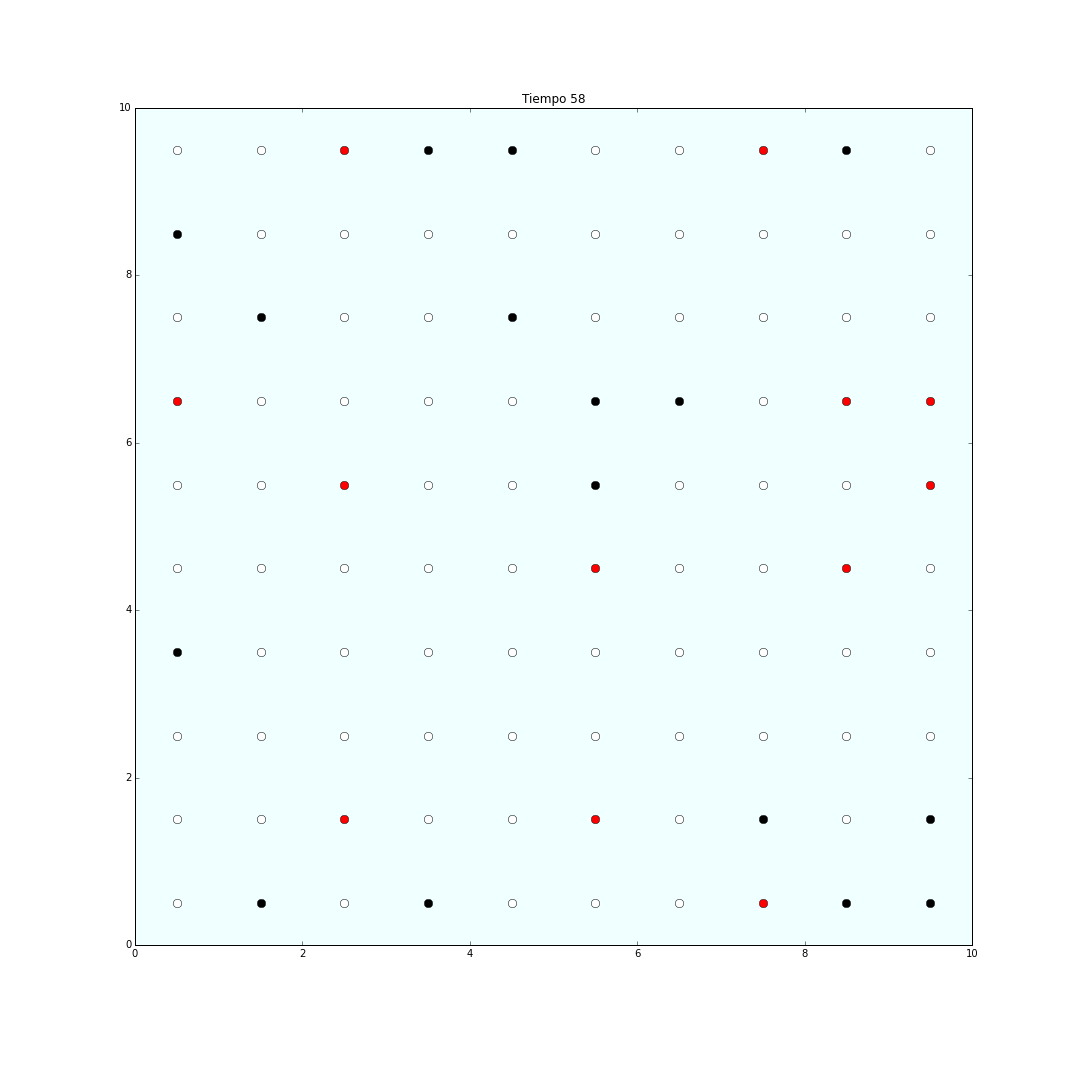
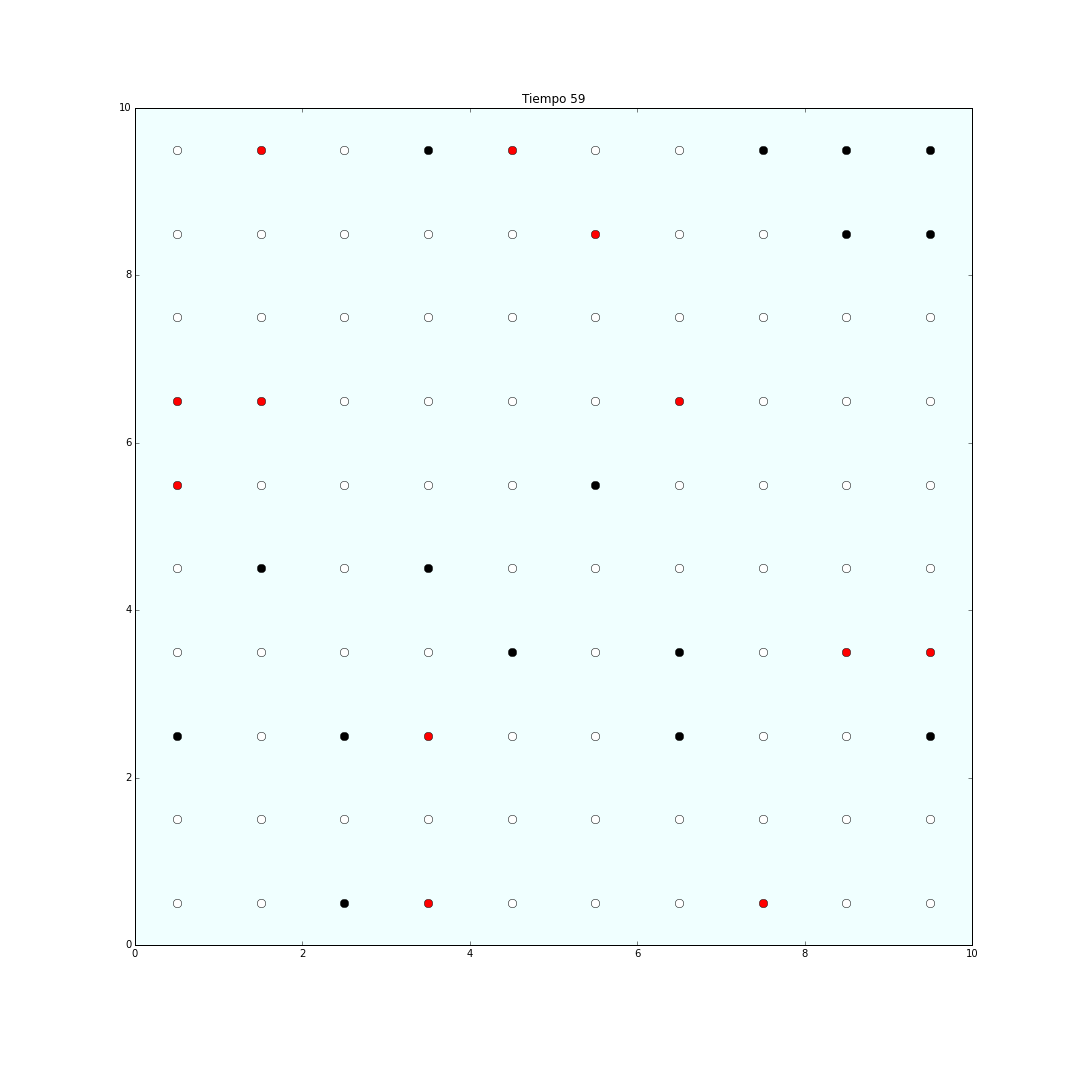
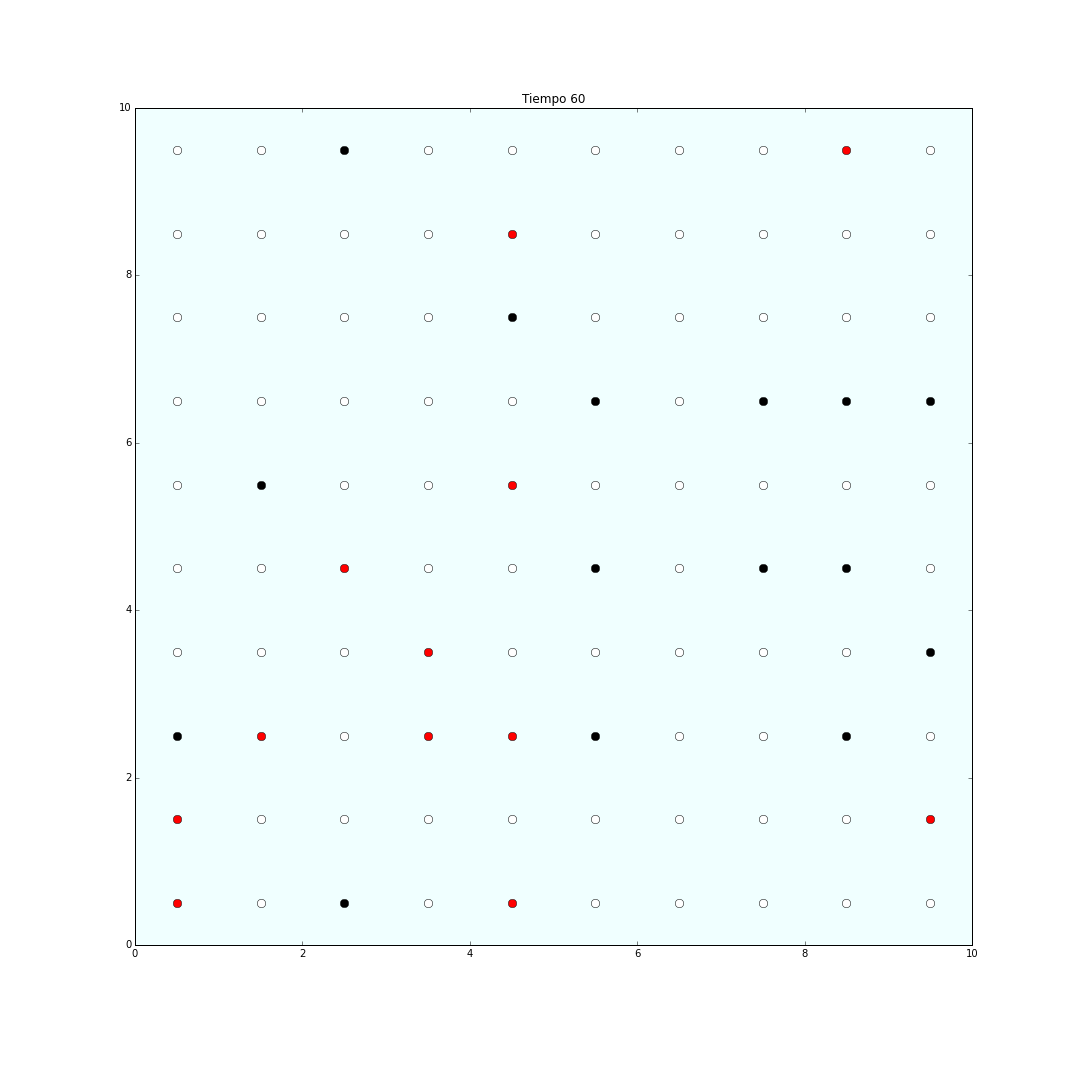
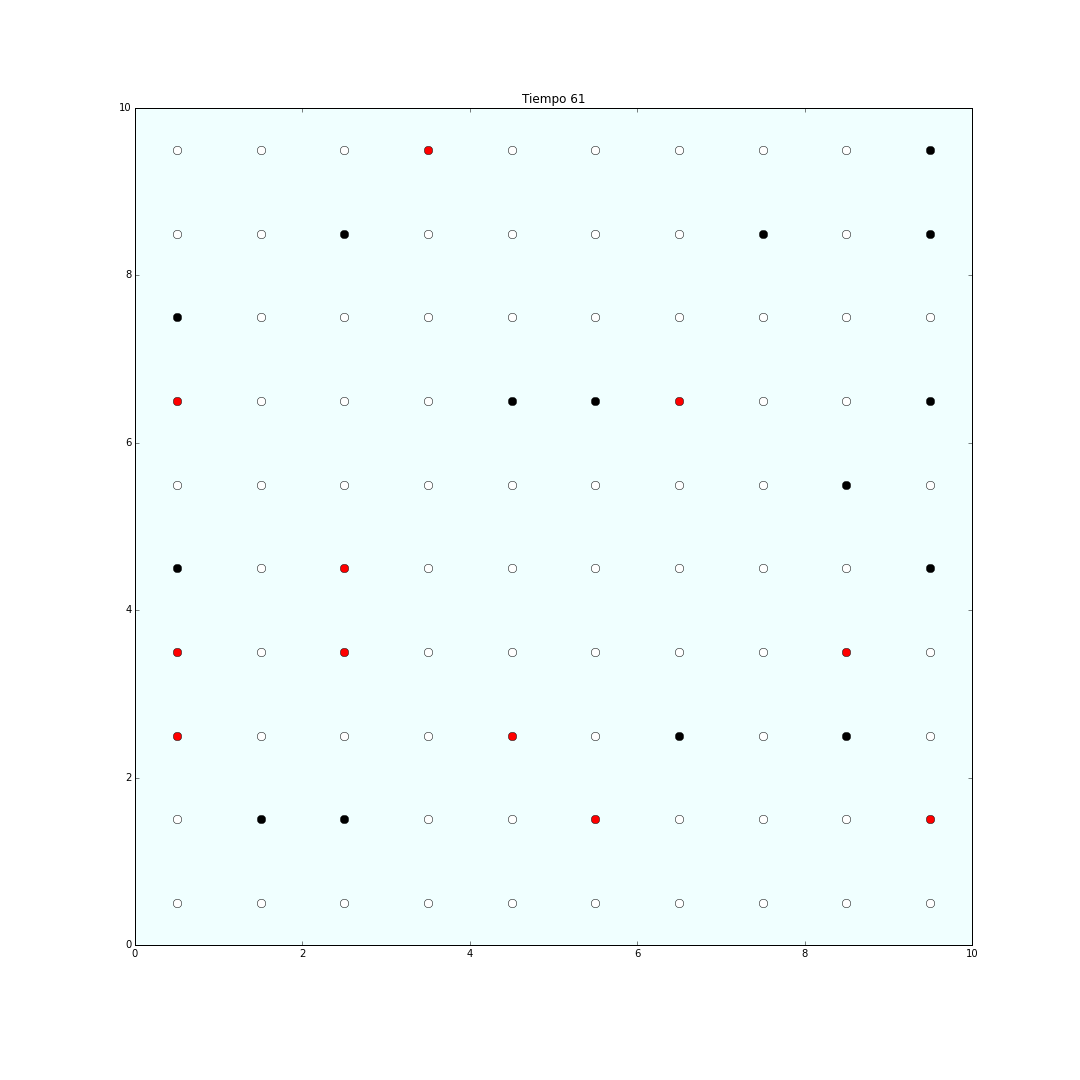
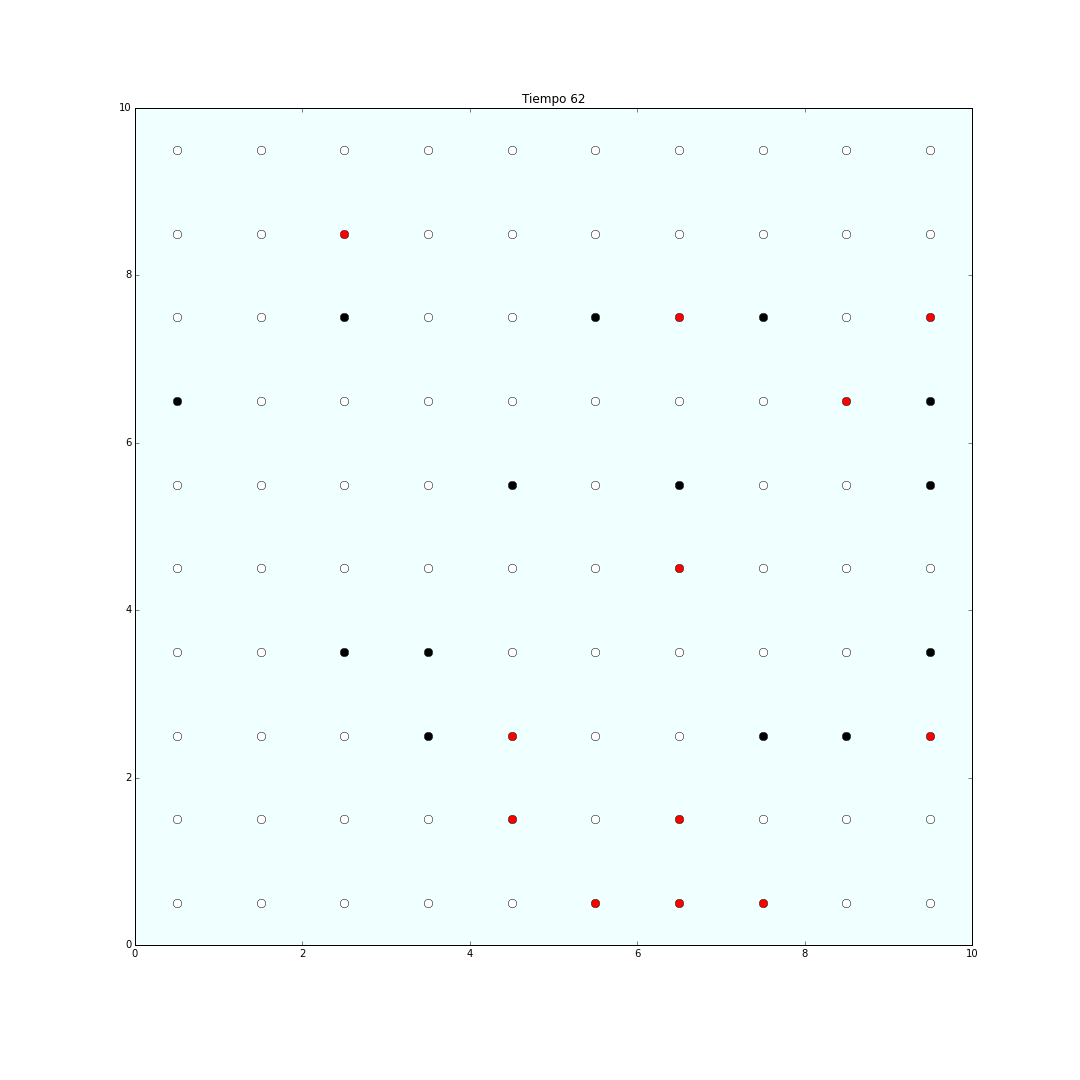
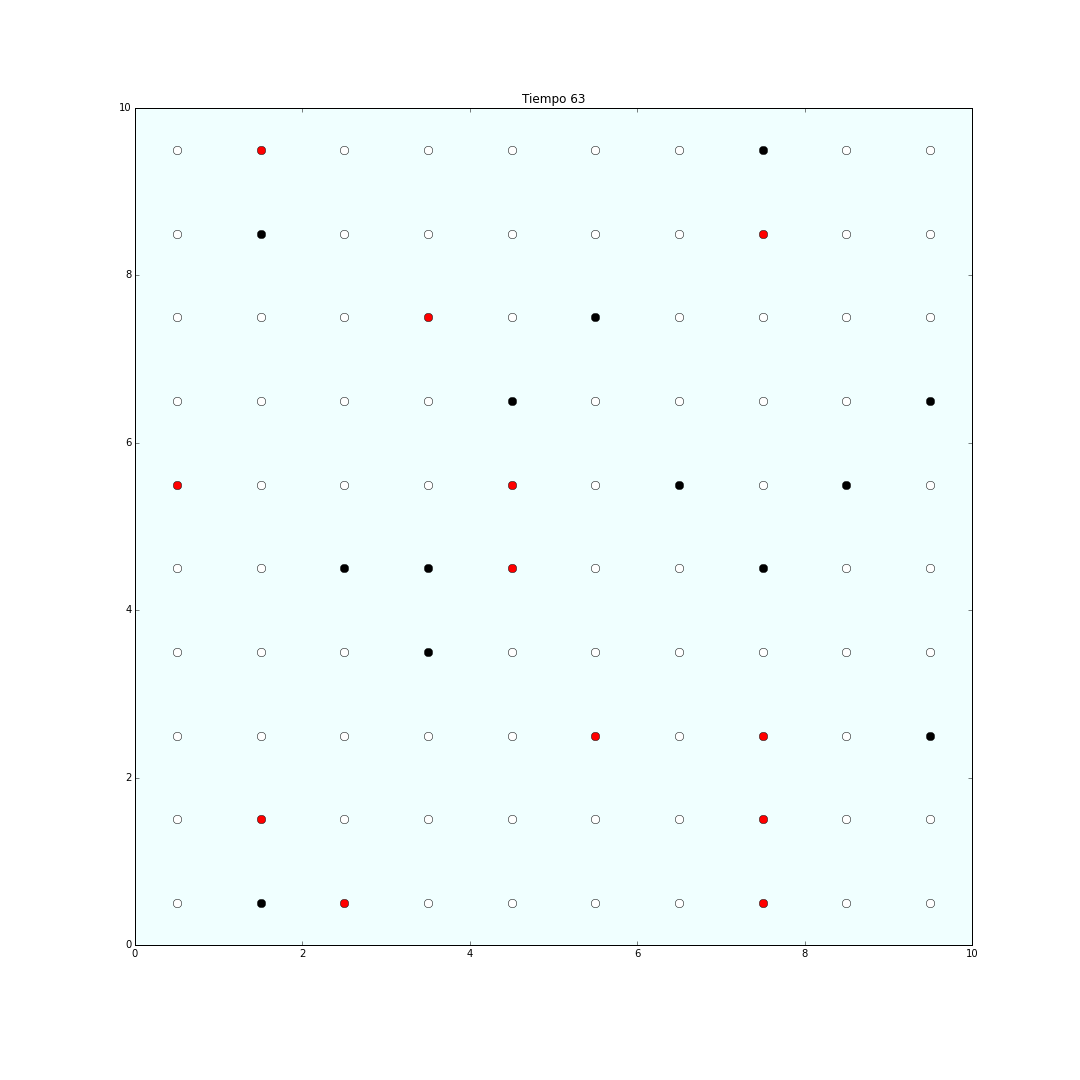
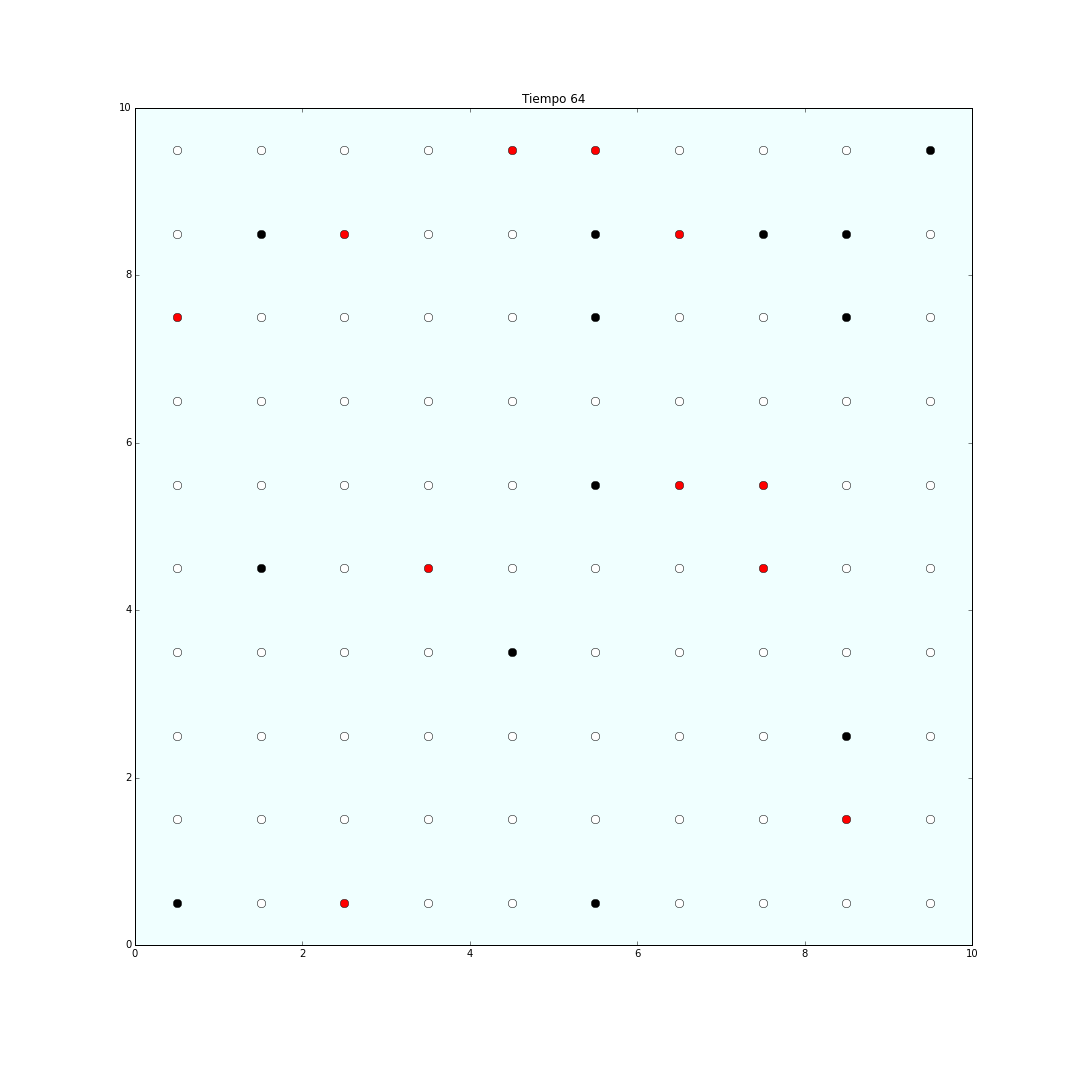
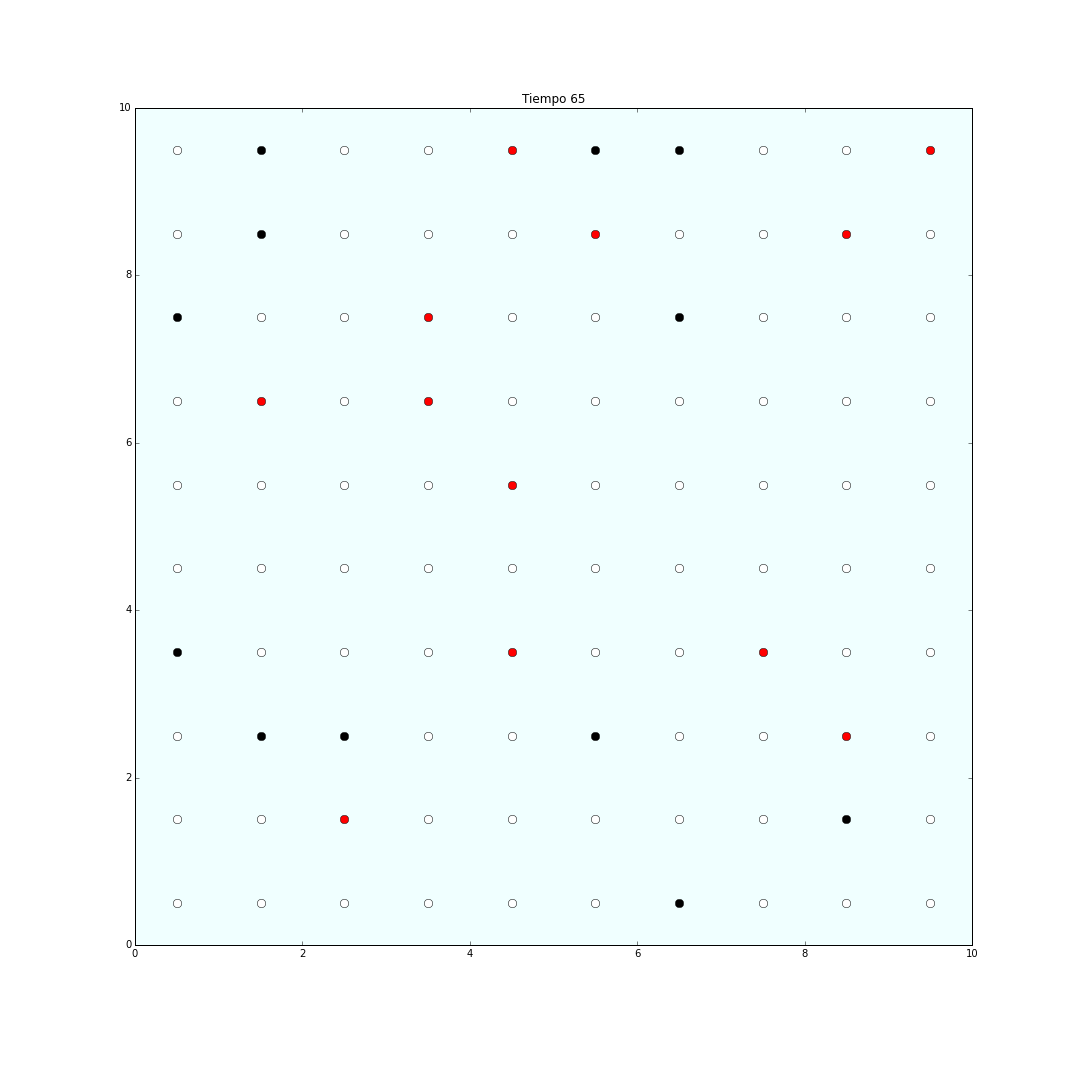
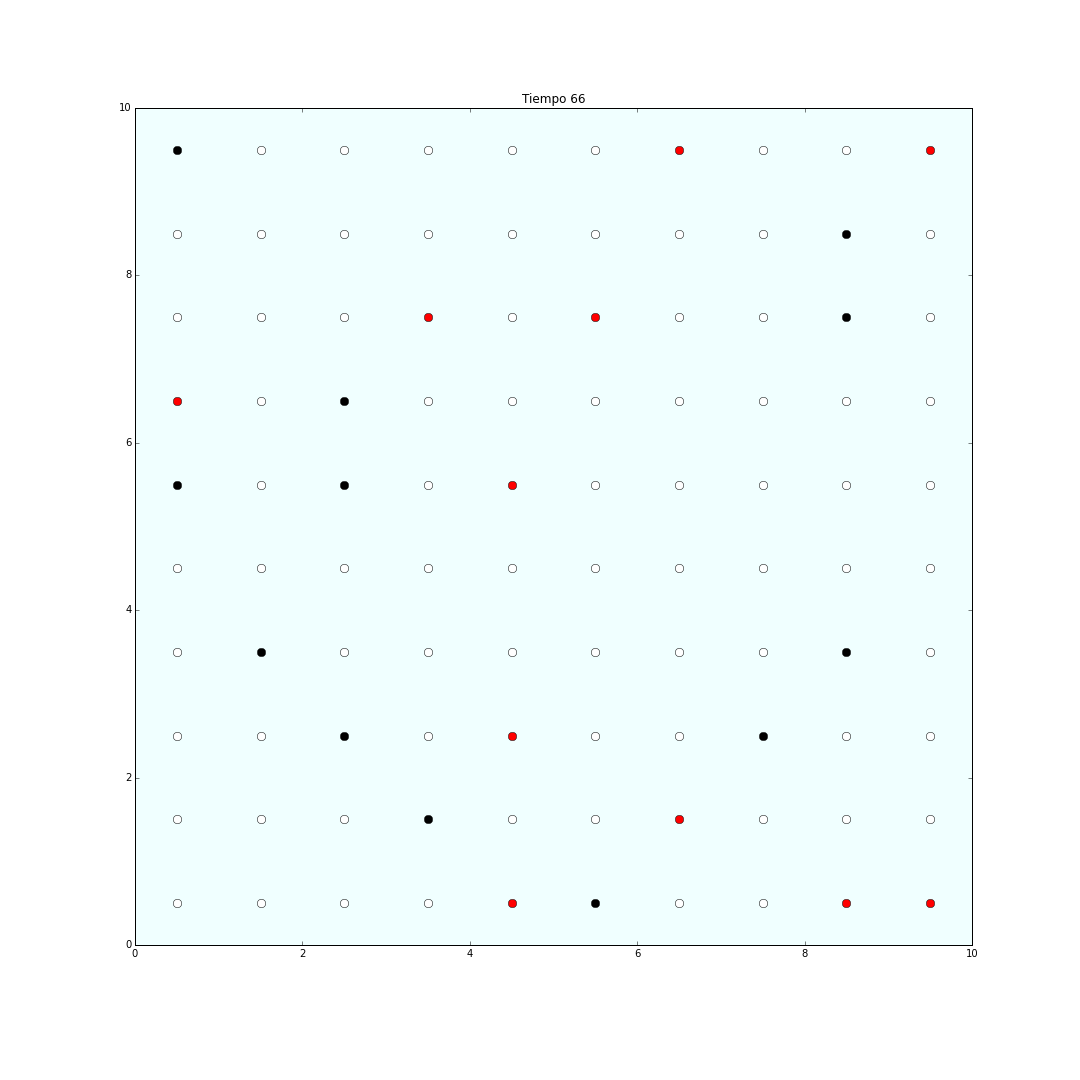
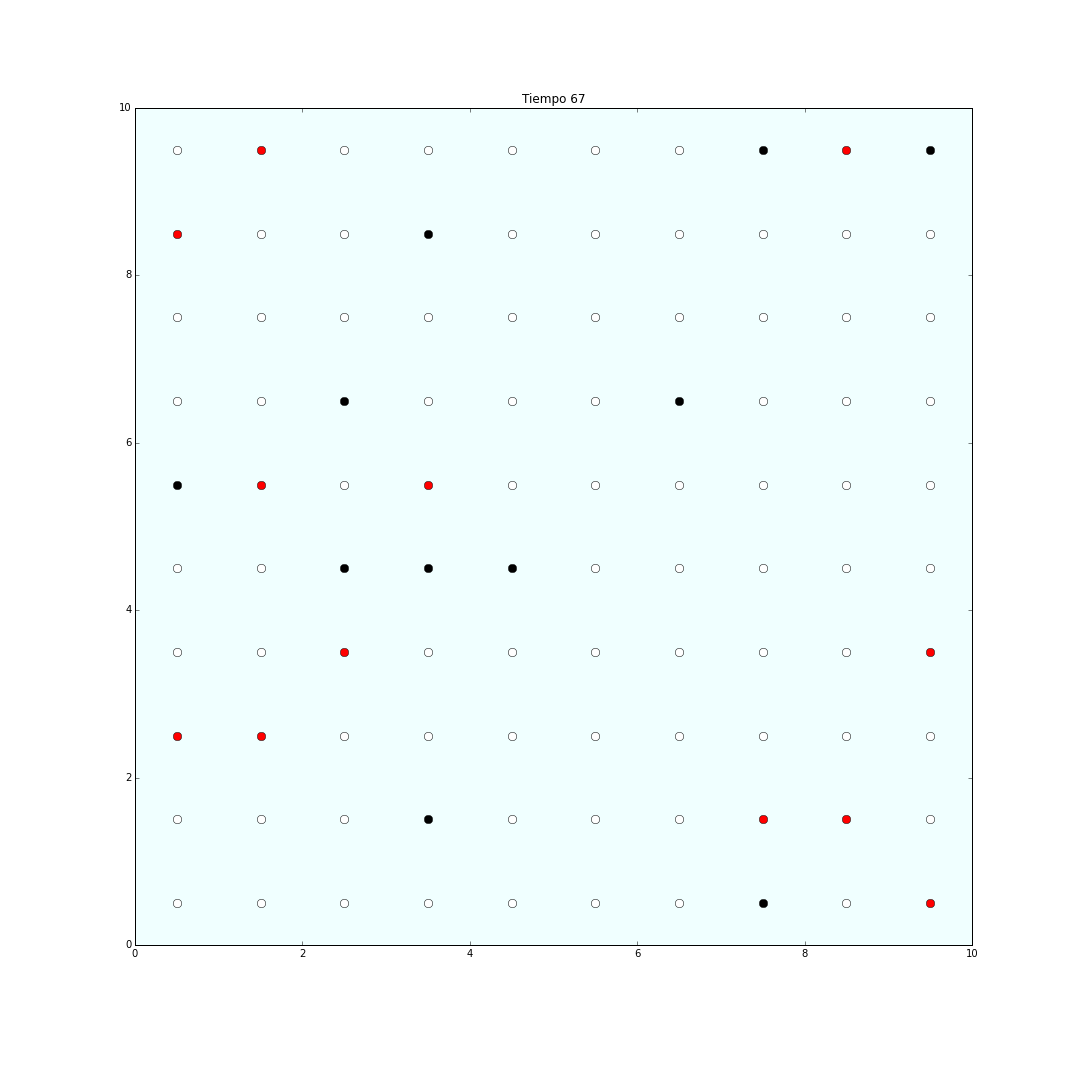
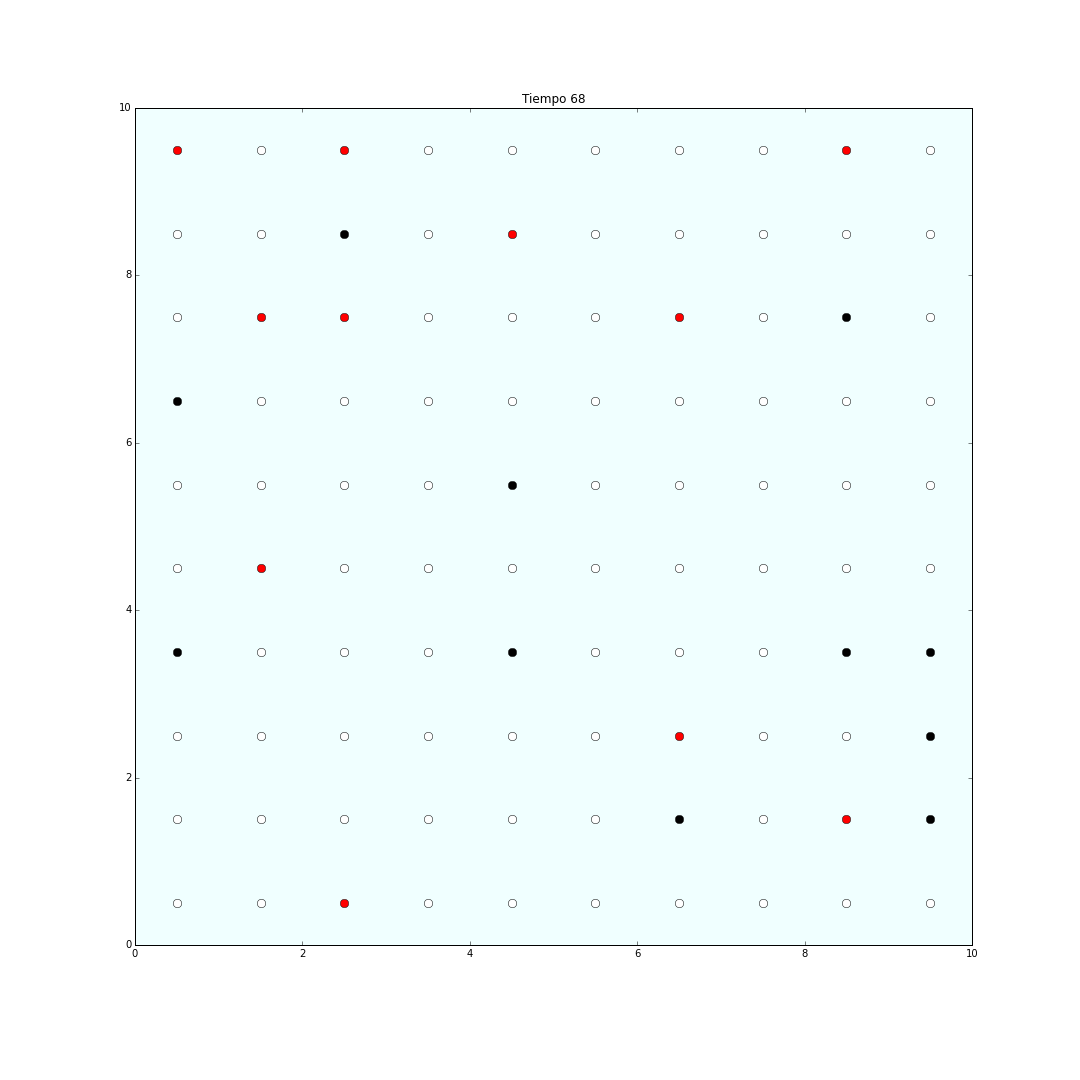
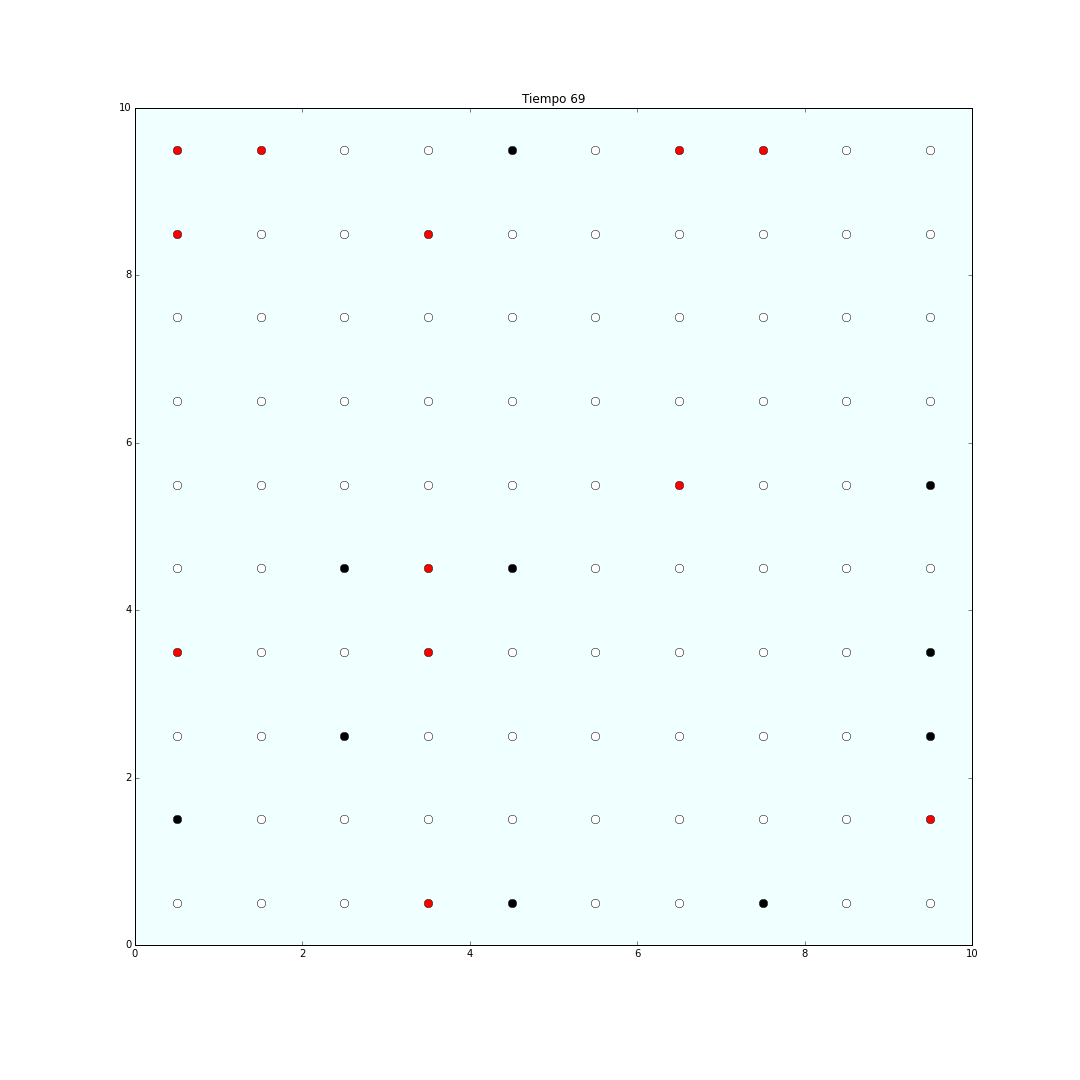
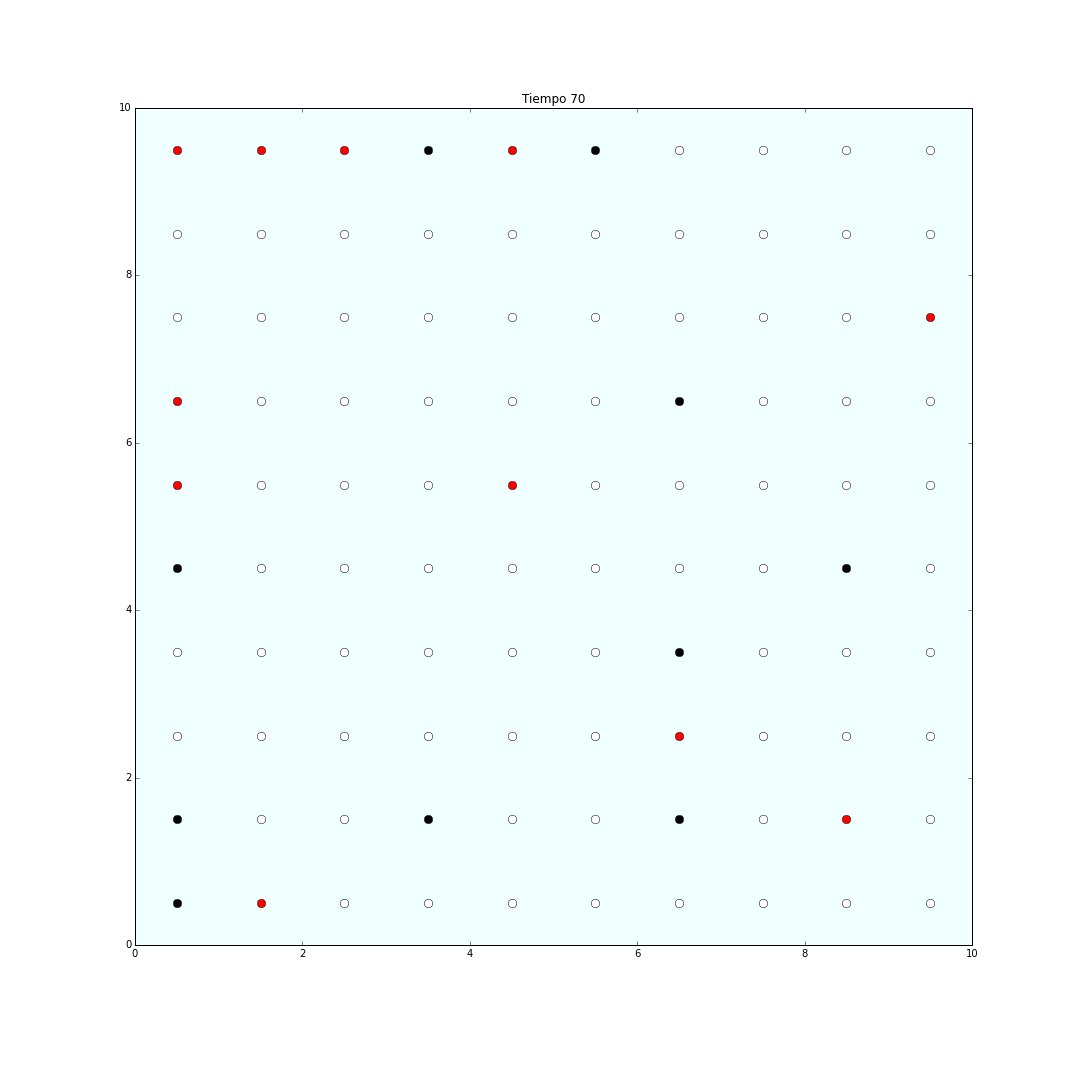
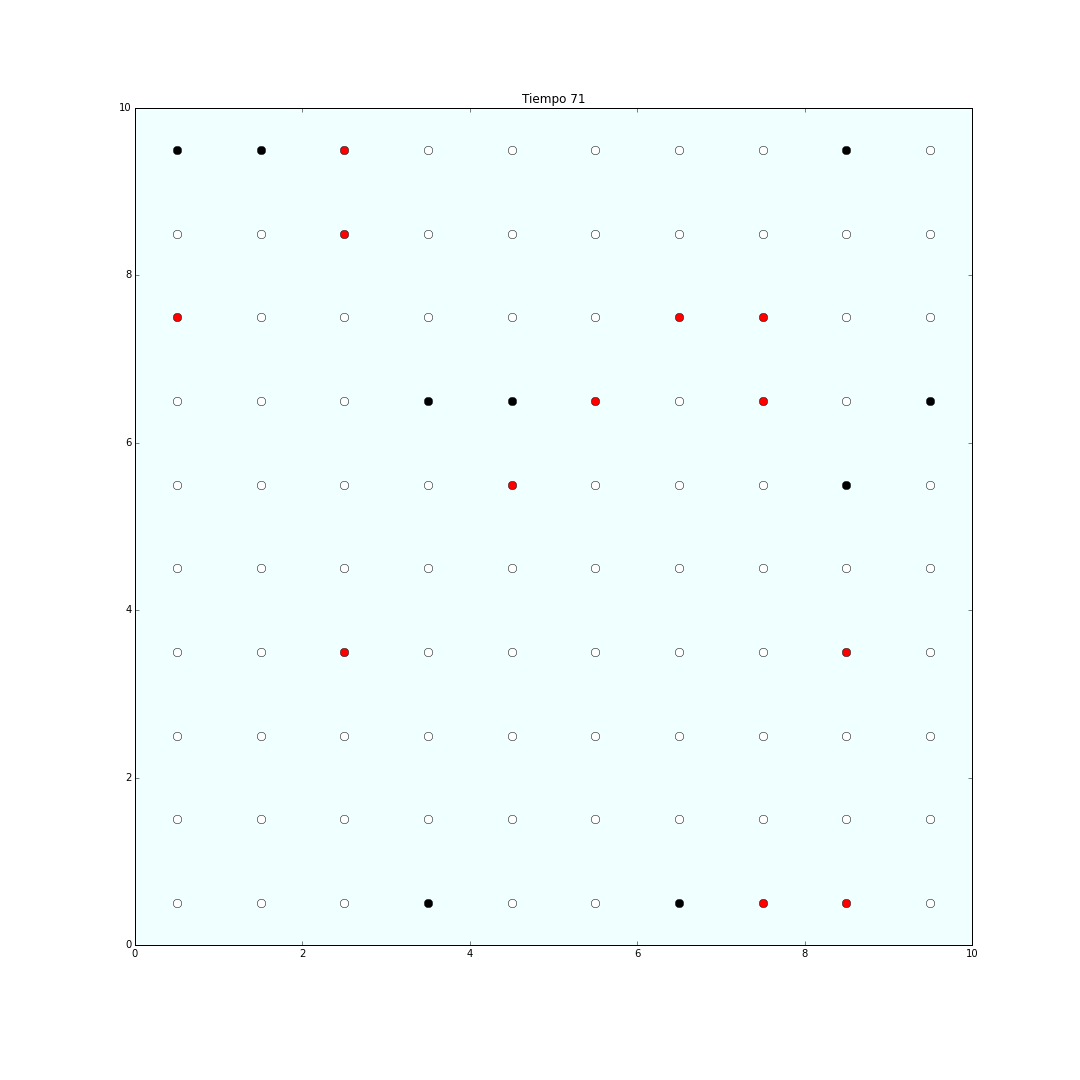
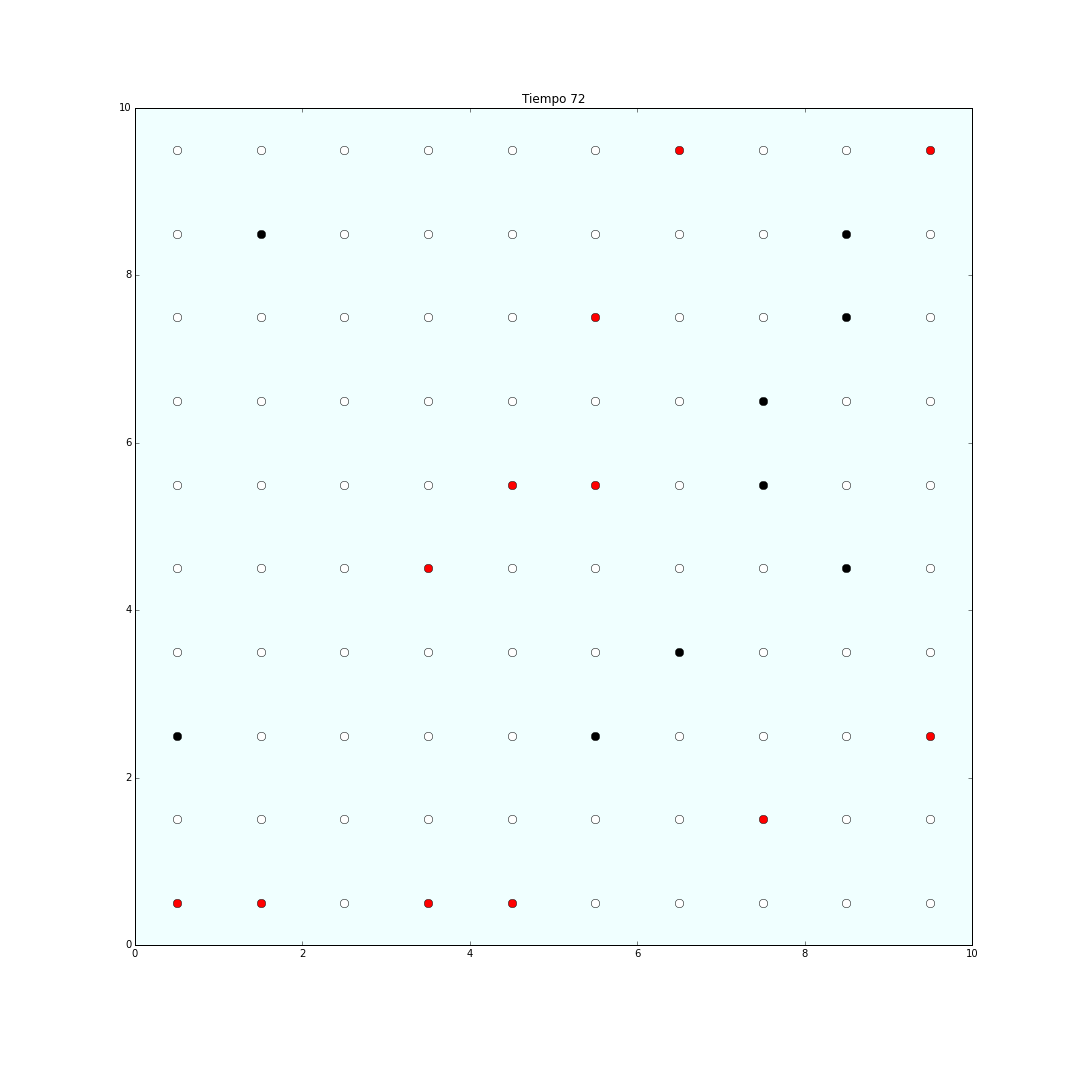
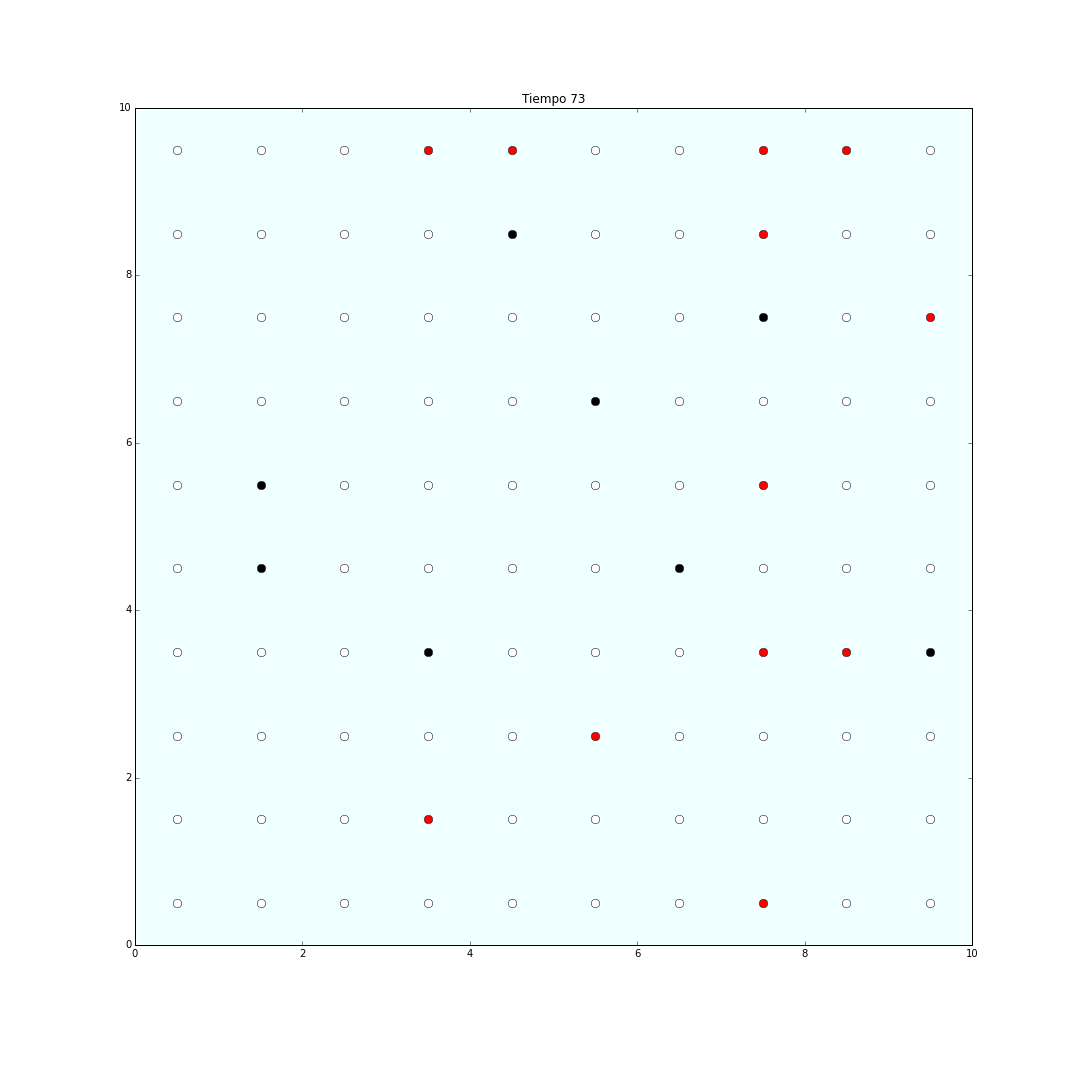
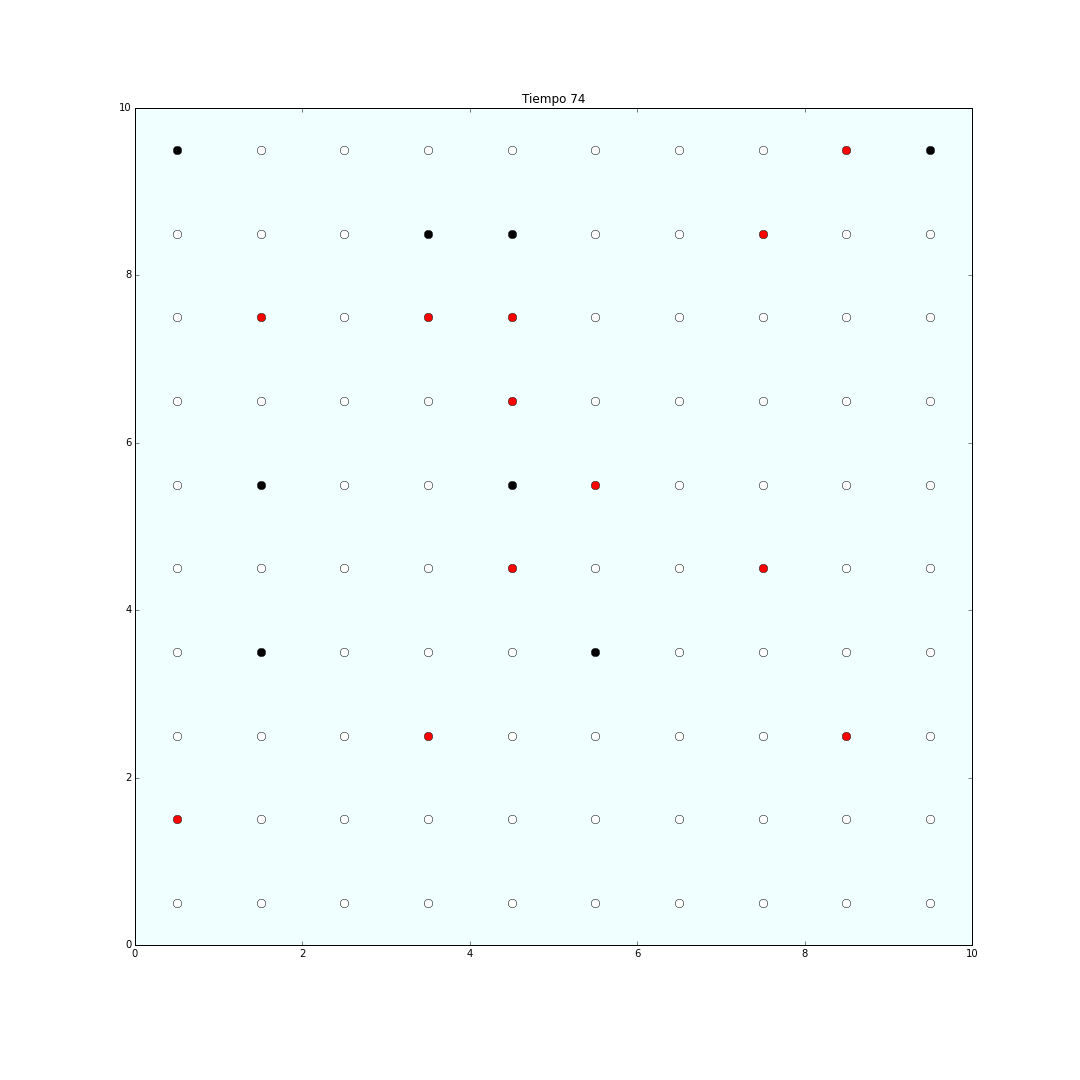
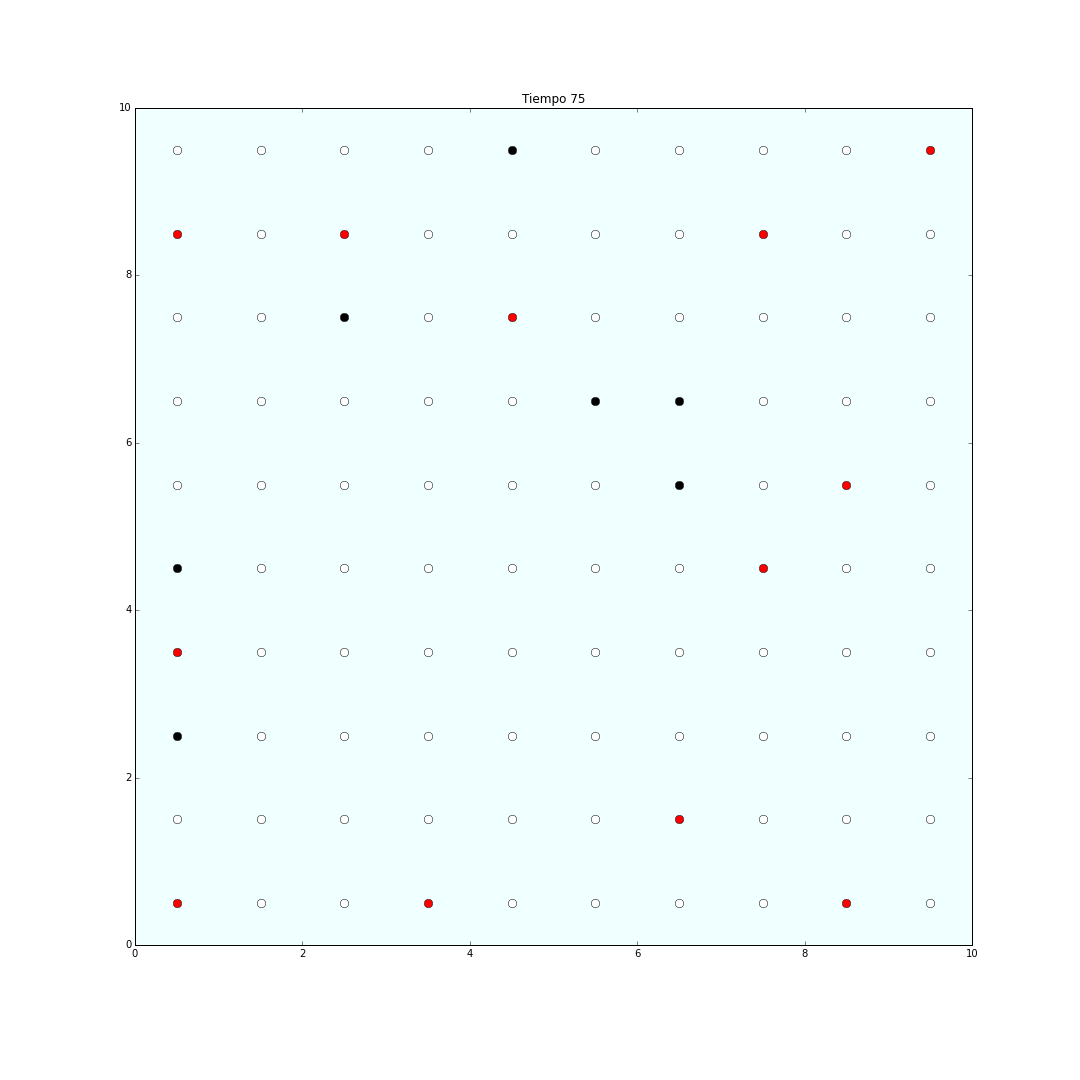
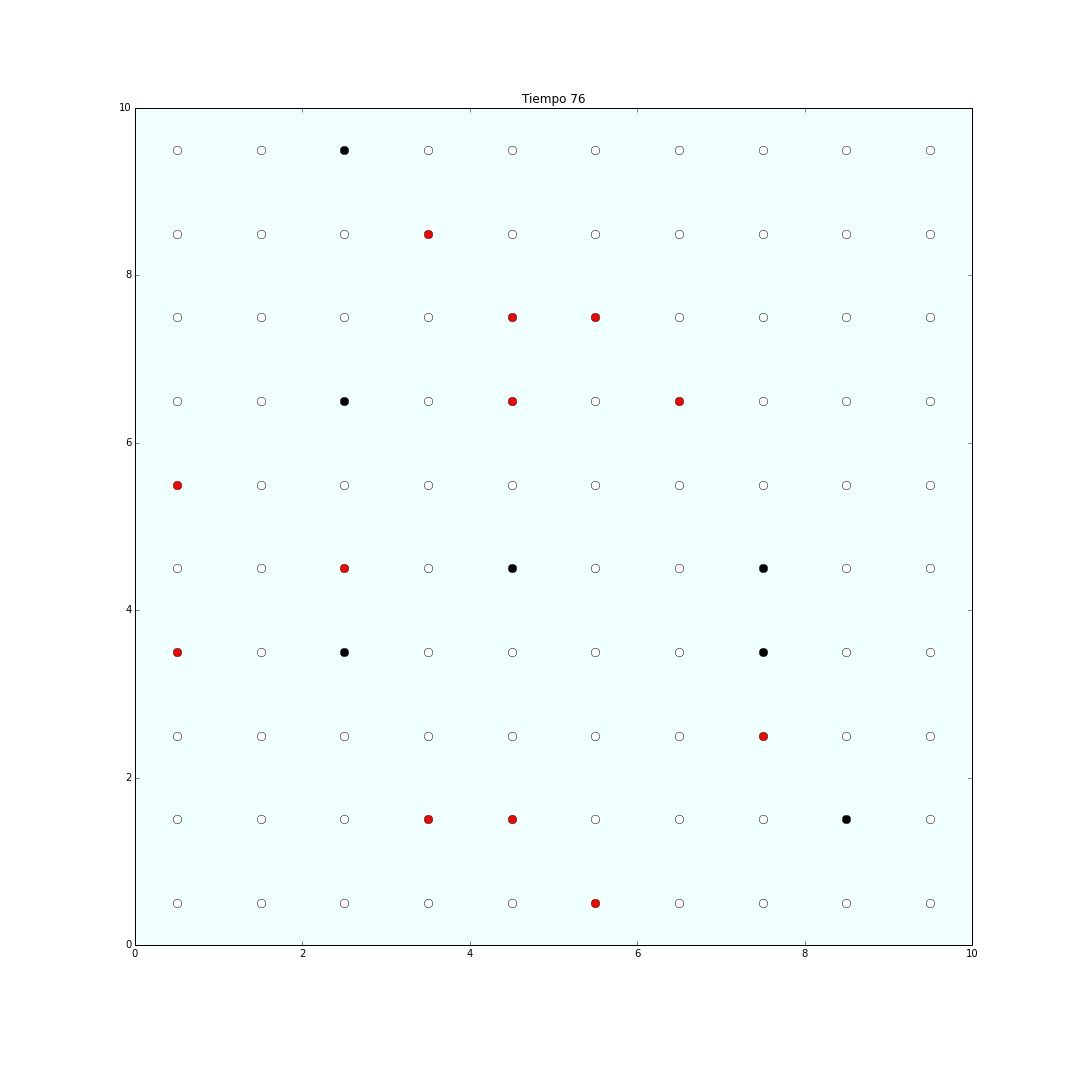
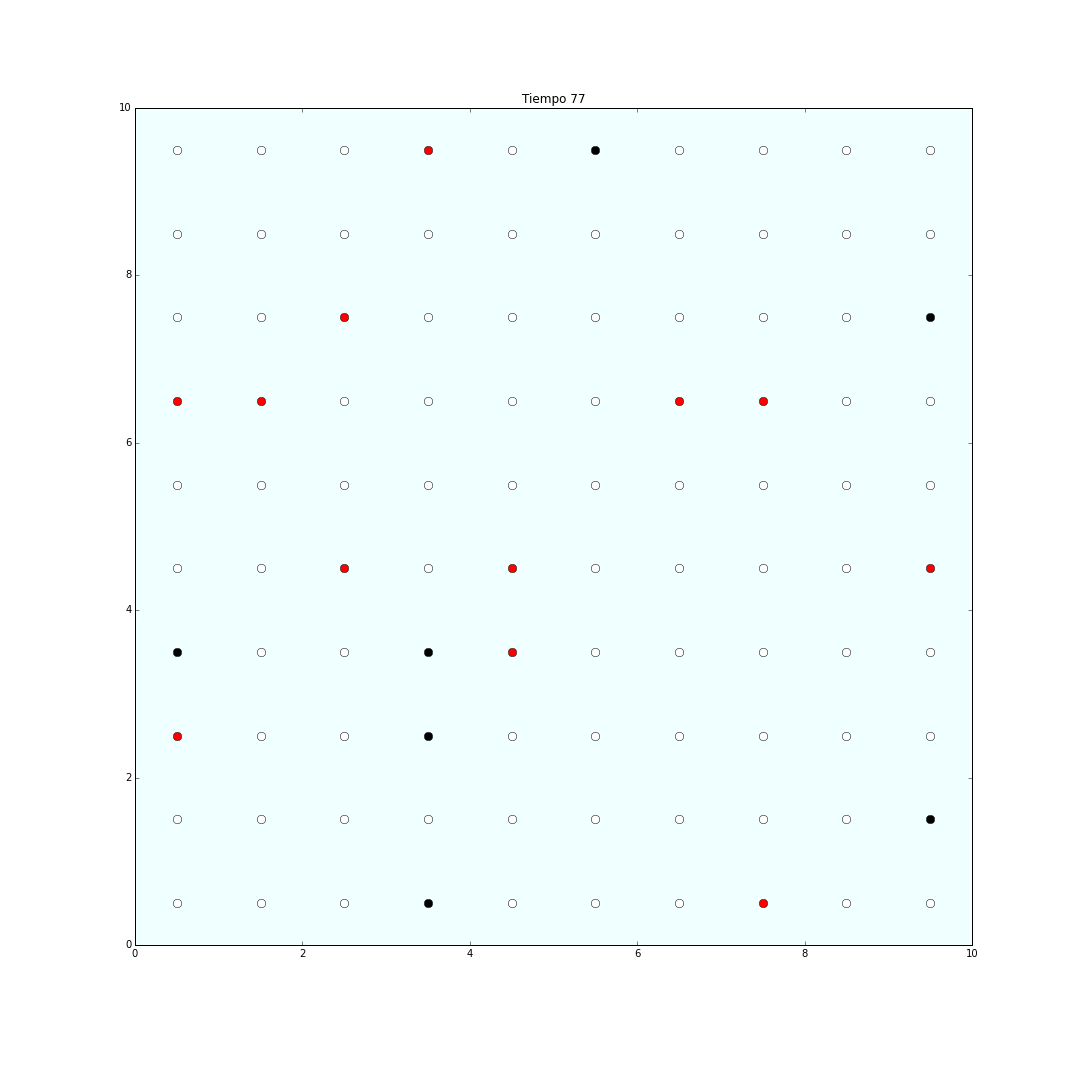
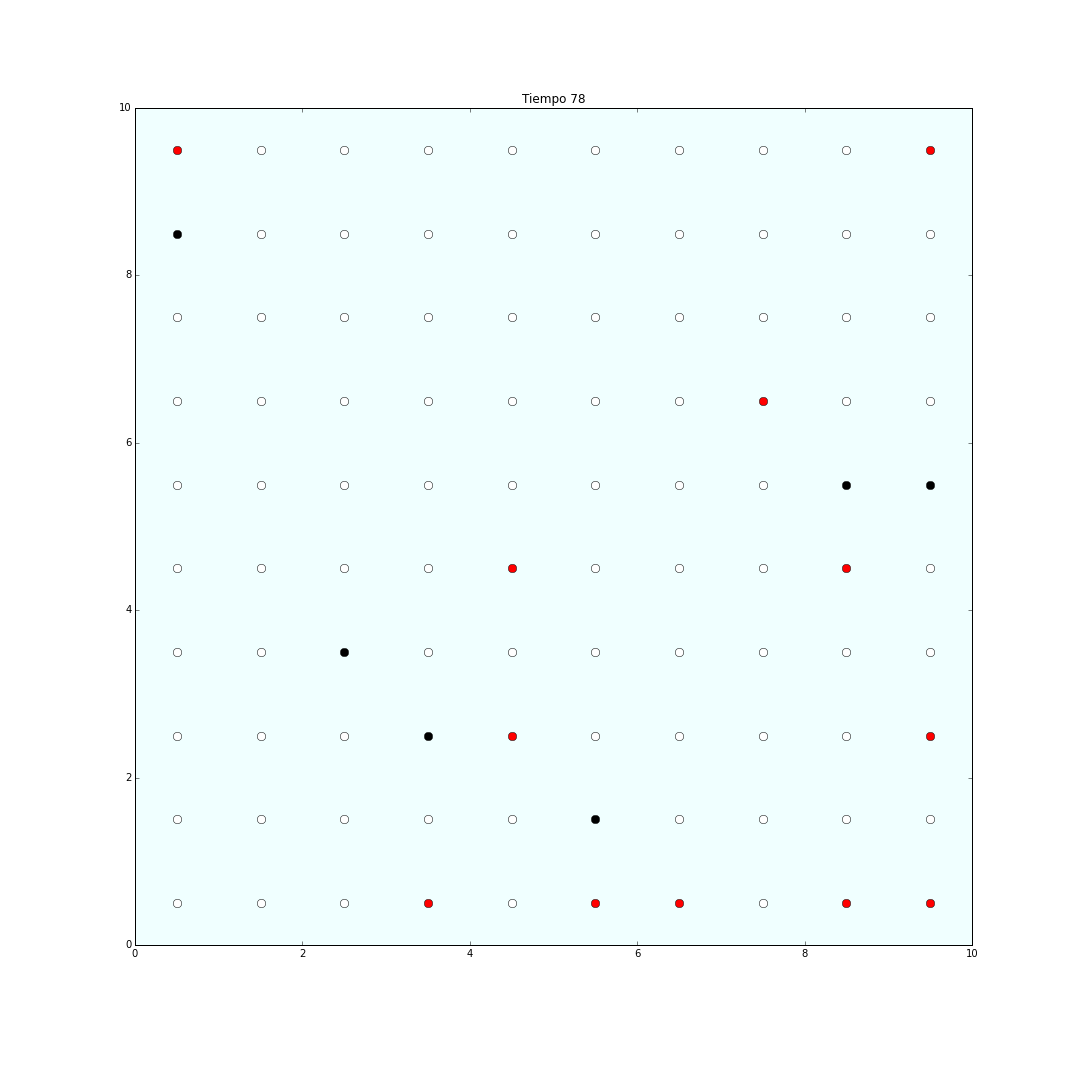
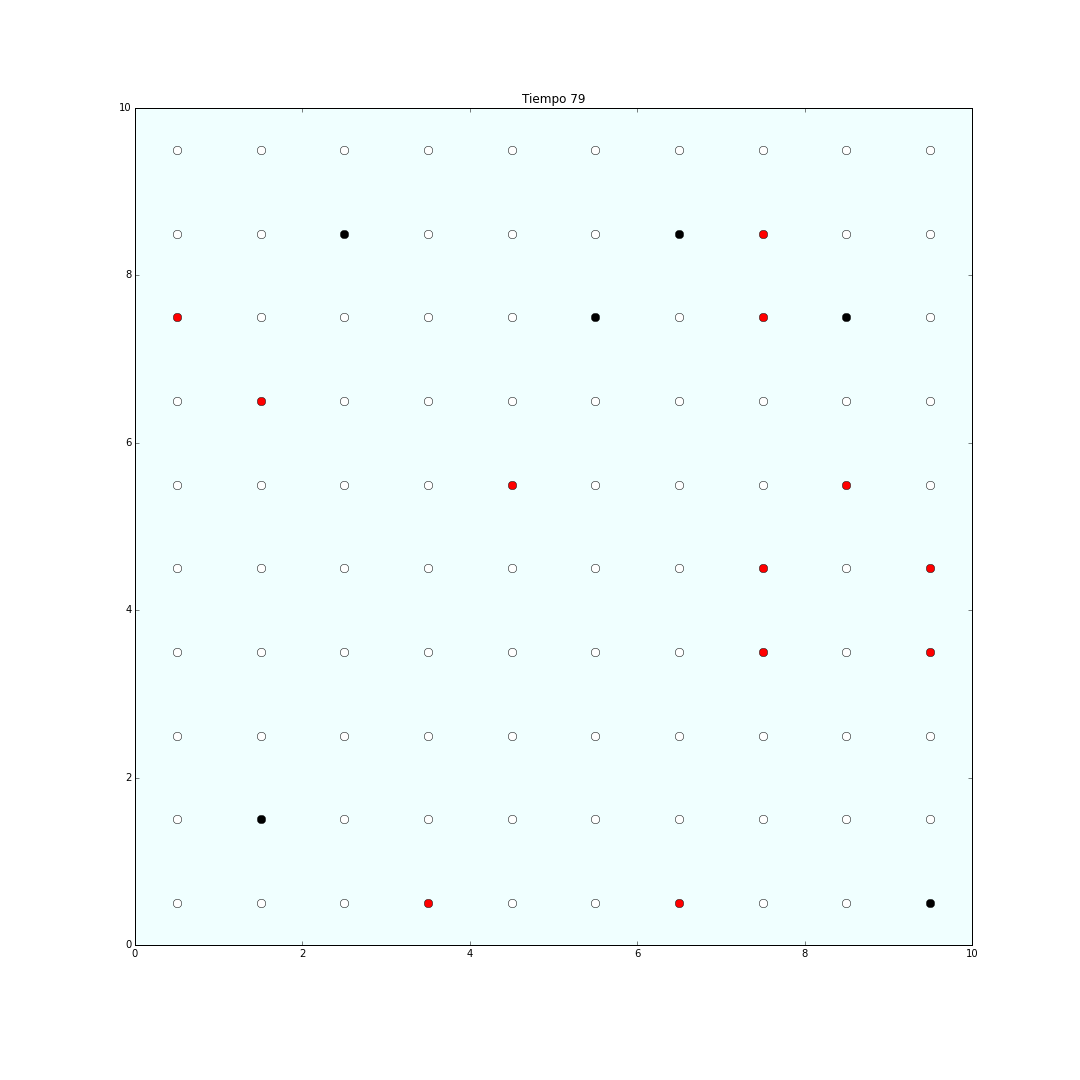
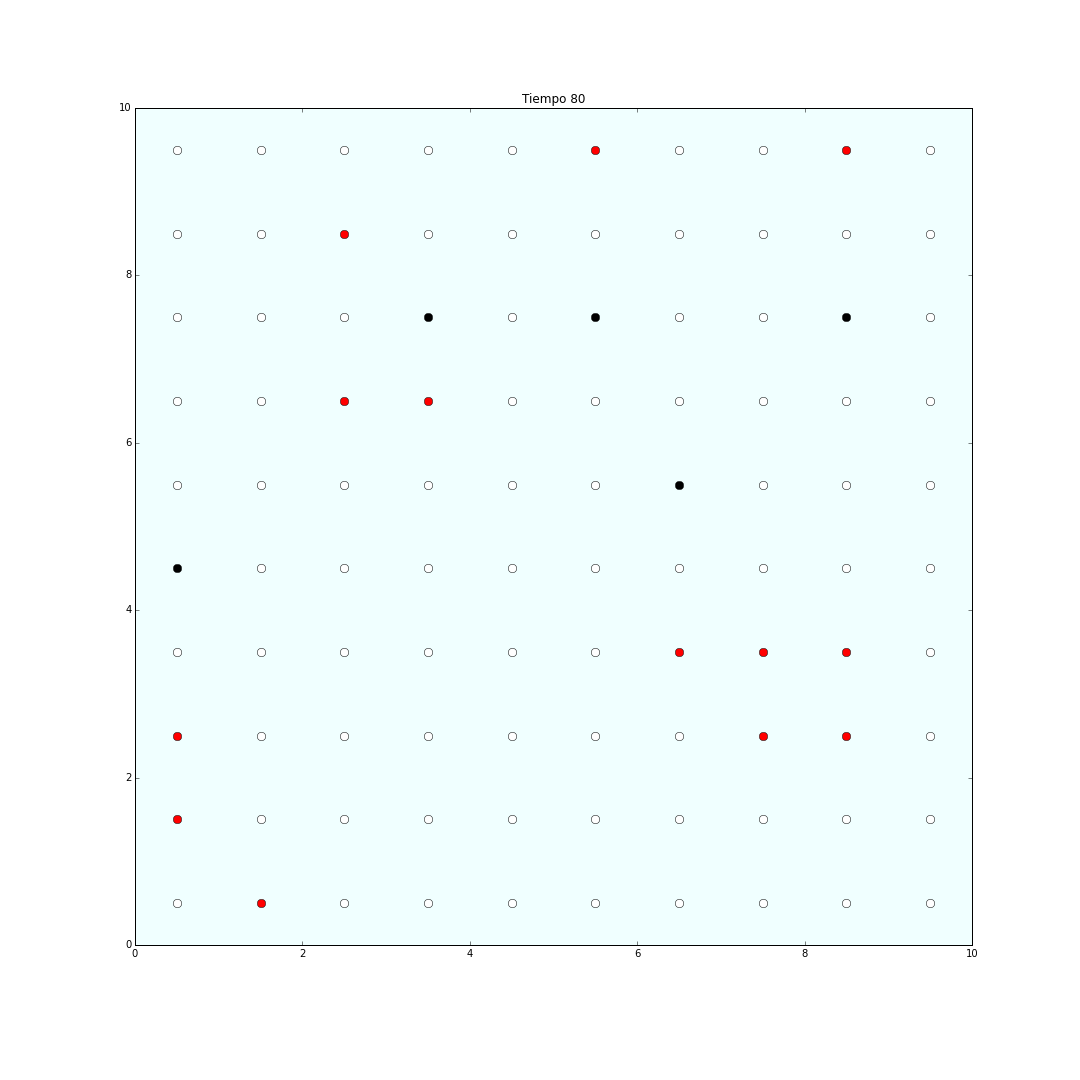
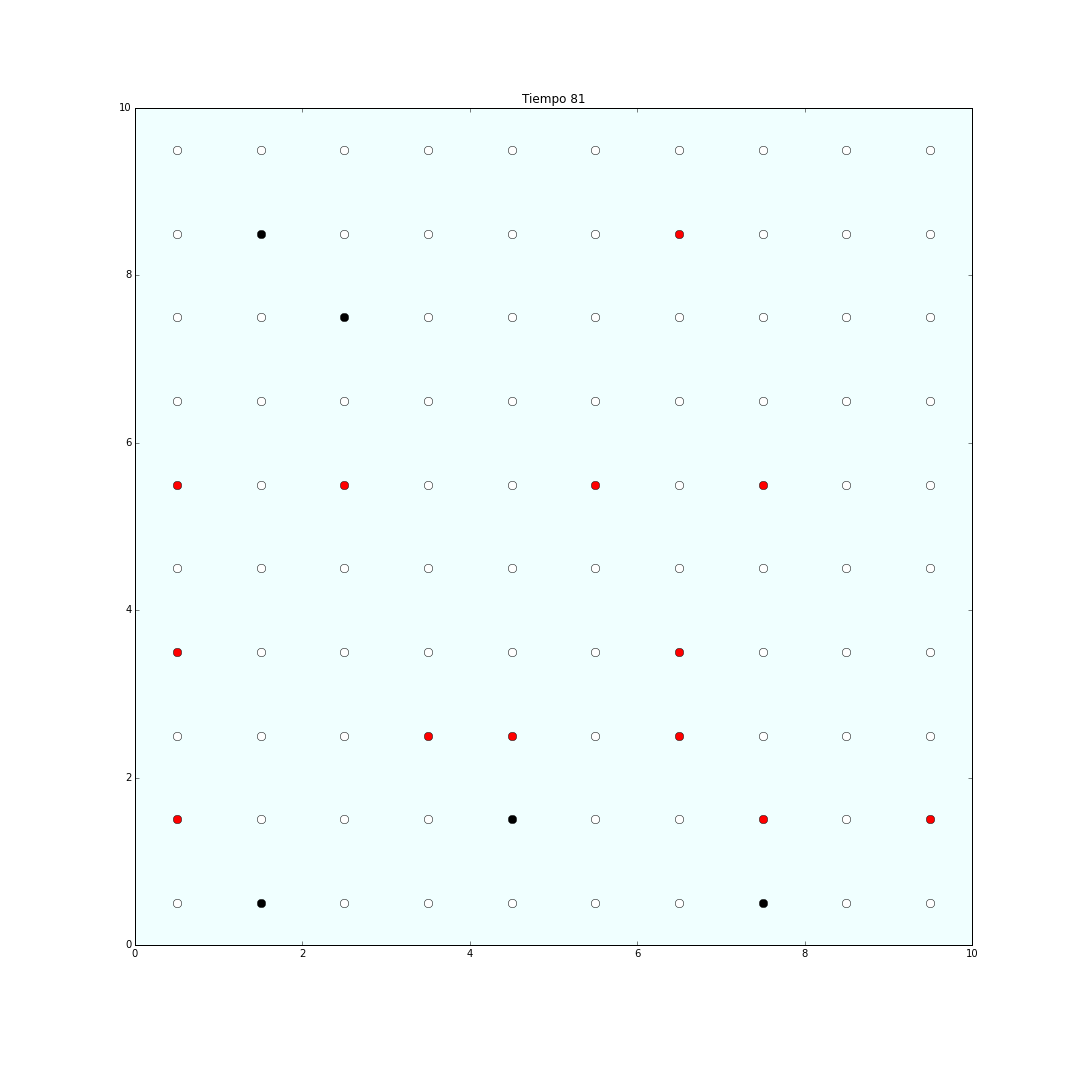
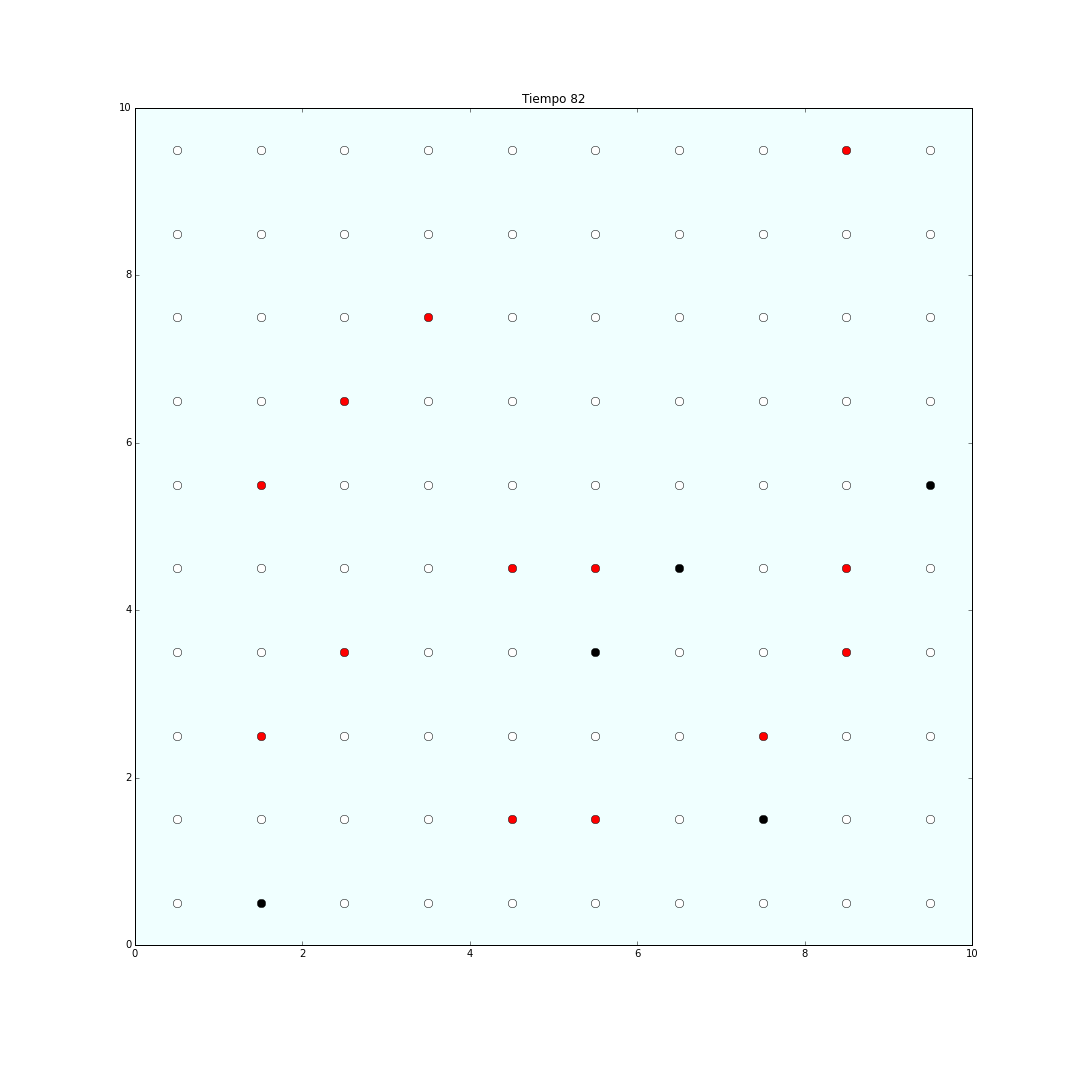
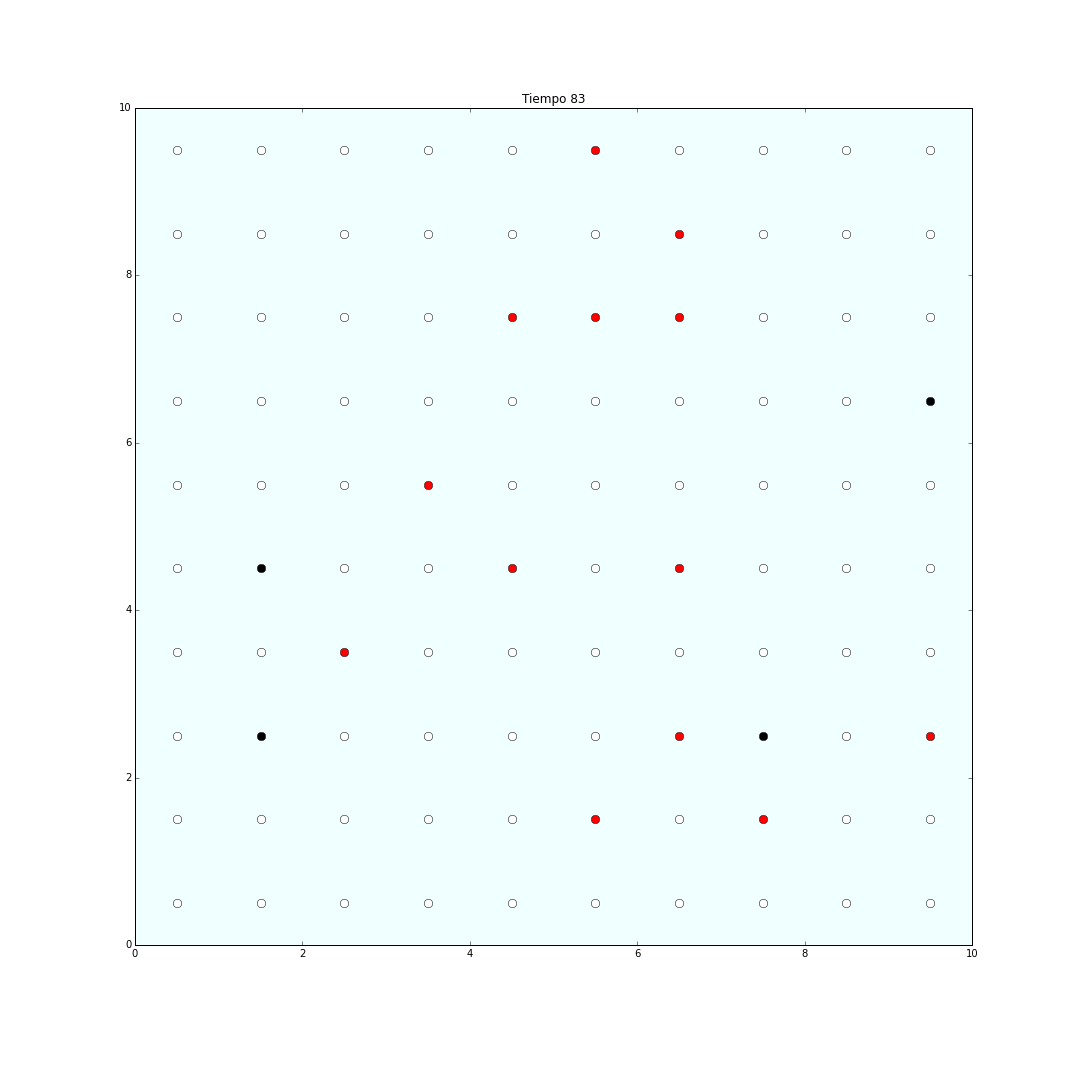
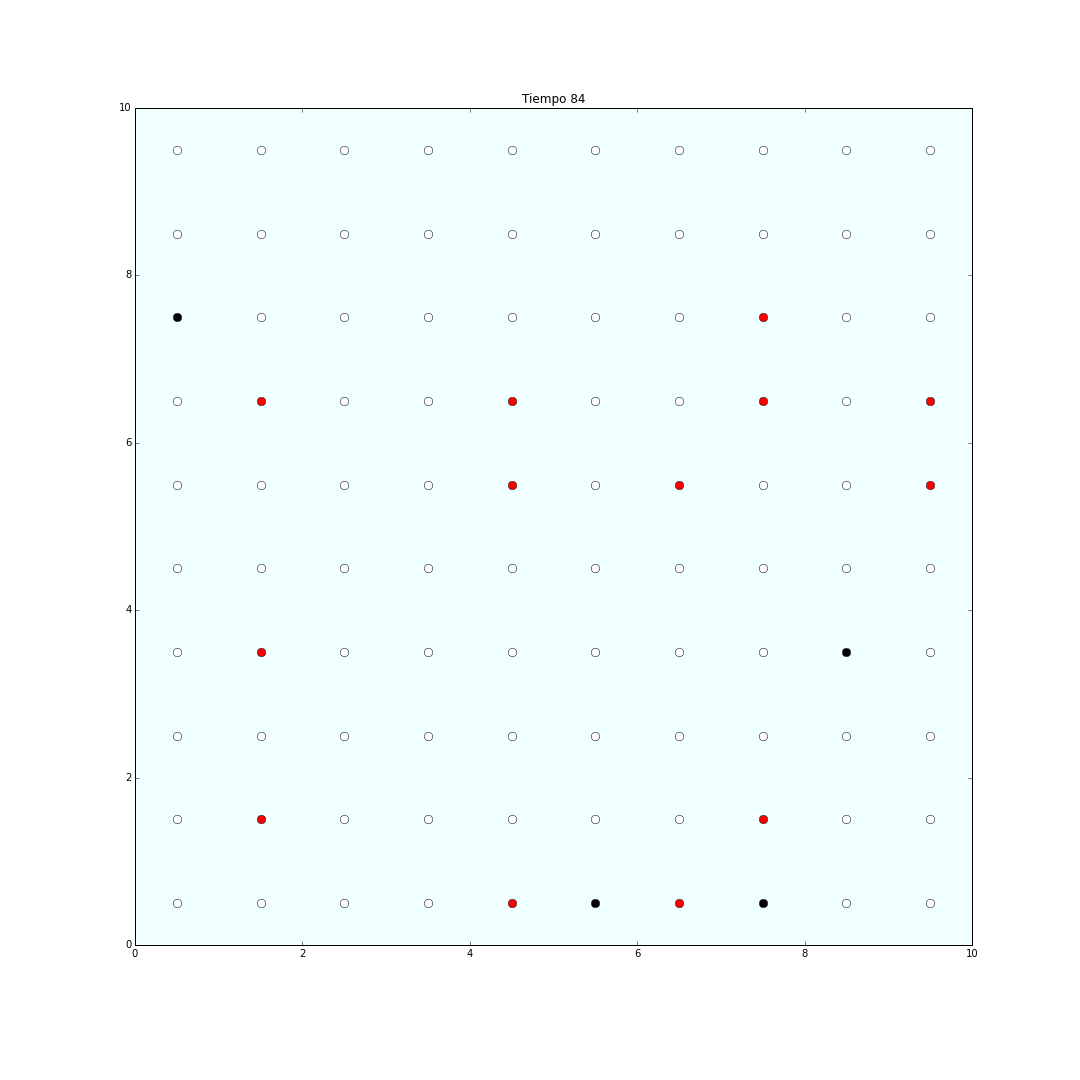
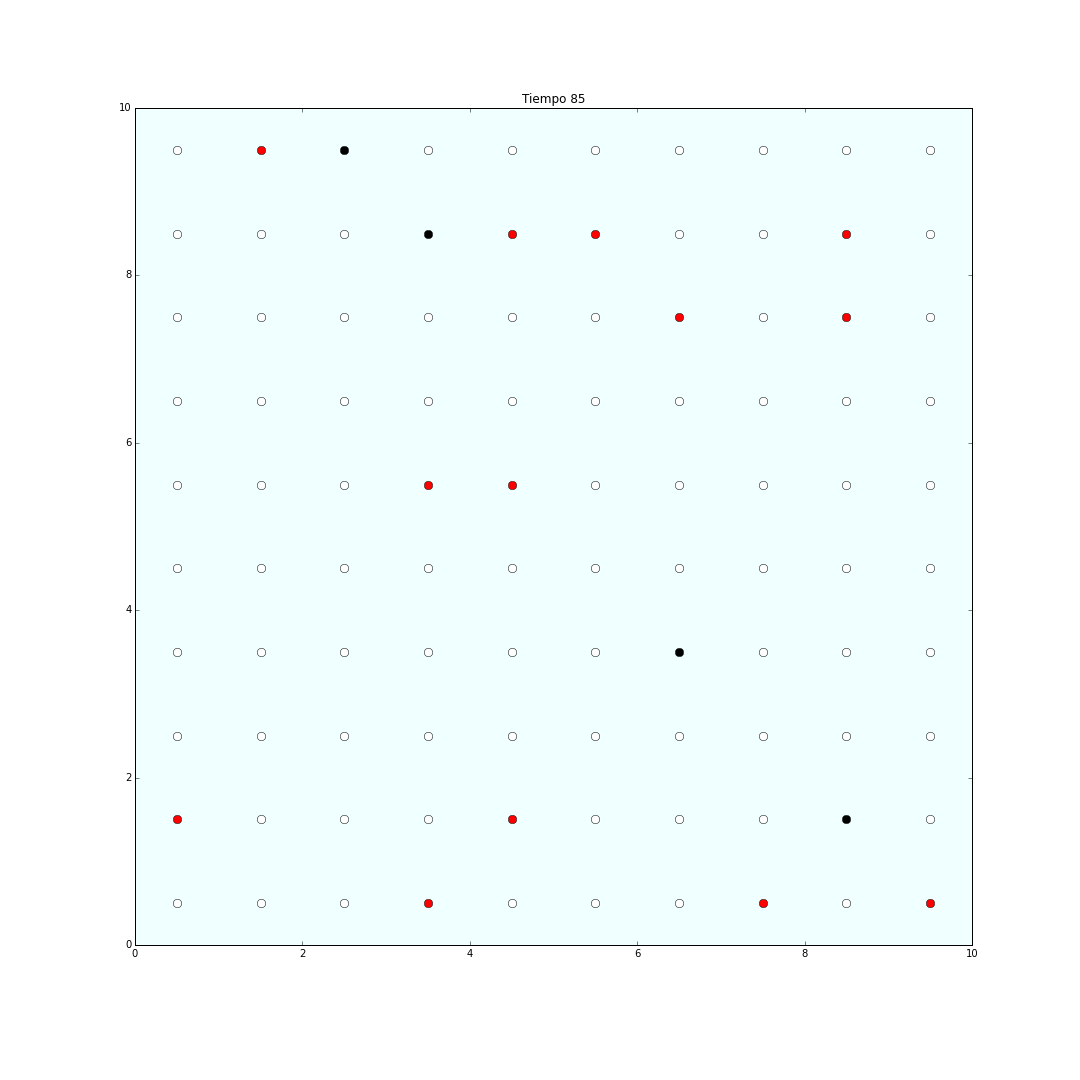
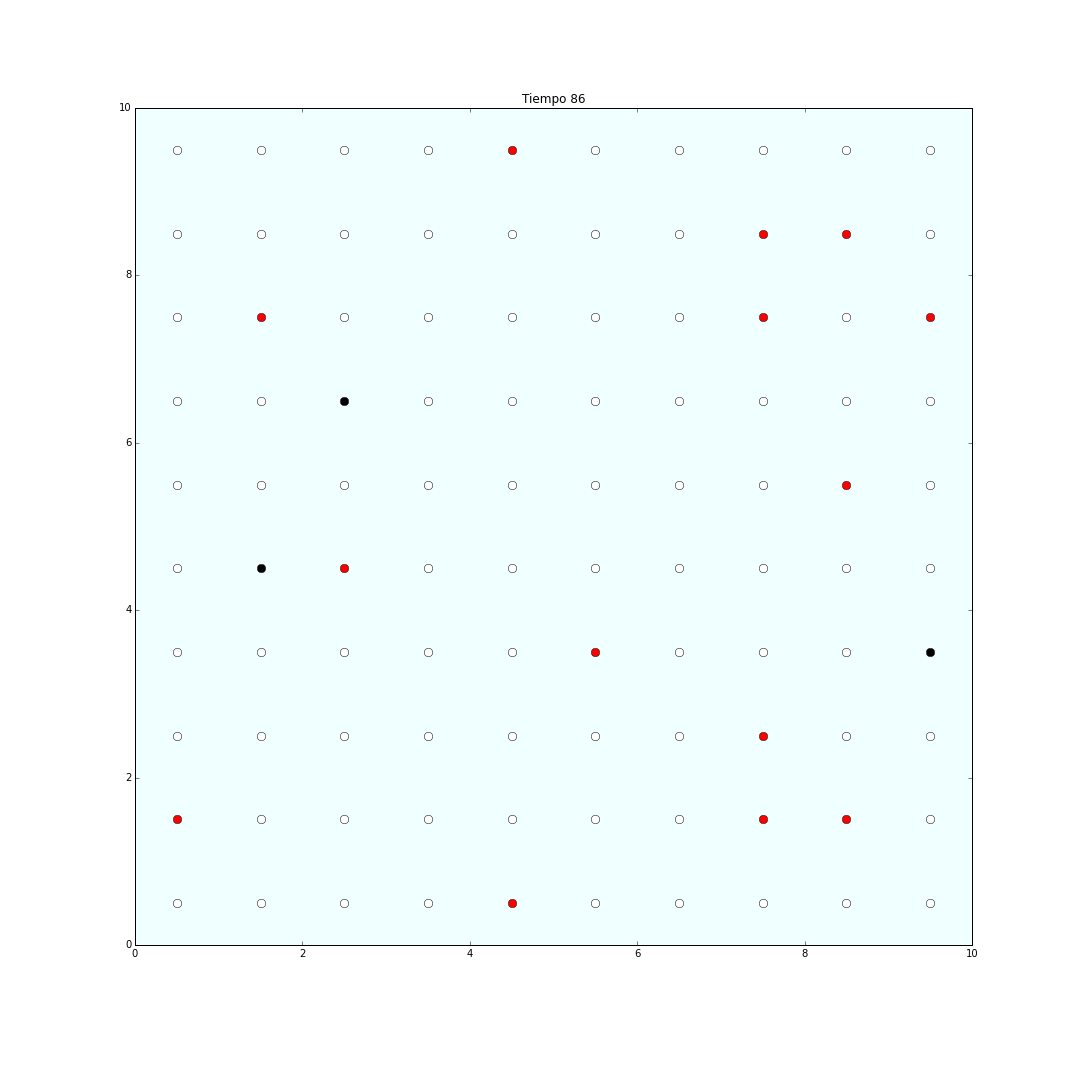
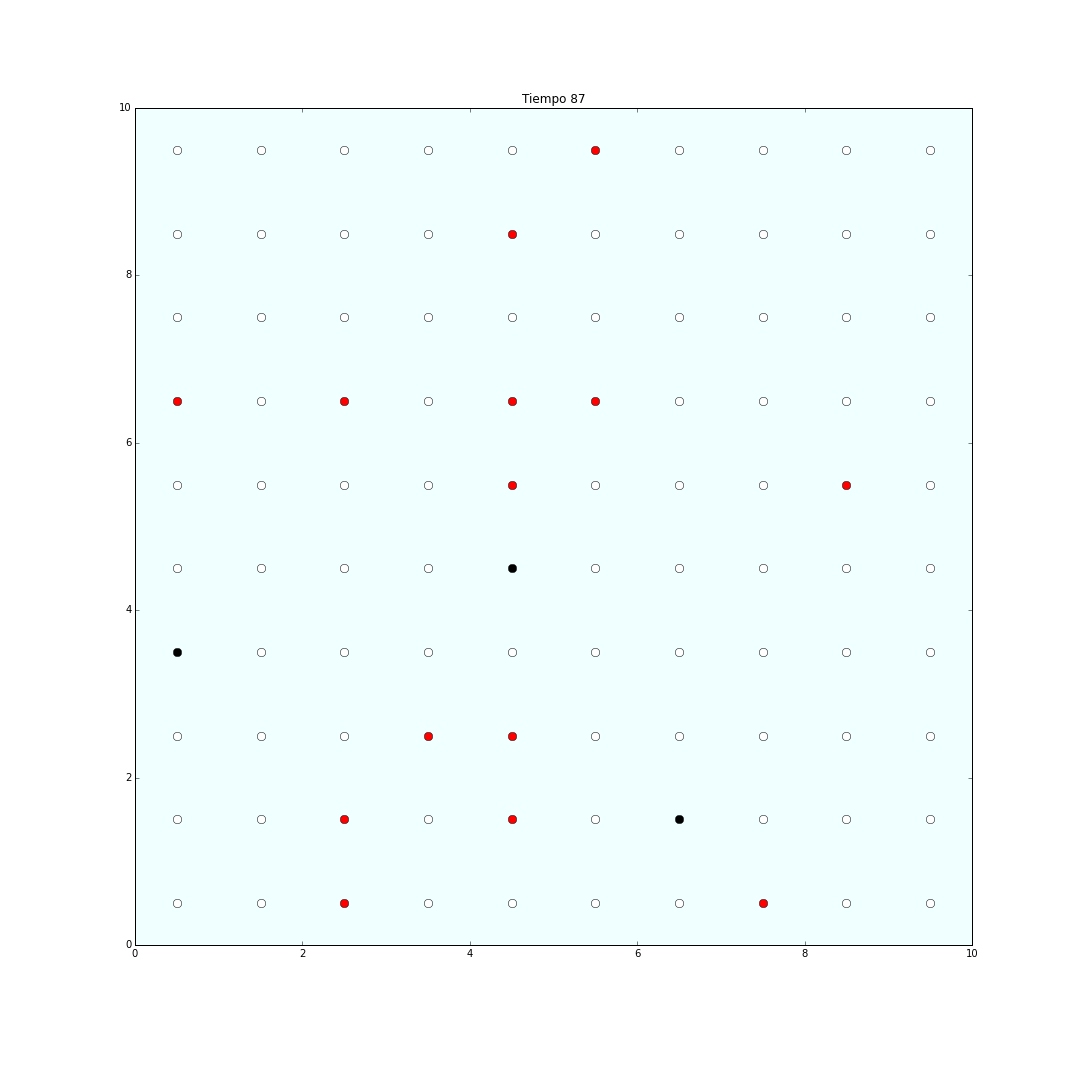
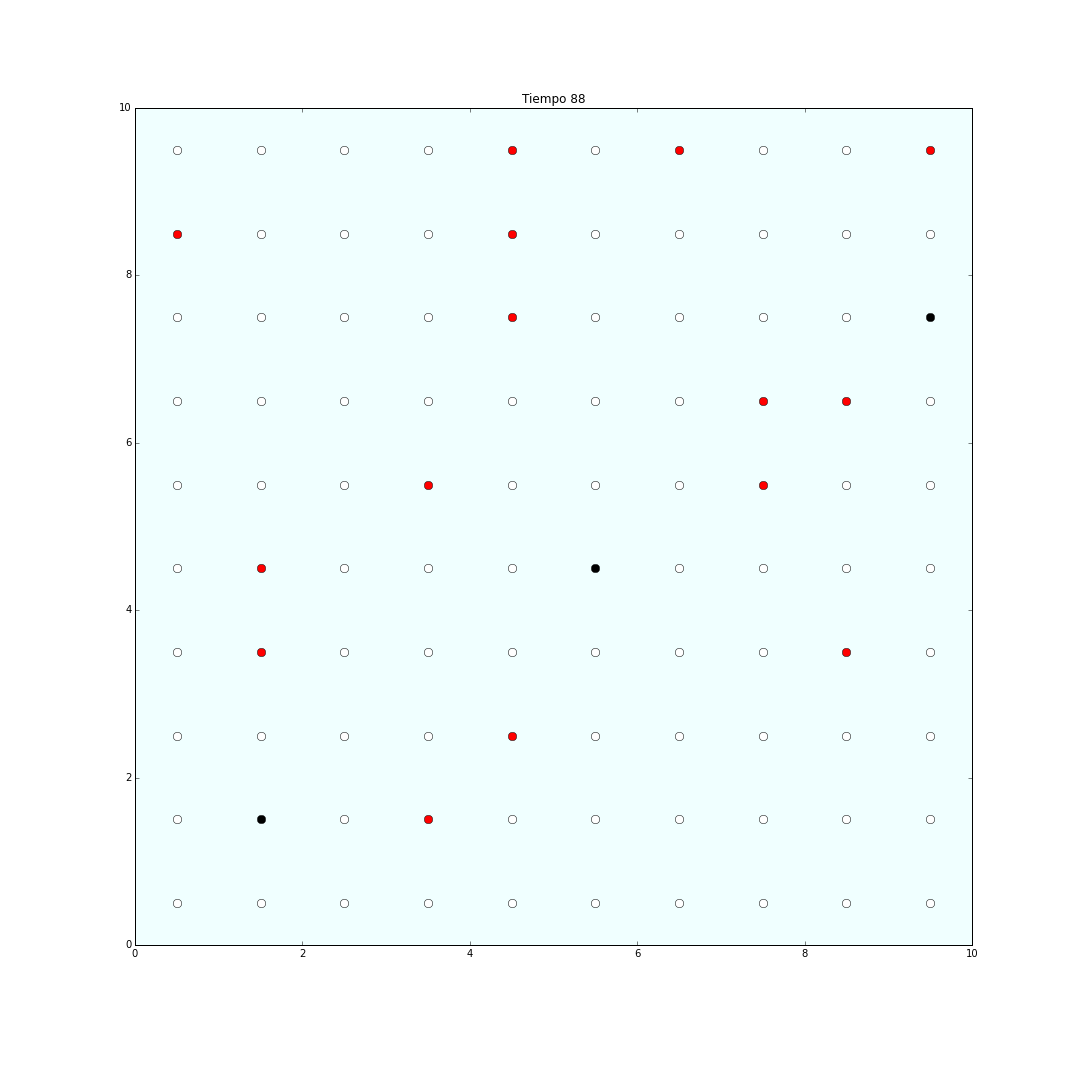
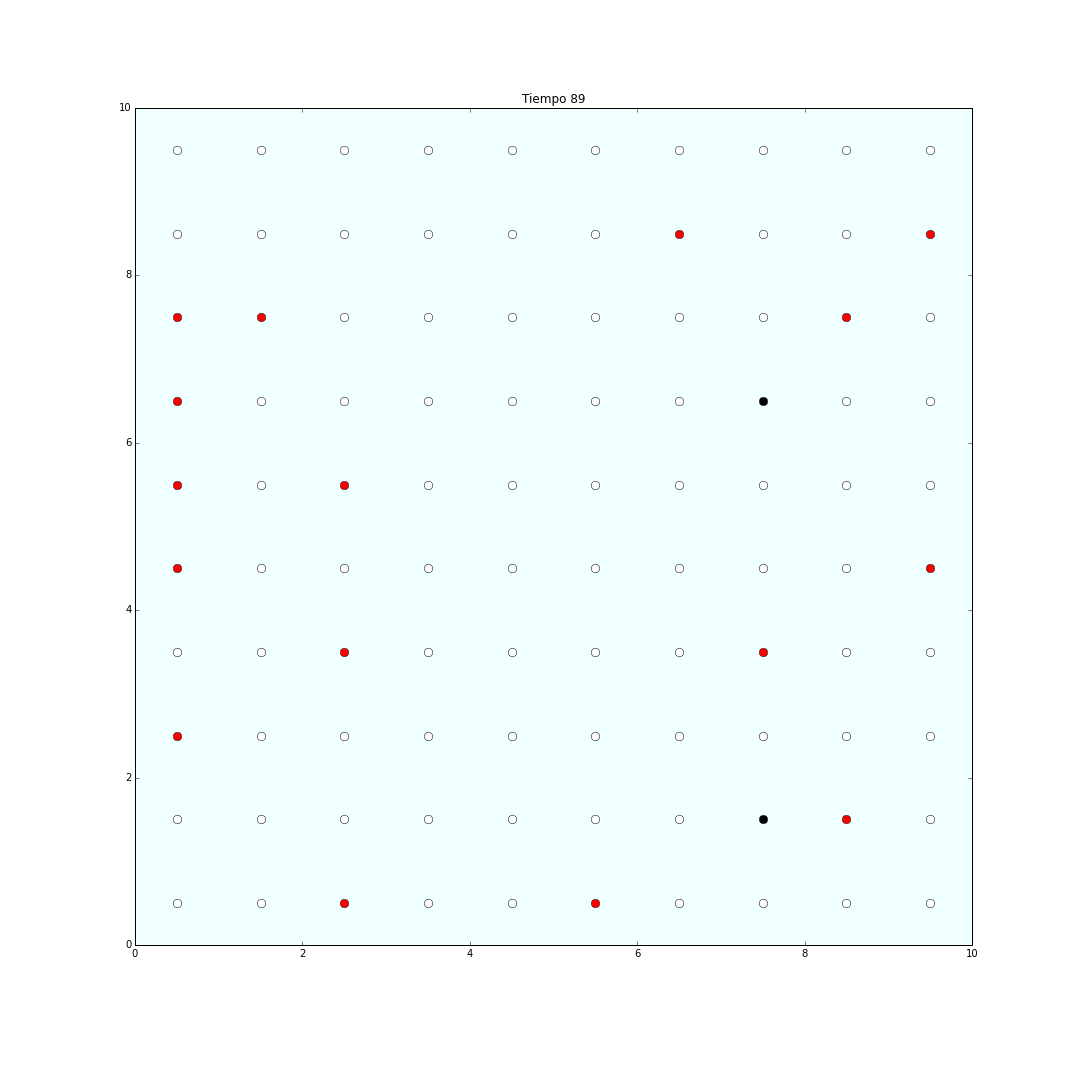
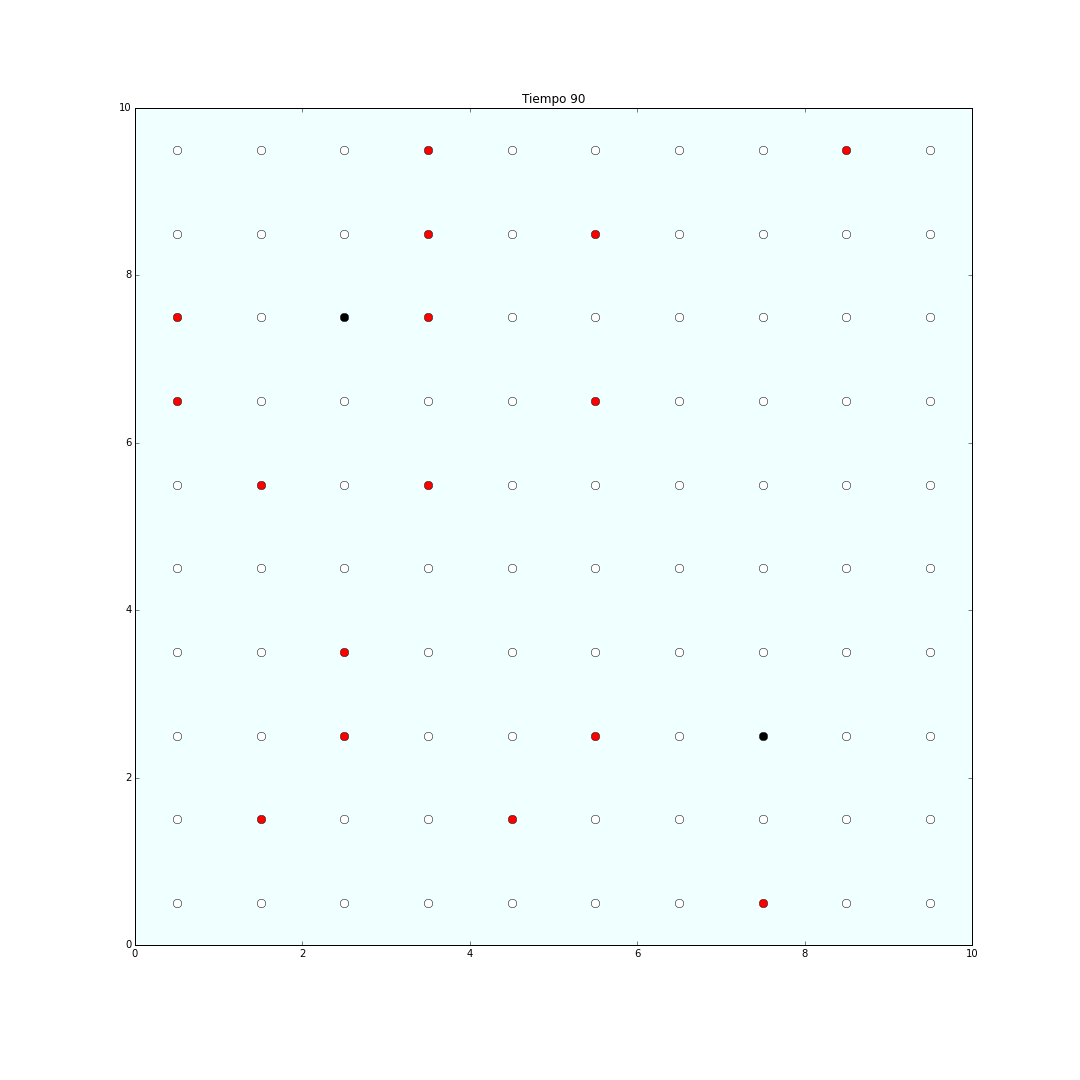
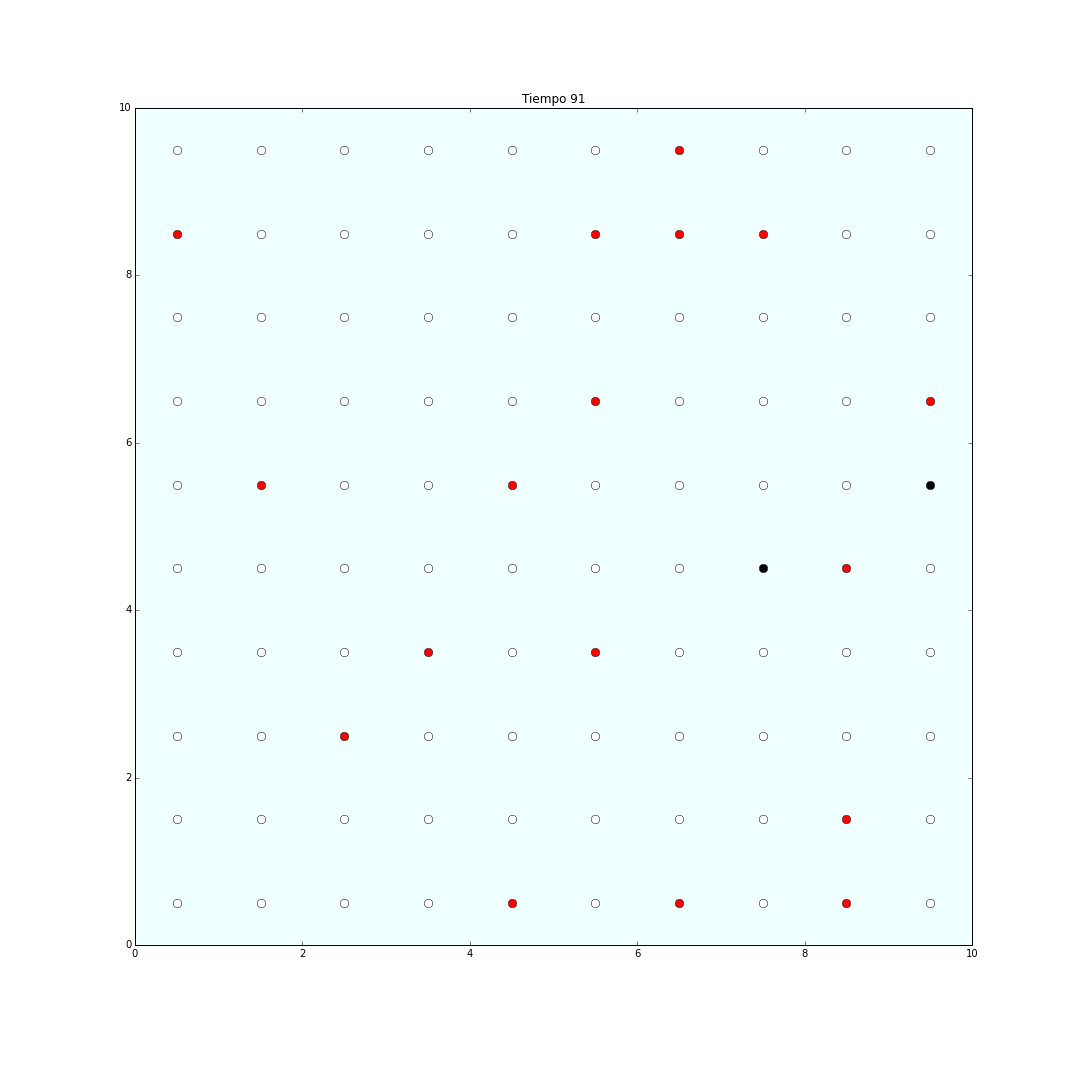
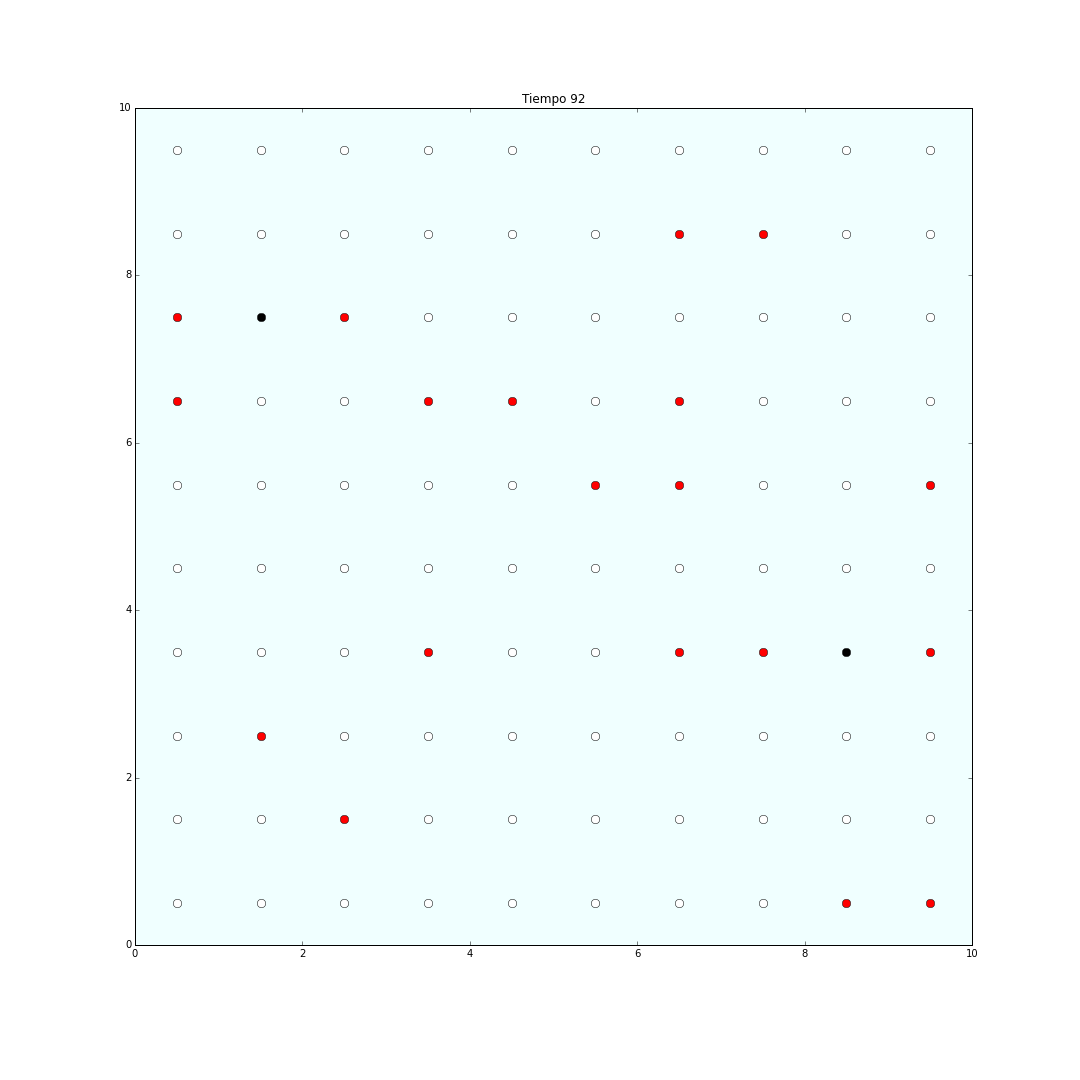
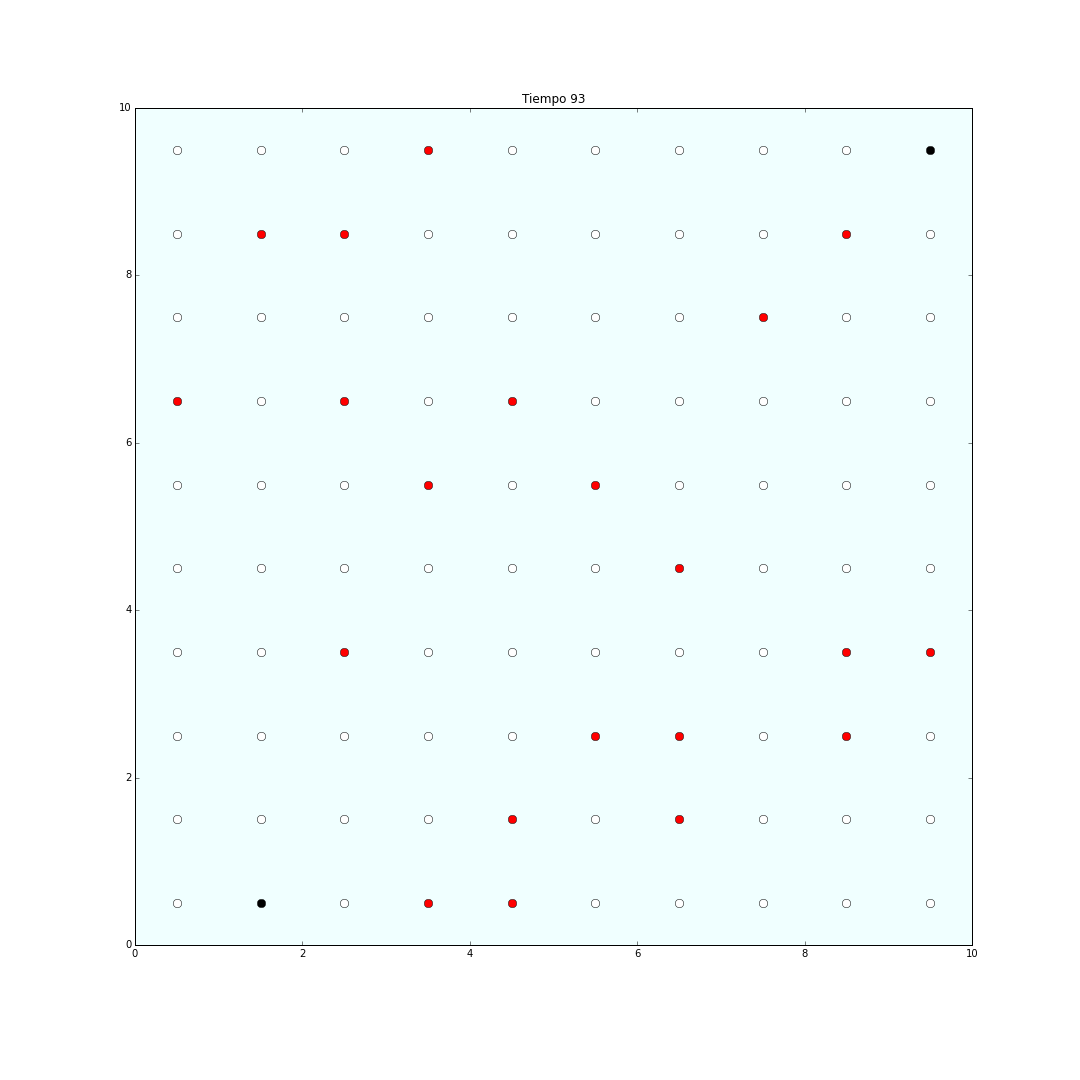
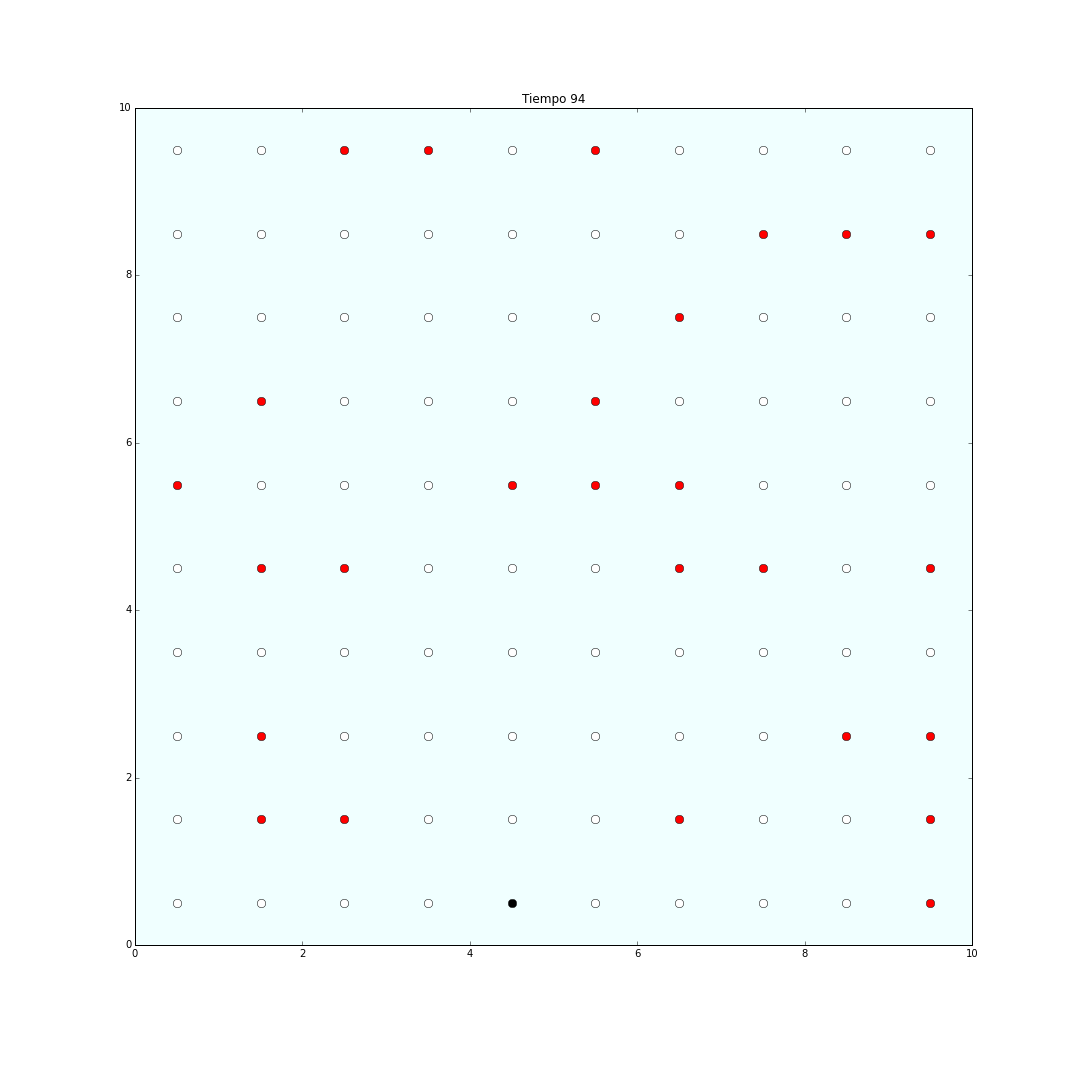
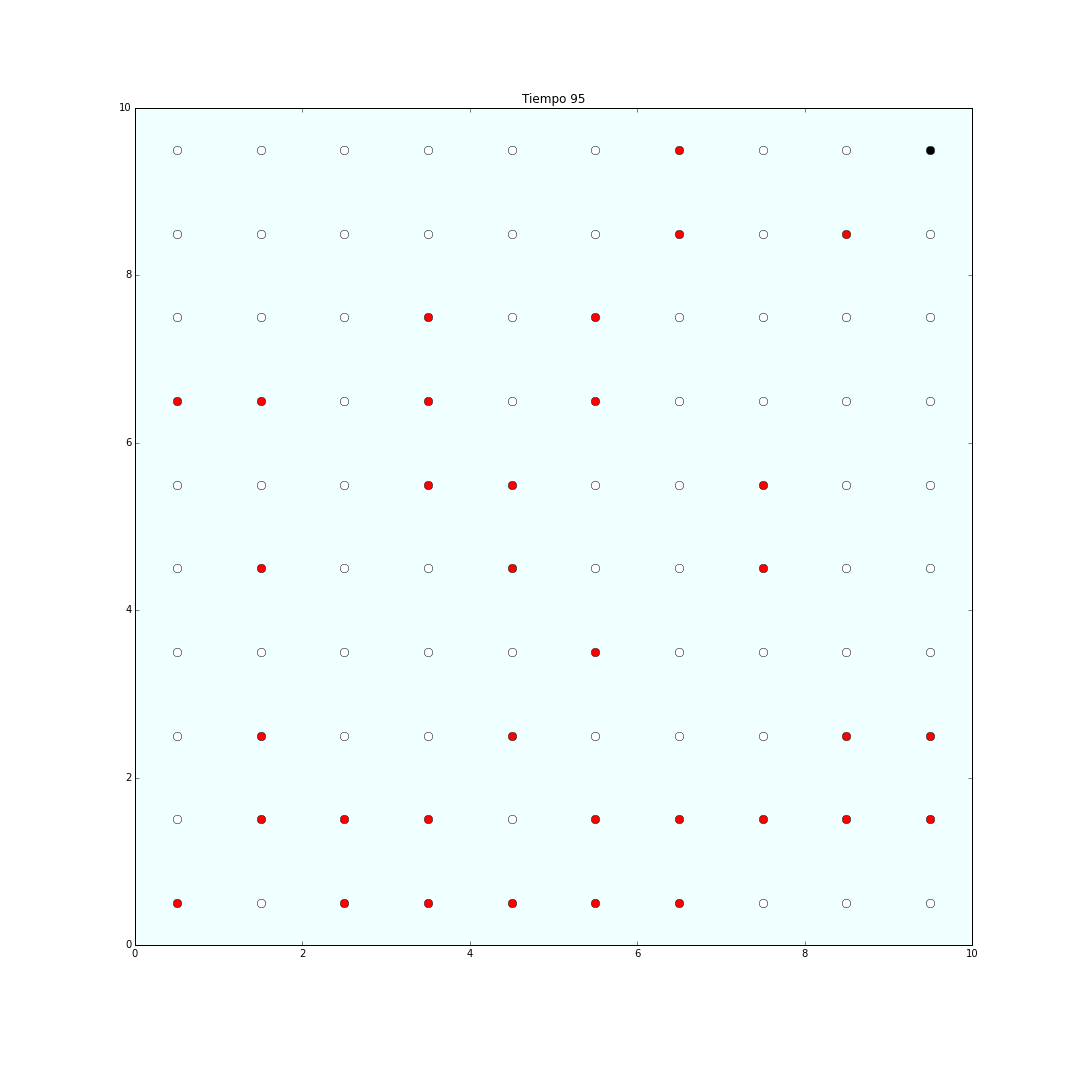
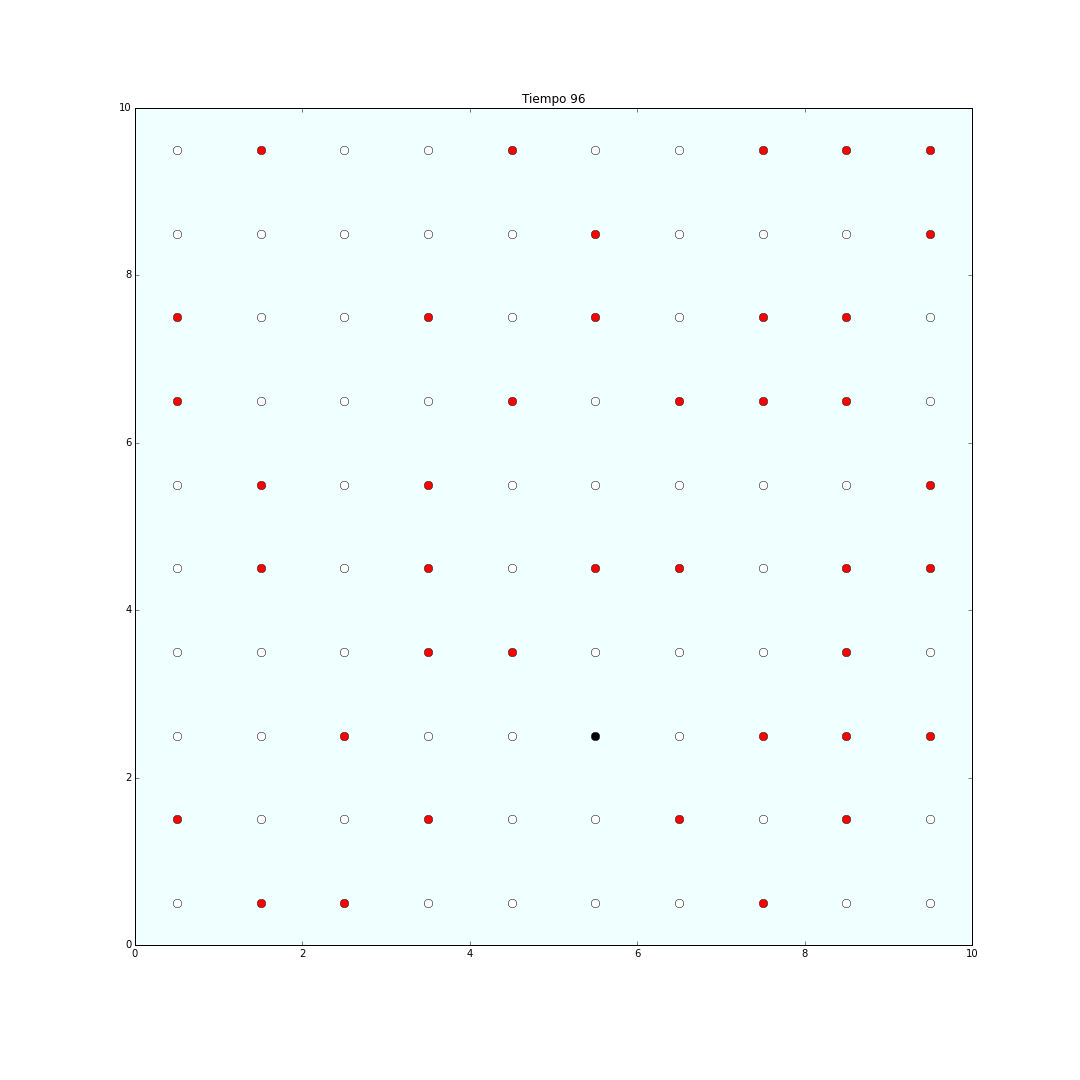
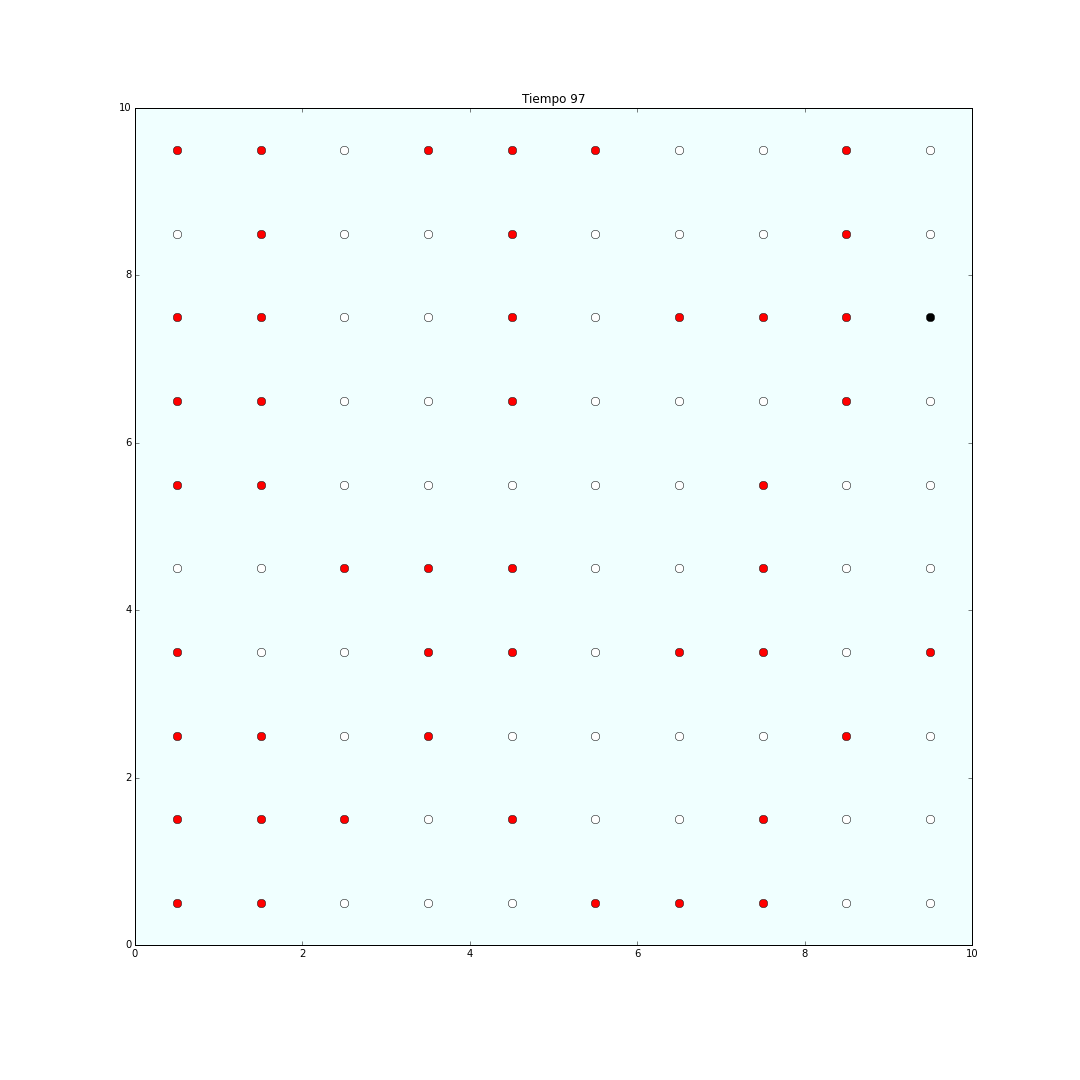
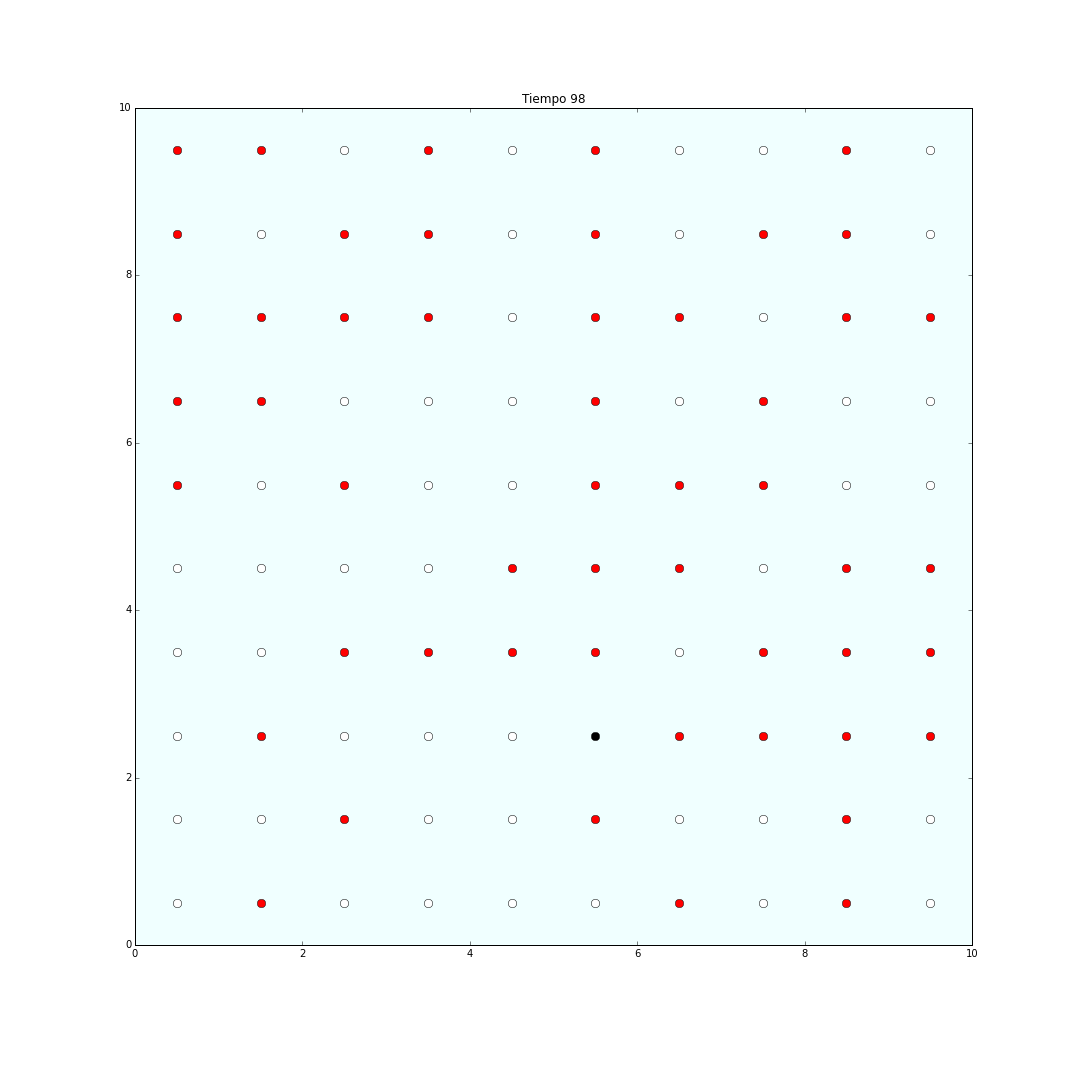
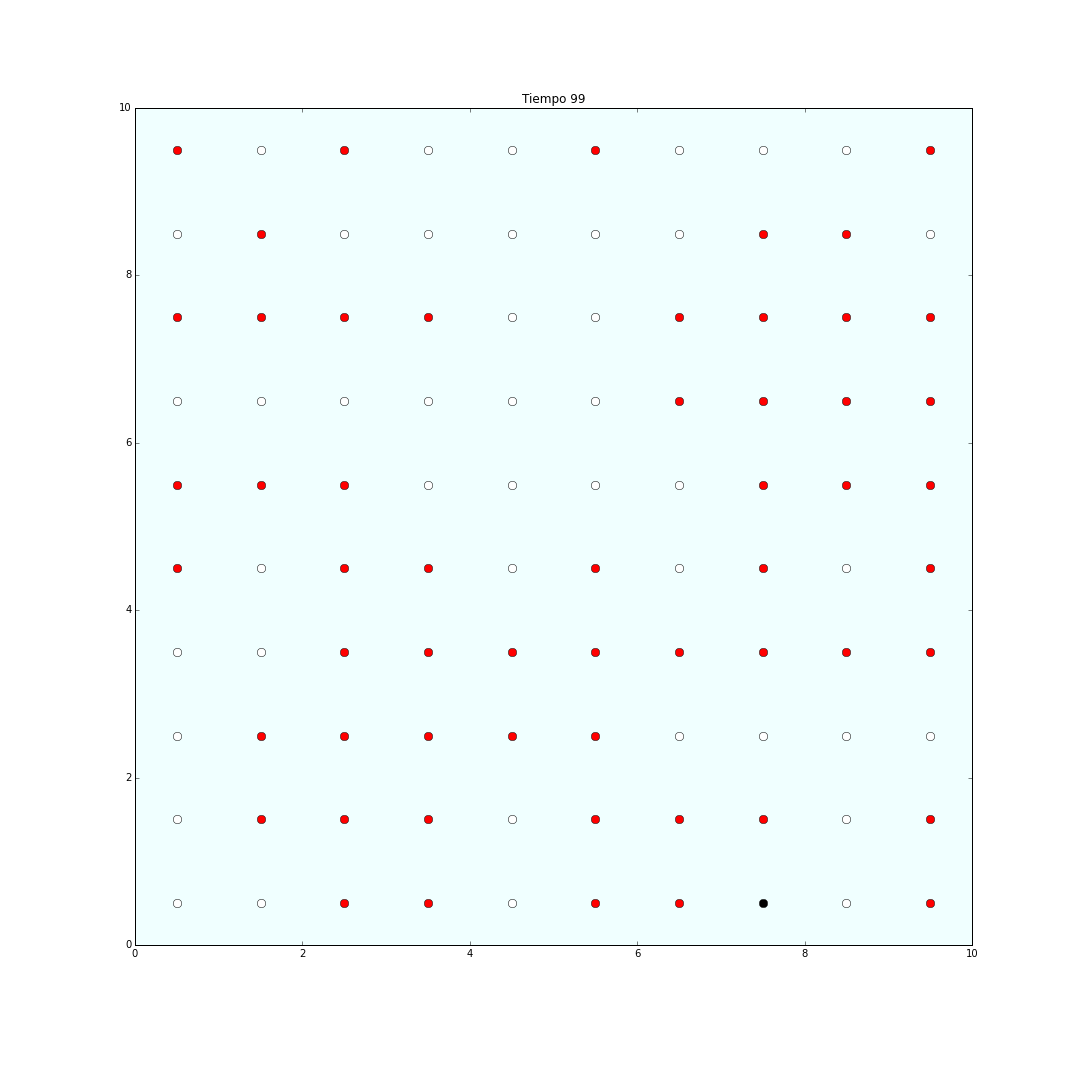

In [33]:
pos = obtener_posiciones(area_negra,area_blanca,area_fertil,0)
agentes = [Agente(tipo=0,locacion = pos[0][i]) for i in range(len(pos[0]))]
agentes.extend(Agente(tipo=1,locacion= pos[1][i]) for i in range(len(pos[1])))
agentes.extend(Agente(tipo=2,locacion= pos[2][i]) for i in range(len(pos[2])))
sin_chiste = Mundo2(agentes = agentes,ar_negra = area_negra,ar_blanca=area_blanca,ar_fertil=area_fertil, steps = 100,metodo = 0)
sin_chiste.simular()